In [5]:
import math
import scipy.stats as st
import numpy as np
import scipy
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint
import pickle

In [6]:
# creation of the pdf for final outcomes, and of the data to be used to test the MH (other) 
# algorithms

N=5000 # total data
N_obs=100  # samples
MH_samples = 50000
eps = 0# 1e-16 # very small value used as probability of non-feasible values in prior
    
# f = [0,0,0]
# f[0] = '(p - 1)**2'
# f[1] = '2*p*(p - 1)*(q - 1)'
# f[2] = '-p*(2*p*q - p - 2*q)'

# f = [0,0,0,0,0]
# f[0] = '-(p - 1)**5'
# f[1] = '5*p*(p - 1)**4*(q - 1)**4'
# f[2] = '-10*p*(p - 1)**3*(q - 1)**3*(2*p*q - p - 2*q)'
# f[3] = '10*p*(p - 1)**2*(q - 1)**2*(3*p**2*q**2 - 3*p**2*q + p**2 - 6*p*q**2 + 3*p*q + 3*q**2)'
# f[4] = '-5*p*(p - 1)*(q - 1)*(2*p*q - p - 2*q)*(2*p**2*q**2 - 2*p**2*q + p**2 - 4*p*q**2 + 2*p*q + 2*q**2)'
# f[5] = 'p*(5*p**4*q**4 - 10*p**4*q**3 + 10*p**4*q**2 - 5*p**4*q + p**4 - 20*p**3*q**4 + 30*p**3*q**3 - 20*p**3*q**2 + 5*p**3*q + 30*p**2*q**4 - 30*p**2*q**3 + 10*p**2*q**2 - 20*p*q**4 + 10*p*q**3 + 5*q**4)'


f = [0,0,0,0,0,0,0,0,0,0,0]
f[0] = '(p - 1)**10'
f[1] = '10*p*(p - 1)**9*(q - 1)**9'
f[2] = '-45*p*(p - 1)**8*(q - 1)**8*(2*p*q - p - 2*q)'
f[3] = '120*p*(p - 1)**7*(q - 1)**7*(3*p**2*q**2 - 3*p**2*q + p**2 - 6*p*q**2 + 3*p*q + 3*q**2)'
f[4] = '-210*p*(p - 1)**6*(q - 1)**6*(2*p*q - p - 2*q)*(2*p**2*q**2 - 2*p**2*q + p**2 - 4*p*q**2 + 2*p*q + 2*q**2)'
f[5] = '252*p*(p - 1)**5*(q - 1)**5*(5*p**4*q**4 - 10*p**4*q**3 + 10*p**4*q**2 - 5*p**4*q + p**4 - 20*p**3*q**4 + 30*p**3*q**3 - 20*p**3*q**2 + 5*p**3*q + 30*p**2*q**4 - 30*p**2*q**3 + 10*p**2*q**2 - 20*p*q**4 + 10*p*q**3 + 5*q**4)'
f[6] = '-210*p*(p - 1)**4*(q - 1)**4*(2*p*q - p - 2*q)*(p**2*q**2 - p**2*q + p**2 - 2*p*q**2 + p*q + q**2)*(3*p**2*q**2 - 3*p**2*q + p**2 - 6*p*q**2 + 3*p*q + 3*q**2)'
f[7] = '120*p*(p - 1)**3*(q - 1)**3*(7*p**6*q**6 - 21*p**6*q**5 + 35*p**6*q**4 - 35*p**6*q**3 + 21*p**6*q**2 - 7*p**6*q + p**6 - 42*p**5*q**6 + 105*p**5*q**5 - 140*p**5*q**4 + 105*p**5*q**3 - 42*p**5*q**2 + 7*p**5*q + 105*p**4*q**6 - 210*p**4*q**5 + 210*p**4*q**4 - 105*p**4*q**3 + 21*p**4*q**2 - 140*p**3*q**6 + 210*p**3*q**5 - 140*p**3*q**4 + 35*p**3*q**3 + 105*p**2*q**6 - 105*p**2*q**5 + 35*p**2*q**4 - 42*p*q**6 + 21*p*q**5 + 7*q**6)'
f[8] = '-45*p*(p - 1)**2*(q - 1)**2*(2*p*q - p - 2*q)*(2*p**2*q**2 - 2*p**2*q + p**2 - 4*p*q**2 + 2*p*q + 2*q**2)*(2*p**4*q**4 - 4*p**4*q**3 + 6*p**4*q**2 - 4*p**4*q + p**4 - 8*p**3*q**4 + 12*p**3*q**3 - 12*p**3*q**2 + 4*p**3*q + 12*p**2*q**4 - 12*p**2*q**3 + 6*p**2*q**2 - 8*p*q**4 + 4*p*q**3 + 2*q**4)'
f[9] = '10*p*(p - 1)*(q - 1)*(3*p**2*q**2 - 3*p**2*q + p**2 - 6*p*q**2 + 3*p*q + 3*q**2)*(3*p**6*q**6 - 9*p**6*q**5 + 18*p**6*q**4 - 21*p**6*q**3 + 15*p**6*q**2 - 6*p**6*q + p**6 - 18*p**5*q**6 + 45*p**5*q**5 - 72*p**5*q**4 + 63*p**5*q**3 - 30*p**5*q**2 + 6*p**5*q + 45*p**4*q**6 - 90*p**4*q**5 + 108*p**4*q**4 - 63*p**4*q**3 + 15*p**4*q**2 - 60*p**3*q**6 + 90*p**3*q**5 - 72*p**3*q**4 + 21*p**3*q**3 + 45*p**2*q**6 - 45*p**2*q**5 + 18*p**2*q**4 - 18*p*q**6 + 9*p*q**5 + 3*q**6)'
f[10] = '-p*(2*p*q - p - 2*q)*(p**4*q**4 - 2*p**4*q**3 + 4*p**4*q**2 - 3*p**4*q + p**4 - 4*p**3*q**4 + 6*p**3*q**3 - 8*p**3*q**2 + 3*p**3*q + 6*p**2*q**4 - 6*p**2*q**3 + 4*p**2*q**2 - 4*p*q**4 + 2*p*q**3 + q**4)*(5*p**4*q**4 - 10*p**4*q**3 + 10*p**4*q**2 - 5*p**4*q + p**4 - 20*p**3*q**4 + 30*p**3*q**3 - 20*p**3*q**2 + 5*p**3*q + 30*p**2*q**4 - 30*p**2*q**3 + 10*p**2*q**2 - 20*p*q**4 + 10*p*q**3 + 5*q**4)'

 
# f=[0,0,0,0,0,0,0,0,0,0,0]
# f[0] = '(p - 1)**10'
# f[1] = '10*p*(p - 1)**9*(q1 - 1)**9'
# f[2] = '-5*p*(p - 1)**8*(2*p*q1**9 + 2*p*q1**8*q2 - 18*p*q1**8 + 2*p*q1**7*q2**2 - 18*p*q1**7*q2 + 72*p*q1**7 + 2*p*q1**6*q2**3 - 18*p*q1**6*q2**2 + 72*p*q1**6*q2 - 168*p*q1**6 + 2*p*q1**5*q2**4 - 18*p*q1**5*q2**3 + 72*p*q1**5*q2**2 - 168*p*q1**5*q2 + 252*p*q1**5 + 2*p*q1**4*q2**5 - 18*p*q1**4*q2**4 + 72*p*q1**4*q2**3 - 168*p*q1**4*q2**2 + 252*p*q1**4*q2 - 252*p*q1**4 + 2*p*q1**3*q2**6 - 18*p*q1**3*q2**5 + 72*p*q1**3*q2**4 - 168*p*q1**3*q2**3 + 252*p*q1**3*q2**2 - 252*p*q1**3*q2 + 168*p*q1**3 + 2*p*q1**2*q2**7 - 18*p*q1**2*q2**6 + 72*p*q1**2*q2**5 - 168*p*q1**2*q2**4 + 252*p*q1**2*q2**3 - 252*p*q1**2*q2**2 + 168*p*q1**2*q2 - 72*p*q1**2 + 2*p*q1*q2**8 - 18*p*q1*q2**7 + 72*p*q1*q2**6 - 168*p*q1*q2**5 + 252*p*q1*q2**4 - 252*p*q1*q2**3 + 168*p*q1*q2**2 - 72*p*q1*q2 + 18*p*q1 - 9*p*q2**8 + 72*p*q2**7 - 252*p*q2**6 + 504*p*q2**5 - 630*p*q2**4 + 504*p*q2**3 - 252*p*q2**2 + 72*p*q2 - 9*p - 2*q1**9 - 2*q1**8*q2 + 18*q1**8 - 2*q1**7*q2**2 + 18*q1**7*q2 - 72*q1**7 - 2*q1**6*q2**3 + 18*q1**6*q2**2 - 72*q1**6*q2 + 168*q1**6 - 2*q1**5*q2**4 + 18*q1**5*q2**3 - 72*q1**5*q2**2 + 168*q1**5*q2 - 252*q1**5 - 2*q1**4*q2**5 + 18*q1**4*q2**4 - 72*q1**4*q2**3 + 168*q1**4*q2**2 - 252*q1**4*q2 + 252*q1**4 - 2*q1**3*q2**6 + 18*q1**3*q2**5 - 72*q1**3*q2**4 + 168*q1**3*q2**3 - 252*q1**3*q2**2 + 252*q1**3*q2 - 168*q1**3 - 2*q1**2*q2**7 + 18*q1**2*q2**6 - 72*q1**2*q2**5 + 168*q1**2*q2**4 - 252*q1**2*q2**3 + 252*q1**2*q2**2 - 168*q1**2*q2 + 72*q1**2 - 2*q1*q2**8 + 18*q1*q2**7 - 72*q1*q2**6 + 168*q1*q2**5 - 252*q1*q2**4 + 252*q1*q2**3 - 168*q1*q2**2 + 72*q1*q2 - 18*q1)'
# f[3] = '5*p*(p - 1)**7*(2*p**2*q1**8*q2 + 2*p**2*q1**7*q2**2 + 2*p**2*q1**7*q2*q3 - 18*p**2*q1**7*q2 + 2*p**2*q1**6*q2**3 + 2*p**2*q1**6*q2**2*q3 - 18*p**2*q1**6*q2**2 + 2*p**2*q1**6*q2*q3**2 - 18*p**2*q1**6*q2*q3 + 72*p**2*q1**6*q2 + 2*p**2*q1**5*q2**4 + 2*p**2*q1**5*q2**3*q3 - 18*p**2*q1**5*q2**3 + 2*p**2*q1**5*q2**2*q3**2 - 18*p**2*q1**5*q2**2*q3 + 72*p**2*q1**5*q2**2 + 2*p**2*q1**5*q2*q3**3 - 18*p**2*q1**5*q2*q3**2 + 72*p**2*q1**5*q2*q3 - 168*p**2*q1**5*q2 + 2*p**2*q1**4*q2**5 + 2*p**2*q1**4*q2**4*q3 - 18*p**2*q1**4*q2**4 + 2*p**2*q1**4*q2**3*q3**2 - 18*p**2*q1**4*q2**3*q3 + 72*p**2*q1**4*q2**3 + 2*p**2*q1**4*q2**2*q3**3 - 18*p**2*q1**4*q2**2*q3**2 + 72*p**2*q1**4*q2**2*q3 - 168*p**2*q1**4*q2**2 + 2*p**2*q1**4*q2*q3**4 - 18*p**2*q1**4*q2*q3**3 + 72*p**2*q1**4*q2*q3**2 - 168*p**2*q1**4*q2*q3 + 252*p**2*q1**4*q2 + 2*p**2*q1**3*q2**6 + 2*p**2*q1**3*q2**5*q3 - 18*p**2*q1**3*q2**5 + 2*p**2*q1**3*q2**4*q3**2 - 18*p**2*q1**3*q2**4*q3 + 72*p**2*q1**3*q2**4 + 2*p**2*q1**3*q2**3*q3**3 - 18*p**2*q1**3*q2**3*q3**2 + 72*p**2*q1**3*q2**3*q3 - 168*p**2*q1**3*q2**3 + 2*p**2*q1**3*q2**2*q3**4 - 18*p**2*q1**3*q2**2*q3**3 + 72*p**2*q1**3*q2**2*q3**2 - 168*p**2*q1**3*q2**2*q3 + 252*p**2*q1**3*q2**2 + 2*p**2*q1**3*q2*q3**5 - 18*p**2*q1**3*q2*q3**4 + 72*p**2*q1**3*q2*q3**3 - 168*p**2*q1**3*q2*q3**2 + 252*p**2*q1**3*q2*q3 - 252*p**2*q1**3*q2 + 2*p**2*q1**2*q2**7 + 2*p**2*q1**2*q2**6*q3 - 18*p**2*q1**2*q2**6 + 2*p**2*q1**2*q2**5*q3**2 - 18*p**2*q1**2*q2**5*q3 + 72*p**2*q1**2*q2**5 + 2*p**2*q1**2*q2**4*q3**3 - 18*p**2*q1**2*q2**4*q3**2 + 72*p**2*q1**2*q2**4*q3 - 168*p**2*q1**2*q2**4 + 2*p**2*q1**2*q2**3*q3**4 - 18*p**2*q1**2*q2**3*q3**3 + 72*p**2*q1**2*q2**3*q3**2 - 168*p**2*q1**2*q2**3*q3 + 252*p**2*q1**2*q2**3 + 2*p**2*q1**2*q2**2*q3**5 - 18*p**2*q1**2*q2**2*q3**4 + 72*p**2*q1**2*q2**2*q3**3 - 168*p**2*q1**2*q2**2*q3**2 + 252*p**2*q1**2*q2**2*q3 - 252*p**2*q1**2*q2**2 + 2*p**2*q1**2*q2*q3**6 - 18*p**2*q1**2*q2*q3**5 + 72*p**2*q1**2*q2*q3**4 - 168*p**2*q1**2*q2*q3**3 + 252*p**2*q1**2*q2*q3**2 - 252*p**2*q1**2*q2*q3 + 168*p**2*q1**2*q2 + 2*p**2*q1*q2**8 + 2*p**2*q1*q2**7*q3 - 18*p**2*q1*q2**7 + 2*p**2*q1*q2**6*q3**2 - 18*p**2*q1*q2**6*q3 + 72*p**2*q1*q2**6 + 2*p**2*q1*q2**5*q3**3 - 18*p**2*q1*q2**5*q3**2 + 72*p**2*q1*q2**5*q3 - 168*p**2*q1*q2**5 + 2*p**2*q1*q2**4*q3**4 - 18*p**2*q1*q2**4*q3**3 + 72*p**2*q1*q2**4*q3**2 - 168*p**2*q1*q2**4*q3 + 252*p**2*q1*q2**4 + 2*p**2*q1*q2**3*q3**5 - 18*p**2*q1*q2**3*q3**4 + 72*p**2*q1*q2**3*q3**3 - 168*p**2*q1*q2**3*q3**2 + 252*p**2*q1*q2**3*q3 - 252*p**2*q1*q2**3 + 2*p**2*q1*q2**2*q3**6 - 18*p**2*q1*q2**2*q3**5 + 72*p**2*q1*q2**2*q3**4 - 168*p**2*q1*q2**2*q3**3 + 252*p**2*q1*q2**2*q3**2 - 252*p**2*q1*q2**2*q3 + 168*p**2*q1*q2**2 + 2*p**2*q1*q2*q3**7 - 18*p**2*q1*q2*q3**6 + 72*p**2*q1*q2*q3**5 - 168*p**2*q1*q2*q3**4 + 252*p**2*q1*q2*q3**3 - 252*p**2*q1*q2*q3**2 + 168*p**2*q1*q2*q3 - 72*p**2*q1*q2 - 9*p**2*q2**8 - 9*p**2*q2**7*q3 + 72*p**2*q2**7 - 9*p**2*q2**6*q3**2 + 72*p**2*q2**6*q3 - 252*p**2*q2**6 - 9*p**2*q2**5*q3**3 + 72*p**2*q2**5*q3**2 - 252*p**2*q2**5*q3 + 504*p**2*q2**5 - 9*p**2*q2**4*q3**4 + 72*p**2*q2**4*q3**3 - 252*p**2*q2**4*q3**2 + 504*p**2*q2**4*q3 - 630*p**2*q2**4 - 9*p**2*q2**3*q3**5 + 72*p**2*q2**3*q3**4 - 252*p**2*q2**3*q3**3 + 504*p**2*q2**3*q3**2 - 630*p**2*q2**3*q3 + 504*p**2*q2**3 - 9*p**2*q2**2*q3**6 + 72*p**2*q2**2*q3**5 - 252*p**2*q2**2*q3**4 + 504*p**2*q2**2*q3**3 - 630*p**2*q2**2*q3**2 + 504*p**2*q2**2*q3 - 252*p**2*q2**2 - 9*p**2*q2*q3**7 + 72*p**2*q2*q3**6 - 252*p**2*q2*q3**5 + 504*p**2*q2*q3**4 - 630*p**2*q2*q3**3 + 504*p**2*q2*q3**2 - 252*p**2*q2*q3 + 72*p**2*q2 + 24*p**2*q3**7 - 168*p**2*q3**6 + 504*p**2*q3**5 - 840*p**2*q3**4 + 840*p**2*q3**3 - 504*p**2*q3**2 + 168*p**2*q3 - 24*p**2 - 4*p*q1**8*q2 - 4*p*q1**7*q2**2 - 4*p*q1**7*q2*q3 + 36*p*q1**7*q2 - 4*p*q1**6*q2**3 - 4*p*q1**6*q2**2*q3 + 36*p*q1**6*q2**2 - 4*p*q1**6*q2*q3**2 + 36*p*q1**6*q2*q3 - 144*p*q1**6*q2 - 4*p*q1**5*q2**4 - 4*p*q1**5*q2**3*q3 + 36*p*q1**5*q2**3 - 4*p*q1**5*q2**2*q3**2 + 36*p*q1**5*q2**2*q3 - 144*p*q1**5*q2**2 - 4*p*q1**5*q2*q3**3 + 36*p*q1**5*q2*q3**2 - 144*p*q1**5*q2*q3 + 336*p*q1**5*q2 - 4*p*q1**4*q2**5 - 4*p*q1**4*q2**4*q3 + 36*p*q1**4*q2**4 - 4*p*q1**4*q2**3*q3**2 + 36*p*q1**4*q2**3*q3 - 144*p*q1**4*q2**3 - 4*p*q1**4*q2**2*q3**3 + 36*p*q1**4*q2**2*q3**2 - 144*p*q1**4*q2**2*q3 + 336*p*q1**4*q2**2 - 4*p*q1**4*q2*q3**4 + 36*p*q1**4*q2*q3**3 - 144*p*q1**4*q2*q3**2 + 336*p*q1**4*q2*q3 - 504*p*q1**4*q2 - 4*p*q1**3*q2**6 - 4*p*q1**3*q2**5*q3 + 36*p*q1**3*q2**5 - 4*p*q1**3*q2**4*q3**2 + 36*p*q1**3*q2**4*q3 - 144*p*q1**3*q2**4 - 4*p*q1**3*q2**3*q3**3 + 36*p*q1**3*q2**3*q3**2 - 144*p*q1**3*q2**3*q3 + 336*p*q1**3*q2**3 - 4*p*q1**3*q2**2*q3**4 + 36*p*q1**3*q2**2*q3**3 - 144*p*q1**3*q2**2*q3**2 + 336*p*q1**3*q2**2*q3 - 504*p*q1**3*q2**2 - 4*p*q1**3*q2*q3**5 + 36*p*q1**3*q2*q3**4 - 144*p*q1**3*q2*q3**3 + 336*p*q1**3*q2*q3**2 - 504*p*q1**3*q2*q3 + 504*p*q1**3*q2 - 4*p*q1**2*q2**7 - 4*p*q1**2*q2**6*q3 + 36*p*q1**2*q2**6 - 4*p*q1**2*q2**5*q3**2 + 36*p*q1**2*q2**5*q3 - 144*p*q1**2*q2**5 - 4*p*q1**2*q2**4*q3**3 + 36*p*q1**2*q2**4*q3**2 - 144*p*q1**2*q2**4*q3 + 336*p*q1**2*q2**4 - 4*p*q1**2*q2**3*q3**4 + 36*p*q1**2*q2**3*q3**3 - 144*p*q1**2*q2**3*q3**2 + 336*p*q1**2*q2**3*q3 - 504*p*q1**2*q2**3 - 4*p*q1**2*q2**2*q3**5 + 36*p*q1**2*q2**2*q3**4 - 144*p*q1**2*q2**2*q3**3 + 336*p*q1**2*q2**2*q3**2 - 504*p*q1**2*q2**2*q3 + 504*p*q1**2*q2**2 - 4*p*q1**2*q2*q3**6 + 36*p*q1**2*q2*q3**5 - 144*p*q1**2*q2*q3**4 + 336*p*q1**2*q2*q3**3 - 504*p*q1**2*q2*q3**2 + 504*p*q1**2*q2*q3 - 336*p*q1**2*q2 - 4*p*q1*q2**8 - 4*p*q1*q2**7*q3 + 36*p*q1*q2**7 - 4*p*q1*q2**6*q3**2 + 36*p*q1*q2**6*q3 - 144*p*q1*q2**6 - 4*p*q1*q2**5*q3**3 + 36*p*q1*q2**5*q3**2 - 144*p*q1*q2**5*q3 + 336*p*q1*q2**5 - 4*p*q1*q2**4*q3**4 + 36*p*q1*q2**4*q3**3 - 144*p*q1*q2**4*q3**2 + 336*p*q1*q2**4*q3 - 504*p*q1*q2**4 - 4*p*q1*q2**3*q3**5 + 36*p*q1*q2**3*q3**4 - 144*p*q1*q2**3*q3**3 + 336*p*q1*q2**3*q3**2 - 504*p*q1*q2**3*q3 + 504*p*q1*q2**3 - 4*p*q1*q2**2*q3**6 + 36*p*q1*q2**2*q3**5 - 144*p*q1*q2**2*q3**4 + 336*p*q1*q2**2*q3**3 - 504*p*q1*q2**2*q3**2 + 504*p*q1*q2**2*q3 - 336*p*q1*q2**2 - 4*p*q1*q2*q3**7 + 36*p*q1*q2*q3**6 - 144*p*q1*q2*q3**5 + 336*p*q1*q2*q3**4 - 504*p*q1*q2*q3**3 + 504*p*q1*q2*q3**2 - 336*p*q1*q2*q3 + 144*p*q1*q2 + 9*p*q2**8 + 9*p*q2**7*q3 - 72*p*q2**7 + 9*p*q2**6*q3**2 - 72*p*q2**6*q3 + 252*p*q2**6 + 9*p*q2**5*q3**3 - 72*p*q2**5*q3**2 + 252*p*q2**5*q3 - 504*p*q2**5 + 9*p*q2**4*q3**4 - 72*p*q2**4*q3**3 + 252*p*q2**4*q3**2 - 504*p*q2**4*q3 + 630*p*q2**4 + 9*p*q2**3*q3**5 - 72*p*q2**3*q3**4 + 252*p*q2**3*q3**3 - 504*p*q2**3*q3**2 + 630*p*q2**3*q3 - 504*p*q2**3 + 9*p*q2**2*q3**6 - 72*p*q2**2*q3**5 + 252*p*q2**2*q3**4 - 504*p*q2**2*q3**3 + 630*p*q2**2*q3**2 - 504*p*q2**2*q3 + 252*p*q2**2 + 9*p*q2*q3**7 - 72*p*q2*q3**6 + 252*p*q2*q3**5 - 504*p*q2*q3**4 + 630*p*q2*q3**3 - 504*p*q2*q3**2 + 252*p*q2*q3 - 72*p*q2 + 2*q1**8*q2 + 2*q1**7*q2**2 + 2*q1**7*q2*q3 - 18*q1**7*q2 + 2*q1**6*q2**3 + 2*q1**6*q2**2*q3 - 18*q1**6*q2**2 + 2*q1**6*q2*q3**2 - 18*q1**6*q2*q3 + 72*q1**6*q2 + 2*q1**5*q2**4 + 2*q1**5*q2**3*q3 - 18*q1**5*q2**3 + 2*q1**5*q2**2*q3**2 - 18*q1**5*q2**2*q3 + 72*q1**5*q2**2 + 2*q1**5*q2*q3**3 - 18*q1**5*q2*q3**2 + 72*q1**5*q2*q3 - 168*q1**5*q2 + 2*q1**4*q2**5 + 2*q1**4*q2**4*q3 - 18*q1**4*q2**4 + 2*q1**4*q2**3*q3**2 - 18*q1**4*q2**3*q3 + 72*q1**4*q2**3 + 2*q1**4*q2**2*q3**3 - 18*q1**4*q2**2*q3**2 + 72*q1**4*q2**2*q3 - 168*q1**4*q2**2 + 2*q1**4*q2*q3**4 - 18*q1**4*q2*q3**3 + 72*q1**4*q2*q3**2 - 168*q1**4*q2*q3 + 252*q1**4*q2 + 2*q1**3*q2**6 + 2*q1**3*q2**5*q3 - 18*q1**3*q2**5 + 2*q1**3*q2**4*q3**2 - 18*q1**3*q2**4*q3 + 72*q1**3*q2**4 + 2*q1**3*q2**3*q3**3 - 18*q1**3*q2**3*q3**2 + 72*q1**3*q2**3*q3 - 168*q1**3*q2**3 + 2*q1**3*q2**2*q3**4 - 18*q1**3*q2**2*q3**3 + 72*q1**3*q2**2*q3**2 - 168*q1**3*q2**2*q3 + 252*q1**3*q2**2 + 2*q1**3*q2*q3**5 - 18*q1**3*q2*q3**4 + 72*q1**3*q2*q3**3 - 168*q1**3*q2*q3**2 + 252*q1**3*q2*q3 - 252*q1**3*q2 + 2*q1**2*q2**7 + 2*q1**2*q2**6*q3 - 18*q1**2*q2**6 + 2*q1**2*q2**5*q3**2 - 18*q1**2*q2**5*q3 + 72*q1**2*q2**5 + 2*q1**2*q2**4*q3**3 - 18*q1**2*q2**4*q3**2 + 72*q1**2*q2**4*q3 - 168*q1**2*q2**4 + 2*q1**2*q2**3*q3**4 - 18*q1**2*q2**3*q3**3 + 72*q1**2*q2**3*q3**2 - 168*q1**2*q2**3*q3 + 252*q1**2*q2**3 + 2*q1**2*q2**2*q3**5 - 18*q1**2*q2**2*q3**4 + 72*q1**2*q2**2*q3**3 - 168*q1**2*q2**2*q3**2 + 252*q1**2*q2**2*q3 - 252*q1**2*q2**2 + 2*q1**2*q2*q3**6 - 18*q1**2*q2*q3**5 + 72*q1**2*q2*q3**4 - 168*q1**2*q2*q3**3 + 252*q1**2*q2*q3**2 - 252*q1**2*q2*q3 + 168*q1**2*q2 + 2*q1*q2**8 + 2*q1*q2**7*q3 - 18*q1*q2**7 + 2*q1*q2**6*q3**2 - 18*q1*q2**6*q3 + 72*q1*q2**6 + 2*q1*q2**5*q3**3 - 18*q1*q2**5*q3**2 + 72*q1*q2**5*q3 - 168*q1*q2**5 + 2*q1*q2**4*q3**4 - 18*q1*q2**4*q3**3 + 72*q1*q2**4*q3**2 - 168*q1*q2**4*q3 + 252*q1*q2**4 + 2*q1*q2**3*q3**5 - 18*q1*q2**3*q3**4 + 72*q1*q2**3*q3**3 - 168*q1*q2**3*q3**2 + 252*q1*q2**3*q3 - 252*q1*q2**3 + 2*q1*q2**2*q3**6 - 18*q1*q2**2*q3**5 + 72*q1*q2**2*q3**4 - 168*q1*q2**2*q3**3 + 252*q1*q2**2*q3**2 - 252*q1*q2**2*q3 + 168*q1*q2**2 + 2*q1*q2*q3**7 - 18*q1*q2*q3**6 + 72*q1*q2*q3**5 - 168*q1*q2*q3**4 + 252*q1*q2*q3**3 - 252*q1*q2*q3**2 + 168*q1*q2*q3 - 72*q1*q2)'
# f[4] = '-5*p*(p - 1)**6*(2*p**3*q1**7*q2*q3 + 2*p**3*q1**6*q2**2*q3 + 2*p**3*q1**6*q2*q3**2 + 2*p**3*q1**6*q2*q3*q4 - 18*p**3*q1**6*q2*q3 + 2*p**3*q1**5*q2**3*q3 + 2*p**3*q1**5*q2**2*q3**2 + 2*p**3*q1**5*q2**2*q3*q4 - 18*p**3*q1**5*q2**2*q3 + 2*p**3*q1**5*q2*q3**3 + 2*p**3*q1**5*q2*q3**2*q4 - 18*p**3*q1**5*q2*q3**2 + 2*p**3*q1**5*q2*q3*q4**2 - 18*p**3*q1**5*q2*q3*q4 + 72*p**3*q1**5*q2*q3 + 2*p**3*q1**4*q2**4*q3 + 2*p**3*q1**4*q2**3*q3**2 + 2*p**3*q1**4*q2**3*q3*q4 - 18*p**3*q1**4*q2**3*q3 + 2*p**3*q1**4*q2**2*q3**3 + 2*p**3*q1**4*q2**2*q3**2*q4 - 18*p**3*q1**4*q2**2*q3**2 + 2*p**3*q1**4*q2**2*q3*q4**2 - 18*p**3*q1**4*q2**2*q3*q4 + 72*p**3*q1**4*q2**2*q3 + 2*p**3*q1**4*q2*q3**4 + 2*p**3*q1**4*q2*q3**3*q4 - 18*p**3*q1**4*q2*q3**3 + 2*p**3*q1**4*q2*q3**2*q4**2 - 18*p**3*q1**4*q2*q3**2*q4 + 72*p**3*q1**4*q2*q3**2 + 2*p**3*q1**4*q2*q3*q4**3 - 18*p**3*q1**4*q2*q3*q4**2 + 72*p**3*q1**4*q2*q3*q4 - 168*p**3*q1**4*q2*q3 + 2*p**3*q1**3*q2**5*q3 + 2*p**3*q1**3*q2**4*q3**2 + 2*p**3*q1**3*q2**4*q3*q4 - 18*p**3*q1**3*q2**4*q3 + 2*p**3*q1**3*q2**3*q3**3 + 2*p**3*q1**3*q2**3*q3**2*q4 - 18*p**3*q1**3*q2**3*q3**2 + 2*p**3*q1**3*q2**3*q3*q4**2 - 18*p**3*q1**3*q2**3*q3*q4 + 72*p**3*q1**3*q2**3*q3 + 2*p**3*q1**3*q2**2*q3**4 + 2*p**3*q1**3*q2**2*q3**3*q4 - 18*p**3*q1**3*q2**2*q3**3 + 2*p**3*q1**3*q2**2*q3**2*q4**2 - 18*p**3*q1**3*q2**2*q3**2*q4 + 72*p**3*q1**3*q2**2*q3**2 + 2*p**3*q1**3*q2**2*q3*q4**3 - 18*p**3*q1**3*q2**2*q3*q4**2 + 72*p**3*q1**3*q2**2*q3*q4 - 168*p**3*q1**3*q2**2*q3 + 2*p**3*q1**3*q2*q3**5 + 2*p**3*q1**3*q2*q3**4*q4 - 18*p**3*q1**3*q2*q3**4 + 2*p**3*q1**3*q2*q3**3*q4**2 - 18*p**3*q1**3*q2*q3**3*q4 + 72*p**3*q1**3*q2*q3**3 + 2*p**3*q1**3*q2*q3**2*q4**3 - 18*p**3*q1**3*q2*q3**2*q4**2 + 72*p**3*q1**3*q2*q3**2*q4 - 168*p**3*q1**3*q2*q3**2 + 2*p**3*q1**3*q2*q3*q4**4 - 18*p**3*q1**3*q2*q3*q4**3 + 72*p**3*q1**3*q2*q3*q4**2 - 168*p**3*q1**3*q2*q3*q4 + 252*p**3*q1**3*q2*q3 + 2*p**3*q1**2*q2**6*q3 + 2*p**3*q1**2*q2**5*q3**2 + 2*p**3*q1**2*q2**5*q3*q4 - 18*p**3*q1**2*q2**5*q3 + 2*p**3*q1**2*q2**4*q3**3 + 2*p**3*q1**2*q2**4*q3**2*q4 - 18*p**3*q1**2*q2**4*q3**2 + 2*p**3*q1**2*q2**4*q3*q4**2 - 18*p**3*q1**2*q2**4*q3*q4 + 72*p**3*q1**2*q2**4*q3 + 2*p**3*q1**2*q2**3*q3**4 + 2*p**3*q1**2*q2**3*q3**3*q4 - 18*p**3*q1**2*q2**3*q3**3 + 2*p**3*q1**2*q2**3*q3**2*q4**2 - 18*p**3*q1**2*q2**3*q3**2*q4 + 72*p**3*q1**2*q2**3*q3**2 + 2*p**3*q1**2*q2**3*q3*q4**3 - 18*p**3*q1**2*q2**3*q3*q4**2 + 72*p**3*q1**2*q2**3*q3*q4 - 168*p**3*q1**2*q2**3*q3 + 2*p**3*q1**2*q2**2*q3**5 + 2*p**3*q1**2*q2**2*q3**4*q4 - 18*p**3*q1**2*q2**2*q3**4 + 2*p**3*q1**2*q2**2*q3**3*q4**2 - 18*p**3*q1**2*q2**2*q3**3*q4 + 72*p**3*q1**2*q2**2*q3**3 + 2*p**3*q1**2*q2**2*q3**2*q4**3 - 18*p**3*q1**2*q2**2*q3**2*q4**2 + 72*p**3*q1**2*q2**2*q3**2*q4 - 168*p**3*q1**2*q2**2*q3**2 + 2*p**3*q1**2*q2**2*q3*q4**4 - 18*p**3*q1**2*q2**2*q3*q4**3 + 72*p**3*q1**2*q2**2*q3*q4**2 - 168*p**3*q1**2*q2**2*q3*q4 + 252*p**3*q1**2*q2**2*q3 + 2*p**3*q1**2*q2*q3**6 + 2*p**3*q1**2*q2*q3**5*q4 - 18*p**3*q1**2*q2*q3**5 + 2*p**3*q1**2*q2*q3**4*q4**2 - 18*p**3*q1**2*q2*q3**4*q4 + 72*p**3*q1**2*q2*q3**4 + 2*p**3*q1**2*q2*q3**3*q4**3 - 18*p**3*q1**2*q2*q3**3*q4**2 + 72*p**3*q1**2*q2*q3**3*q4 - 168*p**3*q1**2*q2*q3**3 + 2*p**3*q1**2*q2*q3**2*q4**4 - 18*p**3*q1**2*q2*q3**2*q4**3 + 72*p**3*q1**2*q2*q3**2*q4**2 - 168*p**3*q1**2*q2*q3**2*q4 + 252*p**3*q1**2*q2*q3**2 + 2*p**3*q1**2*q2*q3*q4**5 - 18*p**3*q1**2*q2*q3*q4**4 + 72*p**3*q1**2*q2*q3*q4**3 - 168*p**3*q1**2*q2*q3*q4**2 + 252*p**3*q1**2*q2*q3*q4 - 252*p**3*q1**2*q2*q3 + 2*p**3*q1*q2**7*q3 + 2*p**3*q1*q2**6*q3**2 + 2*p**3*q1*q2**6*q3*q4 - 18*p**3*q1*q2**6*q3 + 2*p**3*q1*q2**5*q3**3 + 2*p**3*q1*q2**5*q3**2*q4 - 18*p**3*q1*q2**5*q3**2 + 2*p**3*q1*q2**5*q3*q4**2 - 18*p**3*q1*q2**5*q3*q4 + 72*p**3*q1*q2**5*q3 + 2*p**3*q1*q2**4*q3**4 + 2*p**3*q1*q2**4*q3**3*q4 - 18*p**3*q1*q2**4*q3**3 + 2*p**3*q1*q2**4*q3**2*q4**2 - 18*p**3*q1*q2**4*q3**2*q4 + 72*p**3*q1*q2**4*q3**2 + 2*p**3*q1*q2**4*q3*q4**3 - 18*p**3*q1*q2**4*q3*q4**2 + 72*p**3*q1*q2**4*q3*q4 - 168*p**3*q1*q2**4*q3 + 2*p**3*q1*q2**3*q3**5 + 2*p**3*q1*q2**3*q3**4*q4 - 18*p**3*q1*q2**3*q3**4 + 2*p**3*q1*q2**3*q3**3*q4**2 - 18*p**3*q1*q2**3*q3**3*q4 + 72*p**3*q1*q2**3*q3**3 + 2*p**3*q1*q2**3*q3**2*q4**3 - 18*p**3*q1*q2**3*q3**2*q4**2 + 72*p**3*q1*q2**3*q3**2*q4 - 168*p**3*q1*q2**3*q3**2 + 2*p**3*q1*q2**3*q3*q4**4 - 18*p**3*q1*q2**3*q3*q4**3 + 72*p**3*q1*q2**3*q3*q4**2 - 168*p**3*q1*q2**3*q3*q4 + 252*p**3*q1*q2**3*q3 + 2*p**3*q1*q2**2*q3**6 + 2*p**3*q1*q2**2*q3**5*q4 - 18*p**3*q1*q2**2*q3**5 + 2*p**3*q1*q2**2*q3**4*q4**2 - 18*p**3*q1*q2**2*q3**4*q4 + 72*p**3*q1*q2**2*q3**4 + 2*p**3*q1*q2**2*q3**3*q4**3 - 18*p**3*q1*q2**2*q3**3*q4**2 + 72*p**3*q1*q2**2*q3**3*q4 - 168*p**3*q1*q2**2*q3**3 + 2*p**3*q1*q2**2*q3**2*q4**4 - 18*p**3*q1*q2**2*q3**2*q4**3 + 72*p**3*q1*q2**2*q3**2*q4**2 - 168*p**3*q1*q2**2*q3**2*q4 + 252*p**3*q1*q2**2*q3**2 + 2*p**3*q1*q2**2*q3*q4**5 - 18*p**3*q1*q2**2*q3*q4**4 + 72*p**3*q1*q2**2*q3*q4**3 - 168*p**3*q1*q2**2*q3*q4**2 + 252*p**3*q1*q2**2*q3*q4 - 252*p**3*q1*q2**2*q3 + 2*p**3*q1*q2*q3**7 + 2*p**3*q1*q2*q3**6*q4 - 18*p**3*q1*q2*q3**6 + 2*p**3*q1*q2*q3**5*q4**2 - 18*p**3*q1*q2*q3**5*q4 + 72*p**3*q1*q2*q3**5 + 2*p**3*q1*q2*q3**4*q4**3 - 18*p**3*q1*q2*q3**4*q4**2 + 72*p**3*q1*q2*q3**4*q4 - 168*p**3*q1*q2*q3**4 + 2*p**3*q1*q2*q3**3*q4**4 - 18*p**3*q1*q2*q3**3*q4**3 + 72*p**3*q1*q2*q3**3*q4**2 - 168*p**3*q1*q2*q3**3*q4 + 252*p**3*q1*q2*q3**3 + 2*p**3*q1*q2*q3**2*q4**5 - 18*p**3*q1*q2*q3**2*q4**4 + 72*p**3*q1*q2*q3**2*q4**3 - 168*p**3*q1*q2*q3**2*q4**2 + 252*p**3*q1*q2*q3**2*q4 - 252*p**3*q1*q2*q3**2 + 2*p**3*q1*q2*q3*q4**6 - 18*p**3*q1*q2*q3*q4**5 + 72*p**3*q1*q2*q3*q4**4 - 168*p**3*q1*q2*q3*q4**3 + 252*p**3*q1*q2*q3*q4**2 - 252*p**3*q1*q2*q3*q4 + 168*p**3*q1*q2*q3 - 9*p**3*q2**7*q3 - 9*p**3*q2**6*q3**2 - 9*p**3*q2**6*q3*q4 + 72*p**3*q2**6*q3 - 9*p**3*q2**5*q3**3 - 9*p**3*q2**5*q3**2*q4 + 72*p**3*q2**5*q3**2 - 9*p**3*q2**5*q3*q4**2 + 72*p**3*q2**5*q3*q4 - 252*p**3*q2**5*q3 - 9*p**3*q2**4*q3**4 - 9*p**3*q2**4*q3**3*q4 + 72*p**3*q2**4*q3**3 - 9*p**3*q2**4*q3**2*q4**2 + 72*p**3*q2**4*q3**2*q4 - 252*p**3*q2**4*q3**2 - 9*p**3*q2**4*q3*q4**3 + 72*p**3*q2**4*q3*q4**2 - 252*p**3*q2**4*q3*q4 + 504*p**3*q2**4*q3 - 9*p**3*q2**3*q3**5 - 9*p**3*q2**3*q3**4*q4 + 72*p**3*q2**3*q3**4 - 9*p**3*q2**3*q3**3*q4**2 + 72*p**3*q2**3*q3**3*q4 - 252*p**3*q2**3*q3**3 - 9*p**3*q2**3*q3**2*q4**3 + 72*p**3*q2**3*q3**2*q4**2 - 252*p**3*q2**3*q3**2*q4 + 504*p**3*q2**3*q3**2 - 9*p**3*q2**3*q3*q4**4 + 72*p**3*q2**3*q3*q4**3 - 252*p**3*q2**3*q3*q4**2 + 504*p**3*q2**3*q3*q4 - 630*p**3*q2**3*q3 - 9*p**3*q2**2*q3**6 - 9*p**3*q2**2*q3**5*q4 + 72*p**3*q2**2*q3**5 - 9*p**3*q2**2*q3**4*q4**2 + 72*p**3*q2**2*q3**4*q4 - 252*p**3*q2**2*q3**4 - 9*p**3*q2**2*q3**3*q4**3 + 72*p**3*q2**2*q3**3*q4**2 - 252*p**3*q2**2*q3**3*q4 + 504*p**3*q2**2*q3**3 - 9*p**3*q2**2*q3**2*q4**4 + 72*p**3*q2**2*q3**2*q4**3 - 252*p**3*q2**2*q3**2*q4**2 + 504*p**3*q2**2*q3**2*q4 - 630*p**3*q2**2*q3**2 - 9*p**3*q2**2*q3*q4**5 + 72*p**3*q2**2*q3*q4**4 - 252*p**3*q2**2*q3*q4**3 + 504*p**3*q2**2*q3*q4**2 - 630*p**3*q2**2*q3*q4 + 504*p**3*q2**2*q3 - 9*p**3*q2*q3**7 - 9*p**3*q2*q3**6*q4 + 72*p**3*q2*q3**6 - 9*p**3*q2*q3**5*q4**2 + 72*p**3*q2*q3**5*q4 - 252*p**3*q2*q3**5 - 9*p**3*q2*q3**4*q4**3 + 72*p**3*q2*q3**4*q4**2 - 252*p**3*q2*q3**4*q4 + 504*p**3*q2*q3**4 - 9*p**3*q2*q3**3*q4**4 + 72*p**3*q2*q3**3*q4**3 - 252*p**3*q2*q3**3*q4**2 + 504*p**3*q2*q3**3*q4 - 630*p**3*q2*q3**3 - 9*p**3*q2*q3**2*q4**5 + 72*p**3*q2*q3**2*q4**4 - 252*p**3*q2*q3**2*q4**3 + 504*p**3*q2*q3**2*q4**2 - 630*p**3*q2*q3**2*q4 + 504*p**3*q2*q3**2 - 9*p**3*q2*q3*q4**6 + 72*p**3*q2*q3*q4**5 - 252*p**3*q2*q3*q4**4 + 504*p**3*q2*q3*q4**3 - 630*p**3*q2*q3*q4**2 + 504*p**3*q2*q3*q4 - 252*p**3*q2*q3 + 24*p**3*q3**7 + 24*p**3*q3**6*q4 - 168*p**3*q3**6 + 24*p**3*q3**5*q4**2 - 168*p**3*q3**5*q4 + 504*p**3*q3**5 + 24*p**3*q3**4*q4**3 - 168*p**3*q3**4*q4**2 + 504*p**3*q3**4*q4 - 840*p**3*q3**4 + 24*p**3*q3**3*q4**4 - 168*p**3*q3**3*q4**3 + 504*p**3*q3**3*q4**2 - 840*p**3*q3**3*q4 + 840*p**3*q3**3 + 24*p**3*q3**2*q4**5 - 168*p**3*q3**2*q4**4 + 504*p**3*q3**2*q4**3 - 840*p**3*q3**2*q4**2 + 840*p**3*q3**2*q4 - 504*p**3*q3**2 + 24*p**3*q3*q4**6 - 168*p**3*q3*q4**5 + 504*p**3*q3*q4**4 - 840*p**3*q3*q4**3 + 840*p**3*q3*q4**2 - 504*p**3*q3*q4 + 168*p**3*q3 - 42*p**3*q4**6 + 252*p**3*q4**5 - 630*p**3*q4**4 + 840*p**3*q4**3 - 630*p**3*q4**2 + 252*p**3*q4 - 42*p**3 - 6*p**2*q1**7*q2*q3 - 6*p**2*q1**6*q2**2*q3 - 6*p**2*q1**6*q2*q3**2 - 6*p**2*q1**6*q2*q3*q4 + 54*p**2*q1**6*q2*q3 - 6*p**2*q1**5*q2**3*q3 - 6*p**2*q1**5*q2**2*q3**2 - 6*p**2*q1**5*q2**2*q3*q4 + 54*p**2*q1**5*q2**2*q3 - 6*p**2*q1**5*q2*q3**3 - 6*p**2*q1**5*q2*q3**2*q4 + 54*p**2*q1**5*q2*q3**2 - 6*p**2*q1**5*q2*q3*q4**2 + 54*p**2*q1**5*q2*q3*q4 - 216*p**2*q1**5*q2*q3 - 6*p**2*q1**4*q2**4*q3 - 6*p**2*q1**4*q2**3*q3**2 - 6*p**2*q1**4*q2**3*q3*q4 + 54*p**2*q1**4*q2**3*q3 - 6*p**2*q1**4*q2**2*q3**3 - 6*p**2*q1**4*q2**2*q3**2*q4 + 54*p**2*q1**4*q2**2*q3**2 - 6*p**2*q1**4*q2**2*q3*q4**2 + 54*p**2*q1**4*q2**2*q3*q4 - 216*p**2*q1**4*q2**2*q3 - 6*p**2*q1**4*q2*q3**4 - 6*p**2*q1**4*q2*q3**3*q4 + 54*p**2*q1**4*q2*q3**3 - 6*p**2*q1**4*q2*q3**2*q4**2 + 54*p**2*q1**4*q2*q3**2*q4 - 216*p**2*q1**4*q2*q3**2 - 6*p**2*q1**4*q2*q3*q4**3 + 54*p**2*q1**4*q2*q3*q4**2 - 216*p**2*q1**4*q2*q3*q4 + 504*p**2*q1**4*q2*q3 - 6*p**2*q1**3*q2**5*q3 - 6*p**2*q1**3*q2**4*q3**2 - 6*p**2*q1**3*q2**4*q3*q4 + 54*p**2*q1**3*q2**4*q3 - 6*p**2*q1**3*q2**3*q3**3 - 6*p**2*q1**3*q2**3*q3**2*q4 + 54*p**2*q1**3*q2**3*q3**2 - 6*p**2*q1**3*q2**3*q3*q4**2 + 54*p**2*q1**3*q2**3*q3*q4 - 216*p**2*q1**3*q2**3*q3 - 6*p**2*q1**3*q2**2*q3**4 - 6*p**2*q1**3*q2**2*q3**3*q4 + 54*p**2*q1**3*q2**2*q3**3 - 6*p**2*q1**3*q2**2*q3**2*q4**2 + 54*p**2*q1**3*q2**2*q3**2*q4 - 216*p**2*q1**3*q2**2*q3**2 - 6*p**2*q1**3*q2**2*q3*q4**3 + 54*p**2*q1**3*q2**2*q3*q4**2 - 216*p**2*q1**3*q2**2*q3*q4 + 504*p**2*q1**3*q2**2*q3 - 6*p**2*q1**3*q2*q3**5 - 6*p**2*q1**3*q2*q3**4*q4 + 54*p**2*q1**3*q2*q3**4 - 6*p**2*q1**3*q2*q3**3*q4**2 + 54*p**2*q1**3*q2*q3**3*q4 - 216*p**2*q1**3*q2*q3**3 - 6*p**2*q1**3*q2*q3**2*q4**3 + 54*p**2*q1**3*q2*q3**2*q4**2 - 216*p**2*q1**3*q2*q3**2*q4 + 504*p**2*q1**3*q2*q3**2 - 6*p**2*q1**3*q2*q3*q4**4 + 54*p**2*q1**3*q2*q3*q4**3 - 216*p**2*q1**3*q2*q3*q4**2 + 504*p**2*q1**3*q2*q3*q4 - 756*p**2*q1**3*q2*q3 - 6*p**2*q1**2*q2**6*q3 - 6*p**2*q1**2*q2**5*q3**2 - 6*p**2*q1**2*q2**5*q3*q4 + 54*p**2*q1**2*q2**5*q3 - 6*p**2*q1**2*q2**4*q3**3 - 6*p**2*q1**2*q2**4*q3**2*q4 + 54*p**2*q1**2*q2**4*q3**2 - 6*p**2*q1**2*q2**4*q3*q4**2 + 54*p**2*q1**2*q2**4*q3*q4 - 216*p**2*q1**2*q2**4*q3 - 6*p**2*q1**2*q2**3*q3**4 - 6*p**2*q1**2*q2**3*q3**3*q4 + 54*p**2*q1**2*q2**3*q3**3 - 6*p**2*q1**2*q2**3*q3**2*q4**2 + 54*p**2*q1**2*q2**3*q3**2*q4 - 216*p**2*q1**2*q2**3*q3**2 - 6*p**2*q1**2*q2**3*q3*q4**3 + 54*p**2*q1**2*q2**3*q3*q4**2 - 216*p**2*q1**2*q2**3*q3*q4 + 504*p**2*q1**2*q2**3*q3 - 6*p**2*q1**2*q2**2*q3**5 - 6*p**2*q1**2*q2**2*q3**4*q4 + 54*p**2*q1**2*q2**2*q3**4 - 6*p**2*q1**2*q2**2*q3**3*q4**2 + 54*p**2*q1**2*q2**2*q3**3*q4 - 216*p**2*q1**2*q2**2*q3**3 - 6*p**2*q1**2*q2**2*q3**2*q4**3 + 54*p**2*q1**2*q2**2*q3**2*q4**2 - 216*p**2*q1**2*q2**2*q3**2*q4 + 504*p**2*q1**2*q2**2*q3**2 - 6*p**2*q1**2*q2**2*q3*q4**4 + 54*p**2*q1**2*q2**2*q3*q4**3 - 216*p**2*q1**2*q2**2*q3*q4**2 + 504*p**2*q1**2*q2**2*q3*q4 - 756*p**2*q1**2*q2**2*q3 - 6*p**2*q1**2*q2*q3**6 - 6*p**2*q1**2*q2*q3**5*q4 + 54*p**2*q1**2*q2*q3**5 - 6*p**2*q1**2*q2*q3**4*q4**2 + 54*p**2*q1**2*q2*q3**4*q4 - 216*p**2*q1**2*q2*q3**4 - 6*p**2*q1**2*q2*q3**3*q4**3 + 54*p**2*q1**2*q2*q3**3*q4**2 - 216*p**2*q1**2*q2*q3**3*q4 + 504*p**2*q1**2*q2*q3**3 - 6*p**2*q1**2*q2*q3**2*q4**4 + 54*p**2*q1**2*q2*q3**2*q4**3 - 216*p**2*q1**2*q2*q3**2*q4**2 + 504*p**2*q1**2*q2*q3**2*q4 - 756*p**2*q1**2*q2*q3**2 - 6*p**2*q1**2*q2*q3*q4**5 + 54*p**2*q1**2*q2*q3*q4**4 - 216*p**2*q1**2*q2*q3*q4**3 + 504*p**2*q1**2*q2*q3*q4**2 - 756*p**2*q1**2*q2*q3*q4 + 756*p**2*q1**2*q2*q3 - 6*p**2*q1*q2**7*q3 - 6*p**2*q1*q2**6*q3**2 - 6*p**2*q1*q2**6*q3*q4 + 54*p**2*q1*q2**6*q3 - 6*p**2*q1*q2**5*q3**3 - 6*p**2*q1*q2**5*q3**2*q4 + 54*p**2*q1*q2**5*q3**2 - 6*p**2*q1*q2**5*q3*q4**2 + 54*p**2*q1*q2**5*q3*q4 - 216*p**2*q1*q2**5*q3 - 6*p**2*q1*q2**4*q3**4 - 6*p**2*q1*q2**4*q3**3*q4 + 54*p**2*q1*q2**4*q3**3 - 6*p**2*q1*q2**4*q3**2*q4**2 + 54*p**2*q1*q2**4*q3**2*q4 - 216*p**2*q1*q2**4*q3**2 - 6*p**2*q1*q2**4*q3*q4**3 + 54*p**2*q1*q2**4*q3*q4**2 - 216*p**2*q1*q2**4*q3*q4 + 504*p**2*q1*q2**4*q3 - 6*p**2*q1*q2**3*q3**5 - 6*p**2*q1*q2**3*q3**4*q4 + 54*p**2*q1*q2**3*q3**4 - 6*p**2*q1*q2**3*q3**3*q4**2 + 54*p**2*q1*q2**3*q3**3*q4 - 216*p**2*q1*q2**3*q3**3 - 6*p**2*q1*q2**3*q3**2*q4**3 + 54*p**2*q1*q2**3*q3**2*q4**2 - 216*p**2*q1*q2**3*q3**2*q4 + 504*p**2*q1*q2**3*q3**2 - 6*p**2*q1*q2**3*q3*q4**4 + 54*p**2*q1*q2**3*q3*q4**3 - 216*p**2*q1*q2**3*q3*q4**2 + 504*p**2*q1*q2**3*q3*q4 - 756*p**2*q1*q2**3*q3 - 6*p**2*q1*q2**2*q3**6 - 6*p**2*q1*q2**2*q3**5*q4 + 54*p**2*q1*q2**2*q3**5 - 6*p**2*q1*q2**2*q3**4*q4**2 + 54*p**2*q1*q2**2*q3**4*q4 - 216*p**2*q1*q2**2*q3**4 - 6*p**2*q1*q2**2*q3**3*q4**3 + 54*p**2*q1*q2**2*q3**3*q4**2 - 216*p**2*q1*q2**2*q3**3*q4 + 504*p**2*q1*q2**2*q3**3 - 6*p**2*q1*q2**2*q3**2*q4**4 + 54*p**2*q1*q2**2*q3**2*q4**3 - 216*p**2*q1*q2**2*q3**2*q4**2 + 504*p**2*q1*q2**2*q3**2*q4 - 756*p**2*q1*q2**2*q3**2 - 6*p**2*q1*q2**2*q3*q4**5 + 54*p**2*q1*q2**2*q3*q4**4 - 216*p**2*q1*q2**2*q3*q4**3 + 504*p**2*q1*q2**2*q3*q4**2 - 756*p**2*q1*q2**2*q3*q4 + 756*p**2*q1*q2**2*q3 - 6*p**2*q1*q2*q3**7 - 6*p**2*q1*q2*q3**6*q4 + 54*p**2*q1*q2*q3**6 - 6*p**2*q1*q2*q3**5*q4**2 + 54*p**2*q1*q2*q3**5*q4 - 216*p**2*q1*q2*q3**5 - 6*p**2*q1*q2*q3**4*q4**3 + 54*p**2*q1*q2*q3**4*q4**2 - 216*p**2*q1*q2*q3**4*q4 + 504*p**2*q1*q2*q3**4 - 6*p**2*q1*q2*q3**3*q4**4 + 54*p**2*q1*q2*q3**3*q4**3 - 216*p**2*q1*q2*q3**3*q4**2 + 504*p**2*q1*q2*q3**3*q4 - 756*p**2*q1*q2*q3**3 - 6*p**2*q1*q2*q3**2*q4**5 + 54*p**2*q1*q2*q3**2*q4**4 - 216*p**2*q1*q2*q3**2*q4**3 + 504*p**2*q1*q2*q3**2*q4**2 - 756*p**2*q1*q2*q3**2*q4 + 756*p**2*q1*q2*q3**2 - 6*p**2*q1*q2*q3*q4**6 + 54*p**2*q1*q2*q3*q4**5 - 216*p**2*q1*q2*q3*q4**4 + 504*p**2*q1*q2*q3*q4**3 - 756*p**2*q1*q2*q3*q4**2 + 756*p**2*q1*q2*q3*q4 - 504*p**2*q1*q2*q3 + 18*p**2*q2**7*q3 + 18*p**2*q2**6*q3**2 + 18*p**2*q2**6*q3*q4 - 144*p**2*q2**6*q3 + 18*p**2*q2**5*q3**3 + 18*p**2*q2**5*q3**2*q4 - 144*p**2*q2**5*q3**2 + 18*p**2*q2**5*q3*q4**2 - 144*p**2*q2**5*q3*q4 + 504*p**2*q2**5*q3 + 18*p**2*q2**4*q3**4 + 18*p**2*q2**4*q3**3*q4 - 144*p**2*q2**4*q3**3 + 18*p**2*q2**4*q3**2*q4**2 - 144*p**2*q2**4*q3**2*q4 + 504*p**2*q2**4*q3**2 + 18*p**2*q2**4*q3*q4**3 - 144*p**2*q2**4*q3*q4**2 + 504*p**2*q2**4*q3*q4 - 1008*p**2*q2**4*q3 + 18*p**2*q2**3*q3**5 + 18*p**2*q2**3*q3**4*q4 - 144*p**2*q2**3*q3**4 + 18*p**2*q2**3*q3**3*q4**2 - 144*p**2*q2**3*q3**3*q4 + 504*p**2*q2**3*q3**3 + 18*p**2*q2**3*q3**2*q4**3 - 144*p**2*q2**3*q3**2*q4**2 + 504*p**2*q2**3*q3**2*q4 - 1008*p**2*q2**3*q3**2 + 18*p**2*q2**3*q3*q4**4 - 144*p**2*q2**3*q3*q4**3 + 504*p**2*q2**3*q3*q4**2 - 1008*p**2*q2**3*q3*q4 + 1260*p**2*q2**3*q3 + 18*p**2*q2**2*q3**6 + 18*p**2*q2**2*q3**5*q4 - 144*p**2*q2**2*q3**5 + 18*p**2*q2**2*q3**4*q4**2 - 144*p**2*q2**2*q3**4*q4 + 504*p**2*q2**2*q3**4 + 18*p**2*q2**2*q3**3*q4**3 - 144*p**2*q2**2*q3**3*q4**2 + 504*p**2*q2**2*q3**3*q4 - 1008*p**2*q2**2*q3**3 + 18*p**2*q2**2*q3**2*q4**4 - 144*p**2*q2**2*q3**2*q4**3 + 504*p**2*q2**2*q3**2*q4**2 - 1008*p**2*q2**2*q3**2*q4 + 1260*p**2*q2**2*q3**2 + 18*p**2*q2**2*q3*q4**5 - 144*p**2*q2**2*q3*q4**4 + 504*p**2*q2**2*q3*q4**3 - 1008*p**2*q2**2*q3*q4**2 + 1260*p**2*q2**2*q3*q4 - 1008*p**2*q2**2*q3 + 18*p**2*q2*q3**7 + 18*p**2*q2*q3**6*q4 - 144*p**2*q2*q3**6 + 18*p**2*q2*q3**5*q4**2 - 144*p**2*q2*q3**5*q4 + 504*p**2*q2*q3**5 + 18*p**2*q2*q3**4*q4**3 - 144*p**2*q2*q3**4*q4**2 + 504*p**2*q2*q3**4*q4 - 1008*p**2*q2*q3**4 + 18*p**2*q2*q3**3*q4**4 - 144*p**2*q2*q3**3*q4**3 + 504*p**2*q2*q3**3*q4**2 - 1008*p**2*q2*q3**3*q4 + 1260*p**2*q2*q3**3 + 18*p**2*q2*q3**2*q4**5 - 144*p**2*q2*q3**2*q4**4 + 504*p**2*q2*q3**2*q4**3 - 1008*p**2*q2*q3**2*q4**2 + 1260*p**2*q2*q3**2*q4 - 1008*p**2*q2*q3**2 + 18*p**2*q2*q3*q4**6 - 144*p**2*q2*q3*q4**5 + 504*p**2*q2*q3*q4**4 - 1008*p**2*q2*q3*q4**3 + 1260*p**2*q2*q3*q4**2 - 1008*p**2*q2*q3*q4 + 504*p**2*q2*q3 - 24*p**2*q3**7 - 24*p**2*q3**6*q4 + 168*p**2*q3**6 - 24*p**2*q3**5*q4**2 + 168*p**2*q3**5*q4 - 504*p**2*q3**5 - 24*p**2*q3**4*q4**3 + 168*p**2*q3**4*q4**2 - 504*p**2*q3**4*q4 + 840*p**2*q3**4 - 24*p**2*q3**3*q4**4 + 168*p**2*q3**3*q4**3 - 504*p**2*q3**3*q4**2 + 840*p**2*q3**3*q4 - 840*p**2*q3**3 - 24*p**2*q3**2*q4**5 + 168*p**2*q3**2*q4**4 - 504*p**2*q3**2*q4**3 + 840*p**2*q3**2*q4**2 - 840*p**2*q3**2*q4 + 504*p**2*q3**2 - 24*p**2*q3*q4**6 + 168*p**2*q3*q4**5 - 504*p**2*q3*q4**4 + 840*p**2*q3*q4**3 - 840*p**2*q3*q4**2 + 504*p**2*q3*q4 - 168*p**2*q3 + 6*p*q1**7*q2*q3 + 6*p*q1**6*q2**2*q3 + 6*p*q1**6*q2*q3**2 + 6*p*q1**6*q2*q3*q4 - 54*p*q1**6*q2*q3 + 6*p*q1**5*q2**3*q3 + 6*p*q1**5*q2**2*q3**2 + 6*p*q1**5*q2**2*q3*q4 - 54*p*q1**5*q2**2*q3 + 6*p*q1**5*q2*q3**3 + 6*p*q1**5*q2*q3**2*q4 - 54*p*q1**5*q2*q3**2 + 6*p*q1**5*q2*q3*q4**2 - 54*p*q1**5*q2*q3*q4 + 216*p*q1**5*q2*q3 + 6*p*q1**4*q2**4*q3 + 6*p*q1**4*q2**3*q3**2 + 6*p*q1**4*q2**3*q3*q4 - 54*p*q1**4*q2**3*q3 + 6*p*q1**4*q2**2*q3**3 + 6*p*q1**4*q2**2*q3**2*q4 - 54*p*q1**4*q2**2*q3**2 + 6*p*q1**4*q2**2*q3*q4**2 - 54*p*q1**4*q2**2*q3*q4 + 216*p*q1**4*q2**2*q3 + 6*p*q1**4*q2*q3**4 + 6*p*q1**4*q2*q3**3*q4 - 54*p*q1**4*q2*q3**3 + 6*p*q1**4*q2*q3**2*q4**2 - 54*p*q1**4*q2*q3**2*q4 + 216*p*q1**4*q2*q3**2 + 6*p*q1**4*q2*q3*q4**3 - 54*p*q1**4*q2*q3*q4**2 + 216*p*q1**4*q2*q3*q4 - 504*p*q1**4*q2*q3 + 6*p*q1**3*q2**5*q3 + 6*p*q1**3*q2**4*q3**2 + 6*p*q1**3*q2**4*q3*q4 - 54*p*q1**3*q2**4*q3 + 6*p*q1**3*q2**3*q3**3 + 6*p*q1**3*q2**3*q3**2*q4 - 54*p*q1**3*q2**3*q3**2 + 6*p*q1**3*q2**3*q3*q4**2 - 54*p*q1**3*q2**3*q3*q4 + 216*p*q1**3*q2**3*q3 + 6*p*q1**3*q2**2*q3**4 + 6*p*q1**3*q2**2*q3**3*q4 - 54*p*q1**3*q2**2*q3**3 + 6*p*q1**3*q2**2*q3**2*q4**2 - 54*p*q1**3*q2**2*q3**2*q4 + 216*p*q1**3*q2**2*q3**2 + 6*p*q1**3*q2**2*q3*q4**3 - 54*p*q1**3*q2**2*q3*q4**2 + 216*p*q1**3*q2**2*q3*q4 - 504*p*q1**3*q2**2*q3 + 6*p*q1**3*q2*q3**5 + 6*p*q1**3*q2*q3**4*q4 - 54*p*q1**3*q2*q3**4 + 6*p*q1**3*q2*q3**3*q4**2 - 54*p*q1**3*q2*q3**3*q4 + 216*p*q1**3*q2*q3**3 + 6*p*q1**3*q2*q3**2*q4**3 - 54*p*q1**3*q2*q3**2*q4**2 + 216*p*q1**3*q2*q3**2*q4 - 504*p*q1**3*q2*q3**2 + 6*p*q1**3*q2*q3*q4**4 - 54*p*q1**3*q2*q3*q4**3 + 216*p*q1**3*q2*q3*q4**2 - 504*p*q1**3*q2*q3*q4 + 756*p*q1**3*q2*q3 + 6*p*q1**2*q2**6*q3 + 6*p*q1**2*q2**5*q3**2 + 6*p*q1**2*q2**5*q3*q4 - 54*p*q1**2*q2**5*q3 + 6*p*q1**2*q2**4*q3**3 + 6*p*q1**2*q2**4*q3**2*q4 - 54*p*q1**2*q2**4*q3**2 + 6*p*q1**2*q2**4*q3*q4**2 - 54*p*q1**2*q2**4*q3*q4 + 216*p*q1**2*q2**4*q3 + 6*p*q1**2*q2**3*q3**4 + 6*p*q1**2*q2**3*q3**3*q4 - 54*p*q1**2*q2**3*q3**3 + 6*p*q1**2*q2**3*q3**2*q4**2 - 54*p*q1**2*q2**3*q3**2*q4 + 216*p*q1**2*q2**3*q3**2 + 6*p*q1**2*q2**3*q3*q4**3 - 54*p*q1**2*q2**3*q3*q4**2 + 216*p*q1**2*q2**3*q3*q4 - 504*p*q1**2*q2**3*q3 + 6*p*q1**2*q2**2*q3**5 + 6*p*q1**2*q2**2*q3**4*q4 - 54*p*q1**2*q2**2*q3**4 + 6*p*q1**2*q2**2*q3**3*q4**2 - 54*p*q1**2*q2**2*q3**3*q4 + 216*p*q1**2*q2**2*q3**3 + 6*p*q1**2*q2**2*q3**2*q4**3 - 54*p*q1**2*q2**2*q3**2*q4**2 + 216*p*q1**2*q2**2*q3**2*q4 - 504*p*q1**2*q2**2*q3**2 + 6*p*q1**2*q2**2*q3*q4**4 - 54*p*q1**2*q2**2*q3*q4**3 + 216*p*q1**2*q2**2*q3*q4**2 - 504*p*q1**2*q2**2*q3*q4 + 756*p*q1**2*q2**2*q3 + 6*p*q1**2*q2*q3**6 + 6*p*q1**2*q2*q3**5*q4 - 54*p*q1**2*q2*q3**5 + 6*p*q1**2*q2*q3**4*q4**2 - 54*p*q1**2*q2*q3**4*q4 + 216*p*q1**2*q2*q3**4 + 6*p*q1**2*q2*q3**3*q4**3 - 54*p*q1**2*q2*q3**3*q4**2 + 216*p*q1**2*q2*q3**3*q4 - 504*p*q1**2*q2*q3**3 + 6*p*q1**2*q2*q3**2*q4**4 - 54*p*q1**2*q2*q3**2*q4**3 + 216*p*q1**2*q2*q3**2*q4**2 - 504*p*q1**2*q2*q3**2*q4 + 756*p*q1**2*q2*q3**2 + 6*p*q1**2*q2*q3*q4**5 - 54*p*q1**2*q2*q3*q4**4 + 216*p*q1**2*q2*q3*q4**3 - 504*p*q1**2*q2*q3*q4**2 + 756*p*q1**2*q2*q3*q4 - 756*p*q1**2*q2*q3 + 6*p*q1*q2**7*q3 + 6*p*q1*q2**6*q3**2 + 6*p*q1*q2**6*q3*q4 - 54*p*q1*q2**6*q3 + 6*p*q1*q2**5*q3**3 + 6*p*q1*q2**5*q3**2*q4 - 54*p*q1*q2**5*q3**2 + 6*p*q1*q2**5*q3*q4**2 - 54*p*q1*q2**5*q3*q4 + 216*p*q1*q2**5*q3 + 6*p*q1*q2**4*q3**4 + 6*p*q1*q2**4*q3**3*q4 - 54*p*q1*q2**4*q3**3 + 6*p*q1*q2**4*q3**2*q4**2 - 54*p*q1*q2**4*q3**2*q4 + 216*p*q1*q2**4*q3**2 + 6*p*q1*q2**4*q3*q4**3 - 54*p*q1*q2**4*q3*q4**2 + 216*p*q1*q2**4*q3*q4 - 504*p*q1*q2**4*q3 + 6*p*q1*q2**3*q3**5 + 6*p*q1*q2**3*q3**4*q4 - 54*p*q1*q2**3*q3**4 + 6*p*q1*q2**3*q3**3*q4**2 - 54*p*q1*q2**3*q3**3*q4 + 216*p*q1*q2**3*q3**3 + 6*p*q1*q2**3*q3**2*q4**3 - 54*p*q1*q2**3*q3**2*q4**2 + 216*p*q1*q2**3*q3**2*q4 - 504*p*q1*q2**3*q3**2 + 6*p*q1*q2**3*q3*q4**4 - 54*p*q1*q2**3*q3*q4**3 + 216*p*q1*q2**3*q3*q4**2 - 504*p*q1*q2**3*q3*q4 + 756*p*q1*q2**3*q3 + 6*p*q1*q2**2*q3**6 + 6*p*q1*q2**2*q3**5*q4 - 54*p*q1*q2**2*q3**5 + 6*p*q1*q2**2*q3**4*q4**2 - 54*p*q1*q2**2*q3**4*q4 + 216*p*q1*q2**2*q3**4 + 6*p*q1*q2**2*q3**3*q4**3 - 54*p*q1*q2**2*q3**3*q4**2 + 216*p*q1*q2**2*q3**3*q4 - 504*p*q1*q2**2*q3**3 + 6*p*q1*q2**2*q3**2*q4**4 - 54*p*q1*q2**2*q3**2*q4**3 + 216*p*q1*q2**2*q3**2*q4**2 - 504*p*q1*q2**2*q3**2*q4 + 756*p*q1*q2**2*q3**2 + 6*p*q1*q2**2*q3*q4**5 - 54*p*q1*q2**2*q3*q4**4 + 216*p*q1*q2**2*q3*q4**3 - 504*p*q1*q2**2*q3*q4**2 + 756*p*q1*q2**2*q3*q4 - 756*p*q1*q2**2*q3 + 6*p*q1*q2*q3**7 + 6*p*q1*q2*q3**6*q4 - 54*p*q1*q2*q3**6 + 6*p*q1*q2*q3**5*q4**2 - 54*p*q1*q2*q3**5*q4 + 216*p*q1*q2*q3**5 + 6*p*q1*q2*q3**4*q4**3 - 54*p*q1*q2*q3**4*q4**2 + 216*p*q1*q2*q3**4*q4 - 504*p*q1*q2*q3**4 + 6*p*q1*q2*q3**3*q4**4 - 54*p*q1*q2*q3**3*q4**3 + 216*p*q1*q2*q3**3*q4**2 - 504*p*q1*q2*q3**3*q4 + 756*p*q1*q2*q3**3 + 6*p*q1*q2*q3**2*q4**5 - 54*p*q1*q2*q3**2*q4**4 + 216*p*q1*q2*q3**2*q4**3 - 504*p*q1*q2*q3**2*q4**2 + 756*p*q1*q2*q3**2*q4 - 756*p*q1*q2*q3**2 + 6*p*q1*q2*q3*q4**6 - 54*p*q1*q2*q3*q4**5 + 216*p*q1*q2*q3*q4**4 - 504*p*q1*q2*q3*q4**3 + 756*p*q1*q2*q3*q4**2 - 756*p*q1*q2*q3*q4 + 504*p*q1*q2*q3 - 9*p*q2**7*q3 - 9*p*q2**6*q3**2 - 9*p*q2**6*q3*q4 + 72*p*q2**6*q3 - 9*p*q2**5*q3**3 - 9*p*q2**5*q3**2*q4 + 72*p*q2**5*q3**2 - 9*p*q2**5*q3*q4**2 + 72*p*q2**5*q3*q4 - 252*p*q2**5*q3 - 9*p*q2**4*q3**4 - 9*p*q2**4*q3**3*q4 + 72*p*q2**4*q3**3 - 9*p*q2**4*q3**2*q4**2 + 72*p*q2**4*q3**2*q4 - 252*p*q2**4*q3**2 - 9*p*q2**4*q3*q4**3 + 72*p*q2**4*q3*q4**2 - 252*p*q2**4*q3*q4 + 504*p*q2**4*q3 - 9*p*q2**3*q3**5 - 9*p*q2**3*q3**4*q4 + 72*p*q2**3*q3**4 - 9*p*q2**3*q3**3*q4**2 + 72*p*q2**3*q3**3*q4 - 252*p*q2**3*q3**3 - 9*p*q2**3*q3**2*q4**3 + 72*p*q2**3*q3**2*q4**2 - 252*p*q2**3*q3**2*q4 + 504*p*q2**3*q3**2 - 9*p*q2**3*q3*q4**4 + 72*p*q2**3*q3*q4**3 - 252*p*q2**3*q3*q4**2 + 504*p*q2**3*q3*q4 - 630*p*q2**3*q3 - 9*p*q2**2*q3**6 - 9*p*q2**2*q3**5*q4 + 72*p*q2**2*q3**5 - 9*p*q2**2*q3**4*q4**2 + 72*p*q2**2*q3**4*q4 - 252*p*q2**2*q3**4 - 9*p*q2**2*q3**3*q4**3 + 72*p*q2**2*q3**3*q4**2 - 252*p*q2**2*q3**3*q4 + 504*p*q2**2*q3**3 - 9*p*q2**2*q3**2*q4**4 + 72*p*q2**2*q3**2*q4**3 - 252*p*q2**2*q3**2*q4**2 + 504*p*q2**2*q3**2*q4 - 630*p*q2**2*q3**2 - 9*p*q2**2*q3*q4**5 + 72*p*q2**2*q3*q4**4 - 252*p*q2**2*q3*q4**3 + 504*p*q2**2*q3*q4**2 - 630*p*q2**2*q3*q4 + 504*p*q2**2*q3 - 9*p*q2*q3**7 - 9*p*q2*q3**6*q4 + 72*p*q2*q3**6 - 9*p*q2*q3**5*q4**2 + 72*p*q2*q3**5*q4 - 252*p*q2*q3**5 - 9*p*q2*q3**4*q4**3 + 72*p*q2*q3**4*q4**2 - 252*p*q2*q3**4*q4 + 504*p*q2*q3**4 - 9*p*q2*q3**3*q4**4 + 72*p*q2*q3**3*q4**3 - 252*p*q2*q3**3*q4**2 + 504*p*q2*q3**3*q4 - 630*p*q2*q3**3 - 9*p*q2*q3**2*q4**5 + 72*p*q2*q3**2*q4**4 - 252*p*q2*q3**2*q4**3 + 504*p*q2*q3**2*q4**2 - 630*p*q2*q3**2*q4 + 504*p*q2*q3**2 - 9*p*q2*q3*q4**6 + 72*p*q2*q3*q4**5 - 252*p*q2*q3*q4**4 + 504*p*q2*q3*q4**3 - 630*p*q2*q3*q4**2 + 504*p*q2*q3*q4 - 252*p*q2*q3 - 2*q1**7*q2*q3 - 2*q1**6*q2**2*q3 - 2*q1**6*q2*q3**2 - 2*q1**6*q2*q3*q4 + 18*q1**6*q2*q3 - 2*q1**5*q2**3*q3 - 2*q1**5*q2**2*q3**2 - 2*q1**5*q2**2*q3*q4 + 18*q1**5*q2**2*q3 - 2*q1**5*q2*q3**3 - 2*q1**5*q2*q3**2*q4 + 18*q1**5*q2*q3**2 - 2*q1**5*q2*q3*q4**2 + 18*q1**5*q2*q3*q4 - 72*q1**5*q2*q3 - 2*q1**4*q2**4*q3 - 2*q1**4*q2**3*q3**2 - 2*q1**4*q2**3*q3*q4 + 18*q1**4*q2**3*q3 - 2*q1**4*q2**2*q3**3 - 2*q1**4*q2**2*q3**2*q4 + 18*q1**4*q2**2*q3**2 - 2*q1**4*q2**2*q3*q4**2 + 18*q1**4*q2**2*q3*q4 - 72*q1**4*q2**2*q3 - 2*q1**4*q2*q3**4 - 2*q1**4*q2*q3**3*q4 + 18*q1**4*q2*q3**3 - 2*q1**4*q2*q3**2*q4**2 + 18*q1**4*q2*q3**2*q4 - 72*q1**4*q2*q3**2 - 2*q1**4*q2*q3*q4**3 + 18*q1**4*q2*q3*q4**2 - 72*q1**4*q2*q3*q4 + 168*q1**4*q2*q3 - 2*q1**3*q2**5*q3 - 2*q1**3*q2**4*q3**2 - 2*q1**3*q2**4*q3*q4 + 18*q1**3*q2**4*q3 - 2*q1**3*q2**3*q3**3 - 2*q1**3*q2**3*q3**2*q4 + 18*q1**3*q2**3*q3**2 - 2*q1**3*q2**3*q3*q4**2 + 18*q1**3*q2**3*q3*q4 - 72*q1**3*q2**3*q3 - 2*q1**3*q2**2*q3**4 - 2*q1**3*q2**2*q3**3*q4 + 18*q1**3*q2**2*q3**3 - 2*q1**3*q2**2*q3**2*q4**2 + 18*q1**3*q2**2*q3**2*q4 - 72*q1**3*q2**2*q3**2 - 2*q1**3*q2**2*q3*q4**3 + 18*q1**3*q2**2*q3*q4**2 - 72*q1**3*q2**2*q3*q4 + 168*q1**3*q2**2*q3 - 2*q1**3*q2*q3**5 - 2*q1**3*q2*q3**4*q4 + 18*q1**3*q2*q3**4 - 2*q1**3*q2*q3**3*q4**2 + 18*q1**3*q2*q3**3*q4 - 72*q1**3*q2*q3**3 - 2*q1**3*q2*q3**2*q4**3 + 18*q1**3*q2*q3**2*q4**2 - 72*q1**3*q2*q3**2*q4 + 168*q1**3*q2*q3**2 - 2*q1**3*q2*q3*q4**4 + 18*q1**3*q2*q3*q4**3 - 72*q1**3*q2*q3*q4**2 + 168*q1**3*q2*q3*q4 - 252*q1**3*q2*q3 - 2*q1**2*q2**6*q3 - 2*q1**2*q2**5*q3**2 - 2*q1**2*q2**5*q3*q4 + 18*q1**2*q2**5*q3 - 2*q1**2*q2**4*q3**3 - 2*q1**2*q2**4*q3**2*q4 + 18*q1**2*q2**4*q3**2 - 2*q1**2*q2**4*q3*q4**2 + 18*q1**2*q2**4*q3*q4 - 72*q1**2*q2**4*q3 - 2*q1**2*q2**3*q3**4 - 2*q1**2*q2**3*q3**3*q4 + 18*q1**2*q2**3*q3**3 - 2*q1**2*q2**3*q3**2*q4**2 + 18*q1**2*q2**3*q3**2*q4 - 72*q1**2*q2**3*q3**2 - 2*q1**2*q2**3*q3*q4**3 + 18*q1**2*q2**3*q3*q4**2 - 72*q1**2*q2**3*q3*q4 + 168*q1**2*q2**3*q3 - 2*q1**2*q2**2*q3**5 - 2*q1**2*q2**2*q3**4*q4 + 18*q1**2*q2**2*q3**4 - 2*q1**2*q2**2*q3**3*q4**2 + 18*q1**2*q2**2*q3**3*q4 - 72*q1**2*q2**2*q3**3 - 2*q1**2*q2**2*q3**2*q4**3 + 18*q1**2*q2**2*q3**2*q4**2 - 72*q1**2*q2**2*q3**2*q4 + 168*q1**2*q2**2*q3**2 - 2*q1**2*q2**2*q3*q4**4 + 18*q1**2*q2**2*q3*q4**3 - 72*q1**2*q2**2*q3*q4**2 + 168*q1**2*q2**2*q3*q4 - 252*q1**2*q2**2*q3 - 2*q1**2*q2*q3**6 - 2*q1**2*q2*q3**5*q4 + 18*q1**2*q2*q3**5 - 2*q1**2*q2*q3**4*q4**2 + 18*q1**2*q2*q3**4*q4 - 72*q1**2*q2*q3**4 - 2*q1**2*q2*q3**3*q4**3 + 18*q1**2*q2*q3**3*q4**2 - 72*q1**2*q2*q3**3*q4 + 168*q1**2*q2*q3**3 - 2*q1**2*q2*q3**2*q4**4 + 18*q1**2*q2*q3**2*q4**3 - 72*q1**2*q2*q3**2*q4**2 + 168*q1**2*q2*q3**2*q4 - 252*q1**2*q2*q3**2 - 2*q1**2*q2*q3*q4**5 + 18*q1**2*q2*q3*q4**4 - 72*q1**2*q2*q3*q4**3 + 168*q1**2*q2*q3*q4**2 - 252*q1**2*q2*q3*q4 + 252*q1**2*q2*q3 - 2*q1*q2**7*q3 - 2*q1*q2**6*q3**2 - 2*q1*q2**6*q3*q4 + 18*q1*q2**6*q3 - 2*q1*q2**5*q3**3 - 2*q1*q2**5*q3**2*q4 + 18*q1*q2**5*q3**2 - 2*q1*q2**5*q3*q4**2 + 18*q1*q2**5*q3*q4 - 72*q1*q2**5*q3 - 2*q1*q2**4*q3**4 - 2*q1*q2**4*q3**3*q4 + 18*q1*q2**4*q3**3 - 2*q1*q2**4*q3**2*q4**2 + 18*q1*q2**4*q3**2*q4 - 72*q1*q2**4*q3**2 - 2*q1*q2**4*q3*q4**3 + 18*q1*q2**4*q3*q4**2 - 72*q1*q2**4*q3*q4 + 168*q1*q2**4*q3 - 2*q1*q2**3*q3**5 - 2*q1*q2**3*q3**4*q4 + 18*q1*q2**3*q3**4 - 2*q1*q2**3*q3**3*q4**2 + 18*q1*q2**3*q3**3*q4 - 72*q1*q2**3*q3**3 - 2*q1*q2**3*q3**2*q4**3 + 18*q1*q2**3*q3**2*q4**2 - 72*q1*q2**3*q3**2*q4 + 168*q1*q2**3*q3**2 - 2*q1*q2**3*q3*q4**4 + 18*q1*q2**3*q3*q4**3 - 72*q1*q2**3*q3*q4**2 + 168*q1*q2**3*q3*q4 - 252*q1*q2**3*q3 - 2*q1*q2**2*q3**6 - 2*q1*q2**2*q3**5*q4 + 18*q1*q2**2*q3**5 - 2*q1*q2**2*q3**4*q4**2 + 18*q1*q2**2*q3**4*q4 - 72*q1*q2**2*q3**4 - 2*q1*q2**2*q3**3*q4**3 + 18*q1*q2**2*q3**3*q4**2 - 72*q1*q2**2*q3**3*q4 + 168*q1*q2**2*q3**3 - 2*q1*q2**2*q3**2*q4**4 + 18*q1*q2**2*q3**2*q4**3 - 72*q1*q2**2*q3**2*q4**2 + 168*q1*q2**2*q3**2*q4 - 252*q1*q2**2*q3**2 - 2*q1*q2**2*q3*q4**5 + 18*q1*q2**2*q3*q4**4 - 72*q1*q2**2*q3*q4**3 + 168*q1*q2**2*q3*q4**2 - 252*q1*q2**2*q3*q4 + 252*q1*q2**2*q3 - 2*q1*q2*q3**7 - 2*q1*q2*q3**6*q4 + 18*q1*q2*q3**6 - 2*q1*q2*q3**5*q4**2 + 18*q1*q2*q3**5*q4 - 72*q1*q2*q3**5 - 2*q1*q2*q3**4*q4**3 + 18*q1*q2*q3**4*q4**2 - 72*q1*q2*q3**4*q4 + 168*q1*q2*q3**4 - 2*q1*q2*q3**3*q4**4 + 18*q1*q2*q3**3*q4**3 - 72*q1*q2*q3**3*q4**2 + 168*q1*q2*q3**3*q4 - 252*q1*q2*q3**3 - 2*q1*q2*q3**2*q4**5 + 18*q1*q2*q3**2*q4**4 - 72*q1*q2*q3**2*q4**3 + 168*q1*q2*q3**2*q4**2 - 252*q1*q2*q3**2*q4 + 252*q1*q2*q3**2 - 2*q1*q2*q3*q4**6 + 18*q1*q2*q3*q4**5 - 72*q1*q2*q3*q4**4 + 168*q1*q2*q3*q4**3 - 252*q1*q2*q3*q4**2 + 252*q1*q2*q3*q4 - 168*q1*q2*q3)'
# f[5] = 'p*(p - 1)**5*(10*p**4*q1**6*q2*q3*q4 + 10*p**4*q1**5*q2**2*q3*q4 + 10*p**4*q1**5*q2*q3**2*q4 + 10*p**4*q1**5*q2*q3*q4**2 + 10*p**4*q1**5*q2*q3*q4*q5 - 90*p**4*q1**5*q2*q3*q4 + 10*p**4*q1**4*q2**3*q3*q4 + 10*p**4*q1**4*q2**2*q3**2*q4 + 10*p**4*q1**4*q2**2*q3*q4**2 + 10*p**4*q1**4*q2**2*q3*q4*q5 - 90*p**4*q1**4*q2**2*q3*q4 + 10*p**4*q1**4*q2*q3**3*q4 + 10*p**4*q1**4*q2*q3**2*q4**2 + 10*p**4*q1**4*q2*q3**2*q4*q5 - 90*p**4*q1**4*q2*q3**2*q4 + 10*p**4*q1**4*q2*q3*q4**3 + 10*p**4*q1**4*q2*q3*q4**2*q5 - 90*p**4*q1**4*q2*q3*q4**2 + 10*p**4*q1**4*q2*q3*q4*q5**2 - 90*p**4*q1**4*q2*q3*q4*q5 + 360*p**4*q1**4*q2*q3*q4 + 10*p**4*q1**3*q2**4*q3*q4 + 10*p**4*q1**3*q2**3*q3**2*q4 + 10*p**4*q1**3*q2**3*q3*q4**2 + 10*p**4*q1**3*q2**3*q3*q4*q5 - 90*p**4*q1**3*q2**3*q3*q4 + 10*p**4*q1**3*q2**2*q3**3*q4 + 10*p**4*q1**3*q2**2*q3**2*q4**2 + 10*p**4*q1**3*q2**2*q3**2*q4*q5 - 90*p**4*q1**3*q2**2*q3**2*q4 + 10*p**4*q1**3*q2**2*q3*q4**3 + 10*p**4*q1**3*q2**2*q3*q4**2*q5 - 90*p**4*q1**3*q2**2*q3*q4**2 + 10*p**4*q1**3*q2**2*q3*q4*q5**2 - 90*p**4*q1**3*q2**2*q3*q4*q5 + 360*p**4*q1**3*q2**2*q3*q4 + 10*p**4*q1**3*q2*q3**4*q4 + 10*p**4*q1**3*q2*q3**3*q4**2 + 10*p**4*q1**3*q2*q3**3*q4*q5 - 90*p**4*q1**3*q2*q3**3*q4 + 10*p**4*q1**3*q2*q3**2*q4**3 + 10*p**4*q1**3*q2*q3**2*q4**2*q5 - 90*p**4*q1**3*q2*q3**2*q4**2 + 10*p**4*q1**3*q2*q3**2*q4*q5**2 - 90*p**4*q1**3*q2*q3**2*q4*q5 + 360*p**4*q1**3*q2*q3**2*q4 + 10*p**4*q1**3*q2*q3*q4**4 + 10*p**4*q1**3*q2*q3*q4**3*q5 - 90*p**4*q1**3*q2*q3*q4**3 + 10*p**4*q1**3*q2*q3*q4**2*q5**2 - 90*p**4*q1**3*q2*q3*q4**2*q5 + 360*p**4*q1**3*q2*q3*q4**2 + 10*p**4*q1**3*q2*q3*q4*q5**3 - 90*p**4*q1**3*q2*q3*q4*q5**2 + 360*p**4*q1**3*q2*q3*q4*q5 - 840*p**4*q1**3*q2*q3*q4 + 10*p**4*q1**2*q2**5*q3*q4 + 10*p**4*q1**2*q2**4*q3**2*q4 + 10*p**4*q1**2*q2**4*q3*q4**2 + 10*p**4*q1**2*q2**4*q3*q4*q5 - 90*p**4*q1**2*q2**4*q3*q4 + 10*p**4*q1**2*q2**3*q3**3*q4 + 10*p**4*q1**2*q2**3*q3**2*q4**2 + 10*p**4*q1**2*q2**3*q3**2*q4*q5 - 90*p**4*q1**2*q2**3*q3**2*q4 + 10*p**4*q1**2*q2**3*q3*q4**3 + 10*p**4*q1**2*q2**3*q3*q4**2*q5 - 90*p**4*q1**2*q2**3*q3*q4**2 + 10*p**4*q1**2*q2**3*q3*q4*q5**2 - 90*p**4*q1**2*q2**3*q3*q4*q5 + 360*p**4*q1**2*q2**3*q3*q4 + 10*p**4*q1**2*q2**2*q3**4*q4 + 10*p**4*q1**2*q2**2*q3**3*q4**2 + 10*p**4*q1**2*q2**2*q3**3*q4*q5 - 90*p**4*q1**2*q2**2*q3**3*q4 + 10*p**4*q1**2*q2**2*q3**2*q4**3 + 10*p**4*q1**2*q2**2*q3**2*q4**2*q5 - 90*p**4*q1**2*q2**2*q3**2*q4**2 + 10*p**4*q1**2*q2**2*q3**2*q4*q5**2 - 90*p**4*q1**2*q2**2*q3**2*q4*q5 + 360*p**4*q1**2*q2**2*q3**2*q4 + 10*p**4*q1**2*q2**2*q3*q4**4 + 10*p**4*q1**2*q2**2*q3*q4**3*q5 - 90*p**4*q1**2*q2**2*q3*q4**3 + 10*p**4*q1**2*q2**2*q3*q4**2*q5**2 - 90*p**4*q1**2*q2**2*q3*q4**2*q5 + 360*p**4*q1**2*q2**2*q3*q4**2 + 10*p**4*q1**2*q2**2*q3*q4*q5**3 - 90*p**4*q1**2*q2**2*q3*q4*q5**2 + 360*p**4*q1**2*q2**2*q3*q4*q5 - 840*p**4*q1**2*q2**2*q3*q4 + 10*p**4*q1**2*q2*q3**5*q4 + 10*p**4*q1**2*q2*q3**4*q4**2 + 10*p**4*q1**2*q2*q3**4*q4*q5 - 90*p**4*q1**2*q2*q3**4*q4 + 10*p**4*q1**2*q2*q3**3*q4**3 + 10*p**4*q1**2*q2*q3**3*q4**2*q5 - 90*p**4*q1**2*q2*q3**3*q4**2 + 10*p**4*q1**2*q2*q3**3*q4*q5**2 - 90*p**4*q1**2*q2*q3**3*q4*q5 + 360*p**4*q1**2*q2*q3**3*q4 + 10*p**4*q1**2*q2*q3**2*q4**4 + 10*p**4*q1**2*q2*q3**2*q4**3*q5 - 90*p**4*q1**2*q2*q3**2*q4**3 + 10*p**4*q1**2*q2*q3**2*q4**2*q5**2 - 90*p**4*q1**2*q2*q3**2*q4**2*q5 + 360*p**4*q1**2*q2*q3**2*q4**2 + 10*p**4*q1**2*q2*q3**2*q4*q5**3 - 90*p**4*q1**2*q2*q3**2*q4*q5**2 + 360*p**4*q1**2*q2*q3**2*q4*q5 - 840*p**4*q1**2*q2*q3**2*q4 + 10*p**4*q1**2*q2*q3*q4**5 + 10*p**4*q1**2*q2*q3*q4**4*q5 - 90*p**4*q1**2*q2*q3*q4**4 + 10*p**4*q1**2*q2*q3*q4**3*q5**2 - 90*p**4*q1**2*q2*q3*q4**3*q5 + 360*p**4*q1**2*q2*q3*q4**3 + 10*p**4*q1**2*q2*q3*q4**2*q5**3 - 90*p**4*q1**2*q2*q3*q4**2*q5**2 + 360*p**4*q1**2*q2*q3*q4**2*q5 - 840*p**4*q1**2*q2*q3*q4**2 + 10*p**4*q1**2*q2*q3*q4*q5**4 - 90*p**4*q1**2*q2*q3*q4*q5**3 + 360*p**4*q1**2*q2*q3*q4*q5**2 - 840*p**4*q1**2*q2*q3*q4*q5 + 1260*p**4*q1**2*q2*q3*q4 + 10*p**4*q1*q2**6*q3*q4 + 10*p**4*q1*q2**5*q3**2*q4 + 10*p**4*q1*q2**5*q3*q4**2 + 10*p**4*q1*q2**5*q3*q4*q5 - 90*p**4*q1*q2**5*q3*q4 + 10*p**4*q1*q2**4*q3**3*q4 + 10*p**4*q1*q2**4*q3**2*q4**2 + 10*p**4*q1*q2**4*q3**2*q4*q5 - 90*p**4*q1*q2**4*q3**2*q4 + 10*p**4*q1*q2**4*q3*q4**3 + 10*p**4*q1*q2**4*q3*q4**2*q5 - 90*p**4*q1*q2**4*q3*q4**2 + 10*p**4*q1*q2**4*q3*q4*q5**2 - 90*p**4*q1*q2**4*q3*q4*q5 + 360*p**4*q1*q2**4*q3*q4 + 10*p**4*q1*q2**3*q3**4*q4 + 10*p**4*q1*q2**3*q3**3*q4**2 + 10*p**4*q1*q2**3*q3**3*q4*q5 - 90*p**4*q1*q2**3*q3**3*q4 + 10*p**4*q1*q2**3*q3**2*q4**3 + 10*p**4*q1*q2**3*q3**2*q4**2*q5 - 90*p**4*q1*q2**3*q3**2*q4**2 + 10*p**4*q1*q2**3*q3**2*q4*q5**2 - 90*p**4*q1*q2**3*q3**2*q4*q5 + 360*p**4*q1*q2**3*q3**2*q4 + 10*p**4*q1*q2**3*q3*q4**4 + 10*p**4*q1*q2**3*q3*q4**3*q5 - 90*p**4*q1*q2**3*q3*q4**3 + 10*p**4*q1*q2**3*q3*q4**2*q5**2 - 90*p**4*q1*q2**3*q3*q4**2*q5 + 360*p**4*q1*q2**3*q3*q4**2 + 10*p**4*q1*q2**3*q3*q4*q5**3 - 90*p**4*q1*q2**3*q3*q4*q5**2 + 360*p**4*q1*q2**3*q3*q4*q5 - 840*p**4*q1*q2**3*q3*q4 + 10*p**4*q1*q2**2*q3**5*q4 + 10*p**4*q1*q2**2*q3**4*q4**2 + 10*p**4*q1*q2**2*q3**4*q4*q5 - 90*p**4*q1*q2**2*q3**4*q4 + 10*p**4*q1*q2**2*q3**3*q4**3 + 10*p**4*q1*q2**2*q3**3*q4**2*q5 - 90*p**4*q1*q2**2*q3**3*q4**2 + 10*p**4*q1*q2**2*q3**3*q4*q5**2 - 90*p**4*q1*q2**2*q3**3*q4*q5 + 360*p**4*q1*q2**2*q3**3*q4 + 10*p**4*q1*q2**2*q3**2*q4**4 + 10*p**4*q1*q2**2*q3**2*q4**3*q5 - 90*p**4*q1*q2**2*q3**2*q4**3 + 10*p**4*q1*q2**2*q3**2*q4**2*q5**2 - 90*p**4*q1*q2**2*q3**2*q4**2*q5 + 360*p**4*q1*q2**2*q3**2*q4**2 + 10*p**4*q1*q2**2*q3**2*q4*q5**3 - 90*p**4*q1*q2**2*q3**2*q4*q5**2 + 360*p**4*q1*q2**2*q3**2*q4*q5 - 840*p**4*q1*q2**2*q3**2*q4 + 10*p**4*q1*q2**2*q3*q4**5 + 10*p**4*q1*q2**2*q3*q4**4*q5 - 90*p**4*q1*q2**2*q3*q4**4 + 10*p**4*q1*q2**2*q3*q4**3*q5**2 - 90*p**4*q1*q2**2*q3*q4**3*q5 + 360*p**4*q1*q2**2*q3*q4**3 + 10*p**4*q1*q2**2*q3*q4**2*q5**3 - 90*p**4*q1*q2**2*q3*q4**2*q5**2 + 360*p**4*q1*q2**2*q3*q4**2*q5 - 840*p**4*q1*q2**2*q3*q4**2 + 10*p**4*q1*q2**2*q3*q4*q5**4 - 90*p**4*q1*q2**2*q3*q4*q5**3 + 360*p**4*q1*q2**2*q3*q4*q5**2 - 840*p**4*q1*q2**2*q3*q4*q5 + 1260*p**4*q1*q2**2*q3*q4 + 10*p**4*q1*q2*q3**6*q4 + 10*p**4*q1*q2*q3**5*q4**2 + 10*p**4*q1*q2*q3**5*q4*q5 - 90*p**4*q1*q2*q3**5*q4 + 10*p**4*q1*q2*q3**4*q4**3 + 10*p**4*q1*q2*q3**4*q4**2*q5 - 90*p**4*q1*q2*q3**4*q4**2 + 10*p**4*q1*q2*q3**4*q4*q5**2 - 90*p**4*q1*q2*q3**4*q4*q5 + 360*p**4*q1*q2*q3**4*q4 + 10*p**4*q1*q2*q3**3*q4**4 + 10*p**4*q1*q2*q3**3*q4**3*q5 - 90*p**4*q1*q2*q3**3*q4**3 + 10*p**4*q1*q2*q3**3*q4**2*q5**2 - 90*p**4*q1*q2*q3**3*q4**2*q5 + 360*p**4*q1*q2*q3**3*q4**2 + 10*p**4*q1*q2*q3**3*q4*q5**3 - 90*p**4*q1*q2*q3**3*q4*q5**2 + 360*p**4*q1*q2*q3**3*q4*q5 - 840*p**4*q1*q2*q3**3*q4 + 10*p**4*q1*q2*q3**2*q4**5 + 10*p**4*q1*q2*q3**2*q4**4*q5 - 90*p**4*q1*q2*q3**2*q4**4 + 10*p**4*q1*q2*q3**2*q4**3*q5**2 - 90*p**4*q1*q2*q3**2*q4**3*q5 + 360*p**4*q1*q2*q3**2*q4**3 + 10*p**4*q1*q2*q3**2*q4**2*q5**3 - 90*p**4*q1*q2*q3**2*q4**2*q5**2 + 360*p**4*q1*q2*q3**2*q4**2*q5 - 840*p**4*q1*q2*q3**2*q4**2 + 10*p**4*q1*q2*q3**2*q4*q5**4 - 90*p**4*q1*q2*q3**2*q4*q5**3 + 360*p**4*q1*q2*q3**2*q4*q5**2 - 840*p**4*q1*q2*q3**2*q4*q5 + 1260*p**4*q1*q2*q3**2*q4 + 10*p**4*q1*q2*q3*q4**6 + 10*p**4*q1*q2*q3*q4**5*q5 - 90*p**4*q1*q2*q3*q4**5 + 10*p**4*q1*q2*q3*q4**4*q5**2 - 90*p**4*q1*q2*q3*q4**4*q5 + 360*p**4*q1*q2*q3*q4**4 + 10*p**4*q1*q2*q3*q4**3*q5**3 - 90*p**4*q1*q2*q3*q4**3*q5**2 + 360*p**4*q1*q2*q3*q4**3*q5 - 840*p**4*q1*q2*q3*q4**3 + 10*p**4*q1*q2*q3*q4**2*q5**4 - 90*p**4*q1*q2*q3*q4**2*q5**3 + 360*p**4*q1*q2*q3*q4**2*q5**2 - 840*p**4*q1*q2*q3*q4**2*q5 + 1260*p**4*q1*q2*q3*q4**2 + 10*p**4*q1*q2*q3*q4*q5**5 - 90*p**4*q1*q2*q3*q4*q5**4 + 360*p**4*q1*q2*q3*q4*q5**3 - 840*p**4*q1*q2*q3*q4*q5**2 + 1260*p**4*q1*q2*q3*q4*q5 - 1260*p**4*q1*q2*q3*q4 - 45*p**4*q2**6*q3*q4 - 45*p**4*q2**5*q3**2*q4 - 45*p**4*q2**5*q3*q4**2 - 45*p**4*q2**5*q3*q4*q5 + 360*p**4*q2**5*q3*q4 - 45*p**4*q2**4*q3**3*q4 - 45*p**4*q2**4*q3**2*q4**2 - 45*p**4*q2**4*q3**2*q4*q5 + 360*p**4*q2**4*q3**2*q4 - 45*p**4*q2**4*q3*q4**3 - 45*p**4*q2**4*q3*q4**2*q5 + 360*p**4*q2**4*q3*q4**2 - 45*p**4*q2**4*q3*q4*q5**2 + 360*p**4*q2**4*q3*q4*q5 - 1260*p**4*q2**4*q3*q4 - 45*p**4*q2**3*q3**4*q4 - 45*p**4*q2**3*q3**3*q4**2 - 45*p**4*q2**3*q3**3*q4*q5 + 360*p**4*q2**3*q3**3*q4 - 45*p**4*q2**3*q3**2*q4**3 - 45*p**4*q2**3*q3**2*q4**2*q5 + 360*p**4*q2**3*q3**2*q4**2 - 45*p**4*q2**3*q3**2*q4*q5**2 + 360*p**4*q2**3*q3**2*q4*q5 - 1260*p**4*q2**3*q3**2*q4 - 45*p**4*q2**3*q3*q4**4 - 45*p**4*q2**3*q3*q4**3*q5 + 360*p**4*q2**3*q3*q4**3 - 45*p**4*q2**3*q3*q4**2*q5**2 + 360*p**4*q2**3*q3*q4**2*q5 - 1260*p**4*q2**3*q3*q4**2 - 45*p**4*q2**3*q3*q4*q5**3 + 360*p**4*q2**3*q3*q4*q5**2 - 1260*p**4*q2**3*q3*q4*q5 + 2520*p**4*q2**3*q3*q4 - 45*p**4*q2**2*q3**5*q4 - 45*p**4*q2**2*q3**4*q4**2 - 45*p**4*q2**2*q3**4*q4*q5 + 360*p**4*q2**2*q3**4*q4 - 45*p**4*q2**2*q3**3*q4**3 - 45*p**4*q2**2*q3**3*q4**2*q5 + 360*p**4*q2**2*q3**3*q4**2 - 45*p**4*q2**2*q3**3*q4*q5**2 + 360*p**4*q2**2*q3**3*q4*q5 - 1260*p**4*q2**2*q3**3*q4 - 45*p**4*q2**2*q3**2*q4**4 - 45*p**4*q2**2*q3**2*q4**3*q5 + 360*p**4*q2**2*q3**2*q4**3 - 45*p**4*q2**2*q3**2*q4**2*q5**2 + 360*p**4*q2**2*q3**2*q4**2*q5 - 1260*p**4*q2**2*q3**2*q4**2 - 45*p**4*q2**2*q3**2*q4*q5**3 + 360*p**4*q2**2*q3**2*q4*q5**2 - 1260*p**4*q2**2*q3**2*q4*q5 + 2520*p**4*q2**2*q3**2*q4 - 45*p**4*q2**2*q3*q4**5 - 45*p**4*q2**2*q3*q4**4*q5 + 360*p**4*q2**2*q3*q4**4 - 45*p**4*q2**2*q3*q4**3*q5**2 + 360*p**4*q2**2*q3*q4**3*q5 - 1260*p**4*q2**2*q3*q4**3 - 45*p**4*q2**2*q3*q4**2*q5**3 + 360*p**4*q2**2*q3*q4**2*q5**2 - 1260*p**4*q2**2*q3*q4**2*q5 + 2520*p**4*q2**2*q3*q4**2 - 45*p**4*q2**2*q3*q4*q5**4 + 360*p**4*q2**2*q3*q4*q5**3 - 1260*p**4*q2**2*q3*q4*q5**2 + 2520*p**4*q2**2*q3*q4*q5 - 3150*p**4*q2**2*q3*q4 - 45*p**4*q2*q3**6*q4 - 45*p**4*q2*q3**5*q4**2 - 45*p**4*q2*q3**5*q4*q5 + 360*p**4*q2*q3**5*q4 - 45*p**4*q2*q3**4*q4**3 - 45*p**4*q2*q3**4*q4**2*q5 + 360*p**4*q2*q3**4*q4**2 - 45*p**4*q2*q3**4*q4*q5**2 + 360*p**4*q2*q3**4*q4*q5 - 1260*p**4*q2*q3**4*q4 - 45*p**4*q2*q3**3*q4**4 - 45*p**4*q2*q3**3*q4**3*q5 + 360*p**4*q2*q3**3*q4**3 - 45*p**4*q2*q3**3*q4**2*q5**2 + 360*p**4*q2*q3**3*q4**2*q5 - 1260*p**4*q2*q3**3*q4**2 - 45*p**4*q2*q3**3*q4*q5**3 + 360*p**4*q2*q3**3*q4*q5**2 - 1260*p**4*q2*q3**3*q4*q5 + 2520*p**4*q2*q3**3*q4 - 45*p**4*q2*q3**2*q4**5 - 45*p**4*q2*q3**2*q4**4*q5 + 360*p**4*q2*q3**2*q4**4 - 45*p**4*q2*q3**2*q4**3*q5**2 + 360*p**4*q2*q3**2*q4**3*q5 - 1260*p**4*q2*q3**2*q4**3 - 45*p**4*q2*q3**2*q4**2*q5**3 + 360*p**4*q2*q3**2*q4**2*q5**2 - 1260*p**4*q2*q3**2*q4**2*q5 + 2520*p**4*q2*q3**2*q4**2 - 45*p**4*q2*q3**2*q4*q5**4 + 360*p**4*q2*q3**2*q4*q5**3 - 1260*p**4*q2*q3**2*q4*q5**2 + 2520*p**4*q2*q3**2*q4*q5 - 3150*p**4*q2*q3**2*q4 - 45*p**4*q2*q3*q4**6 - 45*p**4*q2*q3*q4**5*q5 + 360*p**4*q2*q3*q4**5 - 45*p**4*q2*q3*q4**4*q5**2 + 360*p**4*q2*q3*q4**4*q5 - 1260*p**4*q2*q3*q4**4 - 45*p**4*q2*q3*q4**3*q5**3 + 360*p**4*q2*q3*q4**3*q5**2 - 1260*p**4*q2*q3*q4**3*q5 + 2520*p**4*q2*q3*q4**3 - 45*p**4*q2*q3*q4**2*q5**4 + 360*p**4*q2*q3*q4**2*q5**3 - 1260*p**4*q2*q3*q4**2*q5**2 + 2520*p**4*q2*q3*q4**2*q5 - 3150*p**4*q2*q3*q4**2 - 45*p**4*q2*q3*q4*q5**5 + 360*p**4*q2*q3*q4*q5**4 - 1260*p**4*q2*q3*q4*q5**3 + 2520*p**4*q2*q3*q4*q5**2 - 3150*p**4*q2*q3*q4*q5 + 2520*p**4*q2*q3*q4 + 120*p**4*q3**6*q4 + 120*p**4*q3**5*q4**2 + 120*p**4*q3**5*q4*q5 - 840*p**4*q3**5*q4 + 120*p**4*q3**4*q4**3 + 120*p**4*q3**4*q4**2*q5 - 840*p**4*q3**4*q4**2 + 120*p**4*q3**4*q4*q5**2 - 840*p**4*q3**4*q4*q5 + 2520*p**4*q3**4*q4 + 120*p**4*q3**3*q4**4 + 120*p**4*q3**3*q4**3*q5 - 840*p**4*q3**3*q4**3 + 120*p**4*q3**3*q4**2*q5**2 - 840*p**4*q3**3*q4**2*q5 + 2520*p**4*q3**3*q4**2 + 120*p**4*q3**3*q4*q5**3 - 840*p**4*q3**3*q4*q5**2 + 2520*p**4*q3**3*q4*q5 - 4200*p**4*q3**3*q4 + 120*p**4*q3**2*q4**5 + 120*p**4*q3**2*q4**4*q5 - 840*p**4*q3**2*q4**4 + 120*p**4*q3**2*q4**3*q5**2 - 840*p**4*q3**2*q4**3*q5 + 2520*p**4*q3**2*q4**3 + 120*p**4*q3**2*q4**2*q5**3 - 840*p**4*q3**2*q4**2*q5**2 + 2520*p**4*q3**2*q4**2*q5 - 4200*p**4*q3**2*q4**2 + 120*p**4*q3**2*q4*q5**4 - 840*p**4*q3**2*q4*q5**3 + 2520*p**4*q3**2*q4*q5**2 - 4200*p**4*q3**2*q4*q5 + 4200*p**4*q3**2*q4 + 120*p**4*q3*q4**6 + 120*p**4*q3*q4**5*q5 - 840*p**4*q3*q4**5 + 120*p**4*q3*q4**4*q5**2 - 840*p**4*q3*q4**4*q5 + 2520*p**4*q3*q4**4 + 120*p**4*q3*q4**3*q5**3 - 840*p**4*q3*q4**3*q5**2 + 2520*p**4*q3*q4**3*q5 - 4200*p**4*q3*q4**3 + 120*p**4*q3*q4**2*q5**4 - 840*p**4*q3*q4**2*q5**3 + 2520*p**4*q3*q4**2*q5**2 - 4200*p**4*q3*q4**2*q5 + 4200*p**4*q3*q4**2 + 120*p**4*q3*q4*q5**5 - 840*p**4*q3*q4*q5**4 + 2520*p**4*q3*q4*q5**3 - 4200*p**4*q3*q4*q5**2 + 4200*p**4*q3*q4*q5 - 2520*p**4*q3*q4 - 210*p**4*q4**6 - 210*p**4*q4**5*q5 + 1260*p**4*q4**5 - 210*p**4*q4**4*q5**2 + 1260*p**4*q4**4*q5 - 3150*p**4*q4**4 - 210*p**4*q4**3*q5**3 + 1260*p**4*q4**3*q5**2 - 3150*p**4*q4**3*q5 + 4200*p**4*q4**3 - 210*p**4*q4**2*q5**4 + 1260*p**4*q4**2*q5**3 - 3150*p**4*q4**2*q5**2 + 4200*p**4*q4**2*q5 - 3150*p**4*q4**2 - 210*p**4*q4*q5**5 + 1260*p**4*q4*q5**4 - 3150*p**4*q4*q5**3 + 4200*p**4*q4*q5**2 - 3150*p**4*q4*q5 + 1260*p**4*q4 + 252*p**4*q5**5 - 1260*p**4*q5**4 + 2520*p**4*q5**3 - 2520*p**4*q5**2 + 1260*p**4*q5 - 252*p**4 - 40*p**3*q1**6*q2*q3*q4 - 40*p**3*q1**5*q2**2*q3*q4 - 40*p**3*q1**5*q2*q3**2*q4 - 40*p**3*q1**5*q2*q3*q4**2 - 40*p**3*q1**5*q2*q3*q4*q5 + 360*p**3*q1**5*q2*q3*q4 - 40*p**3*q1**4*q2**3*q3*q4 - 40*p**3*q1**4*q2**2*q3**2*q4 - 40*p**3*q1**4*q2**2*q3*q4**2 - 40*p**3*q1**4*q2**2*q3*q4*q5 + 360*p**3*q1**4*q2**2*q3*q4 - 40*p**3*q1**4*q2*q3**3*q4 - 40*p**3*q1**4*q2*q3**2*q4**2 - 40*p**3*q1**4*q2*q3**2*q4*q5 + 360*p**3*q1**4*q2*q3**2*q4 - 40*p**3*q1**4*q2*q3*q4**3 - 40*p**3*q1**4*q2*q3*q4**2*q5 + 360*p**3*q1**4*q2*q3*q4**2 - 40*p**3*q1**4*q2*q3*q4*q5**2 + 360*p**3*q1**4*q2*q3*q4*q5 - 1440*p**3*q1**4*q2*q3*q4 - 40*p**3*q1**3*q2**4*q3*q4 - 40*p**3*q1**3*q2**3*q3**2*q4 - 40*p**3*q1**3*q2**3*q3*q4**2 - 40*p**3*q1**3*q2**3*q3*q4*q5 + 360*p**3*q1**3*q2**3*q3*q4 - 40*p**3*q1**3*q2**2*q3**3*q4 - 40*p**3*q1**3*q2**2*q3**2*q4**2 - 40*p**3*q1**3*q2**2*q3**2*q4*q5 + 360*p**3*q1**3*q2**2*q3**2*q4 - 40*p**3*q1**3*q2**2*q3*q4**3 - 40*p**3*q1**3*q2**2*q3*q4**2*q5 + 360*p**3*q1**3*q2**2*q3*q4**2 - 40*p**3*q1**3*q2**2*q3*q4*q5**2 + 360*p**3*q1**3*q2**2*q3*q4*q5 - 1440*p**3*q1**3*q2**2*q3*q4 - 40*p**3*q1**3*q2*q3**4*q4 - 40*p**3*q1**3*q2*q3**3*q4**2 - 40*p**3*q1**3*q2*q3**3*q4*q5 + 360*p**3*q1**3*q2*q3**3*q4 - 40*p**3*q1**3*q2*q3**2*q4**3 - 40*p**3*q1**3*q2*q3**2*q4**2*q5 + 360*p**3*q1**3*q2*q3**2*q4**2 - 40*p**3*q1**3*q2*q3**2*q4*q5**2 + 360*p**3*q1**3*q2*q3**2*q4*q5 - 1440*p**3*q1**3*q2*q3**2*q4 - 40*p**3*q1**3*q2*q3*q4**4 - 40*p**3*q1**3*q2*q3*q4**3*q5 + 360*p**3*q1**3*q2*q3*q4**3 - 40*p**3*q1**3*q2*q3*q4**2*q5**2 + 360*p**3*q1**3*q2*q3*q4**2*q5 - 1440*p**3*q1**3*q2*q3*q4**2 - 40*p**3*q1**3*q2*q3*q4*q5**3 + 360*p**3*q1**3*q2*q3*q4*q5**2 - 1440*p**3*q1**3*q2*q3*q4*q5 + 3360*p**3*q1**3*q2*q3*q4 - 40*p**3*q1**2*q2**5*q3*q4 - 40*p**3*q1**2*q2**4*q3**2*q4 - 40*p**3*q1**2*q2**4*q3*q4**2 - 40*p**3*q1**2*q2**4*q3*q4*q5 + 360*p**3*q1**2*q2**4*q3*q4 - 40*p**3*q1**2*q2**3*q3**3*q4 - 40*p**3*q1**2*q2**3*q3**2*q4**2 - 40*p**3*q1**2*q2**3*q3**2*q4*q5 + 360*p**3*q1**2*q2**3*q3**2*q4 - 40*p**3*q1**2*q2**3*q3*q4**3 - 40*p**3*q1**2*q2**3*q3*q4**2*q5 + 360*p**3*q1**2*q2**3*q3*q4**2 - 40*p**3*q1**2*q2**3*q3*q4*q5**2 + 360*p**3*q1**2*q2**3*q3*q4*q5 - 1440*p**3*q1**2*q2**3*q3*q4 - 40*p**3*q1**2*q2**2*q3**4*q4 - 40*p**3*q1**2*q2**2*q3**3*q4**2 - 40*p**3*q1**2*q2**2*q3**3*q4*q5 + 360*p**3*q1**2*q2**2*q3**3*q4 - 40*p**3*q1**2*q2**2*q3**2*q4**3 - 40*p**3*q1**2*q2**2*q3**2*q4**2*q5 + 360*p**3*q1**2*q2**2*q3**2*q4**2 - 40*p**3*q1**2*q2**2*q3**2*q4*q5**2 + 360*p**3*q1**2*q2**2*q3**2*q4*q5 - 1440*p**3*q1**2*q2**2*q3**2*q4 - 40*p**3*q1**2*q2**2*q3*q4**4 - 40*p**3*q1**2*q2**2*q3*q4**3*q5 + 360*p**3*q1**2*q2**2*q3*q4**3 - 40*p**3*q1**2*q2**2*q3*q4**2*q5**2 + 360*p**3*q1**2*q2**2*q3*q4**2*q5 - 1440*p**3*q1**2*q2**2*q3*q4**2 - 40*p**3*q1**2*q2**2*q3*q4*q5**3 + 360*p**3*q1**2*q2**2*q3*q4*q5**2 - 1440*p**3*q1**2*q2**2*q3*q4*q5 + 3360*p**3*q1**2*q2**2*q3*q4 - 40*p**3*q1**2*q2*q3**5*q4 - 40*p**3*q1**2*q2*q3**4*q4**2 - 40*p**3*q1**2*q2*q3**4*q4*q5 + 360*p**3*q1**2*q2*q3**4*q4 - 40*p**3*q1**2*q2*q3**3*q4**3 - 40*p**3*q1**2*q2*q3**3*q4**2*q5 + 360*p**3*q1**2*q2*q3**3*q4**2 - 40*p**3*q1**2*q2*q3**3*q4*q5**2 + 360*p**3*q1**2*q2*q3**3*q4*q5 - 1440*p**3*q1**2*q2*q3**3*q4 - 40*p**3*q1**2*q2*q3**2*q4**4 - 40*p**3*q1**2*q2*q3**2*q4**3*q5 + 360*p**3*q1**2*q2*q3**2*q4**3 - 40*p**3*q1**2*q2*q3**2*q4**2*q5**2 + 360*p**3*q1**2*q2*q3**2*q4**2*q5 - 1440*p**3*q1**2*q2*q3**2*q4**2 - 40*p**3*q1**2*q2*q3**2*q4*q5**3 + 360*p**3*q1**2*q2*q3**2*q4*q5**2 - 1440*p**3*q1**2*q2*q3**2*q4*q5 + 3360*p**3*q1**2*q2*q3**2*q4 - 40*p**3*q1**2*q2*q3*q4**5 - 40*p**3*q1**2*q2*q3*q4**4*q5 + 360*p**3*q1**2*q2*q3*q4**4 - 40*p**3*q1**2*q2*q3*q4**3*q5**2 + 360*p**3*q1**2*q2*q3*q4**3*q5 - 1440*p**3*q1**2*q2*q3*q4**3 - 40*p**3*q1**2*q2*q3*q4**2*q5**3 + 360*p**3*q1**2*q2*q3*q4**2*q5**2 - 1440*p**3*q1**2*q2*q3*q4**2*q5 + 3360*p**3*q1**2*q2*q3*q4**2 - 40*p**3*q1**2*q2*q3*q4*q5**4 + 360*p**3*q1**2*q2*q3*q4*q5**3 - 1440*p**3*q1**2*q2*q3*q4*q5**2 + 3360*p**3*q1**2*q2*q3*q4*q5 - 5040*p**3*q1**2*q2*q3*q4 - 40*p**3*q1*q2**6*q3*q4 - 40*p**3*q1*q2**5*q3**2*q4 - 40*p**3*q1*q2**5*q3*q4**2 - 40*p**3*q1*q2**5*q3*q4*q5 + 360*p**3*q1*q2**5*q3*q4 - 40*p**3*q1*q2**4*q3**3*q4 - 40*p**3*q1*q2**4*q3**2*q4**2 - 40*p**3*q1*q2**4*q3**2*q4*q5 + 360*p**3*q1*q2**4*q3**2*q4 - 40*p**3*q1*q2**4*q3*q4**3 - 40*p**3*q1*q2**4*q3*q4**2*q5 + 360*p**3*q1*q2**4*q3*q4**2 - 40*p**3*q1*q2**4*q3*q4*q5**2 + 360*p**3*q1*q2**4*q3*q4*q5 - 1440*p**3*q1*q2**4*q3*q4 - 40*p**3*q1*q2**3*q3**4*q4 - 40*p**3*q1*q2**3*q3**3*q4**2 - 40*p**3*q1*q2**3*q3**3*q4*q5 + 360*p**3*q1*q2**3*q3**3*q4 - 40*p**3*q1*q2**3*q3**2*q4**3 - 40*p**3*q1*q2**3*q3**2*q4**2*q5 + 360*p**3*q1*q2**3*q3**2*q4**2 - 40*p**3*q1*q2**3*q3**2*q4*q5**2 + 360*p**3*q1*q2**3*q3**2*q4*q5 - 1440*p**3*q1*q2**3*q3**2*q4 - 40*p**3*q1*q2**3*q3*q4**4 - 40*p**3*q1*q2**3*q3*q4**3*q5 + 360*p**3*q1*q2**3*q3*q4**3 - 40*p**3*q1*q2**3*q3*q4**2*q5**2 + 360*p**3*q1*q2**3*q3*q4**2*q5 - 1440*p**3*q1*q2**3*q3*q4**2 - 40*p**3*q1*q2**3*q3*q4*q5**3 + 360*p**3*q1*q2**3*q3*q4*q5**2 - 1440*p**3*q1*q2**3*q3*q4*q5 + 3360*p**3*q1*q2**3*q3*q4 - 40*p**3*q1*q2**2*q3**5*q4 - 40*p**3*q1*q2**2*q3**4*q4**2 - 40*p**3*q1*q2**2*q3**4*q4*q5 + 360*p**3*q1*q2**2*q3**4*q4 - 40*p**3*q1*q2**2*q3**3*q4**3 - 40*p**3*q1*q2**2*q3**3*q4**2*q5 + 360*p**3*q1*q2**2*q3**3*q4**2 - 40*p**3*q1*q2**2*q3**3*q4*q5**2 + 360*p**3*q1*q2**2*q3**3*q4*q5 - 1440*p**3*q1*q2**2*q3**3*q4 - 40*p**3*q1*q2**2*q3**2*q4**4 - 40*p**3*q1*q2**2*q3**2*q4**3*q5 + 360*p**3*q1*q2**2*q3**2*q4**3 - 40*p**3*q1*q2**2*q3**2*q4**2*q5**2 + 360*p**3*q1*q2**2*q3**2*q4**2*q5 - 1440*p**3*q1*q2**2*q3**2*q4**2 - 40*p**3*q1*q2**2*q3**2*q4*q5**3 + 360*p**3*q1*q2**2*q3**2*q4*q5**2 - 1440*p**3*q1*q2**2*q3**2*q4*q5 + 3360*p**3*q1*q2**2*q3**2*q4 - 40*p**3*q1*q2**2*q3*q4**5 - 40*p**3*q1*q2**2*q3*q4**4*q5 + 360*p**3*q1*q2**2*q3*q4**4 - 40*p**3*q1*q2**2*q3*q4**3*q5**2 + 360*p**3*q1*q2**2*q3*q4**3*q5 - 1440*p**3*q1*q2**2*q3*q4**3 - 40*p**3*q1*q2**2*q3*q4**2*q5**3 + 360*p**3*q1*q2**2*q3*q4**2*q5**2 - 1440*p**3*q1*q2**2*q3*q4**2*q5 + 3360*p**3*q1*q2**2*q3*q4**2 - 40*p**3*q1*q2**2*q3*q4*q5**4 + 360*p**3*q1*q2**2*q3*q4*q5**3 - 1440*p**3*q1*q2**2*q3*q4*q5**2 + 3360*p**3*q1*q2**2*q3*q4*q5 - 5040*p**3*q1*q2**2*q3*q4 - 40*p**3*q1*q2*q3**6*q4 - 40*p**3*q1*q2*q3**5*q4**2 - 40*p**3*q1*q2*q3**5*q4*q5 + 360*p**3*q1*q2*q3**5*q4 - 40*p**3*q1*q2*q3**4*q4**3 - 40*p**3*q1*q2*q3**4*q4**2*q5 + 360*p**3*q1*q2*q3**4*q4**2 - 40*p**3*q1*q2*q3**4*q4*q5**2 + 360*p**3*q1*q2*q3**4*q4*q5 - 1440*p**3*q1*q2*q3**4*q4 - 40*p**3*q1*q2*q3**3*q4**4 - 40*p**3*q1*q2*q3**3*q4**3*q5 + 360*p**3*q1*q2*q3**3*q4**3 - 40*p**3*q1*q2*q3**3*q4**2*q5**2 + 360*p**3*q1*q2*q3**3*q4**2*q5 - 1440*p**3*q1*q2*q3**3*q4**2 - 40*p**3*q1*q2*q3**3*q4*q5**3 + 360*p**3*q1*q2*q3**3*q4*q5**2 - 1440*p**3*q1*q2*q3**3*q4*q5 + 3360*p**3*q1*q2*q3**3*q4 - 40*p**3*q1*q2*q3**2*q4**5 - 40*p**3*q1*q2*q3**2*q4**4*q5 + 360*p**3*q1*q2*q3**2*q4**4 - 40*p**3*q1*q2*q3**2*q4**3*q5**2 + 360*p**3*q1*q2*q3**2*q4**3*q5 - 1440*p**3*q1*q2*q3**2*q4**3 - 40*p**3*q1*q2*q3**2*q4**2*q5**3 + 360*p**3*q1*q2*q3**2*q4**2*q5**2 - 1440*p**3*q1*q2*q3**2*q4**2*q5 + 3360*p**3*q1*q2*q3**2*q4**2 - 40*p**3*q1*q2*q3**2*q4*q5**4 + 360*p**3*q1*q2*q3**2*q4*q5**3 - 1440*p**3*q1*q2*q3**2*q4*q5**2 + 3360*p**3*q1*q2*q3**2*q4*q5 - 5040*p**3*q1*q2*q3**2*q4 - 40*p**3*q1*q2*q3*q4**6 - 40*p**3*q1*q2*q3*q4**5*q5 + 360*p**3*q1*q2*q3*q4**5 - 40*p**3*q1*q2*q3*q4**4*q5**2 + 360*p**3*q1*q2*q3*q4**4*q5 - 1440*p**3*q1*q2*q3*q4**4 - 40*p**3*q1*q2*q3*q4**3*q5**3 + 360*p**3*q1*q2*q3*q4**3*q5**2 - 1440*p**3*q1*q2*q3*q4**3*q5 + 3360*p**3*q1*q2*q3*q4**3 - 40*p**3*q1*q2*q3*q4**2*q5**4 + 360*p**3*q1*q2*q3*q4**2*q5**3 - 1440*p**3*q1*q2*q3*q4**2*q5**2 + 3360*p**3*q1*q2*q3*q4**2*q5 - 5040*p**3*q1*q2*q3*q4**2 - 40*p**3*q1*q2*q3*q4*q5**5 + 360*p**3*q1*q2*q3*q4*q5**4 - 1440*p**3*q1*q2*q3*q4*q5**3 + 3360*p**3*q1*q2*q3*q4*q5**2 - 5040*p**3*q1*q2*q3*q4*q5 + 5040*p**3*q1*q2*q3*q4 + 135*p**3*q2**6*q3*q4 + 135*p**3*q2**5*q3**2*q4 + 135*p**3*q2**5*q3*q4**2 + 135*p**3*q2**5*q3*q4*q5 - 1080*p**3*q2**5*q3*q4 + 135*p**3*q2**4*q3**3*q4 + 135*p**3*q2**4*q3**2*q4**2 + 135*p**3*q2**4*q3**2*q4*q5 - 1080*p**3*q2**4*q3**2*q4 + 135*p**3*q2**4*q3*q4**3 + 135*p**3*q2**4*q3*q4**2*q5 - 1080*p**3*q2**4*q3*q4**2 + 135*p**3*q2**4*q3*q4*q5**2 - 1080*p**3*q2**4*q3*q4*q5 + 3780*p**3*q2**4*q3*q4 + 135*p**3*q2**3*q3**4*q4 + 135*p**3*q2**3*q3**3*q4**2 + 135*p**3*q2**3*q3**3*q4*q5 - 1080*p**3*q2**3*q3**3*q4 + 135*p**3*q2**3*q3**2*q4**3 + 135*p**3*q2**3*q3**2*q4**2*q5 - 1080*p**3*q2**3*q3**2*q4**2 + 135*p**3*q2**3*q3**2*q4*q5**2 - 1080*p**3*q2**3*q3**2*q4*q5 + 3780*p**3*q2**3*q3**2*q4 + 135*p**3*q2**3*q3*q4**4 + 135*p**3*q2**3*q3*q4**3*q5 - 1080*p**3*q2**3*q3*q4**3 + 135*p**3*q2**3*q3*q4**2*q5**2 - 1080*p**3*q2**3*q3*q4**2*q5 + 3780*p**3*q2**3*q3*q4**2 + 135*p**3*q2**3*q3*q4*q5**3 - 1080*p**3*q2**3*q3*q4*q5**2 + 3780*p**3*q2**3*q3*q4*q5 - 7560*p**3*q2**3*q3*q4 + 135*p**3*q2**2*q3**5*q4 + 135*p**3*q2**2*q3**4*q4**2 + 135*p**3*q2**2*q3**4*q4*q5 - 1080*p**3*q2**2*q3**4*q4 + 135*p**3*q2**2*q3**3*q4**3 + 135*p**3*q2**2*q3**3*q4**2*q5 - 1080*p**3*q2**2*q3**3*q4**2 + 135*p**3*q2**2*q3**3*q4*q5**2 - 1080*p**3*q2**2*q3**3*q4*q5 + 3780*p**3*q2**2*q3**3*q4 + 135*p**3*q2**2*q3**2*q4**4 + 135*p**3*q2**2*q3**2*q4**3*q5 - 1080*p**3*q2**2*q3**2*q4**3 + 135*p**3*q2**2*q3**2*q4**2*q5**2 - 1080*p**3*q2**2*q3**2*q4**2*q5 + 3780*p**3*q2**2*q3**2*q4**2 + 135*p**3*q2**2*q3**2*q4*q5**3 - 1080*p**3*q2**2*q3**2*q4*q5**2 + 3780*p**3*q2**2*q3**2*q4*q5 - 7560*p**3*q2**2*q3**2*q4 + 135*p**3*q2**2*q3*q4**5 + 135*p**3*q2**2*q3*q4**4*q5 - 1080*p**3*q2**2*q3*q4**4 + 135*p**3*q2**2*q3*q4**3*q5**2 - 1080*p**3*q2**2*q3*q4**3*q5 + 3780*p**3*q2**2*q3*q4**3 + 135*p**3*q2**2*q3*q4**2*q5**3 - 1080*p**3*q2**2*q3*q4**2*q5**2 + 3780*p**3*q2**2*q3*q4**2*q5 - 7560*p**3*q2**2*q3*q4**2 + 135*p**3*q2**2*q3*q4*q5**4 - 1080*p**3*q2**2*q3*q4*q5**3 + 3780*p**3*q2**2*q3*q4*q5**2 - 7560*p**3*q2**2*q3*q4*q5 + 9450*p**3*q2**2*q3*q4 + 135*p**3*q2*q3**6*q4 + 135*p**3*q2*q3**5*q4**2 + 135*p**3*q2*q3**5*q4*q5 - 1080*p**3*q2*q3**5*q4 + 135*p**3*q2*q3**4*q4**3 + 135*p**3*q2*q3**4*q4**2*q5 - 1080*p**3*q2*q3**4*q4**2 + 135*p**3*q2*q3**4*q4*q5**2 - 1080*p**3*q2*q3**4*q4*q5 + 3780*p**3*q2*q3**4*q4 + 135*p**3*q2*q3**3*q4**4 + 135*p**3*q2*q3**3*q4**3*q5 - 1080*p**3*q2*q3**3*q4**3 + 135*p**3*q2*q3**3*q4**2*q5**2 - 1080*p**3*q2*q3**3*q4**2*q5 + 3780*p**3*q2*q3**3*q4**2 + 135*p**3*q2*q3**3*q4*q5**3 - 1080*p**3*q2*q3**3*q4*q5**2 + 3780*p**3*q2*q3**3*q4*q5 - 7560*p**3*q2*q3**3*q4 + 135*p**3*q2*q3**2*q4**5 + 135*p**3*q2*q3**2*q4**4*q5 - 1080*p**3*q2*q3**2*q4**4 + 135*p**3*q2*q3**2*q4**3*q5**2 - 1080*p**3*q2*q3**2*q4**3*q5 + 3780*p**3*q2*q3**2*q4**3 + 135*p**3*q2*q3**2*q4**2*q5**3 - 1080*p**3*q2*q3**2*q4**2*q5**2 + 3780*p**3*q2*q3**2*q4**2*q5 - 7560*p**3*q2*q3**2*q4**2 + 135*p**3*q2*q3**2*q4*q5**4 - 1080*p**3*q2*q3**2*q4*q5**3 + 3780*p**3*q2*q3**2*q4*q5**2 - 7560*p**3*q2*q3**2*q4*q5 + 9450*p**3*q2*q3**2*q4 + 135*p**3*q2*q3*q4**6 + 135*p**3*q2*q3*q4**5*q5 - 1080*p**3*q2*q3*q4**5 + 135*p**3*q2*q3*q4**4*q5**2 - 1080*p**3*q2*q3*q4**4*q5 + 3780*p**3*q2*q3*q4**4 + 135*p**3*q2*q3*q4**3*q5**3 - 1080*p**3*q2*q3*q4**3*q5**2 + 3780*p**3*q2*q3*q4**3*q5 - 7560*p**3*q2*q3*q4**3 + 135*p**3*q2*q3*q4**2*q5**4 - 1080*p**3*q2*q3*q4**2*q5**3 + 3780*p**3*q2*q3*q4**2*q5**2 - 7560*p**3*q2*q3*q4**2*q5 + 9450*p**3*q2*q3*q4**2 + 135*p**3*q2*q3*q4*q5**5 - 1080*p**3*q2*q3*q4*q5**4 + 3780*p**3*q2*q3*q4*q5**3 - 7560*p**3*q2*q3*q4*q5**2 + 9450*p**3*q2*q3*q4*q5 - 7560*p**3*q2*q3*q4 - 240*p**3*q3**6*q4 - 240*p**3*q3**5*q4**2 - 240*p**3*q3**5*q4*q5 + 1680*p**3*q3**5*q4 - 240*p**3*q3**4*q4**3 - 240*p**3*q3**4*q4**2*q5 + 1680*p**3*q3**4*q4**2 - 240*p**3*q3**4*q4*q5**2 + 1680*p**3*q3**4*q4*q5 - 5040*p**3*q3**4*q4 - 240*p**3*q3**3*q4**4 - 240*p**3*q3**3*q4**3*q5 + 1680*p**3*q3**3*q4**3 - 240*p**3*q3**3*q4**2*q5**2 + 1680*p**3*q3**3*q4**2*q5 - 5040*p**3*q3**3*q4**2 - 240*p**3*q3**3*q4*q5**3 + 1680*p**3*q3**3*q4*q5**2 - 5040*p**3*q3**3*q4*q5 + 8400*p**3*q3**3*q4 - 240*p**3*q3**2*q4**5 - 240*p**3*q3**2*q4**4*q5 + 1680*p**3*q3**2*q4**4 - 240*p**3*q3**2*q4**3*q5**2 + 1680*p**3*q3**2*q4**3*q5 - 5040*p**3*q3**2*q4**3 - 240*p**3*q3**2*q4**2*q5**3 + 1680*p**3*q3**2*q4**2*q5**2 - 5040*p**3*q3**2*q4**2*q5 + 8400*p**3*q3**2*q4**2 - 240*p**3*q3**2*q4*q5**4 + 1680*p**3*q3**2*q4*q5**3 - 5040*p**3*q3**2*q4*q5**2 + 8400*p**3*q3**2*q4*q5 - 8400*p**3*q3**2*q4 - 240*p**3*q3*q4**6 - 240*p**3*q3*q4**5*q5 + 1680*p**3*q3*q4**5 - 240*p**3*q3*q4**4*q5**2 + 1680*p**3*q3*q4**4*q5 - 5040*p**3*q3*q4**4 - 240*p**3*q3*q4**3*q5**3 + 1680*p**3*q3*q4**3*q5**2 - 5040*p**3*q3*q4**3*q5 + 8400*p**3*q3*q4**3 - 240*p**3*q3*q4**2*q5**4 + 1680*p**3*q3*q4**2*q5**3 - 5040*p**3*q3*q4**2*q5**2 + 8400*p**3*q3*q4**2*q5 - 8400*p**3*q3*q4**2 - 240*p**3*q3*q4*q5**5 + 1680*p**3*q3*q4*q5**4 - 5040*p**3*q3*q4*q5**3 + 8400*p**3*q3*q4*q5**2 - 8400*p**3*q3*q4*q5 + 5040*p**3*q3*q4 + 210*p**3*q4**6 + 210*p**3*q4**5*q5 - 1260*p**3*q4**5 + 210*p**3*q4**4*q5**2 - 1260*p**3*q4**4*q5 + 3150*p**3*q4**4 + 210*p**3*q4**3*q5**3 - 1260*p**3*q4**3*q5**2 + 3150*p**3*q4**3*q5 - 4200*p**3*q4**3 + 210*p**3*q4**2*q5**4 - 1260*p**3*q4**2*q5**3 + 3150*p**3*q4**2*q5**2 - 4200*p**3*q4**2*q5 + 3150*p**3*q4**2 + 210*p**3*q4*q5**5 - 1260*p**3*q4*q5**4 + 3150*p**3*q4*q5**3 - 4200*p**3*q4*q5**2 + 3150*p**3*q4*q5 - 1260*p**3*q4 + 60*p**2*q1**6*q2*q3*q4 + 60*p**2*q1**5*q2**2*q3*q4 + 60*p**2*q1**5*q2*q3**2*q4 + 60*p**2*q1**5*q2*q3*q4**2 + 60*p**2*q1**5*q2*q3*q4*q5 - 540*p**2*q1**5*q2*q3*q4 + 60*p**2*q1**4*q2**3*q3*q4 + 60*p**2*q1**4*q2**2*q3**2*q4 + 60*p**2*q1**4*q2**2*q3*q4**2 + 60*p**2*q1**4*q2**2*q3*q4*q5 - 540*p**2*q1**4*q2**2*q3*q4 + 60*p**2*q1**4*q2*q3**3*q4 + 60*p**2*q1**4*q2*q3**2*q4**2 + 60*p**2*q1**4*q2*q3**2*q4*q5 - 540*p**2*q1**4*q2*q3**2*q4 + 60*p**2*q1**4*q2*q3*q4**3 + 60*p**2*q1**4*q2*q3*q4**2*q5 - 540*p**2*q1**4*q2*q3*q4**2 + 60*p**2*q1**4*q2*q3*q4*q5**2 - 540*p**2*q1**4*q2*q3*q4*q5 + 2160*p**2*q1**4*q2*q3*q4 + 60*p**2*q1**3*q2**4*q3*q4 + 60*p**2*q1**3*q2**3*q3**2*q4 + 60*p**2*q1**3*q2**3*q3*q4**2 + 60*p**2*q1**3*q2**3*q3*q4*q5 - 540*p**2*q1**3*q2**3*q3*q4 + 60*p**2*q1**3*q2**2*q3**3*q4 + 60*p**2*q1**3*q2**2*q3**2*q4**2 + 60*p**2*q1**3*q2**2*q3**2*q4*q5 - 540*p**2*q1**3*q2**2*q3**2*q4 + 60*p**2*q1**3*q2**2*q3*q4**3 + 60*p**2*q1**3*q2**2*q3*q4**2*q5 - 540*p**2*q1**3*q2**2*q3*q4**2 + 60*p**2*q1**3*q2**2*q3*q4*q5**2 - 540*p**2*q1**3*q2**2*q3*q4*q5 + 2160*p**2*q1**3*q2**2*q3*q4 + 60*p**2*q1**3*q2*q3**4*q4 + 60*p**2*q1**3*q2*q3**3*q4**2 + 60*p**2*q1**3*q2*q3**3*q4*q5 - 540*p**2*q1**3*q2*q3**3*q4 + 60*p**2*q1**3*q2*q3**2*q4**3 + 60*p**2*q1**3*q2*q3**2*q4**2*q5 - 540*p**2*q1**3*q2*q3**2*q4**2 + 60*p**2*q1**3*q2*q3**2*q4*q5**2 - 540*p**2*q1**3*q2*q3**2*q4*q5 + 2160*p**2*q1**3*q2*q3**2*q4 + 60*p**2*q1**3*q2*q3*q4**4 + 60*p**2*q1**3*q2*q3*q4**3*q5 - 540*p**2*q1**3*q2*q3*q4**3 + 60*p**2*q1**3*q2*q3*q4**2*q5**2 - 540*p**2*q1**3*q2*q3*q4**2*q5 + 2160*p**2*q1**3*q2*q3*q4**2 + 60*p**2*q1**3*q2*q3*q4*q5**3 - 540*p**2*q1**3*q2*q3*q4*q5**2 + 2160*p**2*q1**3*q2*q3*q4*q5 - 5040*p**2*q1**3*q2*q3*q4 + 60*p**2*q1**2*q2**5*q3*q4 + 60*p**2*q1**2*q2**4*q3**2*q4 + 60*p**2*q1**2*q2**4*q3*q4**2 + 60*p**2*q1**2*q2**4*q3*q4*q5 - 540*p**2*q1**2*q2**4*q3*q4 + 60*p**2*q1**2*q2**3*q3**3*q4 + 60*p**2*q1**2*q2**3*q3**2*q4**2 + 60*p**2*q1**2*q2**3*q3**2*q4*q5 - 540*p**2*q1**2*q2**3*q3**2*q4 + 60*p**2*q1**2*q2**3*q3*q4**3 + 60*p**2*q1**2*q2**3*q3*q4**2*q5 - 540*p**2*q1**2*q2**3*q3*q4**2 + 60*p**2*q1**2*q2**3*q3*q4*q5**2 - 540*p**2*q1**2*q2**3*q3*q4*q5 + 2160*p**2*q1**2*q2**3*q3*q4 + 60*p**2*q1**2*q2**2*q3**4*q4 + 60*p**2*q1**2*q2**2*q3**3*q4**2 + 60*p**2*q1**2*q2**2*q3**3*q4*q5 - 540*p**2*q1**2*q2**2*q3**3*q4 + 60*p**2*q1**2*q2**2*q3**2*q4**3 + 60*p**2*q1**2*q2**2*q3**2*q4**2*q5 - 540*p**2*q1**2*q2**2*q3**2*q4**2 + 60*p**2*q1**2*q2**2*q3**2*q4*q5**2 - 540*p**2*q1**2*q2**2*q3**2*q4*q5 + 2160*p**2*q1**2*q2**2*q3**2*q4 + 60*p**2*q1**2*q2**2*q3*q4**4 + 60*p**2*q1**2*q2**2*q3*q4**3*q5 - 540*p**2*q1**2*q2**2*q3*q4**3 + 60*p**2*q1**2*q2**2*q3*q4**2*q5**2 - 540*p**2*q1**2*q2**2*q3*q4**2*q5 + 2160*p**2*q1**2*q2**2*q3*q4**2 + 60*p**2*q1**2*q2**2*q3*q4*q5**3 - 540*p**2*q1**2*q2**2*q3*q4*q5**2 + 2160*p**2*q1**2*q2**2*q3*q4*q5 - 5040*p**2*q1**2*q2**2*q3*q4 + 60*p**2*q1**2*q2*q3**5*q4 + 60*p**2*q1**2*q2*q3**4*q4**2 + 60*p**2*q1**2*q2*q3**4*q4*q5 - 540*p**2*q1**2*q2*q3**4*q4 + 60*p**2*q1**2*q2*q3**3*q4**3 + 60*p**2*q1**2*q2*q3**3*q4**2*q5 - 540*p**2*q1**2*q2*q3**3*q4**2 + 60*p**2*q1**2*q2*q3**3*q4*q5**2 - 540*p**2*q1**2*q2*q3**3*q4*q5 + 2160*p**2*q1**2*q2*q3**3*q4 + 60*p**2*q1**2*q2*q3**2*q4**4 + 60*p**2*q1**2*q2*q3**2*q4**3*q5 - 540*p**2*q1**2*q2*q3**2*q4**3 + 60*p**2*q1**2*q2*q3**2*q4**2*q5**2 - 540*p**2*q1**2*q2*q3**2*q4**2*q5 + 2160*p**2*q1**2*q2*q3**2*q4**2 + 60*p**2*q1**2*q2*q3**2*q4*q5**3 - 540*p**2*q1**2*q2*q3**2*q4*q5**2 + 2160*p**2*q1**2*q2*q3**2*q4*q5 - 5040*p**2*q1**2*q2*q3**2*q4 + 60*p**2*q1**2*q2*q3*q4**5 + 60*p**2*q1**2*q2*q3*q4**4*q5 - 540*p**2*q1**2*q2*q3*q4**4 + 60*p**2*q1**2*q2*q3*q4**3*q5**2 - 540*p**2*q1**2*q2*q3*q4**3*q5 + 2160*p**2*q1**2*q2*q3*q4**3 + 60*p**2*q1**2*q2*q3*q4**2*q5**3 - 540*p**2*q1**2*q2*q3*q4**2*q5**2 + 2160*p**2*q1**2*q2*q3*q4**2*q5 - 5040*p**2*q1**2*q2*q3*q4**2 + 60*p**2*q1**2*q2*q3*q4*q5**4 - 540*p**2*q1**2*q2*q3*q4*q5**3 + 2160*p**2*q1**2*q2*q3*q4*q5**2 - 5040*p**2*q1**2*q2*q3*q4*q5 + 7560*p**2*q1**2*q2*q3*q4 + 60*p**2*q1*q2**6*q3*q4 + 60*p**2*q1*q2**5*q3**2*q4 + 60*p**2*q1*q2**5*q3*q4**2 + 60*p**2*q1*q2**5*q3*q4*q5 - 540*p**2*q1*q2**5*q3*q4 + 60*p**2*q1*q2**4*q3**3*q4 + 60*p**2*q1*q2**4*q3**2*q4**2 + 60*p**2*q1*q2**4*q3**2*q4*q5 - 540*p**2*q1*q2**4*q3**2*q4 + 60*p**2*q1*q2**4*q3*q4**3 + 60*p**2*q1*q2**4*q3*q4**2*q5 - 540*p**2*q1*q2**4*q3*q4**2 + 60*p**2*q1*q2**4*q3*q4*q5**2 - 540*p**2*q1*q2**4*q3*q4*q5 + 2160*p**2*q1*q2**4*q3*q4 + 60*p**2*q1*q2**3*q3**4*q4 + 60*p**2*q1*q2**3*q3**3*q4**2 + 60*p**2*q1*q2**3*q3**3*q4*q5 - 540*p**2*q1*q2**3*q3**3*q4 + 60*p**2*q1*q2**3*q3**2*q4**3 + 60*p**2*q1*q2**3*q3**2*q4**2*q5 - 540*p**2*q1*q2**3*q3**2*q4**2 + 60*p**2*q1*q2**3*q3**2*q4*q5**2 - 540*p**2*q1*q2**3*q3**2*q4*q5 + 2160*p**2*q1*q2**3*q3**2*q4 + 60*p**2*q1*q2**3*q3*q4**4 + 60*p**2*q1*q2**3*q3*q4**3*q5 - 540*p**2*q1*q2**3*q3*q4**3 + 60*p**2*q1*q2**3*q3*q4**2*q5**2 - 540*p**2*q1*q2**3*q3*q4**2*q5 + 2160*p**2*q1*q2**3*q3*q4**2 + 60*p**2*q1*q2**3*q3*q4*q5**3 - 540*p**2*q1*q2**3*q3*q4*q5**2 + 2160*p**2*q1*q2**3*q3*q4*q5 - 5040*p**2*q1*q2**3*q3*q4 + 60*p**2*q1*q2**2*q3**5*q4 + 60*p**2*q1*q2**2*q3**4*q4**2 + 60*p**2*q1*q2**2*q3**4*q4*q5 - 540*p**2*q1*q2**2*q3**4*q4 + 60*p**2*q1*q2**2*q3**3*q4**3 + 60*p**2*q1*q2**2*q3**3*q4**2*q5 - 540*p**2*q1*q2**2*q3**3*q4**2 + 60*p**2*q1*q2**2*q3**3*q4*q5**2 - 540*p**2*q1*q2**2*q3**3*q4*q5 + 2160*p**2*q1*q2**2*q3**3*q4 + 60*p**2*q1*q2**2*q3**2*q4**4 + 60*p**2*q1*q2**2*q3**2*q4**3*q5 - 540*p**2*q1*q2**2*q3**2*q4**3 + 60*p**2*q1*q2**2*q3**2*q4**2*q5**2 - 540*p**2*q1*q2**2*q3**2*q4**2*q5 + 2160*p**2*q1*q2**2*q3**2*q4**2 + 60*p**2*q1*q2**2*q3**2*q4*q5**3 - 540*p**2*q1*q2**2*q3**2*q4*q5**2 + 2160*p**2*q1*q2**2*q3**2*q4*q5 - 5040*p**2*q1*q2**2*q3**2*q4 + 60*p**2*q1*q2**2*q3*q4**5 + 60*p**2*q1*q2**2*q3*q4**4*q5 - 540*p**2*q1*q2**2*q3*q4**4 + 60*p**2*q1*q2**2*q3*q4**3*q5**2 - 540*p**2*q1*q2**2*q3*q4**3*q5 + 2160*p**2*q1*q2**2*q3*q4**3 + 60*p**2*q1*q2**2*q3*q4**2*q5**3 - 540*p**2*q1*q2**2*q3*q4**2*q5**2 + 2160*p**2*q1*q2**2*q3*q4**2*q5 - 5040*p**2*q1*q2**2*q3*q4**2 + 60*p**2*q1*q2**2*q3*q4*q5**4 - 540*p**2*q1*q2**2*q3*q4*q5**3 + 2160*p**2*q1*q2**2*q3*q4*q5**2 - 5040*p**2*q1*q2**2*q3*q4*q5 + 7560*p**2*q1*q2**2*q3*q4 + 60*p**2*q1*q2*q3**6*q4 + 60*p**2*q1*q2*q3**5*q4**2 + 60*p**2*q1*q2*q3**5*q4*q5 - 540*p**2*q1*q2*q3**5*q4 + 60*p**2*q1*q2*q3**4*q4**3 + 60*p**2*q1*q2*q3**4*q4**2*q5 - 540*p**2*q1*q2*q3**4*q4**2 + 60*p**2*q1*q2*q3**4*q4*q5**2 - 540*p**2*q1*q2*q3**4*q4*q5 + 2160*p**2*q1*q2*q3**4*q4 + 60*p**2*q1*q2*q3**3*q4**4 + 60*p**2*q1*q2*q3**3*q4**3*q5 - 540*p**2*q1*q2*q3**3*q4**3 + 60*p**2*q1*q2*q3**3*q4**2*q5**2 - 540*p**2*q1*q2*q3**3*q4**2*q5 + 2160*p**2*q1*q2*q3**3*q4**2 + 60*p**2*q1*q2*q3**3*q4*q5**3 - 540*p**2*q1*q2*q3**3*q4*q5**2 + 2160*p**2*q1*q2*q3**3*q4*q5 - 5040*p**2*q1*q2*q3**3*q4 + 60*p**2*q1*q2*q3**2*q4**5 + 60*p**2*q1*q2*q3**2*q4**4*q5 - 540*p**2*q1*q2*q3**2*q4**4 + 60*p**2*q1*q2*q3**2*q4**3*q5**2 - 540*p**2*q1*q2*q3**2*q4**3*q5 + 2160*p**2*q1*q2*q3**2*q4**3 + 60*p**2*q1*q2*q3**2*q4**2*q5**3 - 540*p**2*q1*q2*q3**2*q4**2*q5**2 + 2160*p**2*q1*q2*q3**2*q4**2*q5 - 5040*p**2*q1*q2*q3**2*q4**2 + 60*p**2*q1*q2*q3**2*q4*q5**4 - 540*p**2*q1*q2*q3**2*q4*q5**3 + 2160*p**2*q1*q2*q3**2*q4*q5**2 - 5040*p**2*q1*q2*q3**2*q4*q5 + 7560*p**2*q1*q2*q3**2*q4 + 60*p**2*q1*q2*q3*q4**6 + 60*p**2*q1*q2*q3*q4**5*q5 - 540*p**2*q1*q2*q3*q4**5 + 60*p**2*q1*q2*q3*q4**4*q5**2 - 540*p**2*q1*q2*q3*q4**4*q5 + 2160*p**2*q1*q2*q3*q4**4 + 60*p**2*q1*q2*q3*q4**3*q5**3 - 540*p**2*q1*q2*q3*q4**3*q5**2 + 2160*p**2*q1*q2*q3*q4**3*q5 - 5040*p**2*q1*q2*q3*q4**3 + 60*p**2*q1*q2*q3*q4**2*q5**4 - 540*p**2*q1*q2*q3*q4**2*q5**3 + 2160*p**2*q1*q2*q3*q4**2*q5**2 - 5040*p**2*q1*q2*q3*q4**2*q5 + 7560*p**2*q1*q2*q3*q4**2 + 60*p**2*q1*q2*q3*q4*q5**5 - 540*p**2*q1*q2*q3*q4*q5**4 + 2160*p**2*q1*q2*q3*q4*q5**3 - 5040*p**2*q1*q2*q3*q4*q5**2 + 7560*p**2*q1*q2*q3*q4*q5 - 7560*p**2*q1*q2*q3*q4 - 135*p**2*q2**6*q3*q4 - 135*p**2*q2**5*q3**2*q4 - 135*p**2*q2**5*q3*q4**2 - 135*p**2*q2**5*q3*q4*q5 + 1080*p**2*q2**5*q3*q4 - 135*p**2*q2**4*q3**3*q4 - 135*p**2*q2**4*q3**2*q4**2 - 135*p**2*q2**4*q3**2*q4*q5 + 1080*p**2*q2**4*q3**2*q4 - 135*p**2*q2**4*q3*q4**3 - 135*p**2*q2**4*q3*q4**2*q5 + 1080*p**2*q2**4*q3*q4**2 - 135*p**2*q2**4*q3*q4*q5**2 + 1080*p**2*q2**4*q3*q4*q5 - 3780*p**2*q2**4*q3*q4 - 135*p**2*q2**3*q3**4*q4 - 135*p**2*q2**3*q3**3*q4**2 - 135*p**2*q2**3*q3**3*q4*q5 + 1080*p**2*q2**3*q3**3*q4 - 135*p**2*q2**3*q3**2*q4**3 - 135*p**2*q2**3*q3**2*q4**2*q5 + 1080*p**2*q2**3*q3**2*q4**2 - 135*p**2*q2**3*q3**2*q4*q5**2 + 1080*p**2*q2**3*q3**2*q4*q5 - 3780*p**2*q2**3*q3**2*q4 - 135*p**2*q2**3*q3*q4**4 - 135*p**2*q2**3*q3*q4**3*q5 + 1080*p**2*q2**3*q3*q4**3 - 135*p**2*q2**3*q3*q4**2*q5**2 + 1080*p**2*q2**3*q3*q4**2*q5 - 3780*p**2*q2**3*q3*q4**2 - 135*p**2*q2**3*q3*q4*q5**3 + 1080*p**2*q2**3*q3*q4*q5**2 - 3780*p**2*q2**3*q3*q4*q5 + 7560*p**2*q2**3*q3*q4 - 135*p**2*q2**2*q3**5*q4 - 135*p**2*q2**2*q3**4*q4**2 - 135*p**2*q2**2*q3**4*q4*q5 + 1080*p**2*q2**2*q3**4*q4 - 135*p**2*q2**2*q3**3*q4**3 - 135*p**2*q2**2*q3**3*q4**2*q5 + 1080*p**2*q2**2*q3**3*q4**2 - 135*p**2*q2**2*q3**3*q4*q5**2 + 1080*p**2*q2**2*q3**3*q4*q5 - 3780*p**2*q2**2*q3**3*q4 - 135*p**2*q2**2*q3**2*q4**4 - 135*p**2*q2**2*q3**2*q4**3*q5 + 1080*p**2*q2**2*q3**2*q4**3 - 135*p**2*q2**2*q3**2*q4**2*q5**2 + 1080*p**2*q2**2*q3**2*q4**2*q5 - 3780*p**2*q2**2*q3**2*q4**2 - 135*p**2*q2**2*q3**2*q4*q5**3 + 1080*p**2*q2**2*q3**2*q4*q5**2 - 3780*p**2*q2**2*q3**2*q4*q5 + 7560*p**2*q2**2*q3**2*q4 - 135*p**2*q2**2*q3*q4**5 - 135*p**2*q2**2*q3*q4**4*q5 + 1080*p**2*q2**2*q3*q4**4 - 135*p**2*q2**2*q3*q4**3*q5**2 + 1080*p**2*q2**2*q3*q4**3*q5 - 3780*p**2*q2**2*q3*q4**3 - 135*p**2*q2**2*q3*q4**2*q5**3 + 1080*p**2*q2**2*q3*q4**2*q5**2 - 3780*p**2*q2**2*q3*q4**2*q5 + 7560*p**2*q2**2*q3*q4**2 - 135*p**2*q2**2*q3*q4*q5**4 + 1080*p**2*q2**2*q3*q4*q5**3 - 3780*p**2*q2**2*q3*q4*q5**2 + 7560*p**2*q2**2*q3*q4*q5 - 9450*p**2*q2**2*q3*q4 - 135*p**2*q2*q3**6*q4 - 135*p**2*q2*q3**5*q4**2 - 135*p**2*q2*q3**5*q4*q5 + 1080*p**2*q2*q3**5*q4 - 135*p**2*q2*q3**4*q4**3 - 135*p**2*q2*q3**4*q4**2*q5 + 1080*p**2*q2*q3**4*q4**2 - 135*p**2*q2*q3**4*q4*q5**2 + 1080*p**2*q2*q3**4*q4*q5 - 3780*p**2*q2*q3**4*q4 - 135*p**2*q2*q3**3*q4**4 - 135*p**2*q2*q3**3*q4**3*q5 + 1080*p**2*q2*q3**3*q4**3 - 135*p**2*q2*q3**3*q4**2*q5**2 + 1080*p**2*q2*q3**3*q4**2*q5 - 3780*p**2*q2*q3**3*q4**2 - 135*p**2*q2*q3**3*q4*q5**3 + 1080*p**2*q2*q3**3*q4*q5**2 - 3780*p**2*q2*q3**3*q4*q5 + 7560*p**2*q2*q3**3*q4 - 135*p**2*q2*q3**2*q4**5 - 135*p**2*q2*q3**2*q4**4*q5 + 1080*p**2*q2*q3**2*q4**4 - 135*p**2*q2*q3**2*q4**3*q5**2 + 1080*p**2*q2*q3**2*q4**3*q5 - 3780*p**2*q2*q3**2*q4**3 - 135*p**2*q2*q3**2*q4**2*q5**3 + 1080*p**2*q2*q3**2*q4**2*q5**2 - 3780*p**2*q2*q3**2*q4**2*q5 + 7560*p**2*q2*q3**2*q4**2 - 135*p**2*q2*q3**2*q4*q5**4 + 1080*p**2*q2*q3**2*q4*q5**3 - 3780*p**2*q2*q3**2*q4*q5**2 + 7560*p**2*q2*q3**2*q4*q5 - 9450*p**2*q2*q3**2*q4 - 135*p**2*q2*q3*q4**6 - 135*p**2*q2*q3*q4**5*q5 + 1080*p**2*q2*q3*q4**5 - 135*p**2*q2*q3*q4**4*q5**2 + 1080*p**2*q2*q3*q4**4*q5 - 3780*p**2*q2*q3*q4**4 - 135*p**2*q2*q3*q4**3*q5**3 + 1080*p**2*q2*q3*q4**3*q5**2 - 3780*p**2*q2*q3*q4**3*q5 + 7560*p**2*q2*q3*q4**3 - 135*p**2*q2*q3*q4**2*q5**4 + 1080*p**2*q2*q3*q4**2*q5**3 - 3780*p**2*q2*q3*q4**2*q5**2 + 7560*p**2*q2*q3*q4**2*q5 - 9450*p**2*q2*q3*q4**2 - 135*p**2*q2*q3*q4*q5**5 + 1080*p**2*q2*q3*q4*q5**4 - 3780*p**2*q2*q3*q4*q5**3 + 7560*p**2*q2*q3*q4*q5**2 - 9450*p**2*q2*q3*q4*q5 + 7560*p**2*q2*q3*q4 + 120*p**2*q3**6*q4 + 120*p**2*q3**5*q4**2 + 120*p**2*q3**5*q4*q5 - 840*p**2*q3**5*q4 + 120*p**2*q3**4*q4**3 + 120*p**2*q3**4*q4**2*q5 - 840*p**2*q3**4*q4**2 + 120*p**2*q3**4*q4*q5**2 - 840*p**2*q3**4*q4*q5 + 2520*p**2*q3**4*q4 + 120*p**2*q3**3*q4**4 + 120*p**2*q3**3*q4**3*q5 - 840*p**2*q3**3*q4**3 + 120*p**2*q3**3*q4**2*q5**2 - 840*p**2*q3**3*q4**2*q5 + 2520*p**2*q3**3*q4**2 + 120*p**2*q3**3*q4*q5**3 - 840*p**2*q3**3*q4*q5**2 + 2520*p**2*q3**3*q4*q5 - 4200*p**2*q3**3*q4 + 120*p**2*q3**2*q4**5 + 120*p**2*q3**2*q4**4*q5 - 840*p**2*q3**2*q4**4 + 120*p**2*q3**2*q4**3*q5**2 - 840*p**2*q3**2*q4**3*q5 + 2520*p**2*q3**2*q4**3 + 120*p**2*q3**2*q4**2*q5**3 - 840*p**2*q3**2*q4**2*q5**2 + 2520*p**2*q3**2*q4**2*q5 - 4200*p**2*q3**2*q4**2 + 120*p**2*q3**2*q4*q5**4 - 840*p**2*q3**2*q4*q5**3 + 2520*p**2*q3**2*q4*q5**2 - 4200*p**2*q3**2*q4*q5 + 4200*p**2*q3**2*q4 + 120*p**2*q3*q4**6 + 120*p**2*q3*q4**5*q5 - 840*p**2*q3*q4**5 + 120*p**2*q3*q4**4*q5**2 - 840*p**2*q3*q4**4*q5 + 2520*p**2*q3*q4**4 + 120*p**2*q3*q4**3*q5**3 - 840*p**2*q3*q4**3*q5**2 + 2520*p**2*q3*q4**3*q5 - 4200*p**2*q3*q4**3 + 120*p**2*q3*q4**2*q5**4 - 840*p**2*q3*q4**2*q5**3 + 2520*p**2*q3*q4**2*q5**2 - 4200*p**2*q3*q4**2*q5 + 4200*p**2*q3*q4**2 + 120*p**2*q3*q4*q5**5 - 840*p**2*q3*q4*q5**4 + 2520*p**2*q3*q4*q5**3 - 4200*p**2*q3*q4*q5**2 + 4200*p**2*q3*q4*q5 - 2520*p**2*q3*q4 - 40*p*q1**6*q2*q3*q4 - 40*p*q1**5*q2**2*q3*q4 - 40*p*q1**5*q2*q3**2*q4 - 40*p*q1**5*q2*q3*q4**2 - 40*p*q1**5*q2*q3*q4*q5 + 360*p*q1**5*q2*q3*q4 - 40*p*q1**4*q2**3*q3*q4 - 40*p*q1**4*q2**2*q3**2*q4 - 40*p*q1**4*q2**2*q3*q4**2 - 40*p*q1**4*q2**2*q3*q4*q5 + 360*p*q1**4*q2**2*q3*q4 - 40*p*q1**4*q2*q3**3*q4 - 40*p*q1**4*q2*q3**2*q4**2 - 40*p*q1**4*q2*q3**2*q4*q5 + 360*p*q1**4*q2*q3**2*q4 - 40*p*q1**4*q2*q3*q4**3 - 40*p*q1**4*q2*q3*q4**2*q5 + 360*p*q1**4*q2*q3*q4**2 - 40*p*q1**4*q2*q3*q4*q5**2 + 360*p*q1**4*q2*q3*q4*q5 - 1440*p*q1**4*q2*q3*q4 - 40*p*q1**3*q2**4*q3*q4 - 40*p*q1**3*q2**3*q3**2*q4 - 40*p*q1**3*q2**3*q3*q4**2 - 40*p*q1**3*q2**3*q3*q4*q5 + 360*p*q1**3*q2**3*q3*q4 - 40*p*q1**3*q2**2*q3**3*q4 - 40*p*q1**3*q2**2*q3**2*q4**2 - 40*p*q1**3*q2**2*q3**2*q4*q5 + 360*p*q1**3*q2**2*q3**2*q4 - 40*p*q1**3*q2**2*q3*q4**3 - 40*p*q1**3*q2**2*q3*q4**2*q5 + 360*p*q1**3*q2**2*q3*q4**2 - 40*p*q1**3*q2**2*q3*q4*q5**2 + 360*p*q1**3*q2**2*q3*q4*q5 - 1440*p*q1**3*q2**2*q3*q4 - 40*p*q1**3*q2*q3**4*q4 - 40*p*q1**3*q2*q3**3*q4**2 - 40*p*q1**3*q2*q3**3*q4*q5 + 360*p*q1**3*q2*q3**3*q4 - 40*p*q1**3*q2*q3**2*q4**3 - 40*p*q1**3*q2*q3**2*q4**2*q5 + 360*p*q1**3*q2*q3**2*q4**2 - 40*p*q1**3*q2*q3**2*q4*q5**2 + 360*p*q1**3*q2*q3**2*q4*q5 - 1440*p*q1**3*q2*q3**2*q4 - 40*p*q1**3*q2*q3*q4**4 - 40*p*q1**3*q2*q3*q4**3*q5 + 360*p*q1**3*q2*q3*q4**3 - 40*p*q1**3*q2*q3*q4**2*q5**2 + 360*p*q1**3*q2*q3*q4**2*q5 - 1440*p*q1**3*q2*q3*q4**2 - 40*p*q1**3*q2*q3*q4*q5**3 + 360*p*q1**3*q2*q3*q4*q5**2 - 1440*p*q1**3*q2*q3*q4*q5 + 3360*p*q1**3*q2*q3*q4 - 40*p*q1**2*q2**5*q3*q4 - 40*p*q1**2*q2**4*q3**2*q4 - 40*p*q1**2*q2**4*q3*q4**2 - 40*p*q1**2*q2**4*q3*q4*q5 + 360*p*q1**2*q2**4*q3*q4 - 40*p*q1**2*q2**3*q3**3*q4 - 40*p*q1**2*q2**3*q3**2*q4**2 - 40*p*q1**2*q2**3*q3**2*q4*q5 + 360*p*q1**2*q2**3*q3**2*q4 - 40*p*q1**2*q2**3*q3*q4**3 - 40*p*q1**2*q2**3*q3*q4**2*q5 + 360*p*q1**2*q2**3*q3*q4**2 - 40*p*q1**2*q2**3*q3*q4*q5**2 + 360*p*q1**2*q2**3*q3*q4*q5 - 1440*p*q1**2*q2**3*q3*q4 - 40*p*q1**2*q2**2*q3**4*q4 - 40*p*q1**2*q2**2*q3**3*q4**2 - 40*p*q1**2*q2**2*q3**3*q4*q5 + 360*p*q1**2*q2**2*q3**3*q4 - 40*p*q1**2*q2**2*q3**2*q4**3 - 40*p*q1**2*q2**2*q3**2*q4**2*q5 + 360*p*q1**2*q2**2*q3**2*q4**2 - 40*p*q1**2*q2**2*q3**2*q4*q5**2 + 360*p*q1**2*q2**2*q3**2*q4*q5 - 1440*p*q1**2*q2**2*q3**2*q4 - 40*p*q1**2*q2**2*q3*q4**4 - 40*p*q1**2*q2**2*q3*q4**3*q5 + 360*p*q1**2*q2**2*q3*q4**3 - 40*p*q1**2*q2**2*q3*q4**2*q5**2 + 360*p*q1**2*q2**2*q3*q4**2*q5 - 1440*p*q1**2*q2**2*q3*q4**2 - 40*p*q1**2*q2**2*q3*q4*q5**3 + 360*p*q1**2*q2**2*q3*q4*q5**2 - 1440*p*q1**2*q2**2*q3*q4*q5 + 3360*p*q1**2*q2**2*q3*q4 - 40*p*q1**2*q2*q3**5*q4 - 40*p*q1**2*q2*q3**4*q4**2 - 40*p*q1**2*q2*q3**4*q4*q5 + 360*p*q1**2*q2*q3**4*q4 - 40*p*q1**2*q2*q3**3*q4**3 - 40*p*q1**2*q2*q3**3*q4**2*q5 + 360*p*q1**2*q2*q3**3*q4**2 - 40*p*q1**2*q2*q3**3*q4*q5**2 + 360*p*q1**2*q2*q3**3*q4*q5 - 1440*p*q1**2*q2*q3**3*q4 - 40*p*q1**2*q2*q3**2*q4**4 - 40*p*q1**2*q2*q3**2*q4**3*q5 + 360*p*q1**2*q2*q3**2*q4**3 - 40*p*q1**2*q2*q3**2*q4**2*q5**2 + 360*p*q1**2*q2*q3**2*q4**2*q5 - 1440*p*q1**2*q2*q3**2*q4**2 - 40*p*q1**2*q2*q3**2*q4*q5**3 + 360*p*q1**2*q2*q3**2*q4*q5**2 - 1440*p*q1**2*q2*q3**2*q4*q5 + 3360*p*q1**2*q2*q3**2*q4 - 40*p*q1**2*q2*q3*q4**5 - 40*p*q1**2*q2*q3*q4**4*q5 + 360*p*q1**2*q2*q3*q4**4 - 40*p*q1**2*q2*q3*q4**3*q5**2 + 360*p*q1**2*q2*q3*q4**3*q5 - 1440*p*q1**2*q2*q3*q4**3 - 40*p*q1**2*q2*q3*q4**2*q5**3 + 360*p*q1**2*q2*q3*q4**2*q5**2 - 1440*p*q1**2*q2*q3*q4**2*q5 + 3360*p*q1**2*q2*q3*q4**2 - 40*p*q1**2*q2*q3*q4*q5**4 + 360*p*q1**2*q2*q3*q4*q5**3 - 1440*p*q1**2*q2*q3*q4*q5**2 + 3360*p*q1**2*q2*q3*q4*q5 - 5040*p*q1**2*q2*q3*q4 - 40*p*q1*q2**6*q3*q4 - 40*p*q1*q2**5*q3**2*q4 - 40*p*q1*q2**5*q3*q4**2 - 40*p*q1*q2**5*q3*q4*q5 + 360*p*q1*q2**5*q3*q4 - 40*p*q1*q2**4*q3**3*q4 - 40*p*q1*q2**4*q3**2*q4**2 - 40*p*q1*q2**4*q3**2*q4*q5 + 360*p*q1*q2**4*q3**2*q4 - 40*p*q1*q2**4*q3*q4**3 - 40*p*q1*q2**4*q3*q4**2*q5 + 360*p*q1*q2**4*q3*q4**2 - 40*p*q1*q2**4*q3*q4*q5**2 + 360*p*q1*q2**4*q3*q4*q5 - 1440*p*q1*q2**4*q3*q4 - 40*p*q1*q2**3*q3**4*q4 - 40*p*q1*q2**3*q3**3*q4**2 - 40*p*q1*q2**3*q3**3*q4*q5 + 360*p*q1*q2**3*q3**3*q4 - 40*p*q1*q2**3*q3**2*q4**3 - 40*p*q1*q2**3*q3**2*q4**2*q5 + 360*p*q1*q2**3*q3**2*q4**2 - 40*p*q1*q2**3*q3**2*q4*q5**2 + 360*p*q1*q2**3*q3**2*q4*q5 - 1440*p*q1*q2**3*q3**2*q4 - 40*p*q1*q2**3*q3*q4**4 - 40*p*q1*q2**3*q3*q4**3*q5 + 360*p*q1*q2**3*q3*q4**3 - 40*p*q1*q2**3*q3*q4**2*q5**2 + 360*p*q1*q2**3*q3*q4**2*q5 - 1440*p*q1*q2**3*q3*q4**2 - 40*p*q1*q2**3*q3*q4*q5**3 + 360*p*q1*q2**3*q3*q4*q5**2 - 1440*p*q1*q2**3*q3*q4*q5 + 3360*p*q1*q2**3*q3*q4 - 40*p*q1*q2**2*q3**5*q4 - 40*p*q1*q2**2*q3**4*q4**2 - 40*p*q1*q2**2*q3**4*q4*q5 + 360*p*q1*q2**2*q3**4*q4 - 40*p*q1*q2**2*q3**3*q4**3 - 40*p*q1*q2**2*q3**3*q4**2*q5 + 360*p*q1*q2**2*q3**3*q4**2 - 40*p*q1*q2**2*q3**3*q4*q5**2 + 360*p*q1*q2**2*q3**3*q4*q5 - 1440*p*q1*q2**2*q3**3*q4 - 40*p*q1*q2**2*q3**2*q4**4 - 40*p*q1*q2**2*q3**2*q4**3*q5 + 360*p*q1*q2**2*q3**2*q4**3 - 40*p*q1*q2**2*q3**2*q4**2*q5**2 + 360*p*q1*q2**2*q3**2*q4**2*q5 - 1440*p*q1*q2**2*q3**2*q4**2 - 40*p*q1*q2**2*q3**2*q4*q5**3 + 360*p*q1*q2**2*q3**2*q4*q5**2 - 1440*p*q1*q2**2*q3**2*q4*q5 + 3360*p*q1*q2**2*q3**2*q4 - 40*p*q1*q2**2*q3*q4**5 - 40*p*q1*q2**2*q3*q4**4*q5 + 360*p*q1*q2**2*q3*q4**4 - 40*p*q1*q2**2*q3*q4**3*q5**2 + 360*p*q1*q2**2*q3*q4**3*q5 - 1440*p*q1*q2**2*q3*q4**3 - 40*p*q1*q2**2*q3*q4**2*q5**3 + 360*p*q1*q2**2*q3*q4**2*q5**2 - 1440*p*q1*q2**2*q3*q4**2*q5 + 3360*p*q1*q2**2*q3*q4**2 - 40*p*q1*q2**2*q3*q4*q5**4 + 360*p*q1*q2**2*q3*q4*q5**3 - 1440*p*q1*q2**2*q3*q4*q5**2 + 3360*p*q1*q2**2*q3*q4*q5 - 5040*p*q1*q2**2*q3*q4 - 40*p*q1*q2*q3**6*q4 - 40*p*q1*q2*q3**5*q4**2 - 40*p*q1*q2*q3**5*q4*q5 + 360*p*q1*q2*q3**5*q4 - 40*p*q1*q2*q3**4*q4**3 - 40*p*q1*q2*q3**4*q4**2*q5 + 360*p*q1*q2*q3**4*q4**2 - 40*p*q1*q2*q3**4*q4*q5**2 + 360*p*q1*q2*q3**4*q4*q5 - 1440*p*q1*q2*q3**4*q4 - 40*p*q1*q2*q3**3*q4**4 - 40*p*q1*q2*q3**3*q4**3*q5 + 360*p*q1*q2*q3**3*q4**3 - 40*p*q1*q2*q3**3*q4**2*q5**2 + 360*p*q1*q2*q3**3*q4**2*q5 - 1440*p*q1*q2*q3**3*q4**2 - 40*p*q1*q2*q3**3*q4*q5**3 + 360*p*q1*q2*q3**3*q4*q5**2 - 1440*p*q1*q2*q3**3*q4*q5 + 3360*p*q1*q2*q3**3*q4 - 40*p*q1*q2*q3**2*q4**5 - 40*p*q1*q2*q3**2*q4**4*q5 + 360*p*q1*q2*q3**2*q4**4 - 40*p*q1*q2*q3**2*q4**3*q5**2 + 360*p*q1*q2*q3**2*q4**3*q5 - 1440*p*q1*q2*q3**2*q4**3 - 40*p*q1*q2*q3**2*q4**2*q5**3 + 360*p*q1*q2*q3**2*q4**2*q5**2 - 1440*p*q1*q2*q3**2*q4**2*q5 + 3360*p*q1*q2*q3**2*q4**2 - 40*p*q1*q2*q3**2*q4*q5**4 + 360*p*q1*q2*q3**2*q4*q5**3 - 1440*p*q1*q2*q3**2*q4*q5**2 + 3360*p*q1*q2*q3**2*q4*q5 - 5040*p*q1*q2*q3**2*q4 - 40*p*q1*q2*q3*q4**6 - 40*p*q1*q2*q3*q4**5*q5 + 360*p*q1*q2*q3*q4**5 - 40*p*q1*q2*q3*q4**4*q5**2 + 360*p*q1*q2*q3*q4**4*q5 - 1440*p*q1*q2*q3*q4**4 - 40*p*q1*q2*q3*q4**3*q5**3 + 360*p*q1*q2*q3*q4**3*q5**2 - 1440*p*q1*q2*q3*q4**3*q5 + 3360*p*q1*q2*q3*q4**3 - 40*p*q1*q2*q3*q4**2*q5**4 + 360*p*q1*q2*q3*q4**2*q5**3 - 1440*p*q1*q2*q3*q4**2*q5**2 + 3360*p*q1*q2*q3*q4**2*q5 - 5040*p*q1*q2*q3*q4**2 - 40*p*q1*q2*q3*q4*q5**5 + 360*p*q1*q2*q3*q4*q5**4 - 1440*p*q1*q2*q3*q4*q5**3 + 3360*p*q1*q2*q3*q4*q5**2 - 5040*p*q1*q2*q3*q4*q5 + 5040*p*q1*q2*q3*q4 + 45*p*q2**6*q3*q4 + 45*p*q2**5*q3**2*q4 + 45*p*q2**5*q3*q4**2 + 45*p*q2**5*q3*q4*q5 - 360*p*q2**5*q3*q4 + 45*p*q2**4*q3**3*q4 + 45*p*q2**4*q3**2*q4**2 + 45*p*q2**4*q3**2*q4*q5 - 360*p*q2**4*q3**2*q4 + 45*p*q2**4*q3*q4**3 + 45*p*q2**4*q3*q4**2*q5 - 360*p*q2**4*q3*q4**2 + 45*p*q2**4*q3*q4*q5**2 - 360*p*q2**4*q3*q4*q5 + 1260*p*q2**4*q3*q4 + 45*p*q2**3*q3**4*q4 + 45*p*q2**3*q3**3*q4**2 + 45*p*q2**3*q3**3*q4*q5 - 360*p*q2**3*q3**3*q4 + 45*p*q2**3*q3**2*q4**3 + 45*p*q2**3*q3**2*q4**2*q5 - 360*p*q2**3*q3**2*q4**2 + 45*p*q2**3*q3**2*q4*q5**2 - 360*p*q2**3*q3**2*q4*q5 + 1260*p*q2**3*q3**2*q4 + 45*p*q2**3*q3*q4**4 + 45*p*q2**3*q3*q4**3*q5 - 360*p*q2**3*q3*q4**3 + 45*p*q2**3*q3*q4**2*q5**2 - 360*p*q2**3*q3*q4**2*q5 + 1260*p*q2**3*q3*q4**2 + 45*p*q2**3*q3*q4*q5**3 - 360*p*q2**3*q3*q4*q5**2 + 1260*p*q2**3*q3*q4*q5 - 2520*p*q2**3*q3*q4 + 45*p*q2**2*q3**5*q4 + 45*p*q2**2*q3**4*q4**2 + 45*p*q2**2*q3**4*q4*q5 - 360*p*q2**2*q3**4*q4 + 45*p*q2**2*q3**3*q4**3 + 45*p*q2**2*q3**3*q4**2*q5 - 360*p*q2**2*q3**3*q4**2 + 45*p*q2**2*q3**3*q4*q5**2 - 360*p*q2**2*q3**3*q4*q5 + 1260*p*q2**2*q3**3*q4 + 45*p*q2**2*q3**2*q4**4 + 45*p*q2**2*q3**2*q4**3*q5 - 360*p*q2**2*q3**2*q4**3 + 45*p*q2**2*q3**2*q4**2*q5**2 - 360*p*q2**2*q3**2*q4**2*q5 + 1260*p*q2**2*q3**2*q4**2 + 45*p*q2**2*q3**2*q4*q5**3 - 360*p*q2**2*q3**2*q4*q5**2 + 1260*p*q2**2*q3**2*q4*q5 - 2520*p*q2**2*q3**2*q4 + 45*p*q2**2*q3*q4**5 + 45*p*q2**2*q3*q4**4*q5 - 360*p*q2**2*q3*q4**4 + 45*p*q2**2*q3*q4**3*q5**2 - 360*p*q2**2*q3*q4**3*q5 + 1260*p*q2**2*q3*q4**3 + 45*p*q2**2*q3*q4**2*q5**3 - 360*p*q2**2*q3*q4**2*q5**2 + 1260*p*q2**2*q3*q4**2*q5 - 2520*p*q2**2*q3*q4**2 + 45*p*q2**2*q3*q4*q5**4 - 360*p*q2**2*q3*q4*q5**3 + 1260*p*q2**2*q3*q4*q5**2 - 2520*p*q2**2*q3*q4*q5 + 3150*p*q2**2*q3*q4 + 45*p*q2*q3**6*q4 + 45*p*q2*q3**5*q4**2 + 45*p*q2*q3**5*q4*q5 - 360*p*q2*q3**5*q4 + 45*p*q2*q3**4*q4**3 + 45*p*q2*q3**4*q4**2*q5 - 360*p*q2*q3**4*q4**2 + 45*p*q2*q3**4*q4*q5**2 - 360*p*q2*q3**4*q4*q5 + 1260*p*q2*q3**4*q4 + 45*p*q2*q3**3*q4**4 + 45*p*q2*q3**3*q4**3*q5 - 360*p*q2*q3**3*q4**3 + 45*p*q2*q3**3*q4**2*q5**2 - 360*p*q2*q3**3*q4**2*q5 + 1260*p*q2*q3**3*q4**2 + 45*p*q2*q3**3*q4*q5**3 - 360*p*q2*q3**3*q4*q5**2 + 1260*p*q2*q3**3*q4*q5 - 2520*p*q2*q3**3*q4 + 45*p*q2*q3**2*q4**5 + 45*p*q2*q3**2*q4**4*q5 - 360*p*q2*q3**2*q4**4 + 45*p*q2*q3**2*q4**3*q5**2 - 360*p*q2*q3**2*q4**3*q5 + 1260*p*q2*q3**2*q4**3 + 45*p*q2*q3**2*q4**2*q5**3 - 360*p*q2*q3**2*q4**2*q5**2 + 1260*p*q2*q3**2*q4**2*q5 - 2520*p*q2*q3**2*q4**2 + 45*p*q2*q3**2*q4*q5**4 - 360*p*q2*q3**2*q4*q5**3 + 1260*p*q2*q3**2*q4*q5**2 - 2520*p*q2*q3**2*q4*q5 + 3150*p*q2*q3**2*q4 + 45*p*q2*q3*q4**6 + 45*p*q2*q3*q4**5*q5 - 360*p*q2*q3*q4**5 + 45*p*q2*q3*q4**4*q5**2 - 360*p*q2*q3*q4**4*q5 + 1260*p*q2*q3*q4**4 + 45*p*q2*q3*q4**3*q5**3 - 360*p*q2*q3*q4**3*q5**2 + 1260*p*q2*q3*q4**3*q5 - 2520*p*q2*q3*q4**3 + 45*p*q2*q3*q4**2*q5**4 - 360*p*q2*q3*q4**2*q5**3 + 1260*p*q2*q3*q4**2*q5**2 - 2520*p*q2*q3*q4**2*q5 + 3150*p*q2*q3*q4**2 + 45*p*q2*q3*q4*q5**5 - 360*p*q2*q3*q4*q5**4 + 1260*p*q2*q3*q4*q5**3 - 2520*p*q2*q3*q4*q5**2 + 3150*p*q2*q3*q4*q5 - 2520*p*q2*q3*q4 + 10*q1**6*q2*q3*q4 + 10*q1**5*q2**2*q3*q4 + 10*q1**5*q2*q3**2*q4 + 10*q1**5*q2*q3*q4**2 + 10*q1**5*q2*q3*q4*q5 - 90*q1**5*q2*q3*q4 + 10*q1**4*q2**3*q3*q4 + 10*q1**4*q2**2*q3**2*q4 + 10*q1**4*q2**2*q3*q4**2 + 10*q1**4*q2**2*q3*q4*q5 - 90*q1**4*q2**2*q3*q4 + 10*q1**4*q2*q3**3*q4 + 10*q1**4*q2*q3**2*q4**2 + 10*q1**4*q2*q3**2*q4*q5 - 90*q1**4*q2*q3**2*q4 + 10*q1**4*q2*q3*q4**3 + 10*q1**4*q2*q3*q4**2*q5 - 90*q1**4*q2*q3*q4**2 + 10*q1**4*q2*q3*q4*q5**2 - 90*q1**4*q2*q3*q4*q5 + 360*q1**4*q2*q3*q4 + 10*q1**3*q2**4*q3*q4 + 10*q1**3*q2**3*q3**2*q4 + 10*q1**3*q2**3*q3*q4**2 + 10*q1**3*q2**3*q3*q4*q5 - 90*q1**3*q2**3*q3*q4 + 10*q1**3*q2**2*q3**3*q4 + 10*q1**3*q2**2*q3**2*q4**2 + 10*q1**3*q2**2*q3**2*q4*q5 - 90*q1**3*q2**2*q3**2*q4 + 10*q1**3*q2**2*q3*q4**3 + 10*q1**3*q2**2*q3*q4**2*q5 - 90*q1**3*q2**2*q3*q4**2 + 10*q1**3*q2**2*q3*q4*q5**2 - 90*q1**3*q2**2*q3*q4*q5 + 360*q1**3*q2**2*q3*q4 + 10*q1**3*q2*q3**4*q4 + 10*q1**3*q2*q3**3*q4**2 + 10*q1**3*q2*q3**3*q4*q5 - 90*q1**3*q2*q3**3*q4 + 10*q1**3*q2*q3**2*q4**3 + 10*q1**3*q2*q3**2*q4**2*q5 - 90*q1**3*q2*q3**2*q4**2 + 10*q1**3*q2*q3**2*q4*q5**2 - 90*q1**3*q2*q3**2*q4*q5 + 360*q1**3*q2*q3**2*q4 + 10*q1**3*q2*q3*q4**4 + 10*q1**3*q2*q3*q4**3*q5 - 90*q1**3*q2*q3*q4**3 + 10*q1**3*q2*q3*q4**2*q5**2 - 90*q1**3*q2*q3*q4**2*q5 + 360*q1**3*q2*q3*q4**2 + 10*q1**3*q2*q3*q4*q5**3 - 90*q1**3*q2*q3*q4*q5**2 + 360*q1**3*q2*q3*q4*q5 - 840*q1**3*q2*q3*q4 + 10*q1**2*q2**5*q3*q4 + 10*q1**2*q2**4*q3**2*q4 + 10*q1**2*q2**4*q3*q4**2 + 10*q1**2*q2**4*q3*q4*q5 - 90*q1**2*q2**4*q3*q4 + 10*q1**2*q2**3*q3**3*q4 + 10*q1**2*q2**3*q3**2*q4**2 + 10*q1**2*q2**3*q3**2*q4*q5 - 90*q1**2*q2**3*q3**2*q4 + 10*q1**2*q2**3*q3*q4**3 + 10*q1**2*q2**3*q3*q4**2*q5 - 90*q1**2*q2**3*q3*q4**2 + 10*q1**2*q2**3*q3*q4*q5**2 - 90*q1**2*q2**3*q3*q4*q5 + 360*q1**2*q2**3*q3*q4 + 10*q1**2*q2**2*q3**4*q4 + 10*q1**2*q2**2*q3**3*q4**2 + 10*q1**2*q2**2*q3**3*q4*q5 - 90*q1**2*q2**2*q3**3*q4 + 10*q1**2*q2**2*q3**2*q4**3 + 10*q1**2*q2**2*q3**2*q4**2*q5 - 90*q1**2*q2**2*q3**2*q4**2 + 10*q1**2*q2**2*q3**2*q4*q5**2 - 90*q1**2*q2**2*q3**2*q4*q5 + 360*q1**2*q2**2*q3**2*q4 + 10*q1**2*q2**2*q3*q4**4 + 10*q1**2*q2**2*q3*q4**3*q5 - 90*q1**2*q2**2*q3*q4**3 + 10*q1**2*q2**2*q3*q4**2*q5**2 - 90*q1**2*q2**2*q3*q4**2*q5 + 360*q1**2*q2**2*q3*q4**2 + 10*q1**2*q2**2*q3*q4*q5**3 - 90*q1**2*q2**2*q3*q4*q5**2 + 360*q1**2*q2**2*q3*q4*q5 - 840*q1**2*q2**2*q3*q4 + 10*q1**2*q2*q3**5*q4 + 10*q1**2*q2*q3**4*q4**2 + 10*q1**2*q2*q3**4*q4*q5 - 90*q1**2*q2*q3**4*q4 + 10*q1**2*q2*q3**3*q4**3 + 10*q1**2*q2*q3**3*q4**2*q5 - 90*q1**2*q2*q3**3*q4**2 + 10*q1**2*q2*q3**3*q4*q5**2 - 90*q1**2*q2*q3**3*q4*q5 + 360*q1**2*q2*q3**3*q4 + 10*q1**2*q2*q3**2*q4**4 + 10*q1**2*q2*q3**2*q4**3*q5 - 90*q1**2*q2*q3**2*q4**3 + 10*q1**2*q2*q3**2*q4**2*q5**2 - 90*q1**2*q2*q3**2*q4**2*q5 + 360*q1**2*q2*q3**2*q4**2 + 10*q1**2*q2*q3**2*q4*q5**3 - 90*q1**2*q2*q3**2*q4*q5**2 + 360*q1**2*q2*q3**2*q4*q5 - 840*q1**2*q2*q3**2*q4 + 10*q1**2*q2*q3*q4**5 + 10*q1**2*q2*q3*q4**4*q5 - 90*q1**2*q2*q3*q4**4 + 10*q1**2*q2*q3*q4**3*q5**2 - 90*q1**2*q2*q3*q4**3*q5 + 360*q1**2*q2*q3*q4**3 + 10*q1**2*q2*q3*q4**2*q5**3 - 90*q1**2*q2*q3*q4**2*q5**2 + 360*q1**2*q2*q3*q4**2*q5 - 840*q1**2*q2*q3*q4**2 + 10*q1**2*q2*q3*q4*q5**4 - 90*q1**2*q2*q3*q4*q5**3 + 360*q1**2*q2*q3*q4*q5**2 - 840*q1**2*q2*q3*q4*q5 + 1260*q1**2*q2*q3*q4 + 10*q1*q2**6*q3*q4 + 10*q1*q2**5*q3**2*q4 + 10*q1*q2**5*q3*q4**2 + 10*q1*q2**5*q3*q4*q5 - 90*q1*q2**5*q3*q4 + 10*q1*q2**4*q3**3*q4 + 10*q1*q2**4*q3**2*q4**2 + 10*q1*q2**4*q3**2*q4*q5 - 90*q1*q2**4*q3**2*q4 + 10*q1*q2**4*q3*q4**3 + 10*q1*q2**4*q3*q4**2*q5 - 90*q1*q2**4*q3*q4**2 + 10*q1*q2**4*q3*q4*q5**2 - 90*q1*q2**4*q3*q4*q5 + 360*q1*q2**4*q3*q4 + 10*q1*q2**3*q3**4*q4 + 10*q1*q2**3*q3**3*q4**2 + 10*q1*q2**3*q3**3*q4*q5 - 90*q1*q2**3*q3**3*q4 + 10*q1*q2**3*q3**2*q4**3 + 10*q1*q2**3*q3**2*q4**2*q5 - 90*q1*q2**3*q3**2*q4**2 + 10*q1*q2**3*q3**2*q4*q5**2 - 90*q1*q2**3*q3**2*q4*q5 + 360*q1*q2**3*q3**2*q4 + 10*q1*q2**3*q3*q4**4 + 10*q1*q2**3*q3*q4**3*q5 - 90*q1*q2**3*q3*q4**3 + 10*q1*q2**3*q3*q4**2*q5**2 - 90*q1*q2**3*q3*q4**2*q5 + 360*q1*q2**3*q3*q4**2 + 10*q1*q2**3*q3*q4*q5**3 - 90*q1*q2**3*q3*q4*q5**2 + 360*q1*q2**3*q3*q4*q5 - 840*q1*q2**3*q3*q4 + 10*q1*q2**2*q3**5*q4 + 10*q1*q2**2*q3**4*q4**2 + 10*q1*q2**2*q3**4*q4*q5 - 90*q1*q2**2*q3**4*q4 + 10*q1*q2**2*q3**3*q4**3 + 10*q1*q2**2*q3**3*q4**2*q5 - 90*q1*q2**2*q3**3*q4**2 + 10*q1*q2**2*q3**3*q4*q5**2 - 90*q1*q2**2*q3**3*q4*q5 + 360*q1*q2**2*q3**3*q4 + 10*q1*q2**2*q3**2*q4**4 + 10*q1*q2**2*q3**2*q4**3*q5 - 90*q1*q2**2*q3**2*q4**3 + 10*q1*q2**2*q3**2*q4**2*q5**2 - 90*q1*q2**2*q3**2*q4**2*q5 + 360*q1*q2**2*q3**2*q4**2 + 10*q1*q2**2*q3**2*q4*q5**3 - 90*q1*q2**2*q3**2*q4*q5**2 + 360*q1*q2**2*q3**2*q4*q5 - 840*q1*q2**2*q3**2*q4 + 10*q1*q2**2*q3*q4**5 + 10*q1*q2**2*q3*q4**4*q5 - 90*q1*q2**2*q3*q4**4 + 10*q1*q2**2*q3*q4**3*q5**2 - 90*q1*q2**2*q3*q4**3*q5 + 360*q1*q2**2*q3*q4**3 + 10*q1*q2**2*q3*q4**2*q5**3 - 90*q1*q2**2*q3*q4**2*q5**2 + 360*q1*q2**2*q3*q4**2*q5 - 840*q1*q2**2*q3*q4**2 + 10*q1*q2**2*q3*q4*q5**4 - 90*q1*q2**2*q3*q4*q5**3 + 360*q1*q2**2*q3*q4*q5**2 - 840*q1*q2**2*q3*q4*q5 + 1260*q1*q2**2*q3*q4 + 10*q1*q2*q3**6*q4 + 10*q1*q2*q3**5*q4**2 + 10*q1*q2*q3**5*q4*q5 - 90*q1*q2*q3**5*q4 + 10*q1*q2*q3**4*q4**3 + 10*q1*q2*q3**4*q4**2*q5 - 90*q1*q2*q3**4*q4**2 + 10*q1*q2*q3**4*q4*q5**2 - 90*q1*q2*q3**4*q4*q5 + 360*q1*q2*q3**4*q4 + 10*q1*q2*q3**3*q4**4 + 10*q1*q2*q3**3*q4**3*q5 - 90*q1*q2*q3**3*q4**3 + 10*q1*q2*q3**3*q4**2*q5**2 - 90*q1*q2*q3**3*q4**2*q5 + 360*q1*q2*q3**3*q4**2 + 10*q1*q2*q3**3*q4*q5**3 - 90*q1*q2*q3**3*q4*q5**2 + 360*q1*q2*q3**3*q4*q5 - 840*q1*q2*q3**3*q4 + 10*q1*q2*q3**2*q4**5 + 10*q1*q2*q3**2*q4**4*q5 - 90*q1*q2*q3**2*q4**4 + 10*q1*q2*q3**2*q4**3*q5**2 - 90*q1*q2*q3**2*q4**3*q5 + 360*q1*q2*q3**2*q4**3 + 10*q1*q2*q3**2*q4**2*q5**3 - 90*q1*q2*q3**2*q4**2*q5**2 + 360*q1*q2*q3**2*q4**2*q5 - 840*q1*q2*q3**2*q4**2 + 10*q1*q2*q3**2*q4*q5**4 - 90*q1*q2*q3**2*q4*q5**3 + 360*q1*q2*q3**2*q4*q5**2 - 840*q1*q2*q3**2*q4*q5 + 1260*q1*q2*q3**2*q4 + 10*q1*q2*q3*q4**6 + 10*q1*q2*q3*q4**5*q5 - 90*q1*q2*q3*q4**5 + 10*q1*q2*q3*q4**4*q5**2 - 90*q1*q2*q3*q4**4*q5 + 360*q1*q2*q3*q4**4 + 10*q1*q2*q3*q4**3*q5**3 - 90*q1*q2*q3*q4**3*q5**2 + 360*q1*q2*q3*q4**3*q5 - 840*q1*q2*q3*q4**3 + 10*q1*q2*q3*q4**2*q5**4 - 90*q1*q2*q3*q4**2*q5**3 + 360*q1*q2*q3*q4**2*q5**2 - 840*q1*q2*q3*q4**2*q5 + 1260*q1*q2*q3*q4**2 + 10*q1*q2*q3*q4*q5**5 - 90*q1*q2*q3*q4*q5**4 + 360*q1*q2*q3*q4*q5**3 - 840*q1*q2*q3*q4*q5**2 + 1260*q1*q2*q3*q4*q5 - 1260*q1*q2*q3*q4)'
# f[6] = '-p*(p - 1)**4*(10*p**5*q1**5*q2*q3*q4*q5 + 10*p**5*q1**4*q2**2*q3*q4*q5 + 10*p**5*q1**4*q2*q3**2*q4*q5 + 10*p**5*q1**4*q2*q3*q4**2*q5 + 10*p**5*q1**4*q2*q3*q4*q5**2 + 10*p**5*q1**4*q2*q3*q4*q5*q6 - 90*p**5*q1**4*q2*q3*q4*q5 + 10*p**5*q1**3*q2**3*q3*q4*q5 + 10*p**5*q1**3*q2**2*q3**2*q4*q5 + 10*p**5*q1**3*q2**2*q3*q4**2*q5 + 10*p**5*q1**3*q2**2*q3*q4*q5**2 + 10*p**5*q1**3*q2**2*q3*q4*q5*q6 - 90*p**5*q1**3*q2**2*q3*q4*q5 + 10*p**5*q1**3*q2*q3**3*q4*q5 + 10*p**5*q1**3*q2*q3**2*q4**2*q5 + 10*p**5*q1**3*q2*q3**2*q4*q5**2 + 10*p**5*q1**3*q2*q3**2*q4*q5*q6 - 90*p**5*q1**3*q2*q3**2*q4*q5 + 10*p**5*q1**3*q2*q3*q4**3*q5 + 10*p**5*q1**3*q2*q3*q4**2*q5**2 + 10*p**5*q1**3*q2*q3*q4**2*q5*q6 - 90*p**5*q1**3*q2*q3*q4**2*q5 + 10*p**5*q1**3*q2*q3*q4*q5**3 + 10*p**5*q1**3*q2*q3*q4*q5**2*q6 - 90*p**5*q1**3*q2*q3*q4*q5**2 + 10*p**5*q1**3*q2*q3*q4*q5*q6**2 - 90*p**5*q1**3*q2*q3*q4*q5*q6 + 360*p**5*q1**3*q2*q3*q4*q5 + 10*p**5*q1**2*q2**4*q3*q4*q5 + 10*p**5*q1**2*q2**3*q3**2*q4*q5 + 10*p**5*q1**2*q2**3*q3*q4**2*q5 + 10*p**5*q1**2*q2**3*q3*q4*q5**2 + 10*p**5*q1**2*q2**3*q3*q4*q5*q6 - 90*p**5*q1**2*q2**3*q3*q4*q5 + 10*p**5*q1**2*q2**2*q3**3*q4*q5 + 10*p**5*q1**2*q2**2*q3**2*q4**2*q5 + 10*p**5*q1**2*q2**2*q3**2*q4*q5**2 + 10*p**5*q1**2*q2**2*q3**2*q4*q5*q6 - 90*p**5*q1**2*q2**2*q3**2*q4*q5 + 10*p**5*q1**2*q2**2*q3*q4**3*q5 + 10*p**5*q1**2*q2**2*q3*q4**2*q5**2 + 10*p**5*q1**2*q2**2*q3*q4**2*q5*q6 - 90*p**5*q1**2*q2**2*q3*q4**2*q5 + 10*p**5*q1**2*q2**2*q3*q4*q5**3 + 10*p**5*q1**2*q2**2*q3*q4*q5**2*q6 - 90*p**5*q1**2*q2**2*q3*q4*q5**2 + 10*p**5*q1**2*q2**2*q3*q4*q5*q6**2 - 90*p**5*q1**2*q2**2*q3*q4*q5*q6 + 360*p**5*q1**2*q2**2*q3*q4*q5 + 10*p**5*q1**2*q2*q3**4*q4*q5 + 10*p**5*q1**2*q2*q3**3*q4**2*q5 + 10*p**5*q1**2*q2*q3**3*q4*q5**2 + 10*p**5*q1**2*q2*q3**3*q4*q5*q6 - 90*p**5*q1**2*q2*q3**3*q4*q5 + 10*p**5*q1**2*q2*q3**2*q4**3*q5 + 10*p**5*q1**2*q2*q3**2*q4**2*q5**2 + 10*p**5*q1**2*q2*q3**2*q4**2*q5*q6 - 90*p**5*q1**2*q2*q3**2*q4**2*q5 + 10*p**5*q1**2*q2*q3**2*q4*q5**3 + 10*p**5*q1**2*q2*q3**2*q4*q5**2*q6 - 90*p**5*q1**2*q2*q3**2*q4*q5**2 + 10*p**5*q1**2*q2*q3**2*q4*q5*q6**2 - 90*p**5*q1**2*q2*q3**2*q4*q5*q6 + 360*p**5*q1**2*q2*q3**2*q4*q5 + 10*p**5*q1**2*q2*q3*q4**4*q5 + 10*p**5*q1**2*q2*q3*q4**3*q5**2 + 10*p**5*q1**2*q2*q3*q4**3*q5*q6 - 90*p**5*q1**2*q2*q3*q4**3*q5 + 10*p**5*q1**2*q2*q3*q4**2*q5**3 + 10*p**5*q1**2*q2*q3*q4**2*q5**2*q6 - 90*p**5*q1**2*q2*q3*q4**2*q5**2 + 10*p**5*q1**2*q2*q3*q4**2*q5*q6**2 - 90*p**5*q1**2*q2*q3*q4**2*q5*q6 + 360*p**5*q1**2*q2*q3*q4**2*q5 + 10*p**5*q1**2*q2*q3*q4*q5**4 + 10*p**5*q1**2*q2*q3*q4*q5**3*q6 - 90*p**5*q1**2*q2*q3*q4*q5**3 + 10*p**5*q1**2*q2*q3*q4*q5**2*q6**2 - 90*p**5*q1**2*q2*q3*q4*q5**2*q6 + 360*p**5*q1**2*q2*q3*q4*q5**2 + 10*p**5*q1**2*q2*q3*q4*q5*q6**3 - 90*p**5*q1**2*q2*q3*q4*q5*q6**2 + 360*p**5*q1**2*q2*q3*q4*q5*q6 - 840*p**5*q1**2*q2*q3*q4*q5 + 10*p**5*q1*q2**5*q3*q4*q5 + 10*p**5*q1*q2**4*q3**2*q4*q5 + 10*p**5*q1*q2**4*q3*q4**2*q5 + 10*p**5*q1*q2**4*q3*q4*q5**2 + 10*p**5*q1*q2**4*q3*q4*q5*q6 - 90*p**5*q1*q2**4*q3*q4*q5 + 10*p**5*q1*q2**3*q3**3*q4*q5 + 10*p**5*q1*q2**3*q3**2*q4**2*q5 + 10*p**5*q1*q2**3*q3**2*q4*q5**2 + 10*p**5*q1*q2**3*q3**2*q4*q5*q6 - 90*p**5*q1*q2**3*q3**2*q4*q5 + 10*p**5*q1*q2**3*q3*q4**3*q5 + 10*p**5*q1*q2**3*q3*q4**2*q5**2 + 10*p**5*q1*q2**3*q3*q4**2*q5*q6 - 90*p**5*q1*q2**3*q3*q4**2*q5 + 10*p**5*q1*q2**3*q3*q4*q5**3 + 10*p**5*q1*q2**3*q3*q4*q5**2*q6 - 90*p**5*q1*q2**3*q3*q4*q5**2 + 10*p**5*q1*q2**3*q3*q4*q5*q6**2 - 90*p**5*q1*q2**3*q3*q4*q5*q6 + 360*p**5*q1*q2**3*q3*q4*q5 + 10*p**5*q1*q2**2*q3**4*q4*q5 + 10*p**5*q1*q2**2*q3**3*q4**2*q5 + 10*p**5*q1*q2**2*q3**3*q4*q5**2 + 10*p**5*q1*q2**2*q3**3*q4*q5*q6 - 90*p**5*q1*q2**2*q3**3*q4*q5 + 10*p**5*q1*q2**2*q3**2*q4**3*q5 + 10*p**5*q1*q2**2*q3**2*q4**2*q5**2 + 10*p**5*q1*q2**2*q3**2*q4**2*q5*q6 - 90*p**5*q1*q2**2*q3**2*q4**2*q5 + 10*p**5*q1*q2**2*q3**2*q4*q5**3 + 10*p**5*q1*q2**2*q3**2*q4*q5**2*q6 - 90*p**5*q1*q2**2*q3**2*q4*q5**2 + 10*p**5*q1*q2**2*q3**2*q4*q5*q6**2 - 90*p**5*q1*q2**2*q3**2*q4*q5*q6 + 360*p**5*q1*q2**2*q3**2*q4*q5 + 10*p**5*q1*q2**2*q3*q4**4*q5 + 10*p**5*q1*q2**2*q3*q4**3*q5**2 + 10*p**5*q1*q2**2*q3*q4**3*q5*q6 - 90*p**5*q1*q2**2*q3*q4**3*q5 + 10*p**5*q1*q2**2*q3*q4**2*q5**3 + 10*p**5*q1*q2**2*q3*q4**2*q5**2*q6 - 90*p**5*q1*q2**2*q3*q4**2*q5**2 + 10*p**5*q1*q2**2*q3*q4**2*q5*q6**2 - 90*p**5*q1*q2**2*q3*q4**2*q5*q6 + 360*p**5*q1*q2**2*q3*q4**2*q5 + 10*p**5*q1*q2**2*q3*q4*q5**4 + 10*p**5*q1*q2**2*q3*q4*q5**3*q6 - 90*p**5*q1*q2**2*q3*q4*q5**3 + 10*p**5*q1*q2**2*q3*q4*q5**2*q6**2 - 90*p**5*q1*q2**2*q3*q4*q5**2*q6 + 360*p**5*q1*q2**2*q3*q4*q5**2 + 10*p**5*q1*q2**2*q3*q4*q5*q6**3 - 90*p**5*q1*q2**2*q3*q4*q5*q6**2 + 360*p**5*q1*q2**2*q3*q4*q5*q6 - 840*p**5*q1*q2**2*q3*q4*q5 + 10*p**5*q1*q2*q3**5*q4*q5 + 10*p**5*q1*q2*q3**4*q4**2*q5 + 10*p**5*q1*q2*q3**4*q4*q5**2 + 10*p**5*q1*q2*q3**4*q4*q5*q6 - 90*p**5*q1*q2*q3**4*q4*q5 + 10*p**5*q1*q2*q3**3*q4**3*q5 + 10*p**5*q1*q2*q3**3*q4**2*q5**2 + 10*p**5*q1*q2*q3**3*q4**2*q5*q6 - 90*p**5*q1*q2*q3**3*q4**2*q5 + 10*p**5*q1*q2*q3**3*q4*q5**3 + 10*p**5*q1*q2*q3**3*q4*q5**2*q6 - 90*p**5*q1*q2*q3**3*q4*q5**2 + 10*p**5*q1*q2*q3**3*q4*q5*q6**2 - 90*p**5*q1*q2*q3**3*q4*q5*q6 + 360*p**5*q1*q2*q3**3*q4*q5 + 10*p**5*q1*q2*q3**2*q4**4*q5 + 10*p**5*q1*q2*q3**2*q4**3*q5**2 + 10*p**5*q1*q2*q3**2*q4**3*q5*q6 - 90*p**5*q1*q2*q3**2*q4**3*q5 + 10*p**5*q1*q2*q3**2*q4**2*q5**3 + 10*p**5*q1*q2*q3**2*q4**2*q5**2*q6 - 90*p**5*q1*q2*q3**2*q4**2*q5**2 + 10*p**5*q1*q2*q3**2*q4**2*q5*q6**2 - 90*p**5*q1*q2*q3**2*q4**2*q5*q6 + 360*p**5*q1*q2*q3**2*q4**2*q5 + 10*p**5*q1*q2*q3**2*q4*q5**4 + 10*p**5*q1*q2*q3**2*q4*q5**3*q6 - 90*p**5*q1*q2*q3**2*q4*q5**3 + 10*p**5*q1*q2*q3**2*q4*q5**2*q6**2 - 90*p**5*q1*q2*q3**2*q4*q5**2*q6 + 360*p**5*q1*q2*q3**2*q4*q5**2 + 10*p**5*q1*q2*q3**2*q4*q5*q6**3 - 90*p**5*q1*q2*q3**2*q4*q5*q6**2 + 360*p**5*q1*q2*q3**2*q4*q5*q6 - 840*p**5*q1*q2*q3**2*q4*q5 + 10*p**5*q1*q2*q3*q4**5*q5 + 10*p**5*q1*q2*q3*q4**4*q5**2 + 10*p**5*q1*q2*q3*q4**4*q5*q6 - 90*p**5*q1*q2*q3*q4**4*q5 + 10*p**5*q1*q2*q3*q4**3*q5**3 + 10*p**5*q1*q2*q3*q4**3*q5**2*q6 - 90*p**5*q1*q2*q3*q4**3*q5**2 + 10*p**5*q1*q2*q3*q4**3*q5*q6**2 - 90*p**5*q1*q2*q3*q4**3*q5*q6 + 360*p**5*q1*q2*q3*q4**3*q5 + 10*p**5*q1*q2*q3*q4**2*q5**4 + 10*p**5*q1*q2*q3*q4**2*q5**3*q6 - 90*p**5*q1*q2*q3*q4**2*q5**3 + 10*p**5*q1*q2*q3*q4**2*q5**2*q6**2 - 90*p**5*q1*q2*q3*q4**2*q5**2*q6 + 360*p**5*q1*q2*q3*q4**2*q5**2 + 10*p**5*q1*q2*q3*q4**2*q5*q6**3 - 90*p**5*q1*q2*q3*q4**2*q5*q6**2 + 360*p**5*q1*q2*q3*q4**2*q5*q6 - 840*p**5*q1*q2*q3*q4**2*q5 + 10*p**5*q1*q2*q3*q4*q5**5 + 10*p**5*q1*q2*q3*q4*q5**4*q6 - 90*p**5*q1*q2*q3*q4*q5**4 + 10*p**5*q1*q2*q3*q4*q5**3*q6**2 - 90*p**5*q1*q2*q3*q4*q5**3*q6 + 360*p**5*q1*q2*q3*q4*q5**3 + 10*p**5*q1*q2*q3*q4*q5**2*q6**3 - 90*p**5*q1*q2*q3*q4*q5**2*q6**2 + 360*p**5*q1*q2*q3*q4*q5**2*q6 - 840*p**5*q1*q2*q3*q4*q5**2 + 10*p**5*q1*q2*q3*q4*q5*q6**4 - 90*p**5*q1*q2*q3*q4*q5*q6**3 + 360*p**5*q1*q2*q3*q4*q5*q6**2 - 840*p**5*q1*q2*q3*q4*q5*q6 + 1260*p**5*q1*q2*q3*q4*q5 - 45*p**5*q2**5*q3*q4*q5 - 45*p**5*q2**4*q3**2*q4*q5 - 45*p**5*q2**4*q3*q4**2*q5 - 45*p**5*q2**4*q3*q4*q5**2 - 45*p**5*q2**4*q3*q4*q5*q6 + 360*p**5*q2**4*q3*q4*q5 - 45*p**5*q2**3*q3**3*q4*q5 - 45*p**5*q2**3*q3**2*q4**2*q5 - 45*p**5*q2**3*q3**2*q4*q5**2 - 45*p**5*q2**3*q3**2*q4*q5*q6 + 360*p**5*q2**3*q3**2*q4*q5 - 45*p**5*q2**3*q3*q4**3*q5 - 45*p**5*q2**3*q3*q4**2*q5**2 - 45*p**5*q2**3*q3*q4**2*q5*q6 + 360*p**5*q2**3*q3*q4**2*q5 - 45*p**5*q2**3*q3*q4*q5**3 - 45*p**5*q2**3*q3*q4*q5**2*q6 + 360*p**5*q2**3*q3*q4*q5**2 - 45*p**5*q2**3*q3*q4*q5*q6**2 + 360*p**5*q2**3*q3*q4*q5*q6 - 1260*p**5*q2**3*q3*q4*q5 - 45*p**5*q2**2*q3**4*q4*q5 - 45*p**5*q2**2*q3**3*q4**2*q5 - 45*p**5*q2**2*q3**3*q4*q5**2 - 45*p**5*q2**2*q3**3*q4*q5*q6 + 360*p**5*q2**2*q3**3*q4*q5 - 45*p**5*q2**2*q3**2*q4**3*q5 - 45*p**5*q2**2*q3**2*q4**2*q5**2 - 45*p**5*q2**2*q3**2*q4**2*q5*q6 + 360*p**5*q2**2*q3**2*q4**2*q5 - 45*p**5*q2**2*q3**2*q4*q5**3 - 45*p**5*q2**2*q3**2*q4*q5**2*q6 + 360*p**5*q2**2*q3**2*q4*q5**2 - 45*p**5*q2**2*q3**2*q4*q5*q6**2 + 360*p**5*q2**2*q3**2*q4*q5*q6 - 1260*p**5*q2**2*q3**2*q4*q5 - 45*p**5*q2**2*q3*q4**4*q5 - 45*p**5*q2**2*q3*q4**3*q5**2 - 45*p**5*q2**2*q3*q4**3*q5*q6 + 360*p**5*q2**2*q3*q4**3*q5 - 45*p**5*q2**2*q3*q4**2*q5**3 - 45*p**5*q2**2*q3*q4**2*q5**2*q6 + 360*p**5*q2**2*q3*q4**2*q5**2 - 45*p**5*q2**2*q3*q4**2*q5*q6**2 + 360*p**5*q2**2*q3*q4**2*q5*q6 - 1260*p**5*q2**2*q3*q4**2*q5 - 45*p**5*q2**2*q3*q4*q5**4 - 45*p**5*q2**2*q3*q4*q5**3*q6 + 360*p**5*q2**2*q3*q4*q5**3 - 45*p**5*q2**2*q3*q4*q5**2*q6**2 + 360*p**5*q2**2*q3*q4*q5**2*q6 - 1260*p**5*q2**2*q3*q4*q5**2 - 45*p**5*q2**2*q3*q4*q5*q6**3 + 360*p**5*q2**2*q3*q4*q5*q6**2 - 1260*p**5*q2**2*q3*q4*q5*q6 + 2520*p**5*q2**2*q3*q4*q5 - 45*p**5*q2*q3**5*q4*q5 - 45*p**5*q2*q3**4*q4**2*q5 - 45*p**5*q2*q3**4*q4*q5**2 - 45*p**5*q2*q3**4*q4*q5*q6 + 360*p**5*q2*q3**4*q4*q5 - 45*p**5*q2*q3**3*q4**3*q5 - 45*p**5*q2*q3**3*q4**2*q5**2 - 45*p**5*q2*q3**3*q4**2*q5*q6 + 360*p**5*q2*q3**3*q4**2*q5 - 45*p**5*q2*q3**3*q4*q5**3 - 45*p**5*q2*q3**3*q4*q5**2*q6 + 360*p**5*q2*q3**3*q4*q5**2 - 45*p**5*q2*q3**3*q4*q5*q6**2 + 360*p**5*q2*q3**3*q4*q5*q6 - 1260*p**5*q2*q3**3*q4*q5 - 45*p**5*q2*q3**2*q4**4*q5 - 45*p**5*q2*q3**2*q4**3*q5**2 - 45*p**5*q2*q3**2*q4**3*q5*q6 + 360*p**5*q2*q3**2*q4**3*q5 - 45*p**5*q2*q3**2*q4**2*q5**3 - 45*p**5*q2*q3**2*q4**2*q5**2*q6 + 360*p**5*q2*q3**2*q4**2*q5**2 - 45*p**5*q2*q3**2*q4**2*q5*q6**2 + 360*p**5*q2*q3**2*q4**2*q5*q6 - 1260*p**5*q2*q3**2*q4**2*q5 - 45*p**5*q2*q3**2*q4*q5**4 - 45*p**5*q2*q3**2*q4*q5**3*q6 + 360*p**5*q2*q3**2*q4*q5**3 - 45*p**5*q2*q3**2*q4*q5**2*q6**2 + 360*p**5*q2*q3**2*q4*q5**2*q6 - 1260*p**5*q2*q3**2*q4*q5**2 - 45*p**5*q2*q3**2*q4*q5*q6**3 + 360*p**5*q2*q3**2*q4*q5*q6**2 - 1260*p**5*q2*q3**2*q4*q5*q6 + 2520*p**5*q2*q3**2*q4*q5 - 45*p**5*q2*q3*q4**5*q5 - 45*p**5*q2*q3*q4**4*q5**2 - 45*p**5*q2*q3*q4**4*q5*q6 + 360*p**5*q2*q3*q4**4*q5 - 45*p**5*q2*q3*q4**3*q5**3 - 45*p**5*q2*q3*q4**3*q5**2*q6 + 360*p**5*q2*q3*q4**3*q5**2 - 45*p**5*q2*q3*q4**3*q5*q6**2 + 360*p**5*q2*q3*q4**3*q5*q6 - 1260*p**5*q2*q3*q4**3*q5 - 45*p**5*q2*q3*q4**2*q5**4 - 45*p**5*q2*q3*q4**2*q5**3*q6 + 360*p**5*q2*q3*q4**2*q5**3 - 45*p**5*q2*q3*q4**2*q5**2*q6**2 + 360*p**5*q2*q3*q4**2*q5**2*q6 - 1260*p**5*q2*q3*q4**2*q5**2 - 45*p**5*q2*q3*q4**2*q5*q6**3 + 360*p**5*q2*q3*q4**2*q5*q6**2 - 1260*p**5*q2*q3*q4**2*q5*q6 + 2520*p**5*q2*q3*q4**2*q5 - 45*p**5*q2*q3*q4*q5**5 - 45*p**5*q2*q3*q4*q5**4*q6 + 360*p**5*q2*q3*q4*q5**4 - 45*p**5*q2*q3*q4*q5**3*q6**2 + 360*p**5*q2*q3*q4*q5**3*q6 - 1260*p**5*q2*q3*q4*q5**3 - 45*p**5*q2*q3*q4*q5**2*q6**3 + 360*p**5*q2*q3*q4*q5**2*q6**2 - 1260*p**5*q2*q3*q4*q5**2*q6 + 2520*p**5*q2*q3*q4*q5**2 - 45*p**5*q2*q3*q4*q5*q6**4 + 360*p**5*q2*q3*q4*q5*q6**3 - 1260*p**5*q2*q3*q4*q5*q6**2 + 2520*p**5*q2*q3*q4*q5*q6 - 3150*p**5*q2*q3*q4*q5 + 120*p**5*q3**5*q4*q5 + 120*p**5*q3**4*q4**2*q5 + 120*p**5*q3**4*q4*q5**2 + 120*p**5*q3**4*q4*q5*q6 - 840*p**5*q3**4*q4*q5 + 120*p**5*q3**3*q4**3*q5 + 120*p**5*q3**3*q4**2*q5**2 + 120*p**5*q3**3*q4**2*q5*q6 - 840*p**5*q3**3*q4**2*q5 + 120*p**5*q3**3*q4*q5**3 + 120*p**5*q3**3*q4*q5**2*q6 - 840*p**5*q3**3*q4*q5**2 + 120*p**5*q3**3*q4*q5*q6**2 - 840*p**5*q3**3*q4*q5*q6 + 2520*p**5*q3**3*q4*q5 + 120*p**5*q3**2*q4**4*q5 + 120*p**5*q3**2*q4**3*q5**2 + 120*p**5*q3**2*q4**3*q5*q6 - 840*p**5*q3**2*q4**3*q5 + 120*p**5*q3**2*q4**2*q5**3 + 120*p**5*q3**2*q4**2*q5**2*q6 - 840*p**5*q3**2*q4**2*q5**2 + 120*p**5*q3**2*q4**2*q5*q6**2 - 840*p**5*q3**2*q4**2*q5*q6 + 2520*p**5*q3**2*q4**2*q5 + 120*p**5*q3**2*q4*q5**4 + 120*p**5*q3**2*q4*q5**3*q6 - 840*p**5*q3**2*q4*q5**3 + 120*p**5*q3**2*q4*q5**2*q6**2 - 840*p**5*q3**2*q4*q5**2*q6 + 2520*p**5*q3**2*q4*q5**2 + 120*p**5*q3**2*q4*q5*q6**3 - 840*p**5*q3**2*q4*q5*q6**2 + 2520*p**5*q3**2*q4*q5*q6 - 4200*p**5*q3**2*q4*q5 + 120*p**5*q3*q4**5*q5 + 120*p**5*q3*q4**4*q5**2 + 120*p**5*q3*q4**4*q5*q6 - 840*p**5*q3*q4**4*q5 + 120*p**5*q3*q4**3*q5**3 + 120*p**5*q3*q4**3*q5**2*q6 - 840*p**5*q3*q4**3*q5**2 + 120*p**5*q3*q4**3*q5*q6**2 - 840*p**5*q3*q4**3*q5*q6 + 2520*p**5*q3*q4**3*q5 + 120*p**5*q3*q4**2*q5**4 + 120*p**5*q3*q4**2*q5**3*q6 - 840*p**5*q3*q4**2*q5**3 + 120*p**5*q3*q4**2*q5**2*q6**2 - 840*p**5*q3*q4**2*q5**2*q6 + 2520*p**5*q3*q4**2*q5**2 + 120*p**5*q3*q4**2*q5*q6**3 - 840*p**5*q3*q4**2*q5*q6**2 + 2520*p**5*q3*q4**2*q5*q6 - 4200*p**5*q3*q4**2*q5 + 120*p**5*q3*q4*q5**5 + 120*p**5*q3*q4*q5**4*q6 - 840*p**5*q3*q4*q5**4 + 120*p**5*q3*q4*q5**3*q6**2 - 840*p**5*q3*q4*q5**3*q6 + 2520*p**5*q3*q4*q5**3 + 120*p**5*q3*q4*q5**2*q6**3 - 840*p**5*q3*q4*q5**2*q6**2 + 2520*p**5*q3*q4*q5**2*q6 - 4200*p**5*q3*q4*q5**2 + 120*p**5*q3*q4*q5*q6**4 - 840*p**5*q3*q4*q5*q6**3 + 2520*p**5*q3*q4*q5*q6**2 - 4200*p**5*q3*q4*q5*q6 + 4200*p**5*q3*q4*q5 - 210*p**5*q4**5*q5 - 210*p**5*q4**4*q5**2 - 210*p**5*q4**4*q5*q6 + 1260*p**5*q4**4*q5 - 210*p**5*q4**3*q5**3 - 210*p**5*q4**3*q5**2*q6 + 1260*p**5*q4**3*q5**2 - 210*p**5*q4**3*q5*q6**2 + 1260*p**5*q4**3*q5*q6 - 3150*p**5*q4**3*q5 - 210*p**5*q4**2*q5**4 - 210*p**5*q4**2*q5**3*q6 + 1260*p**5*q4**2*q5**3 - 210*p**5*q4**2*q5**2*q6**2 + 1260*p**5*q4**2*q5**2*q6 - 3150*p**5*q4**2*q5**2 - 210*p**5*q4**2*q5*q6**3 + 1260*p**5*q4**2*q5*q6**2 - 3150*p**5*q4**2*q5*q6 + 4200*p**5*q4**2*q5 - 210*p**5*q4*q5**5 - 210*p**5*q4*q5**4*q6 + 1260*p**5*q4*q5**4 - 210*p**5*q4*q5**3*q6**2 + 1260*p**5*q4*q5**3*q6 - 3150*p**5*q4*q5**3 - 210*p**5*q4*q5**2*q6**3 + 1260*p**5*q4*q5**2*q6**2 - 3150*p**5*q4*q5**2*q6 + 4200*p**5*q4*q5**2 - 210*p**5*q4*q5*q6**4 + 1260*p**5*q4*q5*q6**3 - 3150*p**5*q4*q5*q6**2 + 4200*p**5*q4*q5*q6 - 3150*p**5*q4*q5 + 252*p**5*q5**5 + 252*p**5*q5**4*q6 - 1260*p**5*q5**4 + 252*p**5*q5**3*q6**2 - 1260*p**5*q5**3*q6 + 2520*p**5*q5**3 + 252*p**5*q5**2*q6**3 - 1260*p**5*q5**2*q6**2 + 2520*p**5*q5**2*q6 - 2520*p**5*q5**2 + 252*p**5*q5*q6**4 - 1260*p**5*q5*q6**3 + 2520*p**5*q5*q6**2 - 2520*p**5*q5*q6 + 1260*p**5*q5 - 210*p**5*q6**4 + 840*p**5*q6**3 - 1260*p**5*q6**2 + 840*p**5*q6 - 210*p**5 - 50*p**4*q1**5*q2*q3*q4*q5 - 50*p**4*q1**4*q2**2*q3*q4*q5 - 50*p**4*q1**4*q2*q3**2*q4*q5 - 50*p**4*q1**4*q2*q3*q4**2*q5 - 50*p**4*q1**4*q2*q3*q4*q5**2 - 50*p**4*q1**4*q2*q3*q4*q5*q6 + 450*p**4*q1**4*q2*q3*q4*q5 - 50*p**4*q1**3*q2**3*q3*q4*q5 - 50*p**4*q1**3*q2**2*q3**2*q4*q5 - 50*p**4*q1**3*q2**2*q3*q4**2*q5 - 50*p**4*q1**3*q2**2*q3*q4*q5**2 - 50*p**4*q1**3*q2**2*q3*q4*q5*q6 + 450*p**4*q1**3*q2**2*q3*q4*q5 - 50*p**4*q1**3*q2*q3**3*q4*q5 - 50*p**4*q1**3*q2*q3**2*q4**2*q5 - 50*p**4*q1**3*q2*q3**2*q4*q5**2 - 50*p**4*q1**3*q2*q3**2*q4*q5*q6 + 450*p**4*q1**3*q2*q3**2*q4*q5 - 50*p**4*q1**3*q2*q3*q4**3*q5 - 50*p**4*q1**3*q2*q3*q4**2*q5**2 - 50*p**4*q1**3*q2*q3*q4**2*q5*q6 + 450*p**4*q1**3*q2*q3*q4**2*q5 - 50*p**4*q1**3*q2*q3*q4*q5**3 - 50*p**4*q1**3*q2*q3*q4*q5**2*q6 + 450*p**4*q1**3*q2*q3*q4*q5**2 - 50*p**4*q1**3*q2*q3*q4*q5*q6**2 + 450*p**4*q1**3*q2*q3*q4*q5*q6 - 1800*p**4*q1**3*q2*q3*q4*q5 - 50*p**4*q1**2*q2**4*q3*q4*q5 - 50*p**4*q1**2*q2**3*q3**2*q4*q5 - 50*p**4*q1**2*q2**3*q3*q4**2*q5 - 50*p**4*q1**2*q2**3*q3*q4*q5**2 - 50*p**4*q1**2*q2**3*q3*q4*q5*q6 + 450*p**4*q1**2*q2**3*q3*q4*q5 - 50*p**4*q1**2*q2**2*q3**3*q4*q5 - 50*p**4*q1**2*q2**2*q3**2*q4**2*q5 - 50*p**4*q1**2*q2**2*q3**2*q4*q5**2 - 50*p**4*q1**2*q2**2*q3**2*q4*q5*q6 + 450*p**4*q1**2*q2**2*q3**2*q4*q5 - 50*p**4*q1**2*q2**2*q3*q4**3*q5 - 50*p**4*q1**2*q2**2*q3*q4**2*q5**2 - 50*p**4*q1**2*q2**2*q3*q4**2*q5*q6 + 450*p**4*q1**2*q2**2*q3*q4**2*q5 - 50*p**4*q1**2*q2**2*q3*q4*q5**3 - 50*p**4*q1**2*q2**2*q3*q4*q5**2*q6 + 450*p**4*q1**2*q2**2*q3*q4*q5**2 - 50*p**4*q1**2*q2**2*q3*q4*q5*q6**2 + 450*p**4*q1**2*q2**2*q3*q4*q5*q6 - 1800*p**4*q1**2*q2**2*q3*q4*q5 - 50*p**4*q1**2*q2*q3**4*q4*q5 - 50*p**4*q1**2*q2*q3**3*q4**2*q5 - 50*p**4*q1**2*q2*q3**3*q4*q5**2 - 50*p**4*q1**2*q2*q3**3*q4*q5*q6 + 450*p**4*q1**2*q2*q3**3*q4*q5 - 50*p**4*q1**2*q2*q3**2*q4**3*q5 - 50*p**4*q1**2*q2*q3**2*q4**2*q5**2 - 50*p**4*q1**2*q2*q3**2*q4**2*q5*q6 + 450*p**4*q1**2*q2*q3**2*q4**2*q5 - 50*p**4*q1**2*q2*q3**2*q4*q5**3 - 50*p**4*q1**2*q2*q3**2*q4*q5**2*q6 + 450*p**4*q1**2*q2*q3**2*q4*q5**2 - 50*p**4*q1**2*q2*q3**2*q4*q5*q6**2 + 450*p**4*q1**2*q2*q3**2*q4*q5*q6 - 1800*p**4*q1**2*q2*q3**2*q4*q5 - 50*p**4*q1**2*q2*q3*q4**4*q5 - 50*p**4*q1**2*q2*q3*q4**3*q5**2 - 50*p**4*q1**2*q2*q3*q4**3*q5*q6 + 450*p**4*q1**2*q2*q3*q4**3*q5 - 50*p**4*q1**2*q2*q3*q4**2*q5**3 - 50*p**4*q1**2*q2*q3*q4**2*q5**2*q6 + 450*p**4*q1**2*q2*q3*q4**2*q5**2 - 50*p**4*q1**2*q2*q3*q4**2*q5*q6**2 + 450*p**4*q1**2*q2*q3*q4**2*q5*q6 - 1800*p**4*q1**2*q2*q3*q4**2*q5 - 50*p**4*q1**2*q2*q3*q4*q5**4 - 50*p**4*q1**2*q2*q3*q4*q5**3*q6 + 450*p**4*q1**2*q2*q3*q4*q5**3 - 50*p**4*q1**2*q2*q3*q4*q5**2*q6**2 + 450*p**4*q1**2*q2*q3*q4*q5**2*q6 - 1800*p**4*q1**2*q2*q3*q4*q5**2 - 50*p**4*q1**2*q2*q3*q4*q5*q6**3 + 450*p**4*q1**2*q2*q3*q4*q5*q6**2 - 1800*p**4*q1**2*q2*q3*q4*q5*q6 + 4200*p**4*q1**2*q2*q3*q4*q5 - 50*p**4*q1*q2**5*q3*q4*q5 - 50*p**4*q1*q2**4*q3**2*q4*q5 - 50*p**4*q1*q2**4*q3*q4**2*q5 - 50*p**4*q1*q2**4*q3*q4*q5**2 - 50*p**4*q1*q2**4*q3*q4*q5*q6 + 450*p**4*q1*q2**4*q3*q4*q5 - 50*p**4*q1*q2**3*q3**3*q4*q5 - 50*p**4*q1*q2**3*q3**2*q4**2*q5 - 50*p**4*q1*q2**3*q3**2*q4*q5**2 - 50*p**4*q1*q2**3*q3**2*q4*q5*q6 + 450*p**4*q1*q2**3*q3**2*q4*q5 - 50*p**4*q1*q2**3*q3*q4**3*q5 - 50*p**4*q1*q2**3*q3*q4**2*q5**2 - 50*p**4*q1*q2**3*q3*q4**2*q5*q6 + 450*p**4*q1*q2**3*q3*q4**2*q5 - 50*p**4*q1*q2**3*q3*q4*q5**3 - 50*p**4*q1*q2**3*q3*q4*q5**2*q6 + 450*p**4*q1*q2**3*q3*q4*q5**2 - 50*p**4*q1*q2**3*q3*q4*q5*q6**2 + 450*p**4*q1*q2**3*q3*q4*q5*q6 - 1800*p**4*q1*q2**3*q3*q4*q5 - 50*p**4*q1*q2**2*q3**4*q4*q5 - 50*p**4*q1*q2**2*q3**3*q4**2*q5 - 50*p**4*q1*q2**2*q3**3*q4*q5**2 - 50*p**4*q1*q2**2*q3**3*q4*q5*q6 + 450*p**4*q1*q2**2*q3**3*q4*q5 - 50*p**4*q1*q2**2*q3**2*q4**3*q5 - 50*p**4*q1*q2**2*q3**2*q4**2*q5**2 - 50*p**4*q1*q2**2*q3**2*q4**2*q5*q6 + 450*p**4*q1*q2**2*q3**2*q4**2*q5 - 50*p**4*q1*q2**2*q3**2*q4*q5**3 - 50*p**4*q1*q2**2*q3**2*q4*q5**2*q6 + 450*p**4*q1*q2**2*q3**2*q4*q5**2 - 50*p**4*q1*q2**2*q3**2*q4*q5*q6**2 + 450*p**4*q1*q2**2*q3**2*q4*q5*q6 - 1800*p**4*q1*q2**2*q3**2*q4*q5 - 50*p**4*q1*q2**2*q3*q4**4*q5 - 50*p**4*q1*q2**2*q3*q4**3*q5**2 - 50*p**4*q1*q2**2*q3*q4**3*q5*q6 + 450*p**4*q1*q2**2*q3*q4**3*q5 - 50*p**4*q1*q2**2*q3*q4**2*q5**3 - 50*p**4*q1*q2**2*q3*q4**2*q5**2*q6 + 450*p**4*q1*q2**2*q3*q4**2*q5**2 - 50*p**4*q1*q2**2*q3*q4**2*q5*q6**2 + 450*p**4*q1*q2**2*q3*q4**2*q5*q6 - 1800*p**4*q1*q2**2*q3*q4**2*q5 - 50*p**4*q1*q2**2*q3*q4*q5**4 - 50*p**4*q1*q2**2*q3*q4*q5**3*q6 + 450*p**4*q1*q2**2*q3*q4*q5**3 - 50*p**4*q1*q2**2*q3*q4*q5**2*q6**2 + 450*p**4*q1*q2**2*q3*q4*q5**2*q6 - 1800*p**4*q1*q2**2*q3*q4*q5**2 - 50*p**4*q1*q2**2*q3*q4*q5*q6**3 + 450*p**4*q1*q2**2*q3*q4*q5*q6**2 - 1800*p**4*q1*q2**2*q3*q4*q5*q6 + 4200*p**4*q1*q2**2*q3*q4*q5 - 50*p**4*q1*q2*q3**5*q4*q5 - 50*p**4*q1*q2*q3**4*q4**2*q5 - 50*p**4*q1*q2*q3**4*q4*q5**2 - 50*p**4*q1*q2*q3**4*q4*q5*q6 + 450*p**4*q1*q2*q3**4*q4*q5 - 50*p**4*q1*q2*q3**3*q4**3*q5 - 50*p**4*q1*q2*q3**3*q4**2*q5**2 - 50*p**4*q1*q2*q3**3*q4**2*q5*q6 + 450*p**4*q1*q2*q3**3*q4**2*q5 - 50*p**4*q1*q2*q3**3*q4*q5**3 - 50*p**4*q1*q2*q3**3*q4*q5**2*q6 + 450*p**4*q1*q2*q3**3*q4*q5**2 - 50*p**4*q1*q2*q3**3*q4*q5*q6**2 + 450*p**4*q1*q2*q3**3*q4*q5*q6 - 1800*p**4*q1*q2*q3**3*q4*q5 - 50*p**4*q1*q2*q3**2*q4**4*q5 - 50*p**4*q1*q2*q3**2*q4**3*q5**2 - 50*p**4*q1*q2*q3**2*q4**3*q5*q6 + 450*p**4*q1*q2*q3**2*q4**3*q5 - 50*p**4*q1*q2*q3**2*q4**2*q5**3 - 50*p**4*q1*q2*q3**2*q4**2*q5**2*q6 + 450*p**4*q1*q2*q3**2*q4**2*q5**2 - 50*p**4*q1*q2*q3**2*q4**2*q5*q6**2 + 450*p**4*q1*q2*q3**2*q4**2*q5*q6 - 1800*p**4*q1*q2*q3**2*q4**2*q5 - 50*p**4*q1*q2*q3**2*q4*q5**4 - 50*p**4*q1*q2*q3**2*q4*q5**3*q6 + 450*p**4*q1*q2*q3**2*q4*q5**3 - 50*p**4*q1*q2*q3**2*q4*q5**2*q6**2 + 450*p**4*q1*q2*q3**2*q4*q5**2*q6 - 1800*p**4*q1*q2*q3**2*q4*q5**2 - 50*p**4*q1*q2*q3**2*q4*q5*q6**3 + 450*p**4*q1*q2*q3**2*q4*q5*q6**2 - 1800*p**4*q1*q2*q3**2*q4*q5*q6 + 4200*p**4*q1*q2*q3**2*q4*q5 - 50*p**4*q1*q2*q3*q4**5*q5 - 50*p**4*q1*q2*q3*q4**4*q5**2 - 50*p**4*q1*q2*q3*q4**4*q5*q6 + 450*p**4*q1*q2*q3*q4**4*q5 - 50*p**4*q1*q2*q3*q4**3*q5**3 - 50*p**4*q1*q2*q3*q4**3*q5**2*q6 + 450*p**4*q1*q2*q3*q4**3*q5**2 - 50*p**4*q1*q2*q3*q4**3*q5*q6**2 + 450*p**4*q1*q2*q3*q4**3*q5*q6 - 1800*p**4*q1*q2*q3*q4**3*q5 - 50*p**4*q1*q2*q3*q4**2*q5**4 - 50*p**4*q1*q2*q3*q4**2*q5**3*q6 + 450*p**4*q1*q2*q3*q4**2*q5**3 - 50*p**4*q1*q2*q3*q4**2*q5**2*q6**2 + 450*p**4*q1*q2*q3*q4**2*q5**2*q6 - 1800*p**4*q1*q2*q3*q4**2*q5**2 - 50*p**4*q1*q2*q3*q4**2*q5*q6**3 + 450*p**4*q1*q2*q3*q4**2*q5*q6**2 - 1800*p**4*q1*q2*q3*q4**2*q5*q6 + 4200*p**4*q1*q2*q3*q4**2*q5 - 50*p**4*q1*q2*q3*q4*q5**5 - 50*p**4*q1*q2*q3*q4*q5**4*q6 + 450*p**4*q1*q2*q3*q4*q5**4 - 50*p**4*q1*q2*q3*q4*q5**3*q6**2 + 450*p**4*q1*q2*q3*q4*q5**3*q6 - 1800*p**4*q1*q2*q3*q4*q5**3 - 50*p**4*q1*q2*q3*q4*q5**2*q6**3 + 450*p**4*q1*q2*q3*q4*q5**2*q6**2 - 1800*p**4*q1*q2*q3*q4*q5**2*q6 + 4200*p**4*q1*q2*q3*q4*q5**2 - 50*p**4*q1*q2*q3*q4*q5*q6**4 + 450*p**4*q1*q2*q3*q4*q5*q6**3 - 1800*p**4*q1*q2*q3*q4*q5*q6**2 + 4200*p**4*q1*q2*q3*q4*q5*q6 - 6300*p**4*q1*q2*q3*q4*q5 + 180*p**4*q2**5*q3*q4*q5 + 180*p**4*q2**4*q3**2*q4*q5 + 180*p**4*q2**4*q3*q4**2*q5 + 180*p**4*q2**4*q3*q4*q5**2 + 180*p**4*q2**4*q3*q4*q5*q6 - 1440*p**4*q2**4*q3*q4*q5 + 180*p**4*q2**3*q3**3*q4*q5 + 180*p**4*q2**3*q3**2*q4**2*q5 + 180*p**4*q2**3*q3**2*q4*q5**2 + 180*p**4*q2**3*q3**2*q4*q5*q6 - 1440*p**4*q2**3*q3**2*q4*q5 + 180*p**4*q2**3*q3*q4**3*q5 + 180*p**4*q2**3*q3*q4**2*q5**2 + 180*p**4*q2**3*q3*q4**2*q5*q6 - 1440*p**4*q2**3*q3*q4**2*q5 + 180*p**4*q2**3*q3*q4*q5**3 + 180*p**4*q2**3*q3*q4*q5**2*q6 - 1440*p**4*q2**3*q3*q4*q5**2 + 180*p**4*q2**3*q3*q4*q5*q6**2 - 1440*p**4*q2**3*q3*q4*q5*q6 + 5040*p**4*q2**3*q3*q4*q5 + 180*p**4*q2**2*q3**4*q4*q5 + 180*p**4*q2**2*q3**3*q4**2*q5 + 180*p**4*q2**2*q3**3*q4*q5**2 + 180*p**4*q2**2*q3**3*q4*q5*q6 - 1440*p**4*q2**2*q3**3*q4*q5 + 180*p**4*q2**2*q3**2*q4**3*q5 + 180*p**4*q2**2*q3**2*q4**2*q5**2 + 180*p**4*q2**2*q3**2*q4**2*q5*q6 - 1440*p**4*q2**2*q3**2*q4**2*q5 + 180*p**4*q2**2*q3**2*q4*q5**3 + 180*p**4*q2**2*q3**2*q4*q5**2*q6 - 1440*p**4*q2**2*q3**2*q4*q5**2 + 180*p**4*q2**2*q3**2*q4*q5*q6**2 - 1440*p**4*q2**2*q3**2*q4*q5*q6 + 5040*p**4*q2**2*q3**2*q4*q5 + 180*p**4*q2**2*q3*q4**4*q5 + 180*p**4*q2**2*q3*q4**3*q5**2 + 180*p**4*q2**2*q3*q4**3*q5*q6 - 1440*p**4*q2**2*q3*q4**3*q5 + 180*p**4*q2**2*q3*q4**2*q5**3 + 180*p**4*q2**2*q3*q4**2*q5**2*q6 - 1440*p**4*q2**2*q3*q4**2*q5**2 + 180*p**4*q2**2*q3*q4**2*q5*q6**2 - 1440*p**4*q2**2*q3*q4**2*q5*q6 + 5040*p**4*q2**2*q3*q4**2*q5 + 180*p**4*q2**2*q3*q4*q5**4 + 180*p**4*q2**2*q3*q4*q5**3*q6 - 1440*p**4*q2**2*q3*q4*q5**3 + 180*p**4*q2**2*q3*q4*q5**2*q6**2 - 1440*p**4*q2**2*q3*q4*q5**2*q6 + 5040*p**4*q2**2*q3*q4*q5**2 + 180*p**4*q2**2*q3*q4*q5*q6**3 - 1440*p**4*q2**2*q3*q4*q5*q6**2 + 5040*p**4*q2**2*q3*q4*q5*q6 - 10080*p**4*q2**2*q3*q4*q5 + 180*p**4*q2*q3**5*q4*q5 + 180*p**4*q2*q3**4*q4**2*q5 + 180*p**4*q2*q3**4*q4*q5**2 + 180*p**4*q2*q3**4*q4*q5*q6 - 1440*p**4*q2*q3**4*q4*q5 + 180*p**4*q2*q3**3*q4**3*q5 + 180*p**4*q2*q3**3*q4**2*q5**2 + 180*p**4*q2*q3**3*q4**2*q5*q6 - 1440*p**4*q2*q3**3*q4**2*q5 + 180*p**4*q2*q3**3*q4*q5**3 + 180*p**4*q2*q3**3*q4*q5**2*q6 - 1440*p**4*q2*q3**3*q4*q5**2 + 180*p**4*q2*q3**3*q4*q5*q6**2 - 1440*p**4*q2*q3**3*q4*q5*q6 + 5040*p**4*q2*q3**3*q4*q5 + 180*p**4*q2*q3**2*q4**4*q5 + 180*p**4*q2*q3**2*q4**3*q5**2 + 180*p**4*q2*q3**2*q4**3*q5*q6 - 1440*p**4*q2*q3**2*q4**3*q5 + 180*p**4*q2*q3**2*q4**2*q5**3 + 180*p**4*q2*q3**2*q4**2*q5**2*q6 - 1440*p**4*q2*q3**2*q4**2*q5**2 + 180*p**4*q2*q3**2*q4**2*q5*q6**2 - 1440*p**4*q2*q3**2*q4**2*q5*q6 + 5040*p**4*q2*q3**2*q4**2*q5 + 180*p**4*q2*q3**2*q4*q5**4 + 180*p**4*q2*q3**2*q4*q5**3*q6 - 1440*p**4*q2*q3**2*q4*q5**3 + 180*p**4*q2*q3**2*q4*q5**2*q6**2 - 1440*p**4*q2*q3**2*q4*q5**2*q6 + 5040*p**4*q2*q3**2*q4*q5**2 + 180*p**4*q2*q3**2*q4*q5*q6**3 - 1440*p**4*q2*q3**2*q4*q5*q6**2 + 5040*p**4*q2*q3**2*q4*q5*q6 - 10080*p**4*q2*q3**2*q4*q5 + 180*p**4*q2*q3*q4**5*q5 + 180*p**4*q2*q3*q4**4*q5**2 + 180*p**4*q2*q3*q4**4*q5*q6 - 1440*p**4*q2*q3*q4**4*q5 + 180*p**4*q2*q3*q4**3*q5**3 + 180*p**4*q2*q3*q4**3*q5**2*q6 - 1440*p**4*q2*q3*q4**3*q5**2 + 180*p**4*q2*q3*q4**3*q5*q6**2 - 1440*p**4*q2*q3*q4**3*q5*q6 + 5040*p**4*q2*q3*q4**3*q5 + 180*p**4*q2*q3*q4**2*q5**4 + 180*p**4*q2*q3*q4**2*q5**3*q6 - 1440*p**4*q2*q3*q4**2*q5**3 + 180*p**4*q2*q3*q4**2*q5**2*q6**2 - 1440*p**4*q2*q3*q4**2*q5**2*q6 + 5040*p**4*q2*q3*q4**2*q5**2 + 180*p**4*q2*q3*q4**2*q5*q6**3 - 1440*p**4*q2*q3*q4**2*q5*q6**2 + 5040*p**4*q2*q3*q4**2*q5*q6 - 10080*p**4*q2*q3*q4**2*q5 + 180*p**4*q2*q3*q4*q5**5 + 180*p**4*q2*q3*q4*q5**4*q6 - 1440*p**4*q2*q3*q4*q5**4 + 180*p**4*q2*q3*q4*q5**3*q6**2 - 1440*p**4*q2*q3*q4*q5**3*q6 + 5040*p**4*q2*q3*q4*q5**3 + 180*p**4*q2*q3*q4*q5**2*q6**3 - 1440*p**4*q2*q3*q4*q5**2*q6**2 + 5040*p**4*q2*q3*q4*q5**2*q6 - 10080*p**4*q2*q3*q4*q5**2 + 180*p**4*q2*q3*q4*q5*q6**4 - 1440*p**4*q2*q3*q4*q5*q6**3 + 5040*p**4*q2*q3*q4*q5*q6**2 - 10080*p**4*q2*q3*q4*q5*q6 + 12600*p**4*q2*q3*q4*q5 - 360*p**4*q3**5*q4*q5 - 360*p**4*q3**4*q4**2*q5 - 360*p**4*q3**4*q4*q5**2 - 360*p**4*q3**4*q4*q5*q6 + 2520*p**4*q3**4*q4*q5 - 360*p**4*q3**3*q4**3*q5 - 360*p**4*q3**3*q4**2*q5**2 - 360*p**4*q3**3*q4**2*q5*q6 + 2520*p**4*q3**3*q4**2*q5 - 360*p**4*q3**3*q4*q5**3 - 360*p**4*q3**3*q4*q5**2*q6 + 2520*p**4*q3**3*q4*q5**2 - 360*p**4*q3**3*q4*q5*q6**2 + 2520*p**4*q3**3*q4*q5*q6 - 7560*p**4*q3**3*q4*q5 - 360*p**4*q3**2*q4**4*q5 - 360*p**4*q3**2*q4**3*q5**2 - 360*p**4*q3**2*q4**3*q5*q6 + 2520*p**4*q3**2*q4**3*q5 - 360*p**4*q3**2*q4**2*q5**3 - 360*p**4*q3**2*q4**2*q5**2*q6 + 2520*p**4*q3**2*q4**2*q5**2 - 360*p**4*q3**2*q4**2*q5*q6**2 + 2520*p**4*q3**2*q4**2*q5*q6 - 7560*p**4*q3**2*q4**2*q5 - 360*p**4*q3**2*q4*q5**4 - 360*p**4*q3**2*q4*q5**3*q6 + 2520*p**4*q3**2*q4*q5**3 - 360*p**4*q3**2*q4*q5**2*q6**2 + 2520*p**4*q3**2*q4*q5**2*q6 - 7560*p**4*q3**2*q4*q5**2 - 360*p**4*q3**2*q4*q5*q6**3 + 2520*p**4*q3**2*q4*q5*q6**2 - 7560*p**4*q3**2*q4*q5*q6 + 12600*p**4*q3**2*q4*q5 - 360*p**4*q3*q4**5*q5 - 360*p**4*q3*q4**4*q5**2 - 360*p**4*q3*q4**4*q5*q6 + 2520*p**4*q3*q4**4*q5 - 360*p**4*q3*q4**3*q5**3 - 360*p**4*q3*q4**3*q5**2*q6 + 2520*p**4*q3*q4**3*q5**2 - 360*p**4*q3*q4**3*q5*q6**2 + 2520*p**4*q3*q4**3*q5*q6 - 7560*p**4*q3*q4**3*q5 - 360*p**4*q3*q4**2*q5**4 - 360*p**4*q3*q4**2*q5**3*q6 + 2520*p**4*q3*q4**2*q5**3 - 360*p**4*q3*q4**2*q5**2*q6**2 + 2520*p**4*q3*q4**2*q5**2*q6 - 7560*p**4*q3*q4**2*q5**2 - 360*p**4*q3*q4**2*q5*q6**3 + 2520*p**4*q3*q4**2*q5*q6**2 - 7560*p**4*q3*q4**2*q5*q6 + 12600*p**4*q3*q4**2*q5 - 360*p**4*q3*q4*q5**5 - 360*p**4*q3*q4*q5**4*q6 + 2520*p**4*q3*q4*q5**4 - 360*p**4*q3*q4*q5**3*q6**2 + 2520*p**4*q3*q4*q5**3*q6 - 7560*p**4*q3*q4*q5**3 - 360*p**4*q3*q4*q5**2*q6**3 + 2520*p**4*q3*q4*q5**2*q6**2 - 7560*p**4*q3*q4*q5**2*q6 + 12600*p**4*q3*q4*q5**2 - 360*p**4*q3*q4*q5*q6**4 + 2520*p**4*q3*q4*q5*q6**3 - 7560*p**4*q3*q4*q5*q6**2 + 12600*p**4*q3*q4*q5*q6 - 12600*p**4*q3*q4*q5 + 420*p**4*q4**5*q5 + 420*p**4*q4**4*q5**2 + 420*p**4*q4**4*q5*q6 - 2520*p**4*q4**4*q5 + 420*p**4*q4**3*q5**3 + 420*p**4*q4**3*q5**2*q6 - 2520*p**4*q4**3*q5**2 + 420*p**4*q4**3*q5*q6**2 - 2520*p**4*q4**3*q5*q6 + 6300*p**4*q4**3*q5 + 420*p**4*q4**2*q5**4 + 420*p**4*q4**2*q5**3*q6 - 2520*p**4*q4**2*q5**3 + 420*p**4*q4**2*q5**2*q6**2 - 2520*p**4*q4**2*q5**2*q6 + 6300*p**4*q4**2*q5**2 + 420*p**4*q4**2*q5*q6**3 - 2520*p**4*q4**2*q5*q6**2 + 6300*p**4*q4**2*q5*q6 - 8400*p**4*q4**2*q5 + 420*p**4*q4*q5**5 + 420*p**4*q4*q5**4*q6 - 2520*p**4*q4*q5**4 + 420*p**4*q4*q5**3*q6**2 - 2520*p**4*q4*q5**3*q6 + 6300*p**4*q4*q5**3 + 420*p**4*q4*q5**2*q6**3 - 2520*p**4*q4*q5**2*q6**2 + 6300*p**4*q4*q5**2*q6 - 8400*p**4*q4*q5**2 + 420*p**4*q4*q5*q6**4 - 2520*p**4*q4*q5*q6**3 + 6300*p**4*q4*q5*q6**2 - 8400*p**4*q4*q5*q6 + 6300*p**4*q4*q5 - 252*p**4*q5**5 - 252*p**4*q5**4*q6 + 1260*p**4*q5**4 - 252*p**4*q5**3*q6**2 + 1260*p**4*q5**3*q6 - 2520*p**4*q5**3 - 252*p**4*q5**2*q6**3 + 1260*p**4*q5**2*q6**2 - 2520*p**4*q5**2*q6 + 2520*p**4*q5**2 - 252*p**4*q5*q6**4 + 1260*p**4*q5*q6**3 - 2520*p**4*q5*q6**2 + 2520*p**4*q5*q6 - 1260*p**4*q5 + 100*p**3*q1**5*q2*q3*q4*q5 + 100*p**3*q1**4*q2**2*q3*q4*q5 + 100*p**3*q1**4*q2*q3**2*q4*q5 + 100*p**3*q1**4*q2*q3*q4**2*q5 + 100*p**3*q1**4*q2*q3*q4*q5**2 + 100*p**3*q1**4*q2*q3*q4*q5*q6 - 900*p**3*q1**4*q2*q3*q4*q5 + 100*p**3*q1**3*q2**3*q3*q4*q5 + 100*p**3*q1**3*q2**2*q3**2*q4*q5 + 100*p**3*q1**3*q2**2*q3*q4**2*q5 + 100*p**3*q1**3*q2**2*q3*q4*q5**2 + 100*p**3*q1**3*q2**2*q3*q4*q5*q6 - 900*p**3*q1**3*q2**2*q3*q4*q5 + 100*p**3*q1**3*q2*q3**3*q4*q5 + 100*p**3*q1**3*q2*q3**2*q4**2*q5 + 100*p**3*q1**3*q2*q3**2*q4*q5**2 + 100*p**3*q1**3*q2*q3**2*q4*q5*q6 - 900*p**3*q1**3*q2*q3**2*q4*q5 + 100*p**3*q1**3*q2*q3*q4**3*q5 + 100*p**3*q1**3*q2*q3*q4**2*q5**2 + 100*p**3*q1**3*q2*q3*q4**2*q5*q6 - 900*p**3*q1**3*q2*q3*q4**2*q5 + 100*p**3*q1**3*q2*q3*q4*q5**3 + 100*p**3*q1**3*q2*q3*q4*q5**2*q6 - 900*p**3*q1**3*q2*q3*q4*q5**2 + 100*p**3*q1**3*q2*q3*q4*q5*q6**2 - 900*p**3*q1**3*q2*q3*q4*q5*q6 + 3600*p**3*q1**3*q2*q3*q4*q5 + 100*p**3*q1**2*q2**4*q3*q4*q5 + 100*p**3*q1**2*q2**3*q3**2*q4*q5 + 100*p**3*q1**2*q2**3*q3*q4**2*q5 + 100*p**3*q1**2*q2**3*q3*q4*q5**2 + 100*p**3*q1**2*q2**3*q3*q4*q5*q6 - 900*p**3*q1**2*q2**3*q3*q4*q5 + 100*p**3*q1**2*q2**2*q3**3*q4*q5 + 100*p**3*q1**2*q2**2*q3**2*q4**2*q5 + 100*p**3*q1**2*q2**2*q3**2*q4*q5**2 + 100*p**3*q1**2*q2**2*q3**2*q4*q5*q6 - 900*p**3*q1**2*q2**2*q3**2*q4*q5 + 100*p**3*q1**2*q2**2*q3*q4**3*q5 + 100*p**3*q1**2*q2**2*q3*q4**2*q5**2 + 100*p**3*q1**2*q2**2*q3*q4**2*q5*q6 - 900*p**3*q1**2*q2**2*q3*q4**2*q5 + 100*p**3*q1**2*q2**2*q3*q4*q5**3 + 100*p**3*q1**2*q2**2*q3*q4*q5**2*q6 - 900*p**3*q1**2*q2**2*q3*q4*q5**2 + 100*p**3*q1**2*q2**2*q3*q4*q5*q6**2 - 900*p**3*q1**2*q2**2*q3*q4*q5*q6 + 3600*p**3*q1**2*q2**2*q3*q4*q5 + 100*p**3*q1**2*q2*q3**4*q4*q5 + 100*p**3*q1**2*q2*q3**3*q4**2*q5 + 100*p**3*q1**2*q2*q3**3*q4*q5**2 + 100*p**3*q1**2*q2*q3**3*q4*q5*q6 - 900*p**3*q1**2*q2*q3**3*q4*q5 + 100*p**3*q1**2*q2*q3**2*q4**3*q5 + 100*p**3*q1**2*q2*q3**2*q4**2*q5**2 + 100*p**3*q1**2*q2*q3**2*q4**2*q5*q6 - 900*p**3*q1**2*q2*q3**2*q4**2*q5 + 100*p**3*q1**2*q2*q3**2*q4*q5**3 + 100*p**3*q1**2*q2*q3**2*q4*q5**2*q6 - 900*p**3*q1**2*q2*q3**2*q4*q5**2 + 100*p**3*q1**2*q2*q3**2*q4*q5*q6**2 - 900*p**3*q1**2*q2*q3**2*q4*q5*q6 + 3600*p**3*q1**2*q2*q3**2*q4*q5 + 100*p**3*q1**2*q2*q3*q4**4*q5 + 100*p**3*q1**2*q2*q3*q4**3*q5**2 + 100*p**3*q1**2*q2*q3*q4**3*q5*q6 - 900*p**3*q1**2*q2*q3*q4**3*q5 + 100*p**3*q1**2*q2*q3*q4**2*q5**3 + 100*p**3*q1**2*q2*q3*q4**2*q5**2*q6 - 900*p**3*q1**2*q2*q3*q4**2*q5**2 + 100*p**3*q1**2*q2*q3*q4**2*q5*q6**2 - 900*p**3*q1**2*q2*q3*q4**2*q5*q6 + 3600*p**3*q1**2*q2*q3*q4**2*q5 + 100*p**3*q1**2*q2*q3*q4*q5**4 + 100*p**3*q1**2*q2*q3*q4*q5**3*q6 - 900*p**3*q1**2*q2*q3*q4*q5**3 + 100*p**3*q1**2*q2*q3*q4*q5**2*q6**2 - 900*p**3*q1**2*q2*q3*q4*q5**2*q6 + 3600*p**3*q1**2*q2*q3*q4*q5**2 + 100*p**3*q1**2*q2*q3*q4*q5*q6**3 - 900*p**3*q1**2*q2*q3*q4*q5*q6**2 + 3600*p**3*q1**2*q2*q3*q4*q5*q6 - 8400*p**3*q1**2*q2*q3*q4*q5 + 100*p**3*q1*q2**5*q3*q4*q5 + 100*p**3*q1*q2**4*q3**2*q4*q5 + 100*p**3*q1*q2**4*q3*q4**2*q5 + 100*p**3*q1*q2**4*q3*q4*q5**2 + 100*p**3*q1*q2**4*q3*q4*q5*q6 - 900*p**3*q1*q2**4*q3*q4*q5 + 100*p**3*q1*q2**3*q3**3*q4*q5 + 100*p**3*q1*q2**3*q3**2*q4**2*q5 + 100*p**3*q1*q2**3*q3**2*q4*q5**2 + 100*p**3*q1*q2**3*q3**2*q4*q5*q6 - 900*p**3*q1*q2**3*q3**2*q4*q5 + 100*p**3*q1*q2**3*q3*q4**3*q5 + 100*p**3*q1*q2**3*q3*q4**2*q5**2 + 100*p**3*q1*q2**3*q3*q4**2*q5*q6 - 900*p**3*q1*q2**3*q3*q4**2*q5 + 100*p**3*q1*q2**3*q3*q4*q5**3 + 100*p**3*q1*q2**3*q3*q4*q5**2*q6 - 900*p**3*q1*q2**3*q3*q4*q5**2 + 100*p**3*q1*q2**3*q3*q4*q5*q6**2 - 900*p**3*q1*q2**3*q3*q4*q5*q6 + 3600*p**3*q1*q2**3*q3*q4*q5 + 100*p**3*q1*q2**2*q3**4*q4*q5 + 100*p**3*q1*q2**2*q3**3*q4**2*q5 + 100*p**3*q1*q2**2*q3**3*q4*q5**2 + 100*p**3*q1*q2**2*q3**3*q4*q5*q6 - 900*p**3*q1*q2**2*q3**3*q4*q5 + 100*p**3*q1*q2**2*q3**2*q4**3*q5 + 100*p**3*q1*q2**2*q3**2*q4**2*q5**2 + 100*p**3*q1*q2**2*q3**2*q4**2*q5*q6 - 900*p**3*q1*q2**2*q3**2*q4**2*q5 + 100*p**3*q1*q2**2*q3**2*q4*q5**3 + 100*p**3*q1*q2**2*q3**2*q4*q5**2*q6 - 900*p**3*q1*q2**2*q3**2*q4*q5**2 + 100*p**3*q1*q2**2*q3**2*q4*q5*q6**2 - 900*p**3*q1*q2**2*q3**2*q4*q5*q6 + 3600*p**3*q1*q2**2*q3**2*q4*q5 + 100*p**3*q1*q2**2*q3*q4**4*q5 + 100*p**3*q1*q2**2*q3*q4**3*q5**2 + 100*p**3*q1*q2**2*q3*q4**3*q5*q6 - 900*p**3*q1*q2**2*q3*q4**3*q5 + 100*p**3*q1*q2**2*q3*q4**2*q5**3 + 100*p**3*q1*q2**2*q3*q4**2*q5**2*q6 - 900*p**3*q1*q2**2*q3*q4**2*q5**2 + 100*p**3*q1*q2**2*q3*q4**2*q5*q6**2 - 900*p**3*q1*q2**2*q3*q4**2*q5*q6 + 3600*p**3*q1*q2**2*q3*q4**2*q5 + 100*p**3*q1*q2**2*q3*q4*q5**4 + 100*p**3*q1*q2**2*q3*q4*q5**3*q6 - 900*p**3*q1*q2**2*q3*q4*q5**3 + 100*p**3*q1*q2**2*q3*q4*q5**2*q6**2 - 900*p**3*q1*q2**2*q3*q4*q5**2*q6 + 3600*p**3*q1*q2**2*q3*q4*q5**2 + 100*p**3*q1*q2**2*q3*q4*q5*q6**3 - 900*p**3*q1*q2**2*q3*q4*q5*q6**2 + 3600*p**3*q1*q2**2*q3*q4*q5*q6 - 8400*p**3*q1*q2**2*q3*q4*q5 + 100*p**3*q1*q2*q3**5*q4*q5 + 100*p**3*q1*q2*q3**4*q4**2*q5 + 100*p**3*q1*q2*q3**4*q4*q5**2 + 100*p**3*q1*q2*q3**4*q4*q5*q6 - 900*p**3*q1*q2*q3**4*q4*q5 + 100*p**3*q1*q2*q3**3*q4**3*q5 + 100*p**3*q1*q2*q3**3*q4**2*q5**2 + 100*p**3*q1*q2*q3**3*q4**2*q5*q6 - 900*p**3*q1*q2*q3**3*q4**2*q5 + 100*p**3*q1*q2*q3**3*q4*q5**3 + 100*p**3*q1*q2*q3**3*q4*q5**2*q6 - 900*p**3*q1*q2*q3**3*q4*q5**2 + 100*p**3*q1*q2*q3**3*q4*q5*q6**2 - 900*p**3*q1*q2*q3**3*q4*q5*q6 + 3600*p**3*q1*q2*q3**3*q4*q5 + 100*p**3*q1*q2*q3**2*q4**4*q5 + 100*p**3*q1*q2*q3**2*q4**3*q5**2 + 100*p**3*q1*q2*q3**2*q4**3*q5*q6 - 900*p**3*q1*q2*q3**2*q4**3*q5 + 100*p**3*q1*q2*q3**2*q4**2*q5**3 + 100*p**3*q1*q2*q3**2*q4**2*q5**2*q6 - 900*p**3*q1*q2*q3**2*q4**2*q5**2 + 100*p**3*q1*q2*q3**2*q4**2*q5*q6**2 - 900*p**3*q1*q2*q3**2*q4**2*q5*q6 + 3600*p**3*q1*q2*q3**2*q4**2*q5 + 100*p**3*q1*q2*q3**2*q4*q5**4 + 100*p**3*q1*q2*q3**2*q4*q5**3*q6 - 900*p**3*q1*q2*q3**2*q4*q5**3 + 100*p**3*q1*q2*q3**2*q4*q5**2*q6**2 - 900*p**3*q1*q2*q3**2*q4*q5**2*q6 + 3600*p**3*q1*q2*q3**2*q4*q5**2 + 100*p**3*q1*q2*q3**2*q4*q5*q6**3 - 900*p**3*q1*q2*q3**2*q4*q5*q6**2 + 3600*p**3*q1*q2*q3**2*q4*q5*q6 - 8400*p**3*q1*q2*q3**2*q4*q5 + 100*p**3*q1*q2*q3*q4**5*q5 + 100*p**3*q1*q2*q3*q4**4*q5**2 + 100*p**3*q1*q2*q3*q4**4*q5*q6 - 900*p**3*q1*q2*q3*q4**4*q5 + 100*p**3*q1*q2*q3*q4**3*q5**3 + 100*p**3*q1*q2*q3*q4**3*q5**2*q6 - 900*p**3*q1*q2*q3*q4**3*q5**2 + 100*p**3*q1*q2*q3*q4**3*q5*q6**2 - 900*p**3*q1*q2*q3*q4**3*q5*q6 + 3600*p**3*q1*q2*q3*q4**3*q5 + 100*p**3*q1*q2*q3*q4**2*q5**4 + 100*p**3*q1*q2*q3*q4**2*q5**3*q6 - 900*p**3*q1*q2*q3*q4**2*q5**3 + 100*p**3*q1*q2*q3*q4**2*q5**2*q6**2 - 900*p**3*q1*q2*q3*q4**2*q5**2*q6 + 3600*p**3*q1*q2*q3*q4**2*q5**2 + 100*p**3*q1*q2*q3*q4**2*q5*q6**3 - 900*p**3*q1*q2*q3*q4**2*q5*q6**2 + 3600*p**3*q1*q2*q3*q4**2*q5*q6 - 8400*p**3*q1*q2*q3*q4**2*q5 + 100*p**3*q1*q2*q3*q4*q5**5 + 100*p**3*q1*q2*q3*q4*q5**4*q6 - 900*p**3*q1*q2*q3*q4*q5**4 + 100*p**3*q1*q2*q3*q4*q5**3*q6**2 - 900*p**3*q1*q2*q3*q4*q5**3*q6 + 3600*p**3*q1*q2*q3*q4*q5**3 + 100*p**3*q1*q2*q3*q4*q5**2*q6**3 - 900*p**3*q1*q2*q3*q4*q5**2*q6**2 + 3600*p**3*q1*q2*q3*q4*q5**2*q6 - 8400*p**3*q1*q2*q3*q4*q5**2 + 100*p**3*q1*q2*q3*q4*q5*q6**4 - 900*p**3*q1*q2*q3*q4*q5*q6**3 + 3600*p**3*q1*q2*q3*q4*q5*q6**2 - 8400*p**3*q1*q2*q3*q4*q5*q6 + 12600*p**3*q1*q2*q3*q4*q5 - 270*p**3*q2**5*q3*q4*q5 - 270*p**3*q2**4*q3**2*q4*q5 - 270*p**3*q2**4*q3*q4**2*q5 - 270*p**3*q2**4*q3*q4*q5**2 - 270*p**3*q2**4*q3*q4*q5*q6 + 2160*p**3*q2**4*q3*q4*q5 - 270*p**3*q2**3*q3**3*q4*q5 - 270*p**3*q2**3*q3**2*q4**2*q5 - 270*p**3*q2**3*q3**2*q4*q5**2 - 270*p**3*q2**3*q3**2*q4*q5*q6 + 2160*p**3*q2**3*q3**2*q4*q5 - 270*p**3*q2**3*q3*q4**3*q5 - 270*p**3*q2**3*q3*q4**2*q5**2 - 270*p**3*q2**3*q3*q4**2*q5*q6 + 2160*p**3*q2**3*q3*q4**2*q5 - 270*p**3*q2**3*q3*q4*q5**3 - 270*p**3*q2**3*q3*q4*q5**2*q6 + 2160*p**3*q2**3*q3*q4*q5**2 - 270*p**3*q2**3*q3*q4*q5*q6**2 + 2160*p**3*q2**3*q3*q4*q5*q6 - 7560*p**3*q2**3*q3*q4*q5 - 270*p**3*q2**2*q3**4*q4*q5 - 270*p**3*q2**2*q3**3*q4**2*q5 - 270*p**3*q2**2*q3**3*q4*q5**2 - 270*p**3*q2**2*q3**3*q4*q5*q6 + 2160*p**3*q2**2*q3**3*q4*q5 - 270*p**3*q2**2*q3**2*q4**3*q5 - 270*p**3*q2**2*q3**2*q4**2*q5**2 - 270*p**3*q2**2*q3**2*q4**2*q5*q6 + 2160*p**3*q2**2*q3**2*q4**2*q5 - 270*p**3*q2**2*q3**2*q4*q5**3 - 270*p**3*q2**2*q3**2*q4*q5**2*q6 + 2160*p**3*q2**2*q3**2*q4*q5**2 - 270*p**3*q2**2*q3**2*q4*q5*q6**2 + 2160*p**3*q2**2*q3**2*q4*q5*q6 - 7560*p**3*q2**2*q3**2*q4*q5 - 270*p**3*q2**2*q3*q4**4*q5 - 270*p**3*q2**2*q3*q4**3*q5**2 - 270*p**3*q2**2*q3*q4**3*q5*q6 + 2160*p**3*q2**2*q3*q4**3*q5 - 270*p**3*q2**2*q3*q4**2*q5**3 - 270*p**3*q2**2*q3*q4**2*q5**2*q6 + 2160*p**3*q2**2*q3*q4**2*q5**2 - 270*p**3*q2**2*q3*q4**2*q5*q6**2 + 2160*p**3*q2**2*q3*q4**2*q5*q6 - 7560*p**3*q2**2*q3*q4**2*q5 - 270*p**3*q2**2*q3*q4*q5**4 - 270*p**3*q2**2*q3*q4*q5**3*q6 + 2160*p**3*q2**2*q3*q4*q5**3 - 270*p**3*q2**2*q3*q4*q5**2*q6**2 + 2160*p**3*q2**2*q3*q4*q5**2*q6 - 7560*p**3*q2**2*q3*q4*q5**2 - 270*p**3*q2**2*q3*q4*q5*q6**3 + 2160*p**3*q2**2*q3*q4*q5*q6**2 - 7560*p**3*q2**2*q3*q4*q5*q6 + 15120*p**3*q2**2*q3*q4*q5 - 270*p**3*q2*q3**5*q4*q5 - 270*p**3*q2*q3**4*q4**2*q5 - 270*p**3*q2*q3**4*q4*q5**2 - 270*p**3*q2*q3**4*q4*q5*q6 + 2160*p**3*q2*q3**4*q4*q5 - 270*p**3*q2*q3**3*q4**3*q5 - 270*p**3*q2*q3**3*q4**2*q5**2 - 270*p**3*q2*q3**3*q4**2*q5*q6 + 2160*p**3*q2*q3**3*q4**2*q5 - 270*p**3*q2*q3**3*q4*q5**3 - 270*p**3*q2*q3**3*q4*q5**2*q6 + 2160*p**3*q2*q3**3*q4*q5**2 - 270*p**3*q2*q3**3*q4*q5*q6**2 + 2160*p**3*q2*q3**3*q4*q5*q6 - 7560*p**3*q2*q3**3*q4*q5 - 270*p**3*q2*q3**2*q4**4*q5 - 270*p**3*q2*q3**2*q4**3*q5**2 - 270*p**3*q2*q3**2*q4**3*q5*q6 + 2160*p**3*q2*q3**2*q4**3*q5 - 270*p**3*q2*q3**2*q4**2*q5**3 - 270*p**3*q2*q3**2*q4**2*q5**2*q6 + 2160*p**3*q2*q3**2*q4**2*q5**2 - 270*p**3*q2*q3**2*q4**2*q5*q6**2 + 2160*p**3*q2*q3**2*q4**2*q5*q6 - 7560*p**3*q2*q3**2*q4**2*q5 - 270*p**3*q2*q3**2*q4*q5**4 - 270*p**3*q2*q3**2*q4*q5**3*q6 + 2160*p**3*q2*q3**2*q4*q5**3 - 270*p**3*q2*q3**2*q4*q5**2*q6**2 + 2160*p**3*q2*q3**2*q4*q5**2*q6 - 7560*p**3*q2*q3**2*q4*q5**2 - 270*p**3*q2*q3**2*q4*q5*q6**3 + 2160*p**3*q2*q3**2*q4*q5*q6**2 - 7560*p**3*q2*q3**2*q4*q5*q6 + 15120*p**3*q2*q3**2*q4*q5 - 270*p**3*q2*q3*q4**5*q5 - 270*p**3*q2*q3*q4**4*q5**2 - 270*p**3*q2*q3*q4**4*q5*q6 + 2160*p**3*q2*q3*q4**4*q5 - 270*p**3*q2*q3*q4**3*q5**3 - 270*p**3*q2*q3*q4**3*q5**2*q6 + 2160*p**3*q2*q3*q4**3*q5**2 - 270*p**3*q2*q3*q4**3*q5*q6**2 + 2160*p**3*q2*q3*q4**3*q5*q6 - 7560*p**3*q2*q3*q4**3*q5 - 270*p**3*q2*q3*q4**2*q5**4 - 270*p**3*q2*q3*q4**2*q5**3*q6 + 2160*p**3*q2*q3*q4**2*q5**3 - 270*p**3*q2*q3*q4**2*q5**2*q6**2 + 2160*p**3*q2*q3*q4**2*q5**2*q6 - 7560*p**3*q2*q3*q4**2*q5**2 - 270*p**3*q2*q3*q4**2*q5*q6**3 + 2160*p**3*q2*q3*q4**2*q5*q6**2 - 7560*p**3*q2*q3*q4**2*q5*q6 + 15120*p**3*q2*q3*q4**2*q5 - 270*p**3*q2*q3*q4*q5**5 - 270*p**3*q2*q3*q4*q5**4*q6 + 2160*p**3*q2*q3*q4*q5**4 - 270*p**3*q2*q3*q4*q5**3*q6**2 + 2160*p**3*q2*q3*q4*q5**3*q6 - 7560*p**3*q2*q3*q4*q5**3 - 270*p**3*q2*q3*q4*q5**2*q6**3 + 2160*p**3*q2*q3*q4*q5**2*q6**2 - 7560*p**3*q2*q3*q4*q5**2*q6 + 15120*p**3*q2*q3*q4*q5**2 - 270*p**3*q2*q3*q4*q5*q6**4 + 2160*p**3*q2*q3*q4*q5*q6**3 - 7560*p**3*q2*q3*q4*q5*q6**2 + 15120*p**3*q2*q3*q4*q5*q6 - 18900*p**3*q2*q3*q4*q5 + 360*p**3*q3**5*q4*q5 + 360*p**3*q3**4*q4**2*q5 + 360*p**3*q3**4*q4*q5**2 + 360*p**3*q3**4*q4*q5*q6 - 2520*p**3*q3**4*q4*q5 + 360*p**3*q3**3*q4**3*q5 + 360*p**3*q3**3*q4**2*q5**2 + 360*p**3*q3**3*q4**2*q5*q6 - 2520*p**3*q3**3*q4**2*q5 + 360*p**3*q3**3*q4*q5**3 + 360*p**3*q3**3*q4*q5**2*q6 - 2520*p**3*q3**3*q4*q5**2 + 360*p**3*q3**3*q4*q5*q6**2 - 2520*p**3*q3**3*q4*q5*q6 + 7560*p**3*q3**3*q4*q5 + 360*p**3*q3**2*q4**4*q5 + 360*p**3*q3**2*q4**3*q5**2 + 360*p**3*q3**2*q4**3*q5*q6 - 2520*p**3*q3**2*q4**3*q5 + 360*p**3*q3**2*q4**2*q5**3 + 360*p**3*q3**2*q4**2*q5**2*q6 - 2520*p**3*q3**2*q4**2*q5**2 + 360*p**3*q3**2*q4**2*q5*q6**2 - 2520*p**3*q3**2*q4**2*q5*q6 + 7560*p**3*q3**2*q4**2*q5 + 360*p**3*q3**2*q4*q5**4 + 360*p**3*q3**2*q4*q5**3*q6 - 2520*p**3*q3**2*q4*q5**3 + 360*p**3*q3**2*q4*q5**2*q6**2 - 2520*p**3*q3**2*q4*q5**2*q6 + 7560*p**3*q3**2*q4*q5**2 + 360*p**3*q3**2*q4*q5*q6**3 - 2520*p**3*q3**2*q4*q5*q6**2 + 7560*p**3*q3**2*q4*q5*q6 - 12600*p**3*q3**2*q4*q5 + 360*p**3*q3*q4**5*q5 + 360*p**3*q3*q4**4*q5**2 + 360*p**3*q3*q4**4*q5*q6 - 2520*p**3*q3*q4**4*q5 + 360*p**3*q3*q4**3*q5**3 + 360*p**3*q3*q4**3*q5**2*q6 - 2520*p**3*q3*q4**3*q5**2 + 360*p**3*q3*q4**3*q5*q6**2 - 2520*p**3*q3*q4**3*q5*q6 + 7560*p**3*q3*q4**3*q5 + 360*p**3*q3*q4**2*q5**4 + 360*p**3*q3*q4**2*q5**3*q6 - 2520*p**3*q3*q4**2*q5**3 + 360*p**3*q3*q4**2*q5**2*q6**2 - 2520*p**3*q3*q4**2*q5**2*q6 + 7560*p**3*q3*q4**2*q5**2 + 360*p**3*q3*q4**2*q5*q6**3 - 2520*p**3*q3*q4**2*q5*q6**2 + 7560*p**3*q3*q4**2*q5*q6 - 12600*p**3*q3*q4**2*q5 + 360*p**3*q3*q4*q5**5 + 360*p**3*q3*q4*q5**4*q6 - 2520*p**3*q3*q4*q5**4 + 360*p**3*q3*q4*q5**3*q6**2 - 2520*p**3*q3*q4*q5**3*q6 + 7560*p**3*q3*q4*q5**3 + 360*p**3*q3*q4*q5**2*q6**3 - 2520*p**3*q3*q4*q5**2*q6**2 + 7560*p**3*q3*q4*q5**2*q6 - 12600*p**3*q3*q4*q5**2 + 360*p**3*q3*q4*q5*q6**4 - 2520*p**3*q3*q4*q5*q6**3 + 7560*p**3*q3*q4*q5*q6**2 - 12600*p**3*q3*q4*q5*q6 + 12600*p**3*q3*q4*q5 - 210*p**3*q4**5*q5 - 210*p**3*q4**4*q5**2 - 210*p**3*q4**4*q5*q6 + 1260*p**3*q4**4*q5 - 210*p**3*q4**3*q5**3 - 210*p**3*q4**3*q5**2*q6 + 1260*p**3*q4**3*q5**2 - 210*p**3*q4**3*q5*q6**2 + 1260*p**3*q4**3*q5*q6 - 3150*p**3*q4**3*q5 - 210*p**3*q4**2*q5**4 - 210*p**3*q4**2*q5**3*q6 + 1260*p**3*q4**2*q5**3 - 210*p**3*q4**2*q5**2*q6**2 + 1260*p**3*q4**2*q5**2*q6 - 3150*p**3*q4**2*q5**2 - 210*p**3*q4**2*q5*q6**3 + 1260*p**3*q4**2*q5*q6**2 - 3150*p**3*q4**2*q5*q6 + 4200*p**3*q4**2*q5 - 210*p**3*q4*q5**5 - 210*p**3*q4*q5**4*q6 + 1260*p**3*q4*q5**4 - 210*p**3*q4*q5**3*q6**2 + 1260*p**3*q4*q5**3*q6 - 3150*p**3*q4*q5**3 - 210*p**3*q4*q5**2*q6**3 + 1260*p**3*q4*q5**2*q6**2 - 3150*p**3*q4*q5**2*q6 + 4200*p**3*q4*q5**2 - 210*p**3*q4*q5*q6**4 + 1260*p**3*q4*q5*q6**3 - 3150*p**3*q4*q5*q6**2 + 4200*p**3*q4*q5*q6 - 3150*p**3*q4*q5 - 100*p**2*q1**5*q2*q3*q4*q5 - 100*p**2*q1**4*q2**2*q3*q4*q5 - 100*p**2*q1**4*q2*q3**2*q4*q5 - 100*p**2*q1**4*q2*q3*q4**2*q5 - 100*p**2*q1**4*q2*q3*q4*q5**2 - 100*p**2*q1**4*q2*q3*q4*q5*q6 + 900*p**2*q1**4*q2*q3*q4*q5 - 100*p**2*q1**3*q2**3*q3*q4*q5 - 100*p**2*q1**3*q2**2*q3**2*q4*q5 - 100*p**2*q1**3*q2**2*q3*q4**2*q5 - 100*p**2*q1**3*q2**2*q3*q4*q5**2 - 100*p**2*q1**3*q2**2*q3*q4*q5*q6 + 900*p**2*q1**3*q2**2*q3*q4*q5 - 100*p**2*q1**3*q2*q3**3*q4*q5 - 100*p**2*q1**3*q2*q3**2*q4**2*q5 - 100*p**2*q1**3*q2*q3**2*q4*q5**2 - 100*p**2*q1**3*q2*q3**2*q4*q5*q6 + 900*p**2*q1**3*q2*q3**2*q4*q5 - 100*p**2*q1**3*q2*q3*q4**3*q5 - 100*p**2*q1**3*q2*q3*q4**2*q5**2 - 100*p**2*q1**3*q2*q3*q4**2*q5*q6 + 900*p**2*q1**3*q2*q3*q4**2*q5 - 100*p**2*q1**3*q2*q3*q4*q5**3 - 100*p**2*q1**3*q2*q3*q4*q5**2*q6 + 900*p**2*q1**3*q2*q3*q4*q5**2 - 100*p**2*q1**3*q2*q3*q4*q5*q6**2 + 900*p**2*q1**3*q2*q3*q4*q5*q6 - 3600*p**2*q1**3*q2*q3*q4*q5 - 100*p**2*q1**2*q2**4*q3*q4*q5 - 100*p**2*q1**2*q2**3*q3**2*q4*q5 - 100*p**2*q1**2*q2**3*q3*q4**2*q5 - 100*p**2*q1**2*q2**3*q3*q4*q5**2 - 100*p**2*q1**2*q2**3*q3*q4*q5*q6 + 900*p**2*q1**2*q2**3*q3*q4*q5 - 100*p**2*q1**2*q2**2*q3**3*q4*q5 - 100*p**2*q1**2*q2**2*q3**2*q4**2*q5 - 100*p**2*q1**2*q2**2*q3**2*q4*q5**2 - 100*p**2*q1**2*q2**2*q3**2*q4*q5*q6 + 900*p**2*q1**2*q2**2*q3**2*q4*q5 - 100*p**2*q1**2*q2**2*q3*q4**3*q5 - 100*p**2*q1**2*q2**2*q3*q4**2*q5**2 - 100*p**2*q1**2*q2**2*q3*q4**2*q5*q6 + 900*p**2*q1**2*q2**2*q3*q4**2*q5 - 100*p**2*q1**2*q2**2*q3*q4*q5**3 - 100*p**2*q1**2*q2**2*q3*q4*q5**2*q6 + 900*p**2*q1**2*q2**2*q3*q4*q5**2 - 100*p**2*q1**2*q2**2*q3*q4*q5*q6**2 + 900*p**2*q1**2*q2**2*q3*q4*q5*q6 - 3600*p**2*q1**2*q2**2*q3*q4*q5 - 100*p**2*q1**2*q2*q3**4*q4*q5 - 100*p**2*q1**2*q2*q3**3*q4**2*q5 - 100*p**2*q1**2*q2*q3**3*q4*q5**2 - 100*p**2*q1**2*q2*q3**3*q4*q5*q6 + 900*p**2*q1**2*q2*q3**3*q4*q5 - 100*p**2*q1**2*q2*q3**2*q4**3*q5 - 100*p**2*q1**2*q2*q3**2*q4**2*q5**2 - 100*p**2*q1**2*q2*q3**2*q4**2*q5*q6 + 900*p**2*q1**2*q2*q3**2*q4**2*q5 - 100*p**2*q1**2*q2*q3**2*q4*q5**3 - 100*p**2*q1**2*q2*q3**2*q4*q5**2*q6 + 900*p**2*q1**2*q2*q3**2*q4*q5**2 - 100*p**2*q1**2*q2*q3**2*q4*q5*q6**2 + 900*p**2*q1**2*q2*q3**2*q4*q5*q6 - 3600*p**2*q1**2*q2*q3**2*q4*q5 - 100*p**2*q1**2*q2*q3*q4**4*q5 - 100*p**2*q1**2*q2*q3*q4**3*q5**2 - 100*p**2*q1**2*q2*q3*q4**3*q5*q6 + 900*p**2*q1**2*q2*q3*q4**3*q5 - 100*p**2*q1**2*q2*q3*q4**2*q5**3 - 100*p**2*q1**2*q2*q3*q4**2*q5**2*q6 + 900*p**2*q1**2*q2*q3*q4**2*q5**2 - 100*p**2*q1**2*q2*q3*q4**2*q5*q6**2 + 900*p**2*q1**2*q2*q3*q4**2*q5*q6 - 3600*p**2*q1**2*q2*q3*q4**2*q5 - 100*p**2*q1**2*q2*q3*q4*q5**4 - 100*p**2*q1**2*q2*q3*q4*q5**3*q6 + 900*p**2*q1**2*q2*q3*q4*q5**3 - 100*p**2*q1**2*q2*q3*q4*q5**2*q6**2 + 900*p**2*q1**2*q2*q3*q4*q5**2*q6 - 3600*p**2*q1**2*q2*q3*q4*q5**2 - 100*p**2*q1**2*q2*q3*q4*q5*q6**3 + 900*p**2*q1**2*q2*q3*q4*q5*q6**2 - 3600*p**2*q1**2*q2*q3*q4*q5*q6 + 8400*p**2*q1**2*q2*q3*q4*q5 - 100*p**2*q1*q2**5*q3*q4*q5 - 100*p**2*q1*q2**4*q3**2*q4*q5 - 100*p**2*q1*q2**4*q3*q4**2*q5 - 100*p**2*q1*q2**4*q3*q4*q5**2 - 100*p**2*q1*q2**4*q3*q4*q5*q6 + 900*p**2*q1*q2**4*q3*q4*q5 - 100*p**2*q1*q2**3*q3**3*q4*q5 - 100*p**2*q1*q2**3*q3**2*q4**2*q5 - 100*p**2*q1*q2**3*q3**2*q4*q5**2 - 100*p**2*q1*q2**3*q3**2*q4*q5*q6 + 900*p**2*q1*q2**3*q3**2*q4*q5 - 100*p**2*q1*q2**3*q3*q4**3*q5 - 100*p**2*q1*q2**3*q3*q4**2*q5**2 - 100*p**2*q1*q2**3*q3*q4**2*q5*q6 + 900*p**2*q1*q2**3*q3*q4**2*q5 - 100*p**2*q1*q2**3*q3*q4*q5**3 - 100*p**2*q1*q2**3*q3*q4*q5**2*q6 + 900*p**2*q1*q2**3*q3*q4*q5**2 - 100*p**2*q1*q2**3*q3*q4*q5*q6**2 + 900*p**2*q1*q2**3*q3*q4*q5*q6 - 3600*p**2*q1*q2**3*q3*q4*q5 - 100*p**2*q1*q2**2*q3**4*q4*q5 - 100*p**2*q1*q2**2*q3**3*q4**2*q5 - 100*p**2*q1*q2**2*q3**3*q4*q5**2 - 100*p**2*q1*q2**2*q3**3*q4*q5*q6 + 900*p**2*q1*q2**2*q3**3*q4*q5 - 100*p**2*q1*q2**2*q3**2*q4**3*q5 - 100*p**2*q1*q2**2*q3**2*q4**2*q5**2 - 100*p**2*q1*q2**2*q3**2*q4**2*q5*q6 + 900*p**2*q1*q2**2*q3**2*q4**2*q5 - 100*p**2*q1*q2**2*q3**2*q4*q5**3 - 100*p**2*q1*q2**2*q3**2*q4*q5**2*q6 + 900*p**2*q1*q2**2*q3**2*q4*q5**2 - 100*p**2*q1*q2**2*q3**2*q4*q5*q6**2 + 900*p**2*q1*q2**2*q3**2*q4*q5*q6 - 3600*p**2*q1*q2**2*q3**2*q4*q5 - 100*p**2*q1*q2**2*q3*q4**4*q5 - 100*p**2*q1*q2**2*q3*q4**3*q5**2 - 100*p**2*q1*q2**2*q3*q4**3*q5*q6 + 900*p**2*q1*q2**2*q3*q4**3*q5 - 100*p**2*q1*q2**2*q3*q4**2*q5**3 - 100*p**2*q1*q2**2*q3*q4**2*q5**2*q6 + 900*p**2*q1*q2**2*q3*q4**2*q5**2 - 100*p**2*q1*q2**2*q3*q4**2*q5*q6**2 + 900*p**2*q1*q2**2*q3*q4**2*q5*q6 - 3600*p**2*q1*q2**2*q3*q4**2*q5 - 100*p**2*q1*q2**2*q3*q4*q5**4 - 100*p**2*q1*q2**2*q3*q4*q5**3*q6 + 900*p**2*q1*q2**2*q3*q4*q5**3 - 100*p**2*q1*q2**2*q3*q4*q5**2*q6**2 + 900*p**2*q1*q2**2*q3*q4*q5**2*q6 - 3600*p**2*q1*q2**2*q3*q4*q5**2 - 100*p**2*q1*q2**2*q3*q4*q5*q6**3 + 900*p**2*q1*q2**2*q3*q4*q5*q6**2 - 3600*p**2*q1*q2**2*q3*q4*q5*q6 + 8400*p**2*q1*q2**2*q3*q4*q5 - 100*p**2*q1*q2*q3**5*q4*q5 - 100*p**2*q1*q2*q3**4*q4**2*q5 - 100*p**2*q1*q2*q3**4*q4*q5**2 - 100*p**2*q1*q2*q3**4*q4*q5*q6 + 900*p**2*q1*q2*q3**4*q4*q5 - 100*p**2*q1*q2*q3**3*q4**3*q5 - 100*p**2*q1*q2*q3**3*q4**2*q5**2 - 100*p**2*q1*q2*q3**3*q4**2*q5*q6 + 900*p**2*q1*q2*q3**3*q4**2*q5 - 100*p**2*q1*q2*q3**3*q4*q5**3 - 100*p**2*q1*q2*q3**3*q4*q5**2*q6 + 900*p**2*q1*q2*q3**3*q4*q5**2 - 100*p**2*q1*q2*q3**3*q4*q5*q6**2 + 900*p**2*q1*q2*q3**3*q4*q5*q6 - 3600*p**2*q1*q2*q3**3*q4*q5 - 100*p**2*q1*q2*q3**2*q4**4*q5 - 100*p**2*q1*q2*q3**2*q4**3*q5**2 - 100*p**2*q1*q2*q3**2*q4**3*q5*q6 + 900*p**2*q1*q2*q3**2*q4**3*q5 - 100*p**2*q1*q2*q3**2*q4**2*q5**3 - 100*p**2*q1*q2*q3**2*q4**2*q5**2*q6 + 900*p**2*q1*q2*q3**2*q4**2*q5**2 - 100*p**2*q1*q2*q3**2*q4**2*q5*q6**2 + 900*p**2*q1*q2*q3**2*q4**2*q5*q6 - 3600*p**2*q1*q2*q3**2*q4**2*q5 - 100*p**2*q1*q2*q3**2*q4*q5**4 - 100*p**2*q1*q2*q3**2*q4*q5**3*q6 + 900*p**2*q1*q2*q3**2*q4*q5**3 - 100*p**2*q1*q2*q3**2*q4*q5**2*q6**2 + 900*p**2*q1*q2*q3**2*q4*q5**2*q6 - 3600*p**2*q1*q2*q3**2*q4*q5**2 - 100*p**2*q1*q2*q3**2*q4*q5*q6**3 + 900*p**2*q1*q2*q3**2*q4*q5*q6**2 - 3600*p**2*q1*q2*q3**2*q4*q5*q6 + 8400*p**2*q1*q2*q3**2*q4*q5 - 100*p**2*q1*q2*q3*q4**5*q5 - 100*p**2*q1*q2*q3*q4**4*q5**2 - 100*p**2*q1*q2*q3*q4**4*q5*q6 + 900*p**2*q1*q2*q3*q4**4*q5 - 100*p**2*q1*q2*q3*q4**3*q5**3 - 100*p**2*q1*q2*q3*q4**3*q5**2*q6 + 900*p**2*q1*q2*q3*q4**3*q5**2 - 100*p**2*q1*q2*q3*q4**3*q5*q6**2 + 900*p**2*q1*q2*q3*q4**3*q5*q6 - 3600*p**2*q1*q2*q3*q4**3*q5 - 100*p**2*q1*q2*q3*q4**2*q5**4 - 100*p**2*q1*q2*q3*q4**2*q5**3*q6 + 900*p**2*q1*q2*q3*q4**2*q5**3 - 100*p**2*q1*q2*q3*q4**2*q5**2*q6**2 + 900*p**2*q1*q2*q3*q4**2*q5**2*q6 - 3600*p**2*q1*q2*q3*q4**2*q5**2 - 100*p**2*q1*q2*q3*q4**2*q5*q6**3 + 900*p**2*q1*q2*q3*q4**2*q5*q6**2 - 3600*p**2*q1*q2*q3*q4**2*q5*q6 + 8400*p**2*q1*q2*q3*q4**2*q5 - 100*p**2*q1*q2*q3*q4*q5**5 - 100*p**2*q1*q2*q3*q4*q5**4*q6 + 900*p**2*q1*q2*q3*q4*q5**4 - 100*p**2*q1*q2*q3*q4*q5**3*q6**2 + 900*p**2*q1*q2*q3*q4*q5**3*q6 - 3600*p**2*q1*q2*q3*q4*q5**3 - 100*p**2*q1*q2*q3*q4*q5**2*q6**3 + 900*p**2*q1*q2*q3*q4*q5**2*q6**2 - 3600*p**2*q1*q2*q3*q4*q5**2*q6 + 8400*p**2*q1*q2*q3*q4*q5**2 - 100*p**2*q1*q2*q3*q4*q5*q6**4 + 900*p**2*q1*q2*q3*q4*q5*q6**3 - 3600*p**2*q1*q2*q3*q4*q5*q6**2 + 8400*p**2*q1*q2*q3*q4*q5*q6 - 12600*p**2*q1*q2*q3*q4*q5 + 180*p**2*q2**5*q3*q4*q5 + 180*p**2*q2**4*q3**2*q4*q5 + 180*p**2*q2**4*q3*q4**2*q5 + 180*p**2*q2**4*q3*q4*q5**2 + 180*p**2*q2**4*q3*q4*q5*q6 - 1440*p**2*q2**4*q3*q4*q5 + 180*p**2*q2**3*q3**3*q4*q5 + 180*p**2*q2**3*q3**2*q4**2*q5 + 180*p**2*q2**3*q3**2*q4*q5**2 + 180*p**2*q2**3*q3**2*q4*q5*q6 - 1440*p**2*q2**3*q3**2*q4*q5 + 180*p**2*q2**3*q3*q4**3*q5 + 180*p**2*q2**3*q3*q4**2*q5**2 + 180*p**2*q2**3*q3*q4**2*q5*q6 - 1440*p**2*q2**3*q3*q4**2*q5 + 180*p**2*q2**3*q3*q4*q5**3 + 180*p**2*q2**3*q3*q4*q5**2*q6 - 1440*p**2*q2**3*q3*q4*q5**2 + 180*p**2*q2**3*q3*q4*q5*q6**2 - 1440*p**2*q2**3*q3*q4*q5*q6 + 5040*p**2*q2**3*q3*q4*q5 + 180*p**2*q2**2*q3**4*q4*q5 + 180*p**2*q2**2*q3**3*q4**2*q5 + 180*p**2*q2**2*q3**3*q4*q5**2 + 180*p**2*q2**2*q3**3*q4*q5*q6 - 1440*p**2*q2**2*q3**3*q4*q5 + 180*p**2*q2**2*q3**2*q4**3*q5 + 180*p**2*q2**2*q3**2*q4**2*q5**2 + 180*p**2*q2**2*q3**2*q4**2*q5*q6 - 1440*p**2*q2**2*q3**2*q4**2*q5 + 180*p**2*q2**2*q3**2*q4*q5**3 + 180*p**2*q2**2*q3**2*q4*q5**2*q6 - 1440*p**2*q2**2*q3**2*q4*q5**2 + 180*p**2*q2**2*q3**2*q4*q5*q6**2 - 1440*p**2*q2**2*q3**2*q4*q5*q6 + 5040*p**2*q2**2*q3**2*q4*q5 + 180*p**2*q2**2*q3*q4**4*q5 + 180*p**2*q2**2*q3*q4**3*q5**2 + 180*p**2*q2**2*q3*q4**3*q5*q6 - 1440*p**2*q2**2*q3*q4**3*q5 + 180*p**2*q2**2*q3*q4**2*q5**3 + 180*p**2*q2**2*q3*q4**2*q5**2*q6 - 1440*p**2*q2**2*q3*q4**2*q5**2 + 180*p**2*q2**2*q3*q4**2*q5*q6**2 - 1440*p**2*q2**2*q3*q4**2*q5*q6 + 5040*p**2*q2**2*q3*q4**2*q5 + 180*p**2*q2**2*q3*q4*q5**4 + 180*p**2*q2**2*q3*q4*q5**3*q6 - 1440*p**2*q2**2*q3*q4*q5**3 + 180*p**2*q2**2*q3*q4*q5**2*q6**2 - 1440*p**2*q2**2*q3*q4*q5**2*q6 + 5040*p**2*q2**2*q3*q4*q5**2 + 180*p**2*q2**2*q3*q4*q5*q6**3 - 1440*p**2*q2**2*q3*q4*q5*q6**2 + 5040*p**2*q2**2*q3*q4*q5*q6 - 10080*p**2*q2**2*q3*q4*q5 + 180*p**2*q2*q3**5*q4*q5 + 180*p**2*q2*q3**4*q4**2*q5 + 180*p**2*q2*q3**4*q4*q5**2 + 180*p**2*q2*q3**4*q4*q5*q6 - 1440*p**2*q2*q3**4*q4*q5 + 180*p**2*q2*q3**3*q4**3*q5 + 180*p**2*q2*q3**3*q4**2*q5**2 + 180*p**2*q2*q3**3*q4**2*q5*q6 - 1440*p**2*q2*q3**3*q4**2*q5 + 180*p**2*q2*q3**3*q4*q5**3 + 180*p**2*q2*q3**3*q4*q5**2*q6 - 1440*p**2*q2*q3**3*q4*q5**2 + 180*p**2*q2*q3**3*q4*q5*q6**2 - 1440*p**2*q2*q3**3*q4*q5*q6 + 5040*p**2*q2*q3**3*q4*q5 + 180*p**2*q2*q3**2*q4**4*q5 + 180*p**2*q2*q3**2*q4**3*q5**2 + 180*p**2*q2*q3**2*q4**3*q5*q6 - 1440*p**2*q2*q3**2*q4**3*q5 + 180*p**2*q2*q3**2*q4**2*q5**3 + 180*p**2*q2*q3**2*q4**2*q5**2*q6 - 1440*p**2*q2*q3**2*q4**2*q5**2 + 180*p**2*q2*q3**2*q4**2*q5*q6**2 - 1440*p**2*q2*q3**2*q4**2*q5*q6 + 5040*p**2*q2*q3**2*q4**2*q5 + 180*p**2*q2*q3**2*q4*q5**4 + 180*p**2*q2*q3**2*q4*q5**3*q6 - 1440*p**2*q2*q3**2*q4*q5**3 + 180*p**2*q2*q3**2*q4*q5**2*q6**2 - 1440*p**2*q2*q3**2*q4*q5**2*q6 + 5040*p**2*q2*q3**2*q4*q5**2 + 180*p**2*q2*q3**2*q4*q5*q6**3 - 1440*p**2*q2*q3**2*q4*q5*q6**2 + 5040*p**2*q2*q3**2*q4*q5*q6 - 10080*p**2*q2*q3**2*q4*q5 + 180*p**2*q2*q3*q4**5*q5 + 180*p**2*q2*q3*q4**4*q5**2 + 180*p**2*q2*q3*q4**4*q5*q6 - 1440*p**2*q2*q3*q4**4*q5 + 180*p**2*q2*q3*q4**3*q5**3 + 180*p**2*q2*q3*q4**3*q5**2*q6 - 1440*p**2*q2*q3*q4**3*q5**2 + 180*p**2*q2*q3*q4**3*q5*q6**2 - 1440*p**2*q2*q3*q4**3*q5*q6 + 5040*p**2*q2*q3*q4**3*q5 + 180*p**2*q2*q3*q4**2*q5**4 + 180*p**2*q2*q3*q4**2*q5**3*q6 - 1440*p**2*q2*q3*q4**2*q5**3 + 180*p**2*q2*q3*q4**2*q5**2*q6**2 - 1440*p**2*q2*q3*q4**2*q5**2*q6 + 5040*p**2*q2*q3*q4**2*q5**2 + 180*p**2*q2*q3*q4**2*q5*q6**3 - 1440*p**2*q2*q3*q4**2*q5*q6**2 + 5040*p**2*q2*q3*q4**2*q5*q6 - 10080*p**2*q2*q3*q4**2*q5 + 180*p**2*q2*q3*q4*q5**5 + 180*p**2*q2*q3*q4*q5**4*q6 - 1440*p**2*q2*q3*q4*q5**4 + 180*p**2*q2*q3*q4*q5**3*q6**2 - 1440*p**2*q2*q3*q4*q5**3*q6 + 5040*p**2*q2*q3*q4*q5**3 + 180*p**2*q2*q3*q4*q5**2*q6**3 - 1440*p**2*q2*q3*q4*q5**2*q6**2 + 5040*p**2*q2*q3*q4*q5**2*q6 - 10080*p**2*q2*q3*q4*q5**2 + 180*p**2*q2*q3*q4*q5*q6**4 - 1440*p**2*q2*q3*q4*q5*q6**3 + 5040*p**2*q2*q3*q4*q5*q6**2 - 10080*p**2*q2*q3*q4*q5*q6 + 12600*p**2*q2*q3*q4*q5 - 120*p**2*q3**5*q4*q5 - 120*p**2*q3**4*q4**2*q5 - 120*p**2*q3**4*q4*q5**2 - 120*p**2*q3**4*q4*q5*q6 + 840*p**2*q3**4*q4*q5 - 120*p**2*q3**3*q4**3*q5 - 120*p**2*q3**3*q4**2*q5**2 - 120*p**2*q3**3*q4**2*q5*q6 + 840*p**2*q3**3*q4**2*q5 - 120*p**2*q3**3*q4*q5**3 - 120*p**2*q3**3*q4*q5**2*q6 + 840*p**2*q3**3*q4*q5**2 - 120*p**2*q3**3*q4*q5*q6**2 + 840*p**2*q3**3*q4*q5*q6 - 2520*p**2*q3**3*q4*q5 - 120*p**2*q3**2*q4**4*q5 - 120*p**2*q3**2*q4**3*q5**2 - 120*p**2*q3**2*q4**3*q5*q6 + 840*p**2*q3**2*q4**3*q5 - 120*p**2*q3**2*q4**2*q5**3 - 120*p**2*q3**2*q4**2*q5**2*q6 + 840*p**2*q3**2*q4**2*q5**2 - 120*p**2*q3**2*q4**2*q5*q6**2 + 840*p**2*q3**2*q4**2*q5*q6 - 2520*p**2*q3**2*q4**2*q5 - 120*p**2*q3**2*q4*q5**4 - 120*p**2*q3**2*q4*q5**3*q6 + 840*p**2*q3**2*q4*q5**3 - 120*p**2*q3**2*q4*q5**2*q6**2 + 840*p**2*q3**2*q4*q5**2*q6 - 2520*p**2*q3**2*q4*q5**2 - 120*p**2*q3**2*q4*q5*q6**3 + 840*p**2*q3**2*q4*q5*q6**2 - 2520*p**2*q3**2*q4*q5*q6 + 4200*p**2*q3**2*q4*q5 - 120*p**2*q3*q4**5*q5 - 120*p**2*q3*q4**4*q5**2 - 120*p**2*q3*q4**4*q5*q6 + 840*p**2*q3*q4**4*q5 - 120*p**2*q3*q4**3*q5**3 - 120*p**2*q3*q4**3*q5**2*q6 + 840*p**2*q3*q4**3*q5**2 - 120*p**2*q3*q4**3*q5*q6**2 + 840*p**2*q3*q4**3*q5*q6 - 2520*p**2*q3*q4**3*q5 - 120*p**2*q3*q4**2*q5**4 - 120*p**2*q3*q4**2*q5**3*q6 + 840*p**2*q3*q4**2*q5**3 - 120*p**2*q3*q4**2*q5**2*q6**2 + 840*p**2*q3*q4**2*q5**2*q6 - 2520*p**2*q3*q4**2*q5**2 - 120*p**2*q3*q4**2*q5*q6**3 + 840*p**2*q3*q4**2*q5*q6**2 - 2520*p**2*q3*q4**2*q5*q6 + 4200*p**2*q3*q4**2*q5 - 120*p**2*q3*q4*q5**5 - 120*p**2*q3*q4*q5**4*q6 + 840*p**2*q3*q4*q5**4 - 120*p**2*q3*q4*q5**3*q6**2 + 840*p**2*q3*q4*q5**3*q6 - 2520*p**2*q3*q4*q5**3 - 120*p**2*q3*q4*q5**2*q6**3 + 840*p**2*q3*q4*q5**2*q6**2 - 2520*p**2*q3*q4*q5**2*q6 + 4200*p**2*q3*q4*q5**2 - 120*p**2*q3*q4*q5*q6**4 + 840*p**2*q3*q4*q5*q6**3 - 2520*p**2*q3*q4*q5*q6**2 + 4200*p**2*q3*q4*q5*q6 - 4200*p**2*q3*q4*q5 + 50*p*q1**5*q2*q3*q4*q5 + 50*p*q1**4*q2**2*q3*q4*q5 + 50*p*q1**4*q2*q3**2*q4*q5 + 50*p*q1**4*q2*q3*q4**2*q5 + 50*p*q1**4*q2*q3*q4*q5**2 + 50*p*q1**4*q2*q3*q4*q5*q6 - 450*p*q1**4*q2*q3*q4*q5 + 50*p*q1**3*q2**3*q3*q4*q5 + 50*p*q1**3*q2**2*q3**2*q4*q5 + 50*p*q1**3*q2**2*q3*q4**2*q5 + 50*p*q1**3*q2**2*q3*q4*q5**2 + 50*p*q1**3*q2**2*q3*q4*q5*q6 - 450*p*q1**3*q2**2*q3*q4*q5 + 50*p*q1**3*q2*q3**3*q4*q5 + 50*p*q1**3*q2*q3**2*q4**2*q5 + 50*p*q1**3*q2*q3**2*q4*q5**2 + 50*p*q1**3*q2*q3**2*q4*q5*q6 - 450*p*q1**3*q2*q3**2*q4*q5 + 50*p*q1**3*q2*q3*q4**3*q5 + 50*p*q1**3*q2*q3*q4**2*q5**2 + 50*p*q1**3*q2*q3*q4**2*q5*q6 - 450*p*q1**3*q2*q3*q4**2*q5 + 50*p*q1**3*q2*q3*q4*q5**3 + 50*p*q1**3*q2*q3*q4*q5**2*q6 - 450*p*q1**3*q2*q3*q4*q5**2 + 50*p*q1**3*q2*q3*q4*q5*q6**2 - 450*p*q1**3*q2*q3*q4*q5*q6 + 1800*p*q1**3*q2*q3*q4*q5 + 50*p*q1**2*q2**4*q3*q4*q5 + 50*p*q1**2*q2**3*q3**2*q4*q5 + 50*p*q1**2*q2**3*q3*q4**2*q5 + 50*p*q1**2*q2**3*q3*q4*q5**2 + 50*p*q1**2*q2**3*q3*q4*q5*q6 - 450*p*q1**2*q2**3*q3*q4*q5 + 50*p*q1**2*q2**2*q3**3*q4*q5 + 50*p*q1**2*q2**2*q3**2*q4**2*q5 + 50*p*q1**2*q2**2*q3**2*q4*q5**2 + 50*p*q1**2*q2**2*q3**2*q4*q5*q6 - 450*p*q1**2*q2**2*q3**2*q4*q5 + 50*p*q1**2*q2**2*q3*q4**3*q5 + 50*p*q1**2*q2**2*q3*q4**2*q5**2 + 50*p*q1**2*q2**2*q3*q4**2*q5*q6 - 450*p*q1**2*q2**2*q3*q4**2*q5 + 50*p*q1**2*q2**2*q3*q4*q5**3 + 50*p*q1**2*q2**2*q3*q4*q5**2*q6 - 450*p*q1**2*q2**2*q3*q4*q5**2 + 50*p*q1**2*q2**2*q3*q4*q5*q6**2 - 450*p*q1**2*q2**2*q3*q4*q5*q6 + 1800*p*q1**2*q2**2*q3*q4*q5 + 50*p*q1**2*q2*q3**4*q4*q5 + 50*p*q1**2*q2*q3**3*q4**2*q5 + 50*p*q1**2*q2*q3**3*q4*q5**2 + 50*p*q1**2*q2*q3**3*q4*q5*q6 - 450*p*q1**2*q2*q3**3*q4*q5 + 50*p*q1**2*q2*q3**2*q4**3*q5 + 50*p*q1**2*q2*q3**2*q4**2*q5**2 + 50*p*q1**2*q2*q3**2*q4**2*q5*q6 - 450*p*q1**2*q2*q3**2*q4**2*q5 + 50*p*q1**2*q2*q3**2*q4*q5**3 + 50*p*q1**2*q2*q3**2*q4*q5**2*q6 - 450*p*q1**2*q2*q3**2*q4*q5**2 + 50*p*q1**2*q2*q3**2*q4*q5*q6**2 - 450*p*q1**2*q2*q3**2*q4*q5*q6 + 1800*p*q1**2*q2*q3**2*q4*q5 + 50*p*q1**2*q2*q3*q4**4*q5 + 50*p*q1**2*q2*q3*q4**3*q5**2 + 50*p*q1**2*q2*q3*q4**3*q5*q6 - 450*p*q1**2*q2*q3*q4**3*q5 + 50*p*q1**2*q2*q3*q4**2*q5**3 + 50*p*q1**2*q2*q3*q4**2*q5**2*q6 - 450*p*q1**2*q2*q3*q4**2*q5**2 + 50*p*q1**2*q2*q3*q4**2*q5*q6**2 - 450*p*q1**2*q2*q3*q4**2*q5*q6 + 1800*p*q1**2*q2*q3*q4**2*q5 + 50*p*q1**2*q2*q3*q4*q5**4 + 50*p*q1**2*q2*q3*q4*q5**3*q6 - 450*p*q1**2*q2*q3*q4*q5**3 + 50*p*q1**2*q2*q3*q4*q5**2*q6**2 - 450*p*q1**2*q2*q3*q4*q5**2*q6 + 1800*p*q1**2*q2*q3*q4*q5**2 + 50*p*q1**2*q2*q3*q4*q5*q6**3 - 450*p*q1**2*q2*q3*q4*q5*q6**2 + 1800*p*q1**2*q2*q3*q4*q5*q6 - 4200*p*q1**2*q2*q3*q4*q5 + 50*p*q1*q2**5*q3*q4*q5 + 50*p*q1*q2**4*q3**2*q4*q5 + 50*p*q1*q2**4*q3*q4**2*q5 + 50*p*q1*q2**4*q3*q4*q5**2 + 50*p*q1*q2**4*q3*q4*q5*q6 - 450*p*q1*q2**4*q3*q4*q5 + 50*p*q1*q2**3*q3**3*q4*q5 + 50*p*q1*q2**3*q3**2*q4**2*q5 + 50*p*q1*q2**3*q3**2*q4*q5**2 + 50*p*q1*q2**3*q3**2*q4*q5*q6 - 450*p*q1*q2**3*q3**2*q4*q5 + 50*p*q1*q2**3*q3*q4**3*q5 + 50*p*q1*q2**3*q3*q4**2*q5**2 + 50*p*q1*q2**3*q3*q4**2*q5*q6 - 450*p*q1*q2**3*q3*q4**2*q5 + 50*p*q1*q2**3*q3*q4*q5**3 + 50*p*q1*q2**3*q3*q4*q5**2*q6 - 450*p*q1*q2**3*q3*q4*q5**2 + 50*p*q1*q2**3*q3*q4*q5*q6**2 - 450*p*q1*q2**3*q3*q4*q5*q6 + 1800*p*q1*q2**3*q3*q4*q5 + 50*p*q1*q2**2*q3**4*q4*q5 + 50*p*q1*q2**2*q3**3*q4**2*q5 + 50*p*q1*q2**2*q3**3*q4*q5**2 + 50*p*q1*q2**2*q3**3*q4*q5*q6 - 450*p*q1*q2**2*q3**3*q4*q5 + 50*p*q1*q2**2*q3**2*q4**3*q5 + 50*p*q1*q2**2*q3**2*q4**2*q5**2 + 50*p*q1*q2**2*q3**2*q4**2*q5*q6 - 450*p*q1*q2**2*q3**2*q4**2*q5 + 50*p*q1*q2**2*q3**2*q4*q5**3 + 50*p*q1*q2**2*q3**2*q4*q5**2*q6 - 450*p*q1*q2**2*q3**2*q4*q5**2 + 50*p*q1*q2**2*q3**2*q4*q5*q6**2 - 450*p*q1*q2**2*q3**2*q4*q5*q6 + 1800*p*q1*q2**2*q3**2*q4*q5 + 50*p*q1*q2**2*q3*q4**4*q5 + 50*p*q1*q2**2*q3*q4**3*q5**2 + 50*p*q1*q2**2*q3*q4**3*q5*q6 - 450*p*q1*q2**2*q3*q4**3*q5 + 50*p*q1*q2**2*q3*q4**2*q5**3 + 50*p*q1*q2**2*q3*q4**2*q5**2*q6 - 450*p*q1*q2**2*q3*q4**2*q5**2 + 50*p*q1*q2**2*q3*q4**2*q5*q6**2 - 450*p*q1*q2**2*q3*q4**2*q5*q6 + 1800*p*q1*q2**2*q3*q4**2*q5 + 50*p*q1*q2**2*q3*q4*q5**4 + 50*p*q1*q2**2*q3*q4*q5**3*q6 - 450*p*q1*q2**2*q3*q4*q5**3 + 50*p*q1*q2**2*q3*q4*q5**2*q6**2 - 450*p*q1*q2**2*q3*q4*q5**2*q6 + 1800*p*q1*q2**2*q3*q4*q5**2 + 50*p*q1*q2**2*q3*q4*q5*q6**3 - 450*p*q1*q2**2*q3*q4*q5*q6**2 + 1800*p*q1*q2**2*q3*q4*q5*q6 - 4200*p*q1*q2**2*q3*q4*q5 + 50*p*q1*q2*q3**5*q4*q5 + 50*p*q1*q2*q3**4*q4**2*q5 + 50*p*q1*q2*q3**4*q4*q5**2 + 50*p*q1*q2*q3**4*q4*q5*q6 - 450*p*q1*q2*q3**4*q4*q5 + 50*p*q1*q2*q3**3*q4**3*q5 + 50*p*q1*q2*q3**3*q4**2*q5**2 + 50*p*q1*q2*q3**3*q4**2*q5*q6 - 450*p*q1*q2*q3**3*q4**2*q5 + 50*p*q1*q2*q3**3*q4*q5**3 + 50*p*q1*q2*q3**3*q4*q5**2*q6 - 450*p*q1*q2*q3**3*q4*q5**2 + 50*p*q1*q2*q3**3*q4*q5*q6**2 - 450*p*q1*q2*q3**3*q4*q5*q6 + 1800*p*q1*q2*q3**3*q4*q5 + 50*p*q1*q2*q3**2*q4**4*q5 + 50*p*q1*q2*q3**2*q4**3*q5**2 + 50*p*q1*q2*q3**2*q4**3*q5*q6 - 450*p*q1*q2*q3**2*q4**3*q5 + 50*p*q1*q2*q3**2*q4**2*q5**3 + 50*p*q1*q2*q3**2*q4**2*q5**2*q6 - 450*p*q1*q2*q3**2*q4**2*q5**2 + 50*p*q1*q2*q3**2*q4**2*q5*q6**2 - 450*p*q1*q2*q3**2*q4**2*q5*q6 + 1800*p*q1*q2*q3**2*q4**2*q5 + 50*p*q1*q2*q3**2*q4*q5**4 + 50*p*q1*q2*q3**2*q4*q5**3*q6 - 450*p*q1*q2*q3**2*q4*q5**3 + 50*p*q1*q2*q3**2*q4*q5**2*q6**2 - 450*p*q1*q2*q3**2*q4*q5**2*q6 + 1800*p*q1*q2*q3**2*q4*q5**2 + 50*p*q1*q2*q3**2*q4*q5*q6**3 - 450*p*q1*q2*q3**2*q4*q5*q6**2 + 1800*p*q1*q2*q3**2*q4*q5*q6 - 4200*p*q1*q2*q3**2*q4*q5 + 50*p*q1*q2*q3*q4**5*q5 + 50*p*q1*q2*q3*q4**4*q5**2 + 50*p*q1*q2*q3*q4**4*q5*q6 - 450*p*q1*q2*q3*q4**4*q5 + 50*p*q1*q2*q3*q4**3*q5**3 + 50*p*q1*q2*q3*q4**3*q5**2*q6 - 450*p*q1*q2*q3*q4**3*q5**2 + 50*p*q1*q2*q3*q4**3*q5*q6**2 - 450*p*q1*q2*q3*q4**3*q5*q6 + 1800*p*q1*q2*q3*q4**3*q5 + 50*p*q1*q2*q3*q4**2*q5**4 + 50*p*q1*q2*q3*q4**2*q5**3*q6 - 450*p*q1*q2*q3*q4**2*q5**3 + 50*p*q1*q2*q3*q4**2*q5**2*q6**2 - 450*p*q1*q2*q3*q4**2*q5**2*q6 + 1800*p*q1*q2*q3*q4**2*q5**2 + 50*p*q1*q2*q3*q4**2*q5*q6**3 - 450*p*q1*q2*q3*q4**2*q5*q6**2 + 1800*p*q1*q2*q3*q4**2*q5*q6 - 4200*p*q1*q2*q3*q4**2*q5 + 50*p*q1*q2*q3*q4*q5**5 + 50*p*q1*q2*q3*q4*q5**4*q6 - 450*p*q1*q2*q3*q4*q5**4 + 50*p*q1*q2*q3*q4*q5**3*q6**2 - 450*p*q1*q2*q3*q4*q5**3*q6 + 1800*p*q1*q2*q3*q4*q5**3 + 50*p*q1*q2*q3*q4*q5**2*q6**3 - 450*p*q1*q2*q3*q4*q5**2*q6**2 + 1800*p*q1*q2*q3*q4*q5**2*q6 - 4200*p*q1*q2*q3*q4*q5**2 + 50*p*q1*q2*q3*q4*q5*q6**4 - 450*p*q1*q2*q3*q4*q5*q6**3 + 1800*p*q1*q2*q3*q4*q5*q6**2 - 4200*p*q1*q2*q3*q4*q5*q6 + 6300*p*q1*q2*q3*q4*q5 - 45*p*q2**5*q3*q4*q5 - 45*p*q2**4*q3**2*q4*q5 - 45*p*q2**4*q3*q4**2*q5 - 45*p*q2**4*q3*q4*q5**2 - 45*p*q2**4*q3*q4*q5*q6 + 360*p*q2**4*q3*q4*q5 - 45*p*q2**3*q3**3*q4*q5 - 45*p*q2**3*q3**2*q4**2*q5 - 45*p*q2**3*q3**2*q4*q5**2 - 45*p*q2**3*q3**2*q4*q5*q6 + 360*p*q2**3*q3**2*q4*q5 - 45*p*q2**3*q3*q4**3*q5 - 45*p*q2**3*q3*q4**2*q5**2 - 45*p*q2**3*q3*q4**2*q5*q6 + 360*p*q2**3*q3*q4**2*q5 - 45*p*q2**3*q3*q4*q5**3 - 45*p*q2**3*q3*q4*q5**2*q6 + 360*p*q2**3*q3*q4*q5**2 - 45*p*q2**3*q3*q4*q5*q6**2 + 360*p*q2**3*q3*q4*q5*q6 - 1260*p*q2**3*q3*q4*q5 - 45*p*q2**2*q3**4*q4*q5 - 45*p*q2**2*q3**3*q4**2*q5 - 45*p*q2**2*q3**3*q4*q5**2 - 45*p*q2**2*q3**3*q4*q5*q6 + 360*p*q2**2*q3**3*q4*q5 - 45*p*q2**2*q3**2*q4**3*q5 - 45*p*q2**2*q3**2*q4**2*q5**2 - 45*p*q2**2*q3**2*q4**2*q5*q6 + 360*p*q2**2*q3**2*q4**2*q5 - 45*p*q2**2*q3**2*q4*q5**3 - 45*p*q2**2*q3**2*q4*q5**2*q6 + 360*p*q2**2*q3**2*q4*q5**2 - 45*p*q2**2*q3**2*q4*q5*q6**2 + 360*p*q2**2*q3**2*q4*q5*q6 - 1260*p*q2**2*q3**2*q4*q5 - 45*p*q2**2*q3*q4**4*q5 - 45*p*q2**2*q3*q4**3*q5**2 - 45*p*q2**2*q3*q4**3*q5*q6 + 360*p*q2**2*q3*q4**3*q5 - 45*p*q2**2*q3*q4**2*q5**3 - 45*p*q2**2*q3*q4**2*q5**2*q6 + 360*p*q2**2*q3*q4**2*q5**2 - 45*p*q2**2*q3*q4**2*q5*q6**2 + 360*p*q2**2*q3*q4**2*q5*q6 - 1260*p*q2**2*q3*q4**2*q5 - 45*p*q2**2*q3*q4*q5**4 - 45*p*q2**2*q3*q4*q5**3*q6 + 360*p*q2**2*q3*q4*q5**3 - 45*p*q2**2*q3*q4*q5**2*q6**2 + 360*p*q2**2*q3*q4*q5**2*q6 - 1260*p*q2**2*q3*q4*q5**2 - 45*p*q2**2*q3*q4*q5*q6**3 + 360*p*q2**2*q3*q4*q5*q6**2 - 1260*p*q2**2*q3*q4*q5*q6 + 2520*p*q2**2*q3*q4*q5 - 45*p*q2*q3**5*q4*q5 - 45*p*q2*q3**4*q4**2*q5 - 45*p*q2*q3**4*q4*q5**2 - 45*p*q2*q3**4*q4*q5*q6 + 360*p*q2*q3**4*q4*q5 - 45*p*q2*q3**3*q4**3*q5 - 45*p*q2*q3**3*q4**2*q5**2 - 45*p*q2*q3**3*q4**2*q5*q6 + 360*p*q2*q3**3*q4**2*q5 - 45*p*q2*q3**3*q4*q5**3 - 45*p*q2*q3**3*q4*q5**2*q6 + 360*p*q2*q3**3*q4*q5**2 - 45*p*q2*q3**3*q4*q5*q6**2 + 360*p*q2*q3**3*q4*q5*q6 - 1260*p*q2*q3**3*q4*q5 - 45*p*q2*q3**2*q4**4*q5 - 45*p*q2*q3**2*q4**3*q5**2 - 45*p*q2*q3**2*q4**3*q5*q6 + 360*p*q2*q3**2*q4**3*q5 - 45*p*q2*q3**2*q4**2*q5**3 - 45*p*q2*q3**2*q4**2*q5**2*q6 + 360*p*q2*q3**2*q4**2*q5**2 - 45*p*q2*q3**2*q4**2*q5*q6**2 + 360*p*q2*q3**2*q4**2*q5*q6 - 1260*p*q2*q3**2*q4**2*q5 - 45*p*q2*q3**2*q4*q5**4 - 45*p*q2*q3**2*q4*q5**3*q6 + 360*p*q2*q3**2*q4*q5**3 - 45*p*q2*q3**2*q4*q5**2*q6**2 + 360*p*q2*q3**2*q4*q5**2*q6 - 1260*p*q2*q3**2*q4*q5**2 - 45*p*q2*q3**2*q4*q5*q6**3 + 360*p*q2*q3**2*q4*q5*q6**2 - 1260*p*q2*q3**2*q4*q5*q6 + 2520*p*q2*q3**2*q4*q5 - 45*p*q2*q3*q4**5*q5 - 45*p*q2*q3*q4**4*q5**2 - 45*p*q2*q3*q4**4*q5*q6 + 360*p*q2*q3*q4**4*q5 - 45*p*q2*q3*q4**3*q5**3 - 45*p*q2*q3*q4**3*q5**2*q6 + 360*p*q2*q3*q4**3*q5**2 - 45*p*q2*q3*q4**3*q5*q6**2 + 360*p*q2*q3*q4**3*q5*q6 - 1260*p*q2*q3*q4**3*q5 - 45*p*q2*q3*q4**2*q5**4 - 45*p*q2*q3*q4**2*q5**3*q6 + 360*p*q2*q3*q4**2*q5**3 - 45*p*q2*q3*q4**2*q5**2*q6**2 + 360*p*q2*q3*q4**2*q5**2*q6 - 1260*p*q2*q3*q4**2*q5**2 - 45*p*q2*q3*q4**2*q5*q6**3 + 360*p*q2*q3*q4**2*q5*q6**2 - 1260*p*q2*q3*q4**2*q5*q6 + 2520*p*q2*q3*q4**2*q5 - 45*p*q2*q3*q4*q5**5 - 45*p*q2*q3*q4*q5**4*q6 + 360*p*q2*q3*q4*q5**4 - 45*p*q2*q3*q4*q5**3*q6**2 + 360*p*q2*q3*q4*q5**3*q6 - 1260*p*q2*q3*q4*q5**3 - 45*p*q2*q3*q4*q5**2*q6**3 + 360*p*q2*q3*q4*q5**2*q6**2 - 1260*p*q2*q3*q4*q5**2*q6 + 2520*p*q2*q3*q4*q5**2 - 45*p*q2*q3*q4*q5*q6**4 + 360*p*q2*q3*q4*q5*q6**3 - 1260*p*q2*q3*q4*q5*q6**2 + 2520*p*q2*q3*q4*q5*q6 - 3150*p*q2*q3*q4*q5 - 10*q1**5*q2*q3*q4*q5 - 10*q1**4*q2**2*q3*q4*q5 - 10*q1**4*q2*q3**2*q4*q5 - 10*q1**4*q2*q3*q4**2*q5 - 10*q1**4*q2*q3*q4*q5**2 - 10*q1**4*q2*q3*q4*q5*q6 + 90*q1**4*q2*q3*q4*q5 - 10*q1**3*q2**3*q3*q4*q5 - 10*q1**3*q2**2*q3**2*q4*q5 - 10*q1**3*q2**2*q3*q4**2*q5 - 10*q1**3*q2**2*q3*q4*q5**2 - 10*q1**3*q2**2*q3*q4*q5*q6 + 90*q1**3*q2**2*q3*q4*q5 - 10*q1**3*q2*q3**3*q4*q5 - 10*q1**3*q2*q3**2*q4**2*q5 - 10*q1**3*q2*q3**2*q4*q5**2 - 10*q1**3*q2*q3**2*q4*q5*q6 + 90*q1**3*q2*q3**2*q4*q5 - 10*q1**3*q2*q3*q4**3*q5 - 10*q1**3*q2*q3*q4**2*q5**2 - 10*q1**3*q2*q3*q4**2*q5*q6 + 90*q1**3*q2*q3*q4**2*q5 - 10*q1**3*q2*q3*q4*q5**3 - 10*q1**3*q2*q3*q4*q5**2*q6 + 90*q1**3*q2*q3*q4*q5**2 - 10*q1**3*q2*q3*q4*q5*q6**2 + 90*q1**3*q2*q3*q4*q5*q6 - 360*q1**3*q2*q3*q4*q5 - 10*q1**2*q2**4*q3*q4*q5 - 10*q1**2*q2**3*q3**2*q4*q5 - 10*q1**2*q2**3*q3*q4**2*q5 - 10*q1**2*q2**3*q3*q4*q5**2 - 10*q1**2*q2**3*q3*q4*q5*q6 + 90*q1**2*q2**3*q3*q4*q5 - 10*q1**2*q2**2*q3**3*q4*q5 - 10*q1**2*q2**2*q3**2*q4**2*q5 - 10*q1**2*q2**2*q3**2*q4*q5**2 - 10*q1**2*q2**2*q3**2*q4*q5*q6 + 90*q1**2*q2**2*q3**2*q4*q5 - 10*q1**2*q2**2*q3*q4**3*q5 - 10*q1**2*q2**2*q3*q4**2*q5**2 - 10*q1**2*q2**2*q3*q4**2*q5*q6 + 90*q1**2*q2**2*q3*q4**2*q5 - 10*q1**2*q2**2*q3*q4*q5**3 - 10*q1**2*q2**2*q3*q4*q5**2*q6 + 90*q1**2*q2**2*q3*q4*q5**2 - 10*q1**2*q2**2*q3*q4*q5*q6**2 + 90*q1**2*q2**2*q3*q4*q5*q6 - 360*q1**2*q2**2*q3*q4*q5 - 10*q1**2*q2*q3**4*q4*q5 - 10*q1**2*q2*q3**3*q4**2*q5 - 10*q1**2*q2*q3**3*q4*q5**2 - 10*q1**2*q2*q3**3*q4*q5*q6 + 90*q1**2*q2*q3**3*q4*q5 - 10*q1**2*q2*q3**2*q4**3*q5 - 10*q1**2*q2*q3**2*q4**2*q5**2 - 10*q1**2*q2*q3**2*q4**2*q5*q6 + 90*q1**2*q2*q3**2*q4**2*q5 - 10*q1**2*q2*q3**2*q4*q5**3 - 10*q1**2*q2*q3**2*q4*q5**2*q6 + 90*q1**2*q2*q3**2*q4*q5**2 - 10*q1**2*q2*q3**2*q4*q5*q6**2 + 90*q1**2*q2*q3**2*q4*q5*q6 - 360*q1**2*q2*q3**2*q4*q5 - 10*q1**2*q2*q3*q4**4*q5 - 10*q1**2*q2*q3*q4**3*q5**2 - 10*q1**2*q2*q3*q4**3*q5*q6 + 90*q1**2*q2*q3*q4**3*q5 - 10*q1**2*q2*q3*q4**2*q5**3 - 10*q1**2*q2*q3*q4**2*q5**2*q6 + 90*q1**2*q2*q3*q4**2*q5**2 - 10*q1**2*q2*q3*q4**2*q5*q6**2 + 90*q1**2*q2*q3*q4**2*q5*q6 - 360*q1**2*q2*q3*q4**2*q5 - 10*q1**2*q2*q3*q4*q5**4 - 10*q1**2*q2*q3*q4*q5**3*q6 + 90*q1**2*q2*q3*q4*q5**3 - 10*q1**2*q2*q3*q4*q5**2*q6**2 + 90*q1**2*q2*q3*q4*q5**2*q6 - 360*q1**2*q2*q3*q4*q5**2 - 10*q1**2*q2*q3*q4*q5*q6**3 + 90*q1**2*q2*q3*q4*q5*q6**2 - 360*q1**2*q2*q3*q4*q5*q6 + 840*q1**2*q2*q3*q4*q5 - 10*q1*q2**5*q3*q4*q5 - 10*q1*q2**4*q3**2*q4*q5 - 10*q1*q2**4*q3*q4**2*q5 - 10*q1*q2**4*q3*q4*q5**2 - 10*q1*q2**4*q3*q4*q5*q6 + 90*q1*q2**4*q3*q4*q5 - 10*q1*q2**3*q3**3*q4*q5 - 10*q1*q2**3*q3**2*q4**2*q5 - 10*q1*q2**3*q3**2*q4*q5**2 - 10*q1*q2**3*q3**2*q4*q5*q6 + 90*q1*q2**3*q3**2*q4*q5 - 10*q1*q2**3*q3*q4**3*q5 - 10*q1*q2**3*q3*q4**2*q5**2 - 10*q1*q2**3*q3*q4**2*q5*q6 + 90*q1*q2**3*q3*q4**2*q5 - 10*q1*q2**3*q3*q4*q5**3 - 10*q1*q2**3*q3*q4*q5**2*q6 + 90*q1*q2**3*q3*q4*q5**2 - 10*q1*q2**3*q3*q4*q5*q6**2 + 90*q1*q2**3*q3*q4*q5*q6 - 360*q1*q2**3*q3*q4*q5 - 10*q1*q2**2*q3**4*q4*q5 - 10*q1*q2**2*q3**3*q4**2*q5 - 10*q1*q2**2*q3**3*q4*q5**2 - 10*q1*q2**2*q3**3*q4*q5*q6 + 90*q1*q2**2*q3**3*q4*q5 - 10*q1*q2**2*q3**2*q4**3*q5 - 10*q1*q2**2*q3**2*q4**2*q5**2 - 10*q1*q2**2*q3**2*q4**2*q5*q6 + 90*q1*q2**2*q3**2*q4**2*q5 - 10*q1*q2**2*q3**2*q4*q5**3 - 10*q1*q2**2*q3**2*q4*q5**2*q6 + 90*q1*q2**2*q3**2*q4*q5**2 - 10*q1*q2**2*q3**2*q4*q5*q6**2 + 90*q1*q2**2*q3**2*q4*q5*q6 - 360*q1*q2**2*q3**2*q4*q5 - 10*q1*q2**2*q3*q4**4*q5 - 10*q1*q2**2*q3*q4**3*q5**2 - 10*q1*q2**2*q3*q4**3*q5*q6 + 90*q1*q2**2*q3*q4**3*q5 - 10*q1*q2**2*q3*q4**2*q5**3 - 10*q1*q2**2*q3*q4**2*q5**2*q6 + 90*q1*q2**2*q3*q4**2*q5**2 - 10*q1*q2**2*q3*q4**2*q5*q6**2 + 90*q1*q2**2*q3*q4**2*q5*q6 - 360*q1*q2**2*q3*q4**2*q5 - 10*q1*q2**2*q3*q4*q5**4 - 10*q1*q2**2*q3*q4*q5**3*q6 + 90*q1*q2**2*q3*q4*q5**3 - 10*q1*q2**2*q3*q4*q5**2*q6**2 + 90*q1*q2**2*q3*q4*q5**2*q6 - 360*q1*q2**2*q3*q4*q5**2 - 10*q1*q2**2*q3*q4*q5*q6**3 + 90*q1*q2**2*q3*q4*q5*q6**2 - 360*q1*q2**2*q3*q4*q5*q6 + 840*q1*q2**2*q3*q4*q5 - 10*q1*q2*q3**5*q4*q5 - 10*q1*q2*q3**4*q4**2*q5 - 10*q1*q2*q3**4*q4*q5**2 - 10*q1*q2*q3**4*q4*q5*q6 + 90*q1*q2*q3**4*q4*q5 - 10*q1*q2*q3**3*q4**3*q5 - 10*q1*q2*q3**3*q4**2*q5**2 - 10*q1*q2*q3**3*q4**2*q5*q6 + 90*q1*q2*q3**3*q4**2*q5 - 10*q1*q2*q3**3*q4*q5**3 - 10*q1*q2*q3**3*q4*q5**2*q6 + 90*q1*q2*q3**3*q4*q5**2 - 10*q1*q2*q3**3*q4*q5*q6**2 + 90*q1*q2*q3**3*q4*q5*q6 - 360*q1*q2*q3**3*q4*q5 - 10*q1*q2*q3**2*q4**4*q5 - 10*q1*q2*q3**2*q4**3*q5**2 - 10*q1*q2*q3**2*q4**3*q5*q6 + 90*q1*q2*q3**2*q4**3*q5 - 10*q1*q2*q3**2*q4**2*q5**3 - 10*q1*q2*q3**2*q4**2*q5**2*q6 + 90*q1*q2*q3**2*q4**2*q5**2 - 10*q1*q2*q3**2*q4**2*q5*q6**2 + 90*q1*q2*q3**2*q4**2*q5*q6 - 360*q1*q2*q3**2*q4**2*q5 - 10*q1*q2*q3**2*q4*q5**4 - 10*q1*q2*q3**2*q4*q5**3*q6 + 90*q1*q2*q3**2*q4*q5**3 - 10*q1*q2*q3**2*q4*q5**2*q6**2 + 90*q1*q2*q3**2*q4*q5**2*q6 - 360*q1*q2*q3**2*q4*q5**2 - 10*q1*q2*q3**2*q4*q5*q6**3 + 90*q1*q2*q3**2*q4*q5*q6**2 - 360*q1*q2*q3**2*q4*q5*q6 + 840*q1*q2*q3**2*q4*q5 - 10*q1*q2*q3*q4**5*q5 - 10*q1*q2*q3*q4**4*q5**2 - 10*q1*q2*q3*q4**4*q5*q6 + 90*q1*q2*q3*q4**4*q5 - 10*q1*q2*q3*q4**3*q5**3 - 10*q1*q2*q3*q4**3*q5**2*q6 + 90*q1*q2*q3*q4**3*q5**2 - 10*q1*q2*q3*q4**3*q5*q6**2 + 90*q1*q2*q3*q4**3*q5*q6 - 360*q1*q2*q3*q4**3*q5 - 10*q1*q2*q3*q4**2*q5**4 - 10*q1*q2*q3*q4**2*q5**3*q6 + 90*q1*q2*q3*q4**2*q5**3 - 10*q1*q2*q3*q4**2*q5**2*q6**2 + 90*q1*q2*q3*q4**2*q5**2*q6 - 360*q1*q2*q3*q4**2*q5**2 - 10*q1*q2*q3*q4**2*q5*q6**3 + 90*q1*q2*q3*q4**2*q5*q6**2 - 360*q1*q2*q3*q4**2*q5*q6 + 840*q1*q2*q3*q4**2*q5 - 10*q1*q2*q3*q4*q5**5 - 10*q1*q2*q3*q4*q5**4*q6 + 90*q1*q2*q3*q4*q5**4 - 10*q1*q2*q3*q4*q5**3*q6**2 + 90*q1*q2*q3*q4*q5**3*q6 - 360*q1*q2*q3*q4*q5**3 - 10*q1*q2*q3*q4*q5**2*q6**3 + 90*q1*q2*q3*q4*q5**2*q6**2 - 360*q1*q2*q3*q4*q5**2*q6 + 840*q1*q2*q3*q4*q5**2 - 10*q1*q2*q3*q4*q5*q6**4 + 90*q1*q2*q3*q4*q5*q6**3 - 360*q1*q2*q3*q4*q5*q6**2 + 840*q1*q2*q3*q4*q5*q6 - 1260*q1*q2*q3*q4*q5)'
# f[7] = 'p*(p - 1)**3*(10*p**6*q1**4*q2*q3*q4*q5*q6 + 10*p**6*q1**3*q2**2*q3*q4*q5*q6 + 10*p**6*q1**3*q2*q3**2*q4*q5*q6 + 10*p**6*q1**3*q2*q3*q4**2*q5*q6 + 10*p**6*q1**3*q2*q3*q4*q5**2*q6 + 10*p**6*q1**3*q2*q3*q4*q5*q6**2 + 10*p**6*q1**3*q2*q3*q4*q5*q6*q7 - 90*p**6*q1**3*q2*q3*q4*q5*q6 + 10*p**6*q1**2*q2**3*q3*q4*q5*q6 + 10*p**6*q1**2*q2**2*q3**2*q4*q5*q6 + 10*p**6*q1**2*q2**2*q3*q4**2*q5*q6 + 10*p**6*q1**2*q2**2*q3*q4*q5**2*q6 + 10*p**6*q1**2*q2**2*q3*q4*q5*q6**2 + 10*p**6*q1**2*q2**2*q3*q4*q5*q6*q7 - 90*p**6*q1**2*q2**2*q3*q4*q5*q6 + 10*p**6*q1**2*q2*q3**3*q4*q5*q6 + 10*p**6*q1**2*q2*q3**2*q4**2*q5*q6 + 10*p**6*q1**2*q2*q3**2*q4*q5**2*q6 + 10*p**6*q1**2*q2*q3**2*q4*q5*q6**2 + 10*p**6*q1**2*q2*q3**2*q4*q5*q6*q7 - 90*p**6*q1**2*q2*q3**2*q4*q5*q6 + 10*p**6*q1**2*q2*q3*q4**3*q5*q6 + 10*p**6*q1**2*q2*q3*q4**2*q5**2*q6 + 10*p**6*q1**2*q2*q3*q4**2*q5*q6**2 + 10*p**6*q1**2*q2*q3*q4**2*q5*q6*q7 - 90*p**6*q1**2*q2*q3*q4**2*q5*q6 + 10*p**6*q1**2*q2*q3*q4*q5**3*q6 + 10*p**6*q1**2*q2*q3*q4*q5**2*q6**2 + 10*p**6*q1**2*q2*q3*q4*q5**2*q6*q7 - 90*p**6*q1**2*q2*q3*q4*q5**2*q6 + 10*p**6*q1**2*q2*q3*q4*q5*q6**3 + 10*p**6*q1**2*q2*q3*q4*q5*q6**2*q7 - 90*p**6*q1**2*q2*q3*q4*q5*q6**2 + 10*p**6*q1**2*q2*q3*q4*q5*q6*q7**2 - 90*p**6*q1**2*q2*q3*q4*q5*q6*q7 + 360*p**6*q1**2*q2*q3*q4*q5*q6 + 10*p**6*q1*q2**4*q3*q4*q5*q6 + 10*p**6*q1*q2**3*q3**2*q4*q5*q6 + 10*p**6*q1*q2**3*q3*q4**2*q5*q6 + 10*p**6*q1*q2**3*q3*q4*q5**2*q6 + 10*p**6*q1*q2**3*q3*q4*q5*q6**2 + 10*p**6*q1*q2**3*q3*q4*q5*q6*q7 - 90*p**6*q1*q2**3*q3*q4*q5*q6 + 10*p**6*q1*q2**2*q3**3*q4*q5*q6 + 10*p**6*q1*q2**2*q3**2*q4**2*q5*q6 + 10*p**6*q1*q2**2*q3**2*q4*q5**2*q6 + 10*p**6*q1*q2**2*q3**2*q4*q5*q6**2 + 10*p**6*q1*q2**2*q3**2*q4*q5*q6*q7 - 90*p**6*q1*q2**2*q3**2*q4*q5*q6 + 10*p**6*q1*q2**2*q3*q4**3*q5*q6 + 10*p**6*q1*q2**2*q3*q4**2*q5**2*q6 + 10*p**6*q1*q2**2*q3*q4**2*q5*q6**2 + 10*p**6*q1*q2**2*q3*q4**2*q5*q6*q7 - 90*p**6*q1*q2**2*q3*q4**2*q5*q6 + 10*p**6*q1*q2**2*q3*q4*q5**3*q6 + 10*p**6*q1*q2**2*q3*q4*q5**2*q6**2 + 10*p**6*q1*q2**2*q3*q4*q5**2*q6*q7 - 90*p**6*q1*q2**2*q3*q4*q5**2*q6 + 10*p**6*q1*q2**2*q3*q4*q5*q6**3 + 10*p**6*q1*q2**2*q3*q4*q5*q6**2*q7 - 90*p**6*q1*q2**2*q3*q4*q5*q6**2 + 10*p**6*q1*q2**2*q3*q4*q5*q6*q7**2 - 90*p**6*q1*q2**2*q3*q4*q5*q6*q7 + 360*p**6*q1*q2**2*q3*q4*q5*q6 + 10*p**6*q1*q2*q3**4*q4*q5*q6 + 10*p**6*q1*q2*q3**3*q4**2*q5*q6 + 10*p**6*q1*q2*q3**3*q4*q5**2*q6 + 10*p**6*q1*q2*q3**3*q4*q5*q6**2 + 10*p**6*q1*q2*q3**3*q4*q5*q6*q7 - 90*p**6*q1*q2*q3**3*q4*q5*q6 + 10*p**6*q1*q2*q3**2*q4**3*q5*q6 + 10*p**6*q1*q2*q3**2*q4**2*q5**2*q6 + 10*p**6*q1*q2*q3**2*q4**2*q5*q6**2 + 10*p**6*q1*q2*q3**2*q4**2*q5*q6*q7 - 90*p**6*q1*q2*q3**2*q4**2*q5*q6 + 10*p**6*q1*q2*q3**2*q4*q5**3*q6 + 10*p**6*q1*q2*q3**2*q4*q5**2*q6**2 + 10*p**6*q1*q2*q3**2*q4*q5**2*q6*q7 - 90*p**6*q1*q2*q3**2*q4*q5**2*q6 + 10*p**6*q1*q2*q3**2*q4*q5*q6**3 + 10*p**6*q1*q2*q3**2*q4*q5*q6**2*q7 - 90*p**6*q1*q2*q3**2*q4*q5*q6**2 + 10*p**6*q1*q2*q3**2*q4*q5*q6*q7**2 - 90*p**6*q1*q2*q3**2*q4*q5*q6*q7 + 360*p**6*q1*q2*q3**2*q4*q5*q6 + 10*p**6*q1*q2*q3*q4**4*q5*q6 + 10*p**6*q1*q2*q3*q4**3*q5**2*q6 + 10*p**6*q1*q2*q3*q4**3*q5*q6**2 + 10*p**6*q1*q2*q3*q4**3*q5*q6*q7 - 90*p**6*q1*q2*q3*q4**3*q5*q6 + 10*p**6*q1*q2*q3*q4**2*q5**3*q6 + 10*p**6*q1*q2*q3*q4**2*q5**2*q6**2 + 10*p**6*q1*q2*q3*q4**2*q5**2*q6*q7 - 90*p**6*q1*q2*q3*q4**2*q5**2*q6 + 10*p**6*q1*q2*q3*q4**2*q5*q6**3 + 10*p**6*q1*q2*q3*q4**2*q5*q6**2*q7 - 90*p**6*q1*q2*q3*q4**2*q5*q6**2 + 10*p**6*q1*q2*q3*q4**2*q5*q6*q7**2 - 90*p**6*q1*q2*q3*q4**2*q5*q6*q7 + 360*p**6*q1*q2*q3*q4**2*q5*q6 + 10*p**6*q1*q2*q3*q4*q5**4*q6 + 10*p**6*q1*q2*q3*q4*q5**3*q6**2 + 10*p**6*q1*q2*q3*q4*q5**3*q6*q7 - 90*p**6*q1*q2*q3*q4*q5**3*q6 + 10*p**6*q1*q2*q3*q4*q5**2*q6**3 + 10*p**6*q1*q2*q3*q4*q5**2*q6**2*q7 - 90*p**6*q1*q2*q3*q4*q5**2*q6**2 + 10*p**6*q1*q2*q3*q4*q5**2*q6*q7**2 - 90*p**6*q1*q2*q3*q4*q5**2*q6*q7 + 360*p**6*q1*q2*q3*q4*q5**2*q6 + 10*p**6*q1*q2*q3*q4*q5*q6**4 + 10*p**6*q1*q2*q3*q4*q5*q6**3*q7 - 90*p**6*q1*q2*q3*q4*q5*q6**3 + 10*p**6*q1*q2*q3*q4*q5*q6**2*q7**2 - 90*p**6*q1*q2*q3*q4*q5*q6**2*q7 + 360*p**6*q1*q2*q3*q4*q5*q6**2 + 10*p**6*q1*q2*q3*q4*q5*q6*q7**3 - 90*p**6*q1*q2*q3*q4*q5*q6*q7**2 + 360*p**6*q1*q2*q3*q4*q5*q6*q7 - 840*p**6*q1*q2*q3*q4*q5*q6 - 45*p**6*q2**4*q3*q4*q5*q6 - 45*p**6*q2**3*q3**2*q4*q5*q6 - 45*p**6*q2**3*q3*q4**2*q5*q6 - 45*p**6*q2**3*q3*q4*q5**2*q6 - 45*p**6*q2**3*q3*q4*q5*q6**2 - 45*p**6*q2**3*q3*q4*q5*q6*q7 + 360*p**6*q2**3*q3*q4*q5*q6 - 45*p**6*q2**2*q3**3*q4*q5*q6 - 45*p**6*q2**2*q3**2*q4**2*q5*q6 - 45*p**6*q2**2*q3**2*q4*q5**2*q6 - 45*p**6*q2**2*q3**2*q4*q5*q6**2 - 45*p**6*q2**2*q3**2*q4*q5*q6*q7 + 360*p**6*q2**2*q3**2*q4*q5*q6 - 45*p**6*q2**2*q3*q4**3*q5*q6 - 45*p**6*q2**2*q3*q4**2*q5**2*q6 - 45*p**6*q2**2*q3*q4**2*q5*q6**2 - 45*p**6*q2**2*q3*q4**2*q5*q6*q7 + 360*p**6*q2**2*q3*q4**2*q5*q6 - 45*p**6*q2**2*q3*q4*q5**3*q6 - 45*p**6*q2**2*q3*q4*q5**2*q6**2 - 45*p**6*q2**2*q3*q4*q5**2*q6*q7 + 360*p**6*q2**2*q3*q4*q5**2*q6 - 45*p**6*q2**2*q3*q4*q5*q6**3 - 45*p**6*q2**2*q3*q4*q5*q6**2*q7 + 360*p**6*q2**2*q3*q4*q5*q6**2 - 45*p**6*q2**2*q3*q4*q5*q6*q7**2 + 360*p**6*q2**2*q3*q4*q5*q6*q7 - 1260*p**6*q2**2*q3*q4*q5*q6 - 45*p**6*q2*q3**4*q4*q5*q6 - 45*p**6*q2*q3**3*q4**2*q5*q6 - 45*p**6*q2*q3**3*q4*q5**2*q6 - 45*p**6*q2*q3**3*q4*q5*q6**2 - 45*p**6*q2*q3**3*q4*q5*q6*q7 + 360*p**6*q2*q3**3*q4*q5*q6 - 45*p**6*q2*q3**2*q4**3*q5*q6 - 45*p**6*q2*q3**2*q4**2*q5**2*q6 - 45*p**6*q2*q3**2*q4**2*q5*q6**2 - 45*p**6*q2*q3**2*q4**2*q5*q6*q7 + 360*p**6*q2*q3**2*q4**2*q5*q6 - 45*p**6*q2*q3**2*q4*q5**3*q6 - 45*p**6*q2*q3**2*q4*q5**2*q6**2 - 45*p**6*q2*q3**2*q4*q5**2*q6*q7 + 360*p**6*q2*q3**2*q4*q5**2*q6 - 45*p**6*q2*q3**2*q4*q5*q6**3 - 45*p**6*q2*q3**2*q4*q5*q6**2*q7 + 360*p**6*q2*q3**2*q4*q5*q6**2 - 45*p**6*q2*q3**2*q4*q5*q6*q7**2 + 360*p**6*q2*q3**2*q4*q5*q6*q7 - 1260*p**6*q2*q3**2*q4*q5*q6 - 45*p**6*q2*q3*q4**4*q5*q6 - 45*p**6*q2*q3*q4**3*q5**2*q6 - 45*p**6*q2*q3*q4**3*q5*q6**2 - 45*p**6*q2*q3*q4**3*q5*q6*q7 + 360*p**6*q2*q3*q4**3*q5*q6 - 45*p**6*q2*q3*q4**2*q5**3*q6 - 45*p**6*q2*q3*q4**2*q5**2*q6**2 - 45*p**6*q2*q3*q4**2*q5**2*q6*q7 + 360*p**6*q2*q3*q4**2*q5**2*q6 - 45*p**6*q2*q3*q4**2*q5*q6**3 - 45*p**6*q2*q3*q4**2*q5*q6**2*q7 + 360*p**6*q2*q3*q4**2*q5*q6**2 - 45*p**6*q2*q3*q4**2*q5*q6*q7**2 + 360*p**6*q2*q3*q4**2*q5*q6*q7 - 1260*p**6*q2*q3*q4**2*q5*q6 - 45*p**6*q2*q3*q4*q5**4*q6 - 45*p**6*q2*q3*q4*q5**3*q6**2 - 45*p**6*q2*q3*q4*q5**3*q6*q7 + 360*p**6*q2*q3*q4*q5**3*q6 - 45*p**6*q2*q3*q4*q5**2*q6**3 - 45*p**6*q2*q3*q4*q5**2*q6**2*q7 + 360*p**6*q2*q3*q4*q5**2*q6**2 - 45*p**6*q2*q3*q4*q5**2*q6*q7**2 + 360*p**6*q2*q3*q4*q5**2*q6*q7 - 1260*p**6*q2*q3*q4*q5**2*q6 - 45*p**6*q2*q3*q4*q5*q6**4 - 45*p**6*q2*q3*q4*q5*q6**3*q7 + 360*p**6*q2*q3*q4*q5*q6**3 - 45*p**6*q2*q3*q4*q5*q6**2*q7**2 + 360*p**6*q2*q3*q4*q5*q6**2*q7 - 1260*p**6*q2*q3*q4*q5*q6**2 - 45*p**6*q2*q3*q4*q5*q6*q7**3 + 360*p**6*q2*q3*q4*q5*q6*q7**2 - 1260*p**6*q2*q3*q4*q5*q6*q7 + 2520*p**6*q2*q3*q4*q5*q6 + 120*p**6*q3**4*q4*q5*q6 + 120*p**6*q3**3*q4**2*q5*q6 + 120*p**6*q3**3*q4*q5**2*q6 + 120*p**6*q3**3*q4*q5*q6**2 + 120*p**6*q3**3*q4*q5*q6*q7 - 840*p**6*q3**3*q4*q5*q6 + 120*p**6*q3**2*q4**3*q5*q6 + 120*p**6*q3**2*q4**2*q5**2*q6 + 120*p**6*q3**2*q4**2*q5*q6**2 + 120*p**6*q3**2*q4**2*q5*q6*q7 - 840*p**6*q3**2*q4**2*q5*q6 + 120*p**6*q3**2*q4*q5**3*q6 + 120*p**6*q3**2*q4*q5**2*q6**2 + 120*p**6*q3**2*q4*q5**2*q6*q7 - 840*p**6*q3**2*q4*q5**2*q6 + 120*p**6*q3**2*q4*q5*q6**3 + 120*p**6*q3**2*q4*q5*q6**2*q7 - 840*p**6*q3**2*q4*q5*q6**2 + 120*p**6*q3**2*q4*q5*q6*q7**2 - 840*p**6*q3**2*q4*q5*q6*q7 + 2520*p**6*q3**2*q4*q5*q6 + 120*p**6*q3*q4**4*q5*q6 + 120*p**6*q3*q4**3*q5**2*q6 + 120*p**6*q3*q4**3*q5*q6**2 + 120*p**6*q3*q4**3*q5*q6*q7 - 840*p**6*q3*q4**3*q5*q6 + 120*p**6*q3*q4**2*q5**3*q6 + 120*p**6*q3*q4**2*q5**2*q6**2 + 120*p**6*q3*q4**2*q5**2*q6*q7 - 840*p**6*q3*q4**2*q5**2*q6 + 120*p**6*q3*q4**2*q5*q6**3 + 120*p**6*q3*q4**2*q5*q6**2*q7 - 840*p**6*q3*q4**2*q5*q6**2 + 120*p**6*q3*q4**2*q5*q6*q7**2 - 840*p**6*q3*q4**2*q5*q6*q7 + 2520*p**6*q3*q4**2*q5*q6 + 120*p**6*q3*q4*q5**4*q6 + 120*p**6*q3*q4*q5**3*q6**2 + 120*p**6*q3*q4*q5**3*q6*q7 - 840*p**6*q3*q4*q5**3*q6 + 120*p**6*q3*q4*q5**2*q6**3 + 120*p**6*q3*q4*q5**2*q6**2*q7 - 840*p**6*q3*q4*q5**2*q6**2 + 120*p**6*q3*q4*q5**2*q6*q7**2 - 840*p**6*q3*q4*q5**2*q6*q7 + 2520*p**6*q3*q4*q5**2*q6 + 120*p**6*q3*q4*q5*q6**4 + 120*p**6*q3*q4*q5*q6**3*q7 - 840*p**6*q3*q4*q5*q6**3 + 120*p**6*q3*q4*q5*q6**2*q7**2 - 840*p**6*q3*q4*q5*q6**2*q7 + 2520*p**6*q3*q4*q5*q6**2 + 120*p**6*q3*q4*q5*q6*q7**3 - 840*p**6*q3*q4*q5*q6*q7**2 + 2520*p**6*q3*q4*q5*q6*q7 - 4200*p**6*q3*q4*q5*q6 - 210*p**6*q4**4*q5*q6 - 210*p**6*q4**3*q5**2*q6 - 210*p**6*q4**3*q5*q6**2 - 210*p**6*q4**3*q5*q6*q7 + 1260*p**6*q4**3*q5*q6 - 210*p**6*q4**2*q5**3*q6 - 210*p**6*q4**2*q5**2*q6**2 - 210*p**6*q4**2*q5**2*q6*q7 + 1260*p**6*q4**2*q5**2*q6 - 210*p**6*q4**2*q5*q6**3 - 210*p**6*q4**2*q5*q6**2*q7 + 1260*p**6*q4**2*q5*q6**2 - 210*p**6*q4**2*q5*q6*q7**2 + 1260*p**6*q4**2*q5*q6*q7 - 3150*p**6*q4**2*q5*q6 - 210*p**6*q4*q5**4*q6 - 210*p**6*q4*q5**3*q6**2 - 210*p**6*q4*q5**3*q6*q7 + 1260*p**6*q4*q5**3*q6 - 210*p**6*q4*q5**2*q6**3 - 210*p**6*q4*q5**2*q6**2*q7 + 1260*p**6*q4*q5**2*q6**2 - 210*p**6*q4*q5**2*q6*q7**2 + 1260*p**6*q4*q5**2*q6*q7 - 3150*p**6*q4*q5**2*q6 - 210*p**6*q4*q5*q6**4 - 210*p**6*q4*q5*q6**3*q7 + 1260*p**6*q4*q5*q6**3 - 210*p**6*q4*q5*q6**2*q7**2 + 1260*p**6*q4*q5*q6**2*q7 - 3150*p**6*q4*q5*q6**2 - 210*p**6*q4*q5*q6*q7**3 + 1260*p**6*q4*q5*q6*q7**2 - 3150*p**6*q4*q5*q6*q7 + 4200*p**6*q4*q5*q6 + 252*p**6*q5**4*q6 + 252*p**6*q5**3*q6**2 + 252*p**6*q5**3*q6*q7 - 1260*p**6*q5**3*q6 + 252*p**6*q5**2*q6**3 + 252*p**6*q5**2*q6**2*q7 - 1260*p**6*q5**2*q6**2 + 252*p**6*q5**2*q6*q7**2 - 1260*p**6*q5**2*q6*q7 + 2520*p**6*q5**2*q6 + 252*p**6*q5*q6**4 + 252*p**6*q5*q6**3*q7 - 1260*p**6*q5*q6**3 + 252*p**6*q5*q6**2*q7**2 - 1260*p**6*q5*q6**2*q7 + 2520*p**6*q5*q6**2 + 252*p**6*q5*q6*q7**3 - 1260*p**6*q5*q6*q7**2 + 2520*p**6*q5*q6*q7 - 2520*p**6*q5*q6 - 210*p**6*q6**4 - 210*p**6*q6**3*q7 + 840*p**6*q6**3 - 210*p**6*q6**2*q7**2 + 840*p**6*q6**2*q7 - 1260*p**6*q6**2 - 210*p**6*q6*q7**3 + 840*p**6*q6*q7**2 - 1260*p**6*q6*q7 + 840*p**6*q6 + 120*p**6*q7**3 - 360*p**6*q7**2 + 360*p**6*q7 - 120*p**6 - 60*p**5*q1**4*q2*q3*q4*q5*q6 - 60*p**5*q1**3*q2**2*q3*q4*q5*q6 - 60*p**5*q1**3*q2*q3**2*q4*q5*q6 - 60*p**5*q1**3*q2*q3*q4**2*q5*q6 - 60*p**5*q1**3*q2*q3*q4*q5**2*q6 - 60*p**5*q1**3*q2*q3*q4*q5*q6**2 - 60*p**5*q1**3*q2*q3*q4*q5*q6*q7 + 540*p**5*q1**3*q2*q3*q4*q5*q6 - 60*p**5*q1**2*q2**3*q3*q4*q5*q6 - 60*p**5*q1**2*q2**2*q3**2*q4*q5*q6 - 60*p**5*q1**2*q2**2*q3*q4**2*q5*q6 - 60*p**5*q1**2*q2**2*q3*q4*q5**2*q6 - 60*p**5*q1**2*q2**2*q3*q4*q5*q6**2 - 60*p**5*q1**2*q2**2*q3*q4*q5*q6*q7 + 540*p**5*q1**2*q2**2*q3*q4*q5*q6 - 60*p**5*q1**2*q2*q3**3*q4*q5*q6 - 60*p**5*q1**2*q2*q3**2*q4**2*q5*q6 - 60*p**5*q1**2*q2*q3**2*q4*q5**2*q6 - 60*p**5*q1**2*q2*q3**2*q4*q5*q6**2 - 60*p**5*q1**2*q2*q3**2*q4*q5*q6*q7 + 540*p**5*q1**2*q2*q3**2*q4*q5*q6 - 60*p**5*q1**2*q2*q3*q4**3*q5*q6 - 60*p**5*q1**2*q2*q3*q4**2*q5**2*q6 - 60*p**5*q1**2*q2*q3*q4**2*q5*q6**2 - 60*p**5*q1**2*q2*q3*q4**2*q5*q6*q7 + 540*p**5*q1**2*q2*q3*q4**2*q5*q6 - 60*p**5*q1**2*q2*q3*q4*q5**3*q6 - 60*p**5*q1**2*q2*q3*q4*q5**2*q6**2 - 60*p**5*q1**2*q2*q3*q4*q5**2*q6*q7 + 540*p**5*q1**2*q2*q3*q4*q5**2*q6 - 60*p**5*q1**2*q2*q3*q4*q5*q6**3 - 60*p**5*q1**2*q2*q3*q4*q5*q6**2*q7 + 540*p**5*q1**2*q2*q3*q4*q5*q6**2 - 60*p**5*q1**2*q2*q3*q4*q5*q6*q7**2 + 540*p**5*q1**2*q2*q3*q4*q5*q6*q7 - 2160*p**5*q1**2*q2*q3*q4*q5*q6 - 60*p**5*q1*q2**4*q3*q4*q5*q6 - 60*p**5*q1*q2**3*q3**2*q4*q5*q6 - 60*p**5*q1*q2**3*q3*q4**2*q5*q6 - 60*p**5*q1*q2**3*q3*q4*q5**2*q6 - 60*p**5*q1*q2**3*q3*q4*q5*q6**2 - 60*p**5*q1*q2**3*q3*q4*q5*q6*q7 + 540*p**5*q1*q2**3*q3*q4*q5*q6 - 60*p**5*q1*q2**2*q3**3*q4*q5*q6 - 60*p**5*q1*q2**2*q3**2*q4**2*q5*q6 - 60*p**5*q1*q2**2*q3**2*q4*q5**2*q6 - 60*p**5*q1*q2**2*q3**2*q4*q5*q6**2 - 60*p**5*q1*q2**2*q3**2*q4*q5*q6*q7 + 540*p**5*q1*q2**2*q3**2*q4*q5*q6 - 60*p**5*q1*q2**2*q3*q4**3*q5*q6 - 60*p**5*q1*q2**2*q3*q4**2*q5**2*q6 - 60*p**5*q1*q2**2*q3*q4**2*q5*q6**2 - 60*p**5*q1*q2**2*q3*q4**2*q5*q6*q7 + 540*p**5*q1*q2**2*q3*q4**2*q5*q6 - 60*p**5*q1*q2**2*q3*q4*q5**3*q6 - 60*p**5*q1*q2**2*q3*q4*q5**2*q6**2 - 60*p**5*q1*q2**2*q3*q4*q5**2*q6*q7 + 540*p**5*q1*q2**2*q3*q4*q5**2*q6 - 60*p**5*q1*q2**2*q3*q4*q5*q6**3 - 60*p**5*q1*q2**2*q3*q4*q5*q6**2*q7 + 540*p**5*q1*q2**2*q3*q4*q5*q6**2 - 60*p**5*q1*q2**2*q3*q4*q5*q6*q7**2 + 540*p**5*q1*q2**2*q3*q4*q5*q6*q7 - 2160*p**5*q1*q2**2*q3*q4*q5*q6 - 60*p**5*q1*q2*q3**4*q4*q5*q6 - 60*p**5*q1*q2*q3**3*q4**2*q5*q6 - 60*p**5*q1*q2*q3**3*q4*q5**2*q6 - 60*p**5*q1*q2*q3**3*q4*q5*q6**2 - 60*p**5*q1*q2*q3**3*q4*q5*q6*q7 + 540*p**5*q1*q2*q3**3*q4*q5*q6 - 60*p**5*q1*q2*q3**2*q4**3*q5*q6 - 60*p**5*q1*q2*q3**2*q4**2*q5**2*q6 - 60*p**5*q1*q2*q3**2*q4**2*q5*q6**2 - 60*p**5*q1*q2*q3**2*q4**2*q5*q6*q7 + 540*p**5*q1*q2*q3**2*q4**2*q5*q6 - 60*p**5*q1*q2*q3**2*q4*q5**3*q6 - 60*p**5*q1*q2*q3**2*q4*q5**2*q6**2 - 60*p**5*q1*q2*q3**2*q4*q5**2*q6*q7 + 540*p**5*q1*q2*q3**2*q4*q5**2*q6 - 60*p**5*q1*q2*q3**2*q4*q5*q6**3 - 60*p**5*q1*q2*q3**2*q4*q5*q6**2*q7 + 540*p**5*q1*q2*q3**2*q4*q5*q6**2 - 60*p**5*q1*q2*q3**2*q4*q5*q6*q7**2 + 540*p**5*q1*q2*q3**2*q4*q5*q6*q7 - 2160*p**5*q1*q2*q3**2*q4*q5*q6 - 60*p**5*q1*q2*q3*q4**4*q5*q6 - 60*p**5*q1*q2*q3*q4**3*q5**2*q6 - 60*p**5*q1*q2*q3*q4**3*q5*q6**2 - 60*p**5*q1*q2*q3*q4**3*q5*q6*q7 + 540*p**5*q1*q2*q3*q4**3*q5*q6 - 60*p**5*q1*q2*q3*q4**2*q5**3*q6 - 60*p**5*q1*q2*q3*q4**2*q5**2*q6**2 - 60*p**5*q1*q2*q3*q4**2*q5**2*q6*q7 + 540*p**5*q1*q2*q3*q4**2*q5**2*q6 - 60*p**5*q1*q2*q3*q4**2*q5*q6**3 - 60*p**5*q1*q2*q3*q4**2*q5*q6**2*q7 + 540*p**5*q1*q2*q3*q4**2*q5*q6**2 - 60*p**5*q1*q2*q3*q4**2*q5*q6*q7**2 + 540*p**5*q1*q2*q3*q4**2*q5*q6*q7 - 2160*p**5*q1*q2*q3*q4**2*q5*q6 - 60*p**5*q1*q2*q3*q4*q5**4*q6 - 60*p**5*q1*q2*q3*q4*q5**3*q6**2 - 60*p**5*q1*q2*q3*q4*q5**3*q6*q7 + 540*p**5*q1*q2*q3*q4*q5**3*q6 - 60*p**5*q1*q2*q3*q4*q5**2*q6**3 - 60*p**5*q1*q2*q3*q4*q5**2*q6**2*q7 + 540*p**5*q1*q2*q3*q4*q5**2*q6**2 - 60*p**5*q1*q2*q3*q4*q5**2*q6*q7**2 + 540*p**5*q1*q2*q3*q4*q5**2*q6*q7 - 2160*p**5*q1*q2*q3*q4*q5**2*q6 - 60*p**5*q1*q2*q3*q4*q5*q6**4 - 60*p**5*q1*q2*q3*q4*q5*q6**3*q7 + 540*p**5*q1*q2*q3*q4*q5*q6**3 - 60*p**5*q1*q2*q3*q4*q5*q6**2*q7**2 + 540*p**5*q1*q2*q3*q4*q5*q6**2*q7 - 2160*p**5*q1*q2*q3*q4*q5*q6**2 - 60*p**5*q1*q2*q3*q4*q5*q6*q7**3 + 540*p**5*q1*q2*q3*q4*q5*q6*q7**2 - 2160*p**5*q1*q2*q3*q4*q5*q6*q7 + 5040*p**5*q1*q2*q3*q4*q5*q6 + 225*p**5*q2**4*q3*q4*q5*q6 + 225*p**5*q2**3*q3**2*q4*q5*q6 + 225*p**5*q2**3*q3*q4**2*q5*q6 + 225*p**5*q2**3*q3*q4*q5**2*q6 + 225*p**5*q2**3*q3*q4*q5*q6**2 + 225*p**5*q2**3*q3*q4*q5*q6*q7 - 1800*p**5*q2**3*q3*q4*q5*q6 + 225*p**5*q2**2*q3**3*q4*q5*q6 + 225*p**5*q2**2*q3**2*q4**2*q5*q6 + 225*p**5*q2**2*q3**2*q4*q5**2*q6 + 225*p**5*q2**2*q3**2*q4*q5*q6**2 + 225*p**5*q2**2*q3**2*q4*q5*q6*q7 - 1800*p**5*q2**2*q3**2*q4*q5*q6 + 225*p**5*q2**2*q3*q4**3*q5*q6 + 225*p**5*q2**2*q3*q4**2*q5**2*q6 + 225*p**5*q2**2*q3*q4**2*q5*q6**2 + 225*p**5*q2**2*q3*q4**2*q5*q6*q7 - 1800*p**5*q2**2*q3*q4**2*q5*q6 + 225*p**5*q2**2*q3*q4*q5**3*q6 + 225*p**5*q2**2*q3*q4*q5**2*q6**2 + 225*p**5*q2**2*q3*q4*q5**2*q6*q7 - 1800*p**5*q2**2*q3*q4*q5**2*q6 + 225*p**5*q2**2*q3*q4*q5*q6**3 + 225*p**5*q2**2*q3*q4*q5*q6**2*q7 - 1800*p**5*q2**2*q3*q4*q5*q6**2 + 225*p**5*q2**2*q3*q4*q5*q6*q7**2 - 1800*p**5*q2**2*q3*q4*q5*q6*q7 + 6300*p**5*q2**2*q3*q4*q5*q6 + 225*p**5*q2*q3**4*q4*q5*q6 + 225*p**5*q2*q3**3*q4**2*q5*q6 + 225*p**5*q2*q3**3*q4*q5**2*q6 + 225*p**5*q2*q3**3*q4*q5*q6**2 + 225*p**5*q2*q3**3*q4*q5*q6*q7 - 1800*p**5*q2*q3**3*q4*q5*q6 + 225*p**5*q2*q3**2*q4**3*q5*q6 + 225*p**5*q2*q3**2*q4**2*q5**2*q6 + 225*p**5*q2*q3**2*q4**2*q5*q6**2 + 225*p**5*q2*q3**2*q4**2*q5*q6*q7 - 1800*p**5*q2*q3**2*q4**2*q5*q6 + 225*p**5*q2*q3**2*q4*q5**3*q6 + 225*p**5*q2*q3**2*q4*q5**2*q6**2 + 225*p**5*q2*q3**2*q4*q5**2*q6*q7 - 1800*p**5*q2*q3**2*q4*q5**2*q6 + 225*p**5*q2*q3**2*q4*q5*q6**3 + 225*p**5*q2*q3**2*q4*q5*q6**2*q7 - 1800*p**5*q2*q3**2*q4*q5*q6**2 + 225*p**5*q2*q3**2*q4*q5*q6*q7**2 - 1800*p**5*q2*q3**2*q4*q5*q6*q7 + 6300*p**5*q2*q3**2*q4*q5*q6 + 225*p**5*q2*q3*q4**4*q5*q6 + 225*p**5*q2*q3*q4**3*q5**2*q6 + 225*p**5*q2*q3*q4**3*q5*q6**2 + 225*p**5*q2*q3*q4**3*q5*q6*q7 - 1800*p**5*q2*q3*q4**3*q5*q6 + 225*p**5*q2*q3*q4**2*q5**3*q6 + 225*p**5*q2*q3*q4**2*q5**2*q6**2 + 225*p**5*q2*q3*q4**2*q5**2*q6*q7 - 1800*p**5*q2*q3*q4**2*q5**2*q6 + 225*p**5*q2*q3*q4**2*q5*q6**3 + 225*p**5*q2*q3*q4**2*q5*q6**2*q7 - 1800*p**5*q2*q3*q4**2*q5*q6**2 + 225*p**5*q2*q3*q4**2*q5*q6*q7**2 - 1800*p**5*q2*q3*q4**2*q5*q6*q7 + 6300*p**5*q2*q3*q4**2*q5*q6 + 225*p**5*q2*q3*q4*q5**4*q6 + 225*p**5*q2*q3*q4*q5**3*q6**2 + 225*p**5*q2*q3*q4*q5**3*q6*q7 - 1800*p**5*q2*q3*q4*q5**3*q6 + 225*p**5*q2*q3*q4*q5**2*q6**3 + 225*p**5*q2*q3*q4*q5**2*q6**2*q7 - 1800*p**5*q2*q3*q4*q5**2*q6**2 + 225*p**5*q2*q3*q4*q5**2*q6*q7**2 - 1800*p**5*q2*q3*q4*q5**2*q6*q7 + 6300*p**5*q2*q3*q4*q5**2*q6 + 225*p**5*q2*q3*q4*q5*q6**4 + 225*p**5*q2*q3*q4*q5*q6**3*q7 - 1800*p**5*q2*q3*q4*q5*q6**3 + 225*p**5*q2*q3*q4*q5*q6**2*q7**2 - 1800*p**5*q2*q3*q4*q5*q6**2*q7 + 6300*p**5*q2*q3*q4*q5*q6**2 + 225*p**5*q2*q3*q4*q5*q6*q7**3 - 1800*p**5*q2*q3*q4*q5*q6*q7**2 + 6300*p**5*q2*q3*q4*q5*q6*q7 - 12600*p**5*q2*q3*q4*q5*q6 - 480*p**5*q3**4*q4*q5*q6 - 480*p**5*q3**3*q4**2*q5*q6 - 480*p**5*q3**3*q4*q5**2*q6 - 480*p**5*q3**3*q4*q5*q6**2 - 480*p**5*q3**3*q4*q5*q6*q7 + 3360*p**5*q3**3*q4*q5*q6 - 480*p**5*q3**2*q4**3*q5*q6 - 480*p**5*q3**2*q4**2*q5**2*q6 - 480*p**5*q3**2*q4**2*q5*q6**2 - 480*p**5*q3**2*q4**2*q5*q6*q7 + 3360*p**5*q3**2*q4**2*q5*q6 - 480*p**5*q3**2*q4*q5**3*q6 - 480*p**5*q3**2*q4*q5**2*q6**2 - 480*p**5*q3**2*q4*q5**2*q6*q7 + 3360*p**5*q3**2*q4*q5**2*q6 - 480*p**5*q3**2*q4*q5*q6**3 - 480*p**5*q3**2*q4*q5*q6**2*q7 + 3360*p**5*q3**2*q4*q5*q6**2 - 480*p**5*q3**2*q4*q5*q6*q7**2 + 3360*p**5*q3**2*q4*q5*q6*q7 - 10080*p**5*q3**2*q4*q5*q6 - 480*p**5*q3*q4**4*q5*q6 - 480*p**5*q3*q4**3*q5**2*q6 - 480*p**5*q3*q4**3*q5*q6**2 - 480*p**5*q3*q4**3*q5*q6*q7 + 3360*p**5*q3*q4**3*q5*q6 - 480*p**5*q3*q4**2*q5**3*q6 - 480*p**5*q3*q4**2*q5**2*q6**2 - 480*p**5*q3*q4**2*q5**2*q6*q7 + 3360*p**5*q3*q4**2*q5**2*q6 - 480*p**5*q3*q4**2*q5*q6**3 - 480*p**5*q3*q4**2*q5*q6**2*q7 + 3360*p**5*q3*q4**2*q5*q6**2 - 480*p**5*q3*q4**2*q5*q6*q7**2 + 3360*p**5*q3*q4**2*q5*q6*q7 - 10080*p**5*q3*q4**2*q5*q6 - 480*p**5*q3*q4*q5**4*q6 - 480*p**5*q3*q4*q5**3*q6**2 - 480*p**5*q3*q4*q5**3*q6*q7 + 3360*p**5*q3*q4*q5**3*q6 - 480*p**5*q3*q4*q5**2*q6**3 - 480*p**5*q3*q4*q5**2*q6**2*q7 + 3360*p**5*q3*q4*q5**2*q6**2 - 480*p**5*q3*q4*q5**2*q6*q7**2 + 3360*p**5*q3*q4*q5**2*q6*q7 - 10080*p**5*q3*q4*q5**2*q6 - 480*p**5*q3*q4*q5*q6**4 - 480*p**5*q3*q4*q5*q6**3*q7 + 3360*p**5*q3*q4*q5*q6**3 - 480*p**5*q3*q4*q5*q6**2*q7**2 + 3360*p**5*q3*q4*q5*q6**2*q7 - 10080*p**5*q3*q4*q5*q6**2 - 480*p**5*q3*q4*q5*q6*q7**3 + 3360*p**5*q3*q4*q5*q6*q7**2 - 10080*p**5*q3*q4*q5*q6*q7 + 16800*p**5*q3*q4*q5*q6 + 630*p**5*q4**4*q5*q6 + 630*p**5*q4**3*q5**2*q6 + 630*p**5*q4**3*q5*q6**2 + 630*p**5*q4**3*q5*q6*q7 - 3780*p**5*q4**3*q5*q6 + 630*p**5*q4**2*q5**3*q6 + 630*p**5*q4**2*q5**2*q6**2 + 630*p**5*q4**2*q5**2*q6*q7 - 3780*p**5*q4**2*q5**2*q6 + 630*p**5*q4**2*q5*q6**3 + 630*p**5*q4**2*q5*q6**2*q7 - 3780*p**5*q4**2*q5*q6**2 + 630*p**5*q4**2*q5*q6*q7**2 - 3780*p**5*q4**2*q5*q6*q7 + 9450*p**5*q4**2*q5*q6 + 630*p**5*q4*q5**4*q6 + 630*p**5*q4*q5**3*q6**2 + 630*p**5*q4*q5**3*q6*q7 - 3780*p**5*q4*q5**3*q6 + 630*p**5*q4*q5**2*q6**3 + 630*p**5*q4*q5**2*q6**2*q7 - 3780*p**5*q4*q5**2*q6**2 + 630*p**5*q4*q5**2*q6*q7**2 - 3780*p**5*q4*q5**2*q6*q7 + 9450*p**5*q4*q5**2*q6 + 630*p**5*q4*q5*q6**4 + 630*p**5*q4*q5*q6**3*q7 - 3780*p**5*q4*q5*q6**3 + 630*p**5*q4*q5*q6**2*q7**2 - 3780*p**5*q4*q5*q6**2*q7 + 9450*p**5*q4*q5*q6**2 + 630*p**5*q4*q5*q6*q7**3 - 3780*p**5*q4*q5*q6*q7**2 + 9450*p**5*q4*q5*q6*q7 - 12600*p**5*q4*q5*q6 - 504*p**5*q5**4*q6 - 504*p**5*q5**3*q6**2 - 504*p**5*q5**3*q6*q7 + 2520*p**5*q5**3*q6 - 504*p**5*q5**2*q6**3 - 504*p**5*q5**2*q6**2*q7 + 2520*p**5*q5**2*q6**2 - 504*p**5*q5**2*q6*q7**2 + 2520*p**5*q5**2*q6*q7 - 5040*p**5*q5**2*q6 - 504*p**5*q5*q6**4 - 504*p**5*q5*q6**3*q7 + 2520*p**5*q5*q6**3 - 504*p**5*q5*q6**2*q7**2 + 2520*p**5*q5*q6**2*q7 - 5040*p**5*q5*q6**2 - 504*p**5*q5*q6*q7**3 + 2520*p**5*q5*q6*q7**2 - 5040*p**5*q5*q6*q7 + 5040*p**5*q5*q6 + 210*p**5*q6**4 + 210*p**5*q6**3*q7 - 840*p**5*q6**3 + 210*p**5*q6**2*q7**2 - 840*p**5*q6**2*q7 + 1260*p**5*q6**2 + 210*p**5*q6*q7**3 - 840*p**5*q6*q7**2 + 1260*p**5*q6*q7 - 840*p**5*q6 + 150*p**4*q1**4*q2*q3*q4*q5*q6 + 150*p**4*q1**3*q2**2*q3*q4*q5*q6 + 150*p**4*q1**3*q2*q3**2*q4*q5*q6 + 150*p**4*q1**3*q2*q3*q4**2*q5*q6 + 150*p**4*q1**3*q2*q3*q4*q5**2*q6 + 150*p**4*q1**3*q2*q3*q4*q5*q6**2 + 150*p**4*q1**3*q2*q3*q4*q5*q6*q7 - 1350*p**4*q1**3*q2*q3*q4*q5*q6 + 150*p**4*q1**2*q2**3*q3*q4*q5*q6 + 150*p**4*q1**2*q2**2*q3**2*q4*q5*q6 + 150*p**4*q1**2*q2**2*q3*q4**2*q5*q6 + 150*p**4*q1**2*q2**2*q3*q4*q5**2*q6 + 150*p**4*q1**2*q2**2*q3*q4*q5*q6**2 + 150*p**4*q1**2*q2**2*q3*q4*q5*q6*q7 - 1350*p**4*q1**2*q2**2*q3*q4*q5*q6 + 150*p**4*q1**2*q2*q3**3*q4*q5*q6 + 150*p**4*q1**2*q2*q3**2*q4**2*q5*q6 + 150*p**4*q1**2*q2*q3**2*q4*q5**2*q6 + 150*p**4*q1**2*q2*q3**2*q4*q5*q6**2 + 150*p**4*q1**2*q2*q3**2*q4*q5*q6*q7 - 1350*p**4*q1**2*q2*q3**2*q4*q5*q6 + 150*p**4*q1**2*q2*q3*q4**3*q5*q6 + 150*p**4*q1**2*q2*q3*q4**2*q5**2*q6 + 150*p**4*q1**2*q2*q3*q4**2*q5*q6**2 + 150*p**4*q1**2*q2*q3*q4**2*q5*q6*q7 - 1350*p**4*q1**2*q2*q3*q4**2*q5*q6 + 150*p**4*q1**2*q2*q3*q4*q5**3*q6 + 150*p**4*q1**2*q2*q3*q4*q5**2*q6**2 + 150*p**4*q1**2*q2*q3*q4*q5**2*q6*q7 - 1350*p**4*q1**2*q2*q3*q4*q5**2*q6 + 150*p**4*q1**2*q2*q3*q4*q5*q6**3 + 150*p**4*q1**2*q2*q3*q4*q5*q6**2*q7 - 1350*p**4*q1**2*q2*q3*q4*q5*q6**2 + 150*p**4*q1**2*q2*q3*q4*q5*q6*q7**2 - 1350*p**4*q1**2*q2*q3*q4*q5*q6*q7 + 5400*p**4*q1**2*q2*q3*q4*q5*q6 + 150*p**4*q1*q2**4*q3*q4*q5*q6 + 150*p**4*q1*q2**3*q3**2*q4*q5*q6 + 150*p**4*q1*q2**3*q3*q4**2*q5*q6 + 150*p**4*q1*q2**3*q3*q4*q5**2*q6 + 150*p**4*q1*q2**3*q3*q4*q5*q6**2 + 150*p**4*q1*q2**3*q3*q4*q5*q6*q7 - 1350*p**4*q1*q2**3*q3*q4*q5*q6 + 150*p**4*q1*q2**2*q3**3*q4*q5*q6 + 150*p**4*q1*q2**2*q3**2*q4**2*q5*q6 + 150*p**4*q1*q2**2*q3**2*q4*q5**2*q6 + 150*p**4*q1*q2**2*q3**2*q4*q5*q6**2 + 150*p**4*q1*q2**2*q3**2*q4*q5*q6*q7 - 1350*p**4*q1*q2**2*q3**2*q4*q5*q6 + 150*p**4*q1*q2**2*q3*q4**3*q5*q6 + 150*p**4*q1*q2**2*q3*q4**2*q5**2*q6 + 150*p**4*q1*q2**2*q3*q4**2*q5*q6**2 + 150*p**4*q1*q2**2*q3*q4**2*q5*q6*q7 - 1350*p**4*q1*q2**2*q3*q4**2*q5*q6 + 150*p**4*q1*q2**2*q3*q4*q5**3*q6 + 150*p**4*q1*q2**2*q3*q4*q5**2*q6**2 + 150*p**4*q1*q2**2*q3*q4*q5**2*q6*q7 - 1350*p**4*q1*q2**2*q3*q4*q5**2*q6 + 150*p**4*q1*q2**2*q3*q4*q5*q6**3 + 150*p**4*q1*q2**2*q3*q4*q5*q6**2*q7 - 1350*p**4*q1*q2**2*q3*q4*q5*q6**2 + 150*p**4*q1*q2**2*q3*q4*q5*q6*q7**2 - 1350*p**4*q1*q2**2*q3*q4*q5*q6*q7 + 5400*p**4*q1*q2**2*q3*q4*q5*q6 + 150*p**4*q1*q2*q3**4*q4*q5*q6 + 150*p**4*q1*q2*q3**3*q4**2*q5*q6 + 150*p**4*q1*q2*q3**3*q4*q5**2*q6 + 150*p**4*q1*q2*q3**3*q4*q5*q6**2 + 150*p**4*q1*q2*q3**3*q4*q5*q6*q7 - 1350*p**4*q1*q2*q3**3*q4*q5*q6 + 150*p**4*q1*q2*q3**2*q4**3*q5*q6 + 150*p**4*q1*q2*q3**2*q4**2*q5**2*q6 + 150*p**4*q1*q2*q3**2*q4**2*q5*q6**2 + 150*p**4*q1*q2*q3**2*q4**2*q5*q6*q7 - 1350*p**4*q1*q2*q3**2*q4**2*q5*q6 + 150*p**4*q1*q2*q3**2*q4*q5**3*q6 + 150*p**4*q1*q2*q3**2*q4*q5**2*q6**2 + 150*p**4*q1*q2*q3**2*q4*q5**2*q6*q7 - 1350*p**4*q1*q2*q3**2*q4*q5**2*q6 + 150*p**4*q1*q2*q3**2*q4*q5*q6**3 + 150*p**4*q1*q2*q3**2*q4*q5*q6**2*q7 - 1350*p**4*q1*q2*q3**2*q4*q5*q6**2 + 150*p**4*q1*q2*q3**2*q4*q5*q6*q7**2 - 1350*p**4*q1*q2*q3**2*q4*q5*q6*q7 + 5400*p**4*q1*q2*q3**2*q4*q5*q6 + 150*p**4*q1*q2*q3*q4**4*q5*q6 + 150*p**4*q1*q2*q3*q4**3*q5**2*q6 + 150*p**4*q1*q2*q3*q4**3*q5*q6**2 + 150*p**4*q1*q2*q3*q4**3*q5*q6*q7 - 1350*p**4*q1*q2*q3*q4**3*q5*q6 + 150*p**4*q1*q2*q3*q4**2*q5**3*q6 + 150*p**4*q1*q2*q3*q4**2*q5**2*q6**2 + 150*p**4*q1*q2*q3*q4**2*q5**2*q6*q7 - 1350*p**4*q1*q2*q3*q4**2*q5**2*q6 + 150*p**4*q1*q2*q3*q4**2*q5*q6**3 + 150*p**4*q1*q2*q3*q4**2*q5*q6**2*q7 - 1350*p**4*q1*q2*q3*q4**2*q5*q6**2 + 150*p**4*q1*q2*q3*q4**2*q5*q6*q7**2 - 1350*p**4*q1*q2*q3*q4**2*q5*q6*q7 + 5400*p**4*q1*q2*q3*q4**2*q5*q6 + 150*p**4*q1*q2*q3*q4*q5**4*q6 + 150*p**4*q1*q2*q3*q4*q5**3*q6**2 + 150*p**4*q1*q2*q3*q4*q5**3*q6*q7 - 1350*p**4*q1*q2*q3*q4*q5**3*q6 + 150*p**4*q1*q2*q3*q4*q5**2*q6**3 + 150*p**4*q1*q2*q3*q4*q5**2*q6**2*q7 - 1350*p**4*q1*q2*q3*q4*q5**2*q6**2 + 150*p**4*q1*q2*q3*q4*q5**2*q6*q7**2 - 1350*p**4*q1*q2*q3*q4*q5**2*q6*q7 + 5400*p**4*q1*q2*q3*q4*q5**2*q6 + 150*p**4*q1*q2*q3*q4*q5*q6**4 + 150*p**4*q1*q2*q3*q4*q5*q6**3*q7 - 1350*p**4*q1*q2*q3*q4*q5*q6**3 + 150*p**4*q1*q2*q3*q4*q5*q6**2*q7**2 - 1350*p**4*q1*q2*q3*q4*q5*q6**2*q7 + 5400*p**4*q1*q2*q3*q4*q5*q6**2 + 150*p**4*q1*q2*q3*q4*q5*q6*q7**3 - 1350*p**4*q1*q2*q3*q4*q5*q6*q7**2 + 5400*p**4*q1*q2*q3*q4*q5*q6*q7 - 12600*p**4*q1*q2*q3*q4*q5*q6 - 450*p**4*q2**4*q3*q4*q5*q6 - 450*p**4*q2**3*q3**2*q4*q5*q6 - 450*p**4*q2**3*q3*q4**2*q5*q6 - 450*p**4*q2**3*q3*q4*q5**2*q6 - 450*p**4*q2**3*q3*q4*q5*q6**2 - 450*p**4*q2**3*q3*q4*q5*q6*q7 + 3600*p**4*q2**3*q3*q4*q5*q6 - 450*p**4*q2**2*q3**3*q4*q5*q6 - 450*p**4*q2**2*q3**2*q4**2*q5*q6 - 450*p**4*q2**2*q3**2*q4*q5**2*q6 - 450*p**4*q2**2*q3**2*q4*q5*q6**2 - 450*p**4*q2**2*q3**2*q4*q5*q6*q7 + 3600*p**4*q2**2*q3**2*q4*q5*q6 - 450*p**4*q2**2*q3*q4**3*q5*q6 - 450*p**4*q2**2*q3*q4**2*q5**2*q6 - 450*p**4*q2**2*q3*q4**2*q5*q6**2 - 450*p**4*q2**2*q3*q4**2*q5*q6*q7 + 3600*p**4*q2**2*q3*q4**2*q5*q6 - 450*p**4*q2**2*q3*q4*q5**3*q6 - 450*p**4*q2**2*q3*q4*q5**2*q6**2 - 450*p**4*q2**2*q3*q4*q5**2*q6*q7 + 3600*p**4*q2**2*q3*q4*q5**2*q6 - 450*p**4*q2**2*q3*q4*q5*q6**3 - 450*p**4*q2**2*q3*q4*q5*q6**2*q7 + 3600*p**4*q2**2*q3*q4*q5*q6**2 - 450*p**4*q2**2*q3*q4*q5*q6*q7**2 + 3600*p**4*q2**2*q3*q4*q5*q6*q7 - 12600*p**4*q2**2*q3*q4*q5*q6 - 450*p**4*q2*q3**4*q4*q5*q6 - 450*p**4*q2*q3**3*q4**2*q5*q6 - 450*p**4*q2*q3**3*q4*q5**2*q6 - 450*p**4*q2*q3**3*q4*q5*q6**2 - 450*p**4*q2*q3**3*q4*q5*q6*q7 + 3600*p**4*q2*q3**3*q4*q5*q6 - 450*p**4*q2*q3**2*q4**3*q5*q6 - 450*p**4*q2*q3**2*q4**2*q5**2*q6 - 450*p**4*q2*q3**2*q4**2*q5*q6**2 - 450*p**4*q2*q3**2*q4**2*q5*q6*q7 + 3600*p**4*q2*q3**2*q4**2*q5*q6 - 450*p**4*q2*q3**2*q4*q5**3*q6 - 450*p**4*q2*q3**2*q4*q5**2*q6**2 - 450*p**4*q2*q3**2*q4*q5**2*q6*q7 + 3600*p**4*q2*q3**2*q4*q5**2*q6 - 450*p**4*q2*q3**2*q4*q5*q6**3 - 450*p**4*q2*q3**2*q4*q5*q6**2*q7 + 3600*p**4*q2*q3**2*q4*q5*q6**2 - 450*p**4*q2*q3**2*q4*q5*q6*q7**2 + 3600*p**4*q2*q3**2*q4*q5*q6*q7 - 12600*p**4*q2*q3**2*q4*q5*q6 - 450*p**4*q2*q3*q4**4*q5*q6 - 450*p**4*q2*q3*q4**3*q5**2*q6 - 450*p**4*q2*q3*q4**3*q5*q6**2 - 450*p**4*q2*q3*q4**3*q5*q6*q7 + 3600*p**4*q2*q3*q4**3*q5*q6 - 450*p**4*q2*q3*q4**2*q5**3*q6 - 450*p**4*q2*q3*q4**2*q5**2*q6**2 - 450*p**4*q2*q3*q4**2*q5**2*q6*q7 + 3600*p**4*q2*q3*q4**2*q5**2*q6 - 450*p**4*q2*q3*q4**2*q5*q6**3 - 450*p**4*q2*q3*q4**2*q5*q6**2*q7 + 3600*p**4*q2*q3*q4**2*q5*q6**2 - 450*p**4*q2*q3*q4**2*q5*q6*q7**2 + 3600*p**4*q2*q3*q4**2*q5*q6*q7 - 12600*p**4*q2*q3*q4**2*q5*q6 - 450*p**4*q2*q3*q4*q5**4*q6 - 450*p**4*q2*q3*q4*q5**3*q6**2 - 450*p**4*q2*q3*q4*q5**3*q6*q7 + 3600*p**4*q2*q3*q4*q5**3*q6 - 450*p**4*q2*q3*q4*q5**2*q6**3 - 450*p**4*q2*q3*q4*q5**2*q6**2*q7 + 3600*p**4*q2*q3*q4*q5**2*q6**2 - 450*p**4*q2*q3*q4*q5**2*q6*q7**2 + 3600*p**4*q2*q3*q4*q5**2*q6*q7 - 12600*p**4*q2*q3*q4*q5**2*q6 - 450*p**4*q2*q3*q4*q5*q6**4 - 450*p**4*q2*q3*q4*q5*q6**3*q7 + 3600*p**4*q2*q3*q4*q5*q6**3 - 450*p**4*q2*q3*q4*q5*q6**2*q7**2 + 3600*p**4*q2*q3*q4*q5*q6**2*q7 - 12600*p**4*q2*q3*q4*q5*q6**2 - 450*p**4*q2*q3*q4*q5*q6*q7**3 + 3600*p**4*q2*q3*q4*q5*q6*q7**2 - 12600*p**4*q2*q3*q4*q5*q6*q7 + 25200*p**4*q2*q3*q4*q5*q6 + 720*p**4*q3**4*q4*q5*q6 + 720*p**4*q3**3*q4**2*q5*q6 + 720*p**4*q3**3*q4*q5**2*q6 + 720*p**4*q3**3*q4*q5*q6**2 + 720*p**4*q3**3*q4*q5*q6*q7 - 5040*p**4*q3**3*q4*q5*q6 + 720*p**4*q3**2*q4**3*q5*q6 + 720*p**4*q3**2*q4**2*q5**2*q6 + 720*p**4*q3**2*q4**2*q5*q6**2 + 720*p**4*q3**2*q4**2*q5*q6*q7 - 5040*p**4*q3**2*q4**2*q5*q6 + 720*p**4*q3**2*q4*q5**3*q6 + 720*p**4*q3**2*q4*q5**2*q6**2 + 720*p**4*q3**2*q4*q5**2*q6*q7 - 5040*p**4*q3**2*q4*q5**2*q6 + 720*p**4*q3**2*q4*q5*q6**3 + 720*p**4*q3**2*q4*q5*q6**2*q7 - 5040*p**4*q3**2*q4*q5*q6**2 + 720*p**4*q3**2*q4*q5*q6*q7**2 - 5040*p**4*q3**2*q4*q5*q6*q7 + 15120*p**4*q3**2*q4*q5*q6 + 720*p**4*q3*q4**4*q5*q6 + 720*p**4*q3*q4**3*q5**2*q6 + 720*p**4*q3*q4**3*q5*q6**2 + 720*p**4*q3*q4**3*q5*q6*q7 - 5040*p**4*q3*q4**3*q5*q6 + 720*p**4*q3*q4**2*q5**3*q6 + 720*p**4*q3*q4**2*q5**2*q6**2 + 720*p**4*q3*q4**2*q5**2*q6*q7 - 5040*p**4*q3*q4**2*q5**2*q6 + 720*p**4*q3*q4**2*q5*q6**3 + 720*p**4*q3*q4**2*q5*q6**2*q7 - 5040*p**4*q3*q4**2*q5*q6**2 + 720*p**4*q3*q4**2*q5*q6*q7**2 - 5040*p**4*q3*q4**2*q5*q6*q7 + 15120*p**4*q3*q4**2*q5*q6 + 720*p**4*q3*q4*q5**4*q6 + 720*p**4*q3*q4*q5**3*q6**2 + 720*p**4*q3*q4*q5**3*q6*q7 - 5040*p**4*q3*q4*q5**3*q6 + 720*p**4*q3*q4*q5**2*q6**3 + 720*p**4*q3*q4*q5**2*q6**2*q7 - 5040*p**4*q3*q4*q5**2*q6**2 + 720*p**4*q3*q4*q5**2*q6*q7**2 - 5040*p**4*q3*q4*q5**2*q6*q7 + 15120*p**4*q3*q4*q5**2*q6 + 720*p**4*q3*q4*q5*q6**4 + 720*p**4*q3*q4*q5*q6**3*q7 - 5040*p**4*q3*q4*q5*q6**3 + 720*p**4*q3*q4*q5*q6**2*q7**2 - 5040*p**4*q3*q4*q5*q6**2*q7 + 15120*p**4*q3*q4*q5*q6**2 + 720*p**4*q3*q4*q5*q6*q7**3 - 5040*p**4*q3*q4*q5*q6*q7**2 + 15120*p**4*q3*q4*q5*q6*q7 - 25200*p**4*q3*q4*q5*q6 - 630*p**4*q4**4*q5*q6 - 630*p**4*q4**3*q5**2*q6 - 630*p**4*q4**3*q5*q6**2 - 630*p**4*q4**3*q5*q6*q7 + 3780*p**4*q4**3*q5*q6 - 630*p**4*q4**2*q5**3*q6 - 630*p**4*q4**2*q5**2*q6**2 - 630*p**4*q4**2*q5**2*q6*q7 + 3780*p**4*q4**2*q5**2*q6 - 630*p**4*q4**2*q5*q6**3 - 630*p**4*q4**2*q5*q6**2*q7 + 3780*p**4*q4**2*q5*q6**2 - 630*p**4*q4**2*q5*q6*q7**2 + 3780*p**4*q4**2*q5*q6*q7 - 9450*p**4*q4**2*q5*q6 - 630*p**4*q4*q5**4*q6 - 630*p**4*q4*q5**3*q6**2 - 630*p**4*q4*q5**3*q6*q7 + 3780*p**4*q4*q5**3*q6 - 630*p**4*q4*q5**2*q6**3 - 630*p**4*q4*q5**2*q6**2*q7 + 3780*p**4*q4*q5**2*q6**2 - 630*p**4*q4*q5**2*q6*q7**2 + 3780*p**4*q4*q5**2*q6*q7 - 9450*p**4*q4*q5**2*q6 - 630*p**4*q4*q5*q6**4 - 630*p**4*q4*q5*q6**3*q7 + 3780*p**4*q4*q5*q6**3 - 630*p**4*q4*q5*q6**2*q7**2 + 3780*p**4*q4*q5*q6**2*q7 - 9450*p**4*q4*q5*q6**2 - 630*p**4*q4*q5*q6*q7**3 + 3780*p**4*q4*q5*q6*q7**2 - 9450*p**4*q4*q5*q6*q7 + 12600*p**4*q4*q5*q6 + 252*p**4*q5**4*q6 + 252*p**4*q5**3*q6**2 + 252*p**4*q5**3*q6*q7 - 1260*p**4*q5**3*q6 + 252*p**4*q5**2*q6**3 + 252*p**4*q5**2*q6**2*q7 - 1260*p**4*q5**2*q6**2 + 252*p**4*q5**2*q6*q7**2 - 1260*p**4*q5**2*q6*q7 + 2520*p**4*q5**2*q6 + 252*p**4*q5*q6**4 + 252*p**4*q5*q6**3*q7 - 1260*p**4*q5*q6**3 + 252*p**4*q5*q6**2*q7**2 - 1260*p**4*q5*q6**2*q7 + 2520*p**4*q5*q6**2 + 252*p**4*q5*q6*q7**3 - 1260*p**4*q5*q6*q7**2 + 2520*p**4*q5*q6*q7 - 2520*p**4*q5*q6 - 200*p**3*q1**4*q2*q3*q4*q5*q6 - 200*p**3*q1**3*q2**2*q3*q4*q5*q6 - 200*p**3*q1**3*q2*q3**2*q4*q5*q6 - 200*p**3*q1**3*q2*q3*q4**2*q5*q6 - 200*p**3*q1**3*q2*q3*q4*q5**2*q6 - 200*p**3*q1**3*q2*q3*q4*q5*q6**2 - 200*p**3*q1**3*q2*q3*q4*q5*q6*q7 + 1800*p**3*q1**3*q2*q3*q4*q5*q6 - 200*p**3*q1**2*q2**3*q3*q4*q5*q6 - 200*p**3*q1**2*q2**2*q3**2*q4*q5*q6 - 200*p**3*q1**2*q2**2*q3*q4**2*q5*q6 - 200*p**3*q1**2*q2**2*q3*q4*q5**2*q6 - 200*p**3*q1**2*q2**2*q3*q4*q5*q6**2 - 200*p**3*q1**2*q2**2*q3*q4*q5*q6*q7 + 1800*p**3*q1**2*q2**2*q3*q4*q5*q6 - 200*p**3*q1**2*q2*q3**3*q4*q5*q6 - 200*p**3*q1**2*q2*q3**2*q4**2*q5*q6 - 200*p**3*q1**2*q2*q3**2*q4*q5**2*q6 - 200*p**3*q1**2*q2*q3**2*q4*q5*q6**2 - 200*p**3*q1**2*q2*q3**2*q4*q5*q6*q7 + 1800*p**3*q1**2*q2*q3**2*q4*q5*q6 - 200*p**3*q1**2*q2*q3*q4**3*q5*q6 - 200*p**3*q1**2*q2*q3*q4**2*q5**2*q6 - 200*p**3*q1**2*q2*q3*q4**2*q5*q6**2 - 200*p**3*q1**2*q2*q3*q4**2*q5*q6*q7 + 1800*p**3*q1**2*q2*q3*q4**2*q5*q6 - 200*p**3*q1**2*q2*q3*q4*q5**3*q6 - 200*p**3*q1**2*q2*q3*q4*q5**2*q6**2 - 200*p**3*q1**2*q2*q3*q4*q5**2*q6*q7 + 1800*p**3*q1**2*q2*q3*q4*q5**2*q6 - 200*p**3*q1**2*q2*q3*q4*q5*q6**3 - 200*p**3*q1**2*q2*q3*q4*q5*q6**2*q7 + 1800*p**3*q1**2*q2*q3*q4*q5*q6**2 - 200*p**3*q1**2*q2*q3*q4*q5*q6*q7**2 + 1800*p**3*q1**2*q2*q3*q4*q5*q6*q7 - 7200*p**3*q1**2*q2*q3*q4*q5*q6 - 200*p**3*q1*q2**4*q3*q4*q5*q6 - 200*p**3*q1*q2**3*q3**2*q4*q5*q6 - 200*p**3*q1*q2**3*q3*q4**2*q5*q6 - 200*p**3*q1*q2**3*q3*q4*q5**2*q6 - 200*p**3*q1*q2**3*q3*q4*q5*q6**2 - 200*p**3*q1*q2**3*q3*q4*q5*q6*q7 + 1800*p**3*q1*q2**3*q3*q4*q5*q6 - 200*p**3*q1*q2**2*q3**3*q4*q5*q6 - 200*p**3*q1*q2**2*q3**2*q4**2*q5*q6 - 200*p**3*q1*q2**2*q3**2*q4*q5**2*q6 - 200*p**3*q1*q2**2*q3**2*q4*q5*q6**2 - 200*p**3*q1*q2**2*q3**2*q4*q5*q6*q7 + 1800*p**3*q1*q2**2*q3**2*q4*q5*q6 - 200*p**3*q1*q2**2*q3*q4**3*q5*q6 - 200*p**3*q1*q2**2*q3*q4**2*q5**2*q6 - 200*p**3*q1*q2**2*q3*q4**2*q5*q6**2 - 200*p**3*q1*q2**2*q3*q4**2*q5*q6*q7 + 1800*p**3*q1*q2**2*q3*q4**2*q5*q6 - 200*p**3*q1*q2**2*q3*q4*q5**3*q6 - 200*p**3*q1*q2**2*q3*q4*q5**2*q6**2 - 200*p**3*q1*q2**2*q3*q4*q5**2*q6*q7 + 1800*p**3*q1*q2**2*q3*q4*q5**2*q6 - 200*p**3*q1*q2**2*q3*q4*q5*q6**3 - 200*p**3*q1*q2**2*q3*q4*q5*q6**2*q7 + 1800*p**3*q1*q2**2*q3*q4*q5*q6**2 - 200*p**3*q1*q2**2*q3*q4*q5*q6*q7**2 + 1800*p**3*q1*q2**2*q3*q4*q5*q6*q7 - 7200*p**3*q1*q2**2*q3*q4*q5*q6 - 200*p**3*q1*q2*q3**4*q4*q5*q6 - 200*p**3*q1*q2*q3**3*q4**2*q5*q6 - 200*p**3*q1*q2*q3**3*q4*q5**2*q6 - 200*p**3*q1*q2*q3**3*q4*q5*q6**2 - 200*p**3*q1*q2*q3**3*q4*q5*q6*q7 + 1800*p**3*q1*q2*q3**3*q4*q5*q6 - 200*p**3*q1*q2*q3**2*q4**3*q5*q6 - 200*p**3*q1*q2*q3**2*q4**2*q5**2*q6 - 200*p**3*q1*q2*q3**2*q4**2*q5*q6**2 - 200*p**3*q1*q2*q3**2*q4**2*q5*q6*q7 + 1800*p**3*q1*q2*q3**2*q4**2*q5*q6 - 200*p**3*q1*q2*q3**2*q4*q5**3*q6 - 200*p**3*q1*q2*q3**2*q4*q5**2*q6**2 - 200*p**3*q1*q2*q3**2*q4*q5**2*q6*q7 + 1800*p**3*q1*q2*q3**2*q4*q5**2*q6 - 200*p**3*q1*q2*q3**2*q4*q5*q6**3 - 200*p**3*q1*q2*q3**2*q4*q5*q6**2*q7 + 1800*p**3*q1*q2*q3**2*q4*q5*q6**2 - 200*p**3*q1*q2*q3**2*q4*q5*q6*q7**2 + 1800*p**3*q1*q2*q3**2*q4*q5*q6*q7 - 7200*p**3*q1*q2*q3**2*q4*q5*q6 - 200*p**3*q1*q2*q3*q4**4*q5*q6 - 200*p**3*q1*q2*q3*q4**3*q5**2*q6 - 200*p**3*q1*q2*q3*q4**3*q5*q6**2 - 200*p**3*q1*q2*q3*q4**3*q5*q6*q7 + 1800*p**3*q1*q2*q3*q4**3*q5*q6 - 200*p**3*q1*q2*q3*q4**2*q5**3*q6 - 200*p**3*q1*q2*q3*q4**2*q5**2*q6**2 - 200*p**3*q1*q2*q3*q4**2*q5**2*q6*q7 + 1800*p**3*q1*q2*q3*q4**2*q5**2*q6 - 200*p**3*q1*q2*q3*q4**2*q5*q6**3 - 200*p**3*q1*q2*q3*q4**2*q5*q6**2*q7 + 1800*p**3*q1*q2*q3*q4**2*q5*q6**2 - 200*p**3*q1*q2*q3*q4**2*q5*q6*q7**2 + 1800*p**3*q1*q2*q3*q4**2*q5*q6*q7 - 7200*p**3*q1*q2*q3*q4**2*q5*q6 - 200*p**3*q1*q2*q3*q4*q5**4*q6 - 200*p**3*q1*q2*q3*q4*q5**3*q6**2 - 200*p**3*q1*q2*q3*q4*q5**3*q6*q7 + 1800*p**3*q1*q2*q3*q4*q5**3*q6 - 200*p**3*q1*q2*q3*q4*q5**2*q6**3 - 200*p**3*q1*q2*q3*q4*q5**2*q6**2*q7 + 1800*p**3*q1*q2*q3*q4*q5**2*q6**2 - 200*p**3*q1*q2*q3*q4*q5**2*q6*q7**2 + 1800*p**3*q1*q2*q3*q4*q5**2*q6*q7 - 7200*p**3*q1*q2*q3*q4*q5**2*q6 - 200*p**3*q1*q2*q3*q4*q5*q6**4 - 200*p**3*q1*q2*q3*q4*q5*q6**3*q7 + 1800*p**3*q1*q2*q3*q4*q5*q6**3 - 200*p**3*q1*q2*q3*q4*q5*q6**2*q7**2 + 1800*p**3*q1*q2*q3*q4*q5*q6**2*q7 - 7200*p**3*q1*q2*q3*q4*q5*q6**2 - 200*p**3*q1*q2*q3*q4*q5*q6*q7**3 + 1800*p**3*q1*q2*q3*q4*q5*q6*q7**2 - 7200*p**3*q1*q2*q3*q4*q5*q6*q7 + 16800*p**3*q1*q2*q3*q4*q5*q6 + 450*p**3*q2**4*q3*q4*q5*q6 + 450*p**3*q2**3*q3**2*q4*q5*q6 + 450*p**3*q2**3*q3*q4**2*q5*q6 + 450*p**3*q2**3*q3*q4*q5**2*q6 + 450*p**3*q2**3*q3*q4*q5*q6**2 + 450*p**3*q2**3*q3*q4*q5*q6*q7 - 3600*p**3*q2**3*q3*q4*q5*q6 + 450*p**3*q2**2*q3**3*q4*q5*q6 + 450*p**3*q2**2*q3**2*q4**2*q5*q6 + 450*p**3*q2**2*q3**2*q4*q5**2*q6 + 450*p**3*q2**2*q3**2*q4*q5*q6**2 + 450*p**3*q2**2*q3**2*q4*q5*q6*q7 - 3600*p**3*q2**2*q3**2*q4*q5*q6 + 450*p**3*q2**2*q3*q4**3*q5*q6 + 450*p**3*q2**2*q3*q4**2*q5**2*q6 + 450*p**3*q2**2*q3*q4**2*q5*q6**2 + 450*p**3*q2**2*q3*q4**2*q5*q6*q7 - 3600*p**3*q2**2*q3*q4**2*q5*q6 + 450*p**3*q2**2*q3*q4*q5**3*q6 + 450*p**3*q2**2*q3*q4*q5**2*q6**2 + 450*p**3*q2**2*q3*q4*q5**2*q6*q7 - 3600*p**3*q2**2*q3*q4*q5**2*q6 + 450*p**3*q2**2*q3*q4*q5*q6**3 + 450*p**3*q2**2*q3*q4*q5*q6**2*q7 - 3600*p**3*q2**2*q3*q4*q5*q6**2 + 450*p**3*q2**2*q3*q4*q5*q6*q7**2 - 3600*p**3*q2**2*q3*q4*q5*q6*q7 + 12600*p**3*q2**2*q3*q4*q5*q6 + 450*p**3*q2*q3**4*q4*q5*q6 + 450*p**3*q2*q3**3*q4**2*q5*q6 + 450*p**3*q2*q3**3*q4*q5**2*q6 + 450*p**3*q2*q3**3*q4*q5*q6**2 + 450*p**3*q2*q3**3*q4*q5*q6*q7 - 3600*p**3*q2*q3**3*q4*q5*q6 + 450*p**3*q2*q3**2*q4**3*q5*q6 + 450*p**3*q2*q3**2*q4**2*q5**2*q6 + 450*p**3*q2*q3**2*q4**2*q5*q6**2 + 450*p**3*q2*q3**2*q4**2*q5*q6*q7 - 3600*p**3*q2*q3**2*q4**2*q5*q6 + 450*p**3*q2*q3**2*q4*q5**3*q6 + 450*p**3*q2*q3**2*q4*q5**2*q6**2 + 450*p**3*q2*q3**2*q4*q5**2*q6*q7 - 3600*p**3*q2*q3**2*q4*q5**2*q6 + 450*p**3*q2*q3**2*q4*q5*q6**3 + 450*p**3*q2*q3**2*q4*q5*q6**2*q7 - 3600*p**3*q2*q3**2*q4*q5*q6**2 + 450*p**3*q2*q3**2*q4*q5*q6*q7**2 - 3600*p**3*q2*q3**2*q4*q5*q6*q7 + 12600*p**3*q2*q3**2*q4*q5*q6 + 450*p**3*q2*q3*q4**4*q5*q6 + 450*p**3*q2*q3*q4**3*q5**2*q6 + 450*p**3*q2*q3*q4**3*q5*q6**2 + 450*p**3*q2*q3*q4**3*q5*q6*q7 - 3600*p**3*q2*q3*q4**3*q5*q6 + 450*p**3*q2*q3*q4**2*q5**3*q6 + 450*p**3*q2*q3*q4**2*q5**2*q6**2 + 450*p**3*q2*q3*q4**2*q5**2*q6*q7 - 3600*p**3*q2*q3*q4**2*q5**2*q6 + 450*p**3*q2*q3*q4**2*q5*q6**3 + 450*p**3*q2*q3*q4**2*q5*q6**2*q7 - 3600*p**3*q2*q3*q4**2*q5*q6**2 + 450*p**3*q2*q3*q4**2*q5*q6*q7**2 - 3600*p**3*q2*q3*q4**2*q5*q6*q7 + 12600*p**3*q2*q3*q4**2*q5*q6 + 450*p**3*q2*q3*q4*q5**4*q6 + 450*p**3*q2*q3*q4*q5**3*q6**2 + 450*p**3*q2*q3*q4*q5**3*q6*q7 - 3600*p**3*q2*q3*q4*q5**3*q6 + 450*p**3*q2*q3*q4*q5**2*q6**3 + 450*p**3*q2*q3*q4*q5**2*q6**2*q7 - 3600*p**3*q2*q3*q4*q5**2*q6**2 + 450*p**3*q2*q3*q4*q5**2*q6*q7**2 - 3600*p**3*q2*q3*q4*q5**2*q6*q7 + 12600*p**3*q2*q3*q4*q5**2*q6 + 450*p**3*q2*q3*q4*q5*q6**4 + 450*p**3*q2*q3*q4*q5*q6**3*q7 - 3600*p**3*q2*q3*q4*q5*q6**3 + 450*p**3*q2*q3*q4*q5*q6**2*q7**2 - 3600*p**3*q2*q3*q4*q5*q6**2*q7 + 12600*p**3*q2*q3*q4*q5*q6**2 + 450*p**3*q2*q3*q4*q5*q6*q7**3 - 3600*p**3*q2*q3*q4*q5*q6*q7**2 + 12600*p**3*q2*q3*q4*q5*q6*q7 - 25200*p**3*q2*q3*q4*q5*q6 - 480*p**3*q3**4*q4*q5*q6 - 480*p**3*q3**3*q4**2*q5*q6 - 480*p**3*q3**3*q4*q5**2*q6 - 480*p**3*q3**3*q4*q5*q6**2 - 480*p**3*q3**3*q4*q5*q6*q7 + 3360*p**3*q3**3*q4*q5*q6 - 480*p**3*q3**2*q4**3*q5*q6 - 480*p**3*q3**2*q4**2*q5**2*q6 - 480*p**3*q3**2*q4**2*q5*q6**2 - 480*p**3*q3**2*q4**2*q5*q6*q7 + 3360*p**3*q3**2*q4**2*q5*q6 - 480*p**3*q3**2*q4*q5**3*q6 - 480*p**3*q3**2*q4*q5**2*q6**2 - 480*p**3*q3**2*q4*q5**2*q6*q7 + 3360*p**3*q3**2*q4*q5**2*q6 - 480*p**3*q3**2*q4*q5*q6**3 - 480*p**3*q3**2*q4*q5*q6**2*q7 + 3360*p**3*q3**2*q4*q5*q6**2 - 480*p**3*q3**2*q4*q5*q6*q7**2 + 3360*p**3*q3**2*q4*q5*q6*q7 - 10080*p**3*q3**2*q4*q5*q6 - 480*p**3*q3*q4**4*q5*q6 - 480*p**3*q3*q4**3*q5**2*q6 - 480*p**3*q3*q4**3*q5*q6**2 - 480*p**3*q3*q4**3*q5*q6*q7 + 3360*p**3*q3*q4**3*q5*q6 - 480*p**3*q3*q4**2*q5**3*q6 - 480*p**3*q3*q4**2*q5**2*q6**2 - 480*p**3*q3*q4**2*q5**2*q6*q7 + 3360*p**3*q3*q4**2*q5**2*q6 - 480*p**3*q3*q4**2*q5*q6**3 - 480*p**3*q3*q4**2*q5*q6**2*q7 + 3360*p**3*q3*q4**2*q5*q6**2 - 480*p**3*q3*q4**2*q5*q6*q7**2 + 3360*p**3*q3*q4**2*q5*q6*q7 - 10080*p**3*q3*q4**2*q5*q6 - 480*p**3*q3*q4*q5**4*q6 - 480*p**3*q3*q4*q5**3*q6**2 - 480*p**3*q3*q4*q5**3*q6*q7 + 3360*p**3*q3*q4*q5**3*q6 - 480*p**3*q3*q4*q5**2*q6**3 - 480*p**3*q3*q4*q5**2*q6**2*q7 + 3360*p**3*q3*q4*q5**2*q6**2 - 480*p**3*q3*q4*q5**2*q6*q7**2 + 3360*p**3*q3*q4*q5**2*q6*q7 - 10080*p**3*q3*q4*q5**2*q6 - 480*p**3*q3*q4*q5*q6**4 - 480*p**3*q3*q4*q5*q6**3*q7 + 3360*p**3*q3*q4*q5*q6**3 - 480*p**3*q3*q4*q5*q6**2*q7**2 + 3360*p**3*q3*q4*q5*q6**2*q7 - 10080*p**3*q3*q4*q5*q6**2 - 480*p**3*q3*q4*q5*q6*q7**3 + 3360*p**3*q3*q4*q5*q6*q7**2 - 10080*p**3*q3*q4*q5*q6*q7 + 16800*p**3*q3*q4*q5*q6 + 210*p**3*q4**4*q5*q6 + 210*p**3*q4**3*q5**2*q6 + 210*p**3*q4**3*q5*q6**2 + 210*p**3*q4**3*q5*q6*q7 - 1260*p**3*q4**3*q5*q6 + 210*p**3*q4**2*q5**3*q6 + 210*p**3*q4**2*q5**2*q6**2 + 210*p**3*q4**2*q5**2*q6*q7 - 1260*p**3*q4**2*q5**2*q6 + 210*p**3*q4**2*q5*q6**3 + 210*p**3*q4**2*q5*q6**2*q7 - 1260*p**3*q4**2*q5*q6**2 + 210*p**3*q4**2*q5*q6*q7**2 - 1260*p**3*q4**2*q5*q6*q7 + 3150*p**3*q4**2*q5*q6 + 210*p**3*q4*q5**4*q6 + 210*p**3*q4*q5**3*q6**2 + 210*p**3*q4*q5**3*q6*q7 - 1260*p**3*q4*q5**3*q6 + 210*p**3*q4*q5**2*q6**3 + 210*p**3*q4*q5**2*q6**2*q7 - 1260*p**3*q4*q5**2*q6**2 + 210*p**3*q4*q5**2*q6*q7**2 - 1260*p**3*q4*q5**2*q6*q7 + 3150*p**3*q4*q5**2*q6 + 210*p**3*q4*q5*q6**4 + 210*p**3*q4*q5*q6**3*q7 - 1260*p**3*q4*q5*q6**3 + 210*p**3*q4*q5*q6**2*q7**2 - 1260*p**3*q4*q5*q6**2*q7 + 3150*p**3*q4*q5*q6**2 + 210*p**3*q4*q5*q6*q7**3 - 1260*p**3*q4*q5*q6*q7**2 + 3150*p**3*q4*q5*q6*q7 - 4200*p**3*q4*q5*q6 + 150*p**2*q1**4*q2*q3*q4*q5*q6 + 150*p**2*q1**3*q2**2*q3*q4*q5*q6 + 150*p**2*q1**3*q2*q3**2*q4*q5*q6 + 150*p**2*q1**3*q2*q3*q4**2*q5*q6 + 150*p**2*q1**3*q2*q3*q4*q5**2*q6 + 150*p**2*q1**3*q2*q3*q4*q5*q6**2 + 150*p**2*q1**3*q2*q3*q4*q5*q6*q7 - 1350*p**2*q1**3*q2*q3*q4*q5*q6 + 150*p**2*q1**2*q2**3*q3*q4*q5*q6 + 150*p**2*q1**2*q2**2*q3**2*q4*q5*q6 + 150*p**2*q1**2*q2**2*q3*q4**2*q5*q6 + 150*p**2*q1**2*q2**2*q3*q4*q5**2*q6 + 150*p**2*q1**2*q2**2*q3*q4*q5*q6**2 + 150*p**2*q1**2*q2**2*q3*q4*q5*q6*q7 - 1350*p**2*q1**2*q2**2*q3*q4*q5*q6 + 150*p**2*q1**2*q2*q3**3*q4*q5*q6 + 150*p**2*q1**2*q2*q3**2*q4**2*q5*q6 + 150*p**2*q1**2*q2*q3**2*q4*q5**2*q6 + 150*p**2*q1**2*q2*q3**2*q4*q5*q6**2 + 150*p**2*q1**2*q2*q3**2*q4*q5*q6*q7 - 1350*p**2*q1**2*q2*q3**2*q4*q5*q6 + 150*p**2*q1**2*q2*q3*q4**3*q5*q6 + 150*p**2*q1**2*q2*q3*q4**2*q5**2*q6 + 150*p**2*q1**2*q2*q3*q4**2*q5*q6**2 + 150*p**2*q1**2*q2*q3*q4**2*q5*q6*q7 - 1350*p**2*q1**2*q2*q3*q4**2*q5*q6 + 150*p**2*q1**2*q2*q3*q4*q5**3*q6 + 150*p**2*q1**2*q2*q3*q4*q5**2*q6**2 + 150*p**2*q1**2*q2*q3*q4*q5**2*q6*q7 - 1350*p**2*q1**2*q2*q3*q4*q5**2*q6 + 150*p**2*q1**2*q2*q3*q4*q5*q6**3 + 150*p**2*q1**2*q2*q3*q4*q5*q6**2*q7 - 1350*p**2*q1**2*q2*q3*q4*q5*q6**2 + 150*p**2*q1**2*q2*q3*q4*q5*q6*q7**2 - 1350*p**2*q1**2*q2*q3*q4*q5*q6*q7 + 5400*p**2*q1**2*q2*q3*q4*q5*q6 + 150*p**2*q1*q2**4*q3*q4*q5*q6 + 150*p**2*q1*q2**3*q3**2*q4*q5*q6 + 150*p**2*q1*q2**3*q3*q4**2*q5*q6 + 150*p**2*q1*q2**3*q3*q4*q5**2*q6 + 150*p**2*q1*q2**3*q3*q4*q5*q6**2 + 150*p**2*q1*q2**3*q3*q4*q5*q6*q7 - 1350*p**2*q1*q2**3*q3*q4*q5*q6 + 150*p**2*q1*q2**2*q3**3*q4*q5*q6 + 150*p**2*q1*q2**2*q3**2*q4**2*q5*q6 + 150*p**2*q1*q2**2*q3**2*q4*q5**2*q6 + 150*p**2*q1*q2**2*q3**2*q4*q5*q6**2 + 150*p**2*q1*q2**2*q3**2*q4*q5*q6*q7 - 1350*p**2*q1*q2**2*q3**2*q4*q5*q6 + 150*p**2*q1*q2**2*q3*q4**3*q5*q6 + 150*p**2*q1*q2**2*q3*q4**2*q5**2*q6 + 150*p**2*q1*q2**2*q3*q4**2*q5*q6**2 + 150*p**2*q1*q2**2*q3*q4**2*q5*q6*q7 - 1350*p**2*q1*q2**2*q3*q4**2*q5*q6 + 150*p**2*q1*q2**2*q3*q4*q5**3*q6 + 150*p**2*q1*q2**2*q3*q4*q5**2*q6**2 + 150*p**2*q1*q2**2*q3*q4*q5**2*q6*q7 - 1350*p**2*q1*q2**2*q3*q4*q5**2*q6 + 150*p**2*q1*q2**2*q3*q4*q5*q6**3 + 150*p**2*q1*q2**2*q3*q4*q5*q6**2*q7 - 1350*p**2*q1*q2**2*q3*q4*q5*q6**2 + 150*p**2*q1*q2**2*q3*q4*q5*q6*q7**2 - 1350*p**2*q1*q2**2*q3*q4*q5*q6*q7 + 5400*p**2*q1*q2**2*q3*q4*q5*q6 + 150*p**2*q1*q2*q3**4*q4*q5*q6 + 150*p**2*q1*q2*q3**3*q4**2*q5*q6 + 150*p**2*q1*q2*q3**3*q4*q5**2*q6 + 150*p**2*q1*q2*q3**3*q4*q5*q6**2 + 150*p**2*q1*q2*q3**3*q4*q5*q6*q7 - 1350*p**2*q1*q2*q3**3*q4*q5*q6 + 150*p**2*q1*q2*q3**2*q4**3*q5*q6 + 150*p**2*q1*q2*q3**2*q4**2*q5**2*q6 + 150*p**2*q1*q2*q3**2*q4**2*q5*q6**2 + 150*p**2*q1*q2*q3**2*q4**2*q5*q6*q7 - 1350*p**2*q1*q2*q3**2*q4**2*q5*q6 + 150*p**2*q1*q2*q3**2*q4*q5**3*q6 + 150*p**2*q1*q2*q3**2*q4*q5**2*q6**2 + 150*p**2*q1*q2*q3**2*q4*q5**2*q6*q7 - 1350*p**2*q1*q2*q3**2*q4*q5**2*q6 + 150*p**2*q1*q2*q3**2*q4*q5*q6**3 + 150*p**2*q1*q2*q3**2*q4*q5*q6**2*q7 - 1350*p**2*q1*q2*q3**2*q4*q5*q6**2 + 150*p**2*q1*q2*q3**2*q4*q5*q6*q7**2 - 1350*p**2*q1*q2*q3**2*q4*q5*q6*q7 + 5400*p**2*q1*q2*q3**2*q4*q5*q6 + 150*p**2*q1*q2*q3*q4**4*q5*q6 + 150*p**2*q1*q2*q3*q4**3*q5**2*q6 + 150*p**2*q1*q2*q3*q4**3*q5*q6**2 + 150*p**2*q1*q2*q3*q4**3*q5*q6*q7 - 1350*p**2*q1*q2*q3*q4**3*q5*q6 + 150*p**2*q1*q2*q3*q4**2*q5**3*q6 + 150*p**2*q1*q2*q3*q4**2*q5**2*q6**2 + 150*p**2*q1*q2*q3*q4**2*q5**2*q6*q7 - 1350*p**2*q1*q2*q3*q4**2*q5**2*q6 + 150*p**2*q1*q2*q3*q4**2*q5*q6**3 + 150*p**2*q1*q2*q3*q4**2*q5*q6**2*q7 - 1350*p**2*q1*q2*q3*q4**2*q5*q6**2 + 150*p**2*q1*q2*q3*q4**2*q5*q6*q7**2 - 1350*p**2*q1*q2*q3*q4**2*q5*q6*q7 + 5400*p**2*q1*q2*q3*q4**2*q5*q6 + 150*p**2*q1*q2*q3*q4*q5**4*q6 + 150*p**2*q1*q2*q3*q4*q5**3*q6**2 + 150*p**2*q1*q2*q3*q4*q5**3*q6*q7 - 1350*p**2*q1*q2*q3*q4*q5**3*q6 + 150*p**2*q1*q2*q3*q4*q5**2*q6**3 + 150*p**2*q1*q2*q3*q4*q5**2*q6**2*q7 - 1350*p**2*q1*q2*q3*q4*q5**2*q6**2 + 150*p**2*q1*q2*q3*q4*q5**2*q6*q7**2 - 1350*p**2*q1*q2*q3*q4*q5**2*q6*q7 + 5400*p**2*q1*q2*q3*q4*q5**2*q6 + 150*p**2*q1*q2*q3*q4*q5*q6**4 + 150*p**2*q1*q2*q3*q4*q5*q6**3*q7 - 1350*p**2*q1*q2*q3*q4*q5*q6**3 + 150*p**2*q1*q2*q3*q4*q5*q6**2*q7**2 - 1350*p**2*q1*q2*q3*q4*q5*q6**2*q7 + 5400*p**2*q1*q2*q3*q4*q5*q6**2 + 150*p**2*q1*q2*q3*q4*q5*q6*q7**3 - 1350*p**2*q1*q2*q3*q4*q5*q6*q7**2 + 5400*p**2*q1*q2*q3*q4*q5*q6*q7 - 12600*p**2*q1*q2*q3*q4*q5*q6 - 225*p**2*q2**4*q3*q4*q5*q6 - 225*p**2*q2**3*q3**2*q4*q5*q6 - 225*p**2*q2**3*q3*q4**2*q5*q6 - 225*p**2*q2**3*q3*q4*q5**2*q6 - 225*p**2*q2**3*q3*q4*q5*q6**2 - 225*p**2*q2**3*q3*q4*q5*q6*q7 + 1800*p**2*q2**3*q3*q4*q5*q6 - 225*p**2*q2**2*q3**3*q4*q5*q6 - 225*p**2*q2**2*q3**2*q4**2*q5*q6 - 225*p**2*q2**2*q3**2*q4*q5**2*q6 - 225*p**2*q2**2*q3**2*q4*q5*q6**2 - 225*p**2*q2**2*q3**2*q4*q5*q6*q7 + 1800*p**2*q2**2*q3**2*q4*q5*q6 - 225*p**2*q2**2*q3*q4**3*q5*q6 - 225*p**2*q2**2*q3*q4**2*q5**2*q6 - 225*p**2*q2**2*q3*q4**2*q5*q6**2 - 225*p**2*q2**2*q3*q4**2*q5*q6*q7 + 1800*p**2*q2**2*q3*q4**2*q5*q6 - 225*p**2*q2**2*q3*q4*q5**3*q6 - 225*p**2*q2**2*q3*q4*q5**2*q6**2 - 225*p**2*q2**2*q3*q4*q5**2*q6*q7 + 1800*p**2*q2**2*q3*q4*q5**2*q6 - 225*p**2*q2**2*q3*q4*q5*q6**3 - 225*p**2*q2**2*q3*q4*q5*q6**2*q7 + 1800*p**2*q2**2*q3*q4*q5*q6**2 - 225*p**2*q2**2*q3*q4*q5*q6*q7**2 + 1800*p**2*q2**2*q3*q4*q5*q6*q7 - 6300*p**2*q2**2*q3*q4*q5*q6 - 225*p**2*q2*q3**4*q4*q5*q6 - 225*p**2*q2*q3**3*q4**2*q5*q6 - 225*p**2*q2*q3**3*q4*q5**2*q6 - 225*p**2*q2*q3**3*q4*q5*q6**2 - 225*p**2*q2*q3**3*q4*q5*q6*q7 + 1800*p**2*q2*q3**3*q4*q5*q6 - 225*p**2*q2*q3**2*q4**3*q5*q6 - 225*p**2*q2*q3**2*q4**2*q5**2*q6 - 225*p**2*q2*q3**2*q4**2*q5*q6**2 - 225*p**2*q2*q3**2*q4**2*q5*q6*q7 + 1800*p**2*q2*q3**2*q4**2*q5*q6 - 225*p**2*q2*q3**2*q4*q5**3*q6 - 225*p**2*q2*q3**2*q4*q5**2*q6**2 - 225*p**2*q2*q3**2*q4*q5**2*q6*q7 + 1800*p**2*q2*q3**2*q4*q5**2*q6 - 225*p**2*q2*q3**2*q4*q5*q6**3 - 225*p**2*q2*q3**2*q4*q5*q6**2*q7 + 1800*p**2*q2*q3**2*q4*q5*q6**2 - 225*p**2*q2*q3**2*q4*q5*q6*q7**2 + 1800*p**2*q2*q3**2*q4*q5*q6*q7 - 6300*p**2*q2*q3**2*q4*q5*q6 - 225*p**2*q2*q3*q4**4*q5*q6 - 225*p**2*q2*q3*q4**3*q5**2*q6 - 225*p**2*q2*q3*q4**3*q5*q6**2 - 225*p**2*q2*q3*q4**3*q5*q6*q7 + 1800*p**2*q2*q3*q4**3*q5*q6 - 225*p**2*q2*q3*q4**2*q5**3*q6 - 225*p**2*q2*q3*q4**2*q5**2*q6**2 - 225*p**2*q2*q3*q4**2*q5**2*q6*q7 + 1800*p**2*q2*q3*q4**2*q5**2*q6 - 225*p**2*q2*q3*q4**2*q5*q6**3 - 225*p**2*q2*q3*q4**2*q5*q6**2*q7 + 1800*p**2*q2*q3*q4**2*q5*q6**2 - 225*p**2*q2*q3*q4**2*q5*q6*q7**2 + 1800*p**2*q2*q3*q4**2*q5*q6*q7 - 6300*p**2*q2*q3*q4**2*q5*q6 - 225*p**2*q2*q3*q4*q5**4*q6 - 225*p**2*q2*q3*q4*q5**3*q6**2 - 225*p**2*q2*q3*q4*q5**3*q6*q7 + 1800*p**2*q2*q3*q4*q5**3*q6 - 225*p**2*q2*q3*q4*q5**2*q6**3 - 225*p**2*q2*q3*q4*q5**2*q6**2*q7 + 1800*p**2*q2*q3*q4*q5**2*q6**2 - 225*p**2*q2*q3*q4*q5**2*q6*q7**2 + 1800*p**2*q2*q3*q4*q5**2*q6*q7 - 6300*p**2*q2*q3*q4*q5**2*q6 - 225*p**2*q2*q3*q4*q5*q6**4 - 225*p**2*q2*q3*q4*q5*q6**3*q7 + 1800*p**2*q2*q3*q4*q5*q6**3 - 225*p**2*q2*q3*q4*q5*q6**2*q7**2 + 1800*p**2*q2*q3*q4*q5*q6**2*q7 - 6300*p**2*q2*q3*q4*q5*q6**2 - 225*p**2*q2*q3*q4*q5*q6*q7**3 + 1800*p**2*q2*q3*q4*q5*q6*q7**2 - 6300*p**2*q2*q3*q4*q5*q6*q7 + 12600*p**2*q2*q3*q4*q5*q6 + 120*p**2*q3**4*q4*q5*q6 + 120*p**2*q3**3*q4**2*q5*q6 + 120*p**2*q3**3*q4*q5**2*q6 + 120*p**2*q3**3*q4*q5*q6**2 + 120*p**2*q3**3*q4*q5*q6*q7 - 840*p**2*q3**3*q4*q5*q6 + 120*p**2*q3**2*q4**3*q5*q6 + 120*p**2*q3**2*q4**2*q5**2*q6 + 120*p**2*q3**2*q4**2*q5*q6**2 + 120*p**2*q3**2*q4**2*q5*q6*q7 - 840*p**2*q3**2*q4**2*q5*q6 + 120*p**2*q3**2*q4*q5**3*q6 + 120*p**2*q3**2*q4*q5**2*q6**2 + 120*p**2*q3**2*q4*q5**2*q6*q7 - 840*p**2*q3**2*q4*q5**2*q6 + 120*p**2*q3**2*q4*q5*q6**3 + 120*p**2*q3**2*q4*q5*q6**2*q7 - 840*p**2*q3**2*q4*q5*q6**2 + 120*p**2*q3**2*q4*q5*q6*q7**2 - 840*p**2*q3**2*q4*q5*q6*q7 + 2520*p**2*q3**2*q4*q5*q6 + 120*p**2*q3*q4**4*q5*q6 + 120*p**2*q3*q4**3*q5**2*q6 + 120*p**2*q3*q4**3*q5*q6**2 + 120*p**2*q3*q4**3*q5*q6*q7 - 840*p**2*q3*q4**3*q5*q6 + 120*p**2*q3*q4**2*q5**3*q6 + 120*p**2*q3*q4**2*q5**2*q6**2 + 120*p**2*q3*q4**2*q5**2*q6*q7 - 840*p**2*q3*q4**2*q5**2*q6 + 120*p**2*q3*q4**2*q5*q6**3 + 120*p**2*q3*q4**2*q5*q6**2*q7 - 840*p**2*q3*q4**2*q5*q6**2 + 120*p**2*q3*q4**2*q5*q6*q7**2 - 840*p**2*q3*q4**2*q5*q6*q7 + 2520*p**2*q3*q4**2*q5*q6 + 120*p**2*q3*q4*q5**4*q6 + 120*p**2*q3*q4*q5**3*q6**2 + 120*p**2*q3*q4*q5**3*q6*q7 - 840*p**2*q3*q4*q5**3*q6 + 120*p**2*q3*q4*q5**2*q6**3 + 120*p**2*q3*q4*q5**2*q6**2*q7 - 840*p**2*q3*q4*q5**2*q6**2 + 120*p**2*q3*q4*q5**2*q6*q7**2 - 840*p**2*q3*q4*q5**2*q6*q7 + 2520*p**2*q3*q4*q5**2*q6 + 120*p**2*q3*q4*q5*q6**4 + 120*p**2*q3*q4*q5*q6**3*q7 - 840*p**2*q3*q4*q5*q6**3 + 120*p**2*q3*q4*q5*q6**2*q7**2 - 840*p**2*q3*q4*q5*q6**2*q7 + 2520*p**2*q3*q4*q5*q6**2 + 120*p**2*q3*q4*q5*q6*q7**3 - 840*p**2*q3*q4*q5*q6*q7**2 + 2520*p**2*q3*q4*q5*q6*q7 - 4200*p**2*q3*q4*q5*q6 - 60*p*q1**4*q2*q3*q4*q5*q6 - 60*p*q1**3*q2**2*q3*q4*q5*q6 - 60*p*q1**3*q2*q3**2*q4*q5*q6 - 60*p*q1**3*q2*q3*q4**2*q5*q6 - 60*p*q1**3*q2*q3*q4*q5**2*q6 - 60*p*q1**3*q2*q3*q4*q5*q6**2 - 60*p*q1**3*q2*q3*q4*q5*q6*q7 + 540*p*q1**3*q2*q3*q4*q5*q6 - 60*p*q1**2*q2**3*q3*q4*q5*q6 - 60*p*q1**2*q2**2*q3**2*q4*q5*q6 - 60*p*q1**2*q2**2*q3*q4**2*q5*q6 - 60*p*q1**2*q2**2*q3*q4*q5**2*q6 - 60*p*q1**2*q2**2*q3*q4*q5*q6**2 - 60*p*q1**2*q2**2*q3*q4*q5*q6*q7 + 540*p*q1**2*q2**2*q3*q4*q5*q6 - 60*p*q1**2*q2*q3**3*q4*q5*q6 - 60*p*q1**2*q2*q3**2*q4**2*q5*q6 - 60*p*q1**2*q2*q3**2*q4*q5**2*q6 - 60*p*q1**2*q2*q3**2*q4*q5*q6**2 - 60*p*q1**2*q2*q3**2*q4*q5*q6*q7 + 540*p*q1**2*q2*q3**2*q4*q5*q6 - 60*p*q1**2*q2*q3*q4**3*q5*q6 - 60*p*q1**2*q2*q3*q4**2*q5**2*q6 - 60*p*q1**2*q2*q3*q4**2*q5*q6**2 - 60*p*q1**2*q2*q3*q4**2*q5*q6*q7 + 540*p*q1**2*q2*q3*q4**2*q5*q6 - 60*p*q1**2*q2*q3*q4*q5**3*q6 - 60*p*q1**2*q2*q3*q4*q5**2*q6**2 - 60*p*q1**2*q2*q3*q4*q5**2*q6*q7 + 540*p*q1**2*q2*q3*q4*q5**2*q6 - 60*p*q1**2*q2*q3*q4*q5*q6**3 - 60*p*q1**2*q2*q3*q4*q5*q6**2*q7 + 540*p*q1**2*q2*q3*q4*q5*q6**2 - 60*p*q1**2*q2*q3*q4*q5*q6*q7**2 + 540*p*q1**2*q2*q3*q4*q5*q6*q7 - 2160*p*q1**2*q2*q3*q4*q5*q6 - 60*p*q1*q2**4*q3*q4*q5*q6 - 60*p*q1*q2**3*q3**2*q4*q5*q6 - 60*p*q1*q2**3*q3*q4**2*q5*q6 - 60*p*q1*q2**3*q3*q4*q5**2*q6 - 60*p*q1*q2**3*q3*q4*q5*q6**2 - 60*p*q1*q2**3*q3*q4*q5*q6*q7 + 540*p*q1*q2**3*q3*q4*q5*q6 - 60*p*q1*q2**2*q3**3*q4*q5*q6 - 60*p*q1*q2**2*q3**2*q4**2*q5*q6 - 60*p*q1*q2**2*q3**2*q4*q5**2*q6 - 60*p*q1*q2**2*q3**2*q4*q5*q6**2 - 60*p*q1*q2**2*q3**2*q4*q5*q6*q7 + 540*p*q1*q2**2*q3**2*q4*q5*q6 - 60*p*q1*q2**2*q3*q4**3*q5*q6 - 60*p*q1*q2**2*q3*q4**2*q5**2*q6 - 60*p*q1*q2**2*q3*q4**2*q5*q6**2 - 60*p*q1*q2**2*q3*q4**2*q5*q6*q7 + 540*p*q1*q2**2*q3*q4**2*q5*q6 - 60*p*q1*q2**2*q3*q4*q5**3*q6 - 60*p*q1*q2**2*q3*q4*q5**2*q6**2 - 60*p*q1*q2**2*q3*q4*q5**2*q6*q7 + 540*p*q1*q2**2*q3*q4*q5**2*q6 - 60*p*q1*q2**2*q3*q4*q5*q6**3 - 60*p*q1*q2**2*q3*q4*q5*q6**2*q7 + 540*p*q1*q2**2*q3*q4*q5*q6**2 - 60*p*q1*q2**2*q3*q4*q5*q6*q7**2 + 540*p*q1*q2**2*q3*q4*q5*q6*q7 - 2160*p*q1*q2**2*q3*q4*q5*q6 - 60*p*q1*q2*q3**4*q4*q5*q6 - 60*p*q1*q2*q3**3*q4**2*q5*q6 - 60*p*q1*q2*q3**3*q4*q5**2*q6 - 60*p*q1*q2*q3**3*q4*q5*q6**2 - 60*p*q1*q2*q3**3*q4*q5*q6*q7 + 540*p*q1*q2*q3**3*q4*q5*q6 - 60*p*q1*q2*q3**2*q4**3*q5*q6 - 60*p*q1*q2*q3**2*q4**2*q5**2*q6 - 60*p*q1*q2*q3**2*q4**2*q5*q6**2 - 60*p*q1*q2*q3**2*q4**2*q5*q6*q7 + 540*p*q1*q2*q3**2*q4**2*q5*q6 - 60*p*q1*q2*q3**2*q4*q5**3*q6 - 60*p*q1*q2*q3**2*q4*q5**2*q6**2 - 60*p*q1*q2*q3**2*q4*q5**2*q6*q7 + 540*p*q1*q2*q3**2*q4*q5**2*q6 - 60*p*q1*q2*q3**2*q4*q5*q6**3 - 60*p*q1*q2*q3**2*q4*q5*q6**2*q7 + 540*p*q1*q2*q3**2*q4*q5*q6**2 - 60*p*q1*q2*q3**2*q4*q5*q6*q7**2 + 540*p*q1*q2*q3**2*q4*q5*q6*q7 - 2160*p*q1*q2*q3**2*q4*q5*q6 - 60*p*q1*q2*q3*q4**4*q5*q6 - 60*p*q1*q2*q3*q4**3*q5**2*q6 - 60*p*q1*q2*q3*q4**3*q5*q6**2 - 60*p*q1*q2*q3*q4**3*q5*q6*q7 + 540*p*q1*q2*q3*q4**3*q5*q6 - 60*p*q1*q2*q3*q4**2*q5**3*q6 - 60*p*q1*q2*q3*q4**2*q5**2*q6**2 - 60*p*q1*q2*q3*q4**2*q5**2*q6*q7 + 540*p*q1*q2*q3*q4**2*q5**2*q6 - 60*p*q1*q2*q3*q4**2*q5*q6**3 - 60*p*q1*q2*q3*q4**2*q5*q6**2*q7 + 540*p*q1*q2*q3*q4**2*q5*q6**2 - 60*p*q1*q2*q3*q4**2*q5*q6*q7**2 + 540*p*q1*q2*q3*q4**2*q5*q6*q7 - 2160*p*q1*q2*q3*q4**2*q5*q6 - 60*p*q1*q2*q3*q4*q5**4*q6 - 60*p*q1*q2*q3*q4*q5**3*q6**2 - 60*p*q1*q2*q3*q4*q5**3*q6*q7 + 540*p*q1*q2*q3*q4*q5**3*q6 - 60*p*q1*q2*q3*q4*q5**2*q6**3 - 60*p*q1*q2*q3*q4*q5**2*q6**2*q7 + 540*p*q1*q2*q3*q4*q5**2*q6**2 - 60*p*q1*q2*q3*q4*q5**2*q6*q7**2 + 540*p*q1*q2*q3*q4*q5**2*q6*q7 - 2160*p*q1*q2*q3*q4*q5**2*q6 - 60*p*q1*q2*q3*q4*q5*q6**4 - 60*p*q1*q2*q3*q4*q5*q6**3*q7 + 540*p*q1*q2*q3*q4*q5*q6**3 - 60*p*q1*q2*q3*q4*q5*q6**2*q7**2 + 540*p*q1*q2*q3*q4*q5*q6**2*q7 - 2160*p*q1*q2*q3*q4*q5*q6**2 - 60*p*q1*q2*q3*q4*q5*q6*q7**3 + 540*p*q1*q2*q3*q4*q5*q6*q7**2 - 2160*p*q1*q2*q3*q4*q5*q6*q7 + 5040*p*q1*q2*q3*q4*q5*q6 + 45*p*q2**4*q3*q4*q5*q6 + 45*p*q2**3*q3**2*q4*q5*q6 + 45*p*q2**3*q3*q4**2*q5*q6 + 45*p*q2**3*q3*q4*q5**2*q6 + 45*p*q2**3*q3*q4*q5*q6**2 + 45*p*q2**3*q3*q4*q5*q6*q7 - 360*p*q2**3*q3*q4*q5*q6 + 45*p*q2**2*q3**3*q4*q5*q6 + 45*p*q2**2*q3**2*q4**2*q5*q6 + 45*p*q2**2*q3**2*q4*q5**2*q6 + 45*p*q2**2*q3**2*q4*q5*q6**2 + 45*p*q2**2*q3**2*q4*q5*q6*q7 - 360*p*q2**2*q3**2*q4*q5*q6 + 45*p*q2**2*q3*q4**3*q5*q6 + 45*p*q2**2*q3*q4**2*q5**2*q6 + 45*p*q2**2*q3*q4**2*q5*q6**2 + 45*p*q2**2*q3*q4**2*q5*q6*q7 - 360*p*q2**2*q3*q4**2*q5*q6 + 45*p*q2**2*q3*q4*q5**3*q6 + 45*p*q2**2*q3*q4*q5**2*q6**2 + 45*p*q2**2*q3*q4*q5**2*q6*q7 - 360*p*q2**2*q3*q4*q5**2*q6 + 45*p*q2**2*q3*q4*q5*q6**3 + 45*p*q2**2*q3*q4*q5*q6**2*q7 - 360*p*q2**2*q3*q4*q5*q6**2 + 45*p*q2**2*q3*q4*q5*q6*q7**2 - 360*p*q2**2*q3*q4*q5*q6*q7 + 1260*p*q2**2*q3*q4*q5*q6 + 45*p*q2*q3**4*q4*q5*q6 + 45*p*q2*q3**3*q4**2*q5*q6 + 45*p*q2*q3**3*q4*q5**2*q6 + 45*p*q2*q3**3*q4*q5*q6**2 + 45*p*q2*q3**3*q4*q5*q6*q7 - 360*p*q2*q3**3*q4*q5*q6 + 45*p*q2*q3**2*q4**3*q5*q6 + 45*p*q2*q3**2*q4**2*q5**2*q6 + 45*p*q2*q3**2*q4**2*q5*q6**2 + 45*p*q2*q3**2*q4**2*q5*q6*q7 - 360*p*q2*q3**2*q4**2*q5*q6 + 45*p*q2*q3**2*q4*q5**3*q6 + 45*p*q2*q3**2*q4*q5**2*q6**2 + 45*p*q2*q3**2*q4*q5**2*q6*q7 - 360*p*q2*q3**2*q4*q5**2*q6 + 45*p*q2*q3**2*q4*q5*q6**3 + 45*p*q2*q3**2*q4*q5*q6**2*q7 - 360*p*q2*q3**2*q4*q5*q6**2 + 45*p*q2*q3**2*q4*q5*q6*q7**2 - 360*p*q2*q3**2*q4*q5*q6*q7 + 1260*p*q2*q3**2*q4*q5*q6 + 45*p*q2*q3*q4**4*q5*q6 + 45*p*q2*q3*q4**3*q5**2*q6 + 45*p*q2*q3*q4**3*q5*q6**2 + 45*p*q2*q3*q4**3*q5*q6*q7 - 360*p*q2*q3*q4**3*q5*q6 + 45*p*q2*q3*q4**2*q5**3*q6 + 45*p*q2*q3*q4**2*q5**2*q6**2 + 45*p*q2*q3*q4**2*q5**2*q6*q7 - 360*p*q2*q3*q4**2*q5**2*q6 + 45*p*q2*q3*q4**2*q5*q6**3 + 45*p*q2*q3*q4**2*q5*q6**2*q7 - 360*p*q2*q3*q4**2*q5*q6**2 + 45*p*q2*q3*q4**2*q5*q6*q7**2 - 360*p*q2*q3*q4**2*q5*q6*q7 + 1260*p*q2*q3*q4**2*q5*q6 + 45*p*q2*q3*q4*q5**4*q6 + 45*p*q2*q3*q4*q5**3*q6**2 + 45*p*q2*q3*q4*q5**3*q6*q7 - 360*p*q2*q3*q4*q5**3*q6 + 45*p*q2*q3*q4*q5**2*q6**3 + 45*p*q2*q3*q4*q5**2*q6**2*q7 - 360*p*q2*q3*q4*q5**2*q6**2 + 45*p*q2*q3*q4*q5**2*q6*q7**2 - 360*p*q2*q3*q4*q5**2*q6*q7 + 1260*p*q2*q3*q4*q5**2*q6 + 45*p*q2*q3*q4*q5*q6**4 + 45*p*q2*q3*q4*q5*q6**3*q7 - 360*p*q2*q3*q4*q5*q6**3 + 45*p*q2*q3*q4*q5*q6**2*q7**2 - 360*p*q2*q3*q4*q5*q6**2*q7 + 1260*p*q2*q3*q4*q5*q6**2 + 45*p*q2*q3*q4*q5*q6*q7**3 - 360*p*q2*q3*q4*q5*q6*q7**2 + 1260*p*q2*q3*q4*q5*q6*q7 - 2520*p*q2*q3*q4*q5*q6 + 10*q1**4*q2*q3*q4*q5*q6 + 10*q1**3*q2**2*q3*q4*q5*q6 + 10*q1**3*q2*q3**2*q4*q5*q6 + 10*q1**3*q2*q3*q4**2*q5*q6 + 10*q1**3*q2*q3*q4*q5**2*q6 + 10*q1**3*q2*q3*q4*q5*q6**2 + 10*q1**3*q2*q3*q4*q5*q6*q7 - 90*q1**3*q2*q3*q4*q5*q6 + 10*q1**2*q2**3*q3*q4*q5*q6 + 10*q1**2*q2**2*q3**2*q4*q5*q6 + 10*q1**2*q2**2*q3*q4**2*q5*q6 + 10*q1**2*q2**2*q3*q4*q5**2*q6 + 10*q1**2*q2**2*q3*q4*q5*q6**2 + 10*q1**2*q2**2*q3*q4*q5*q6*q7 - 90*q1**2*q2**2*q3*q4*q5*q6 + 10*q1**2*q2*q3**3*q4*q5*q6 + 10*q1**2*q2*q3**2*q4**2*q5*q6 + 10*q1**2*q2*q3**2*q4*q5**2*q6 + 10*q1**2*q2*q3**2*q4*q5*q6**2 + 10*q1**2*q2*q3**2*q4*q5*q6*q7 - 90*q1**2*q2*q3**2*q4*q5*q6 + 10*q1**2*q2*q3*q4**3*q5*q6 + 10*q1**2*q2*q3*q4**2*q5**2*q6 + 10*q1**2*q2*q3*q4**2*q5*q6**2 + 10*q1**2*q2*q3*q4**2*q5*q6*q7 - 90*q1**2*q2*q3*q4**2*q5*q6 + 10*q1**2*q2*q3*q4*q5**3*q6 + 10*q1**2*q2*q3*q4*q5**2*q6**2 + 10*q1**2*q2*q3*q4*q5**2*q6*q7 - 90*q1**2*q2*q3*q4*q5**2*q6 + 10*q1**2*q2*q3*q4*q5*q6**3 + 10*q1**2*q2*q3*q4*q5*q6**2*q7 - 90*q1**2*q2*q3*q4*q5*q6**2 + 10*q1**2*q2*q3*q4*q5*q6*q7**2 - 90*q1**2*q2*q3*q4*q5*q6*q7 + 360*q1**2*q2*q3*q4*q5*q6 + 10*q1*q2**4*q3*q4*q5*q6 + 10*q1*q2**3*q3**2*q4*q5*q6 + 10*q1*q2**3*q3*q4**2*q5*q6 + 10*q1*q2**3*q3*q4*q5**2*q6 + 10*q1*q2**3*q3*q4*q5*q6**2 + 10*q1*q2**3*q3*q4*q5*q6*q7 - 90*q1*q2**3*q3*q4*q5*q6 + 10*q1*q2**2*q3**3*q4*q5*q6 + 10*q1*q2**2*q3**2*q4**2*q5*q6 + 10*q1*q2**2*q3**2*q4*q5**2*q6 + 10*q1*q2**2*q3**2*q4*q5*q6**2 + 10*q1*q2**2*q3**2*q4*q5*q6*q7 - 90*q1*q2**2*q3**2*q4*q5*q6 + 10*q1*q2**2*q3*q4**3*q5*q6 + 10*q1*q2**2*q3*q4**2*q5**2*q6 + 10*q1*q2**2*q3*q4**2*q5*q6**2 + 10*q1*q2**2*q3*q4**2*q5*q6*q7 - 90*q1*q2**2*q3*q4**2*q5*q6 + 10*q1*q2**2*q3*q4*q5**3*q6 + 10*q1*q2**2*q3*q4*q5**2*q6**2 + 10*q1*q2**2*q3*q4*q5**2*q6*q7 - 90*q1*q2**2*q3*q4*q5**2*q6 + 10*q1*q2**2*q3*q4*q5*q6**3 + 10*q1*q2**2*q3*q4*q5*q6**2*q7 - 90*q1*q2**2*q3*q4*q5*q6**2 + 10*q1*q2**2*q3*q4*q5*q6*q7**2 - 90*q1*q2**2*q3*q4*q5*q6*q7 + 360*q1*q2**2*q3*q4*q5*q6 + 10*q1*q2*q3**4*q4*q5*q6 + 10*q1*q2*q3**3*q4**2*q5*q6 + 10*q1*q2*q3**3*q4*q5**2*q6 + 10*q1*q2*q3**3*q4*q5*q6**2 + 10*q1*q2*q3**3*q4*q5*q6*q7 - 90*q1*q2*q3**3*q4*q5*q6 + 10*q1*q2*q3**2*q4**3*q5*q6 + 10*q1*q2*q3**2*q4**2*q5**2*q6 + 10*q1*q2*q3**2*q4**2*q5*q6**2 + 10*q1*q2*q3**2*q4**2*q5*q6*q7 - 90*q1*q2*q3**2*q4**2*q5*q6 + 10*q1*q2*q3**2*q4*q5**3*q6 + 10*q1*q2*q3**2*q4*q5**2*q6**2 + 10*q1*q2*q3**2*q4*q5**2*q6*q7 - 90*q1*q2*q3**2*q4*q5**2*q6 + 10*q1*q2*q3**2*q4*q5*q6**3 + 10*q1*q2*q3**2*q4*q5*q6**2*q7 - 90*q1*q2*q3**2*q4*q5*q6**2 + 10*q1*q2*q3**2*q4*q5*q6*q7**2 - 90*q1*q2*q3**2*q4*q5*q6*q7 + 360*q1*q2*q3**2*q4*q5*q6 + 10*q1*q2*q3*q4**4*q5*q6 + 10*q1*q2*q3*q4**3*q5**2*q6 + 10*q1*q2*q3*q4**3*q5*q6**2 + 10*q1*q2*q3*q4**3*q5*q6*q7 - 90*q1*q2*q3*q4**3*q5*q6 + 10*q1*q2*q3*q4**2*q5**3*q6 + 10*q1*q2*q3*q4**2*q5**2*q6**2 + 10*q1*q2*q3*q4**2*q5**2*q6*q7 - 90*q1*q2*q3*q4**2*q5**2*q6 + 10*q1*q2*q3*q4**2*q5*q6**3 + 10*q1*q2*q3*q4**2*q5*q6**2*q7 - 90*q1*q2*q3*q4**2*q5*q6**2 + 10*q1*q2*q3*q4**2*q5*q6*q7**2 - 90*q1*q2*q3*q4**2*q5*q6*q7 + 360*q1*q2*q3*q4**2*q5*q6 + 10*q1*q2*q3*q4*q5**4*q6 + 10*q1*q2*q3*q4*q5**3*q6**2 + 10*q1*q2*q3*q4*q5**3*q6*q7 - 90*q1*q2*q3*q4*q5**3*q6 + 10*q1*q2*q3*q4*q5**2*q6**3 + 10*q1*q2*q3*q4*q5**2*q6**2*q7 - 90*q1*q2*q3*q4*q5**2*q6**2 + 10*q1*q2*q3*q4*q5**2*q6*q7**2 - 90*q1*q2*q3*q4*q5**2*q6*q7 + 360*q1*q2*q3*q4*q5**2*q6 + 10*q1*q2*q3*q4*q5*q6**4 + 10*q1*q2*q3*q4*q5*q6**3*q7 - 90*q1*q2*q3*q4*q5*q6**3 + 10*q1*q2*q3*q4*q5*q6**2*q7**2 - 90*q1*q2*q3*q4*q5*q6**2*q7 + 360*q1*q2*q3*q4*q5*q6**2 + 10*q1*q2*q3*q4*q5*q6*q7**3 - 90*q1*q2*q3*q4*q5*q6*q7**2 + 360*q1*q2*q3*q4*q5*q6*q7 - 840*q1*q2*q3*q4*q5*q6)'
# f[8] = '-p*(p - 1)**2*(10*p**7*q1**3*q2*q3*q4*q5*q6*q7 + 10*p**7*q1**2*q2**2*q3*q4*q5*q6*q7 + 10*p**7*q1**2*q2*q3**2*q4*q5*q6*q7 + 10*p**7*q1**2*q2*q3*q4**2*q5*q6*q7 + 10*p**7*q1**2*q2*q3*q4*q5**2*q6*q7 + 10*p**7*q1**2*q2*q3*q4*q5*q6**2*q7 + 10*p**7*q1**2*q2*q3*q4*q5*q6*q7**2 + 10*p**7*q1**2*q2*q3*q4*q5*q6*q7*q8 - 90*p**7*q1**2*q2*q3*q4*q5*q6*q7 + 10*p**7*q1*q2**3*q3*q4*q5*q6*q7 + 10*p**7*q1*q2**2*q3**2*q4*q5*q6*q7 + 10*p**7*q1*q2**2*q3*q4**2*q5*q6*q7 + 10*p**7*q1*q2**2*q3*q4*q5**2*q6*q7 + 10*p**7*q1*q2**2*q3*q4*q5*q6**2*q7 + 10*p**7*q1*q2**2*q3*q4*q5*q6*q7**2 + 10*p**7*q1*q2**2*q3*q4*q5*q6*q7*q8 - 90*p**7*q1*q2**2*q3*q4*q5*q6*q7 + 10*p**7*q1*q2*q3**3*q4*q5*q6*q7 + 10*p**7*q1*q2*q3**2*q4**2*q5*q6*q7 + 10*p**7*q1*q2*q3**2*q4*q5**2*q6*q7 + 10*p**7*q1*q2*q3**2*q4*q5*q6**2*q7 + 10*p**7*q1*q2*q3**2*q4*q5*q6*q7**2 + 10*p**7*q1*q2*q3**2*q4*q5*q6*q7*q8 - 90*p**7*q1*q2*q3**2*q4*q5*q6*q7 + 10*p**7*q1*q2*q3*q4**3*q5*q6*q7 + 10*p**7*q1*q2*q3*q4**2*q5**2*q6*q7 + 10*p**7*q1*q2*q3*q4**2*q5*q6**2*q7 + 10*p**7*q1*q2*q3*q4**2*q5*q6*q7**2 + 10*p**7*q1*q2*q3*q4**2*q5*q6*q7*q8 - 90*p**7*q1*q2*q3*q4**2*q5*q6*q7 + 10*p**7*q1*q2*q3*q4*q5**3*q6*q7 + 10*p**7*q1*q2*q3*q4*q5**2*q6**2*q7 + 10*p**7*q1*q2*q3*q4*q5**2*q6*q7**2 + 10*p**7*q1*q2*q3*q4*q5**2*q6*q7*q8 - 90*p**7*q1*q2*q3*q4*q5**2*q6*q7 + 10*p**7*q1*q2*q3*q4*q5*q6**3*q7 + 10*p**7*q1*q2*q3*q4*q5*q6**2*q7**2 + 10*p**7*q1*q2*q3*q4*q5*q6**2*q7*q8 - 90*p**7*q1*q2*q3*q4*q5*q6**2*q7 + 10*p**7*q1*q2*q3*q4*q5*q6*q7**3 + 10*p**7*q1*q2*q3*q4*q5*q6*q7**2*q8 - 90*p**7*q1*q2*q3*q4*q5*q6*q7**2 + 10*p**7*q1*q2*q3*q4*q5*q6*q7*q8**2 - 90*p**7*q1*q2*q3*q4*q5*q6*q7*q8 + 360*p**7*q1*q2*q3*q4*q5*q6*q7 - 45*p**7*q2**3*q3*q4*q5*q6*q7 - 45*p**7*q2**2*q3**2*q4*q5*q6*q7 - 45*p**7*q2**2*q3*q4**2*q5*q6*q7 - 45*p**7*q2**2*q3*q4*q5**2*q6*q7 - 45*p**7*q2**2*q3*q4*q5*q6**2*q7 - 45*p**7*q2**2*q3*q4*q5*q6*q7**2 - 45*p**7*q2**2*q3*q4*q5*q6*q7*q8 + 360*p**7*q2**2*q3*q4*q5*q6*q7 - 45*p**7*q2*q3**3*q4*q5*q6*q7 - 45*p**7*q2*q3**2*q4**2*q5*q6*q7 - 45*p**7*q2*q3**2*q4*q5**2*q6*q7 - 45*p**7*q2*q3**2*q4*q5*q6**2*q7 - 45*p**7*q2*q3**2*q4*q5*q6*q7**2 - 45*p**7*q2*q3**2*q4*q5*q6*q7*q8 + 360*p**7*q2*q3**2*q4*q5*q6*q7 - 45*p**7*q2*q3*q4**3*q5*q6*q7 - 45*p**7*q2*q3*q4**2*q5**2*q6*q7 - 45*p**7*q2*q3*q4**2*q5*q6**2*q7 - 45*p**7*q2*q3*q4**2*q5*q6*q7**2 - 45*p**7*q2*q3*q4**2*q5*q6*q7*q8 + 360*p**7*q2*q3*q4**2*q5*q6*q7 - 45*p**7*q2*q3*q4*q5**3*q6*q7 - 45*p**7*q2*q3*q4*q5**2*q6**2*q7 - 45*p**7*q2*q3*q4*q5**2*q6*q7**2 - 45*p**7*q2*q3*q4*q5**2*q6*q7*q8 + 360*p**7*q2*q3*q4*q5**2*q6*q7 - 45*p**7*q2*q3*q4*q5*q6**3*q7 - 45*p**7*q2*q3*q4*q5*q6**2*q7**2 - 45*p**7*q2*q3*q4*q5*q6**2*q7*q8 + 360*p**7*q2*q3*q4*q5*q6**2*q7 - 45*p**7*q2*q3*q4*q5*q6*q7**3 - 45*p**7*q2*q3*q4*q5*q6*q7**2*q8 + 360*p**7*q2*q3*q4*q5*q6*q7**2 - 45*p**7*q2*q3*q4*q5*q6*q7*q8**2 + 360*p**7*q2*q3*q4*q5*q6*q7*q8 - 1260*p**7*q2*q3*q4*q5*q6*q7 + 120*p**7*q3**3*q4*q5*q6*q7 + 120*p**7*q3**2*q4**2*q5*q6*q7 + 120*p**7*q3**2*q4*q5**2*q6*q7 + 120*p**7*q3**2*q4*q5*q6**2*q7 + 120*p**7*q3**2*q4*q5*q6*q7**2 + 120*p**7*q3**2*q4*q5*q6*q7*q8 - 840*p**7*q3**2*q4*q5*q6*q7 + 120*p**7*q3*q4**3*q5*q6*q7 + 120*p**7*q3*q4**2*q5**2*q6*q7 + 120*p**7*q3*q4**2*q5*q6**2*q7 + 120*p**7*q3*q4**2*q5*q6*q7**2 + 120*p**7*q3*q4**2*q5*q6*q7*q8 - 840*p**7*q3*q4**2*q5*q6*q7 + 120*p**7*q3*q4*q5**3*q6*q7 + 120*p**7*q3*q4*q5**2*q6**2*q7 + 120*p**7*q3*q4*q5**2*q6*q7**2 + 120*p**7*q3*q4*q5**2*q6*q7*q8 - 840*p**7*q3*q4*q5**2*q6*q7 + 120*p**7*q3*q4*q5*q6**3*q7 + 120*p**7*q3*q4*q5*q6**2*q7**2 + 120*p**7*q3*q4*q5*q6**2*q7*q8 - 840*p**7*q3*q4*q5*q6**2*q7 + 120*p**7*q3*q4*q5*q6*q7**3 + 120*p**7*q3*q4*q5*q6*q7**2*q8 - 840*p**7*q3*q4*q5*q6*q7**2 + 120*p**7*q3*q4*q5*q6*q7*q8**2 - 840*p**7*q3*q4*q5*q6*q7*q8 + 2520*p**7*q3*q4*q5*q6*q7 - 210*p**7*q4**3*q5*q6*q7 - 210*p**7*q4**2*q5**2*q6*q7 - 210*p**7*q4**2*q5*q6**2*q7 - 210*p**7*q4**2*q5*q6*q7**2 - 210*p**7*q4**2*q5*q6*q7*q8 + 1260*p**7*q4**2*q5*q6*q7 - 210*p**7*q4*q5**3*q6*q7 - 210*p**7*q4*q5**2*q6**2*q7 - 210*p**7*q4*q5**2*q6*q7**2 - 210*p**7*q4*q5**2*q6*q7*q8 + 1260*p**7*q4*q5**2*q6*q7 - 210*p**7*q4*q5*q6**3*q7 - 210*p**7*q4*q5*q6**2*q7**2 - 210*p**7*q4*q5*q6**2*q7*q8 + 1260*p**7*q4*q5*q6**2*q7 - 210*p**7*q4*q5*q6*q7**3 - 210*p**7*q4*q5*q6*q7**2*q8 + 1260*p**7*q4*q5*q6*q7**2 - 210*p**7*q4*q5*q6*q7*q8**2 + 1260*p**7*q4*q5*q6*q7*q8 - 3150*p**7*q4*q5*q6*q7 + 252*p**7*q5**3*q6*q7 + 252*p**7*q5**2*q6**2*q7 + 252*p**7*q5**2*q6*q7**2 + 252*p**7*q5**2*q6*q7*q8 - 1260*p**7*q5**2*q6*q7 + 252*p**7*q5*q6**3*q7 + 252*p**7*q5*q6**2*q7**2 + 252*p**7*q5*q6**2*q7*q8 - 1260*p**7*q5*q6**2*q7 + 252*p**7*q5*q6*q7**3 + 252*p**7*q5*q6*q7**2*q8 - 1260*p**7*q5*q6*q7**2 + 252*p**7*q5*q6*q7*q8**2 - 1260*p**7*q5*q6*q7*q8 + 2520*p**7*q5*q6*q7 - 210*p**7*q6**3*q7 - 210*p**7*q6**2*q7**2 - 210*p**7*q6**2*q7*q8 + 840*p**7*q6**2*q7 - 210*p**7*q6*q7**3 - 210*p**7*q6*q7**2*q8 + 840*p**7*q6*q7**2 - 210*p**7*q6*q7*q8**2 + 840*p**7*q6*q7*q8 - 1260*p**7*q6*q7 + 120*p**7*q7**3 + 120*p**7*q7**2*q8 - 360*p**7*q7**2 + 120*p**7*q7*q8**2 - 360*p**7*q7*q8 + 360*p**7*q7 - 45*p**7*q8**2 + 90*p**7*q8 - 45*p**7 - 70*p**6*q1**3*q2*q3*q4*q5*q6*q7 - 70*p**6*q1**2*q2**2*q3*q4*q5*q6*q7 - 70*p**6*q1**2*q2*q3**2*q4*q5*q6*q7 - 70*p**6*q1**2*q2*q3*q4**2*q5*q6*q7 - 70*p**6*q1**2*q2*q3*q4*q5**2*q6*q7 - 70*p**6*q1**2*q2*q3*q4*q5*q6**2*q7 - 70*p**6*q1**2*q2*q3*q4*q5*q6*q7**2 - 70*p**6*q1**2*q2*q3*q4*q5*q6*q7*q8 + 630*p**6*q1**2*q2*q3*q4*q5*q6*q7 - 70*p**6*q1*q2**3*q3*q4*q5*q6*q7 - 70*p**6*q1*q2**2*q3**2*q4*q5*q6*q7 - 70*p**6*q1*q2**2*q3*q4**2*q5*q6*q7 - 70*p**6*q1*q2**2*q3*q4*q5**2*q6*q7 - 70*p**6*q1*q2**2*q3*q4*q5*q6**2*q7 - 70*p**6*q1*q2**2*q3*q4*q5*q6*q7**2 - 70*p**6*q1*q2**2*q3*q4*q5*q6*q7*q8 + 630*p**6*q1*q2**2*q3*q4*q5*q6*q7 - 70*p**6*q1*q2*q3**3*q4*q5*q6*q7 - 70*p**6*q1*q2*q3**2*q4**2*q5*q6*q7 - 70*p**6*q1*q2*q3**2*q4*q5**2*q6*q7 - 70*p**6*q1*q2*q3**2*q4*q5*q6**2*q7 - 70*p**6*q1*q2*q3**2*q4*q5*q6*q7**2 - 70*p**6*q1*q2*q3**2*q4*q5*q6*q7*q8 + 630*p**6*q1*q2*q3**2*q4*q5*q6*q7 - 70*p**6*q1*q2*q3*q4**3*q5*q6*q7 - 70*p**6*q1*q2*q3*q4**2*q5**2*q6*q7 - 70*p**6*q1*q2*q3*q4**2*q5*q6**2*q7 - 70*p**6*q1*q2*q3*q4**2*q5*q6*q7**2 - 70*p**6*q1*q2*q3*q4**2*q5*q6*q7*q8 + 630*p**6*q1*q2*q3*q4**2*q5*q6*q7 - 70*p**6*q1*q2*q3*q4*q5**3*q6*q7 - 70*p**6*q1*q2*q3*q4*q5**2*q6**2*q7 - 70*p**6*q1*q2*q3*q4*q5**2*q6*q7**2 - 70*p**6*q1*q2*q3*q4*q5**2*q6*q7*q8 + 630*p**6*q1*q2*q3*q4*q5**2*q6*q7 - 70*p**6*q1*q2*q3*q4*q5*q6**3*q7 - 70*p**6*q1*q2*q3*q4*q5*q6**2*q7**2 - 70*p**6*q1*q2*q3*q4*q5*q6**2*q7*q8 + 630*p**6*q1*q2*q3*q4*q5*q6**2*q7 - 70*p**6*q1*q2*q3*q4*q5*q6*q7**3 - 70*p**6*q1*q2*q3*q4*q5*q6*q7**2*q8 + 630*p**6*q1*q2*q3*q4*q5*q6*q7**2 - 70*p**6*q1*q2*q3*q4*q5*q6*q7*q8**2 + 630*p**6*q1*q2*q3*q4*q5*q6*q7*q8 - 2520*p**6*q1*q2*q3*q4*q5*q6*q7 + 270*p**6*q2**3*q3*q4*q5*q6*q7 + 270*p**6*q2**2*q3**2*q4*q5*q6*q7 + 270*p**6*q2**2*q3*q4**2*q5*q6*q7 + 270*p**6*q2**2*q3*q4*q5**2*q6*q7 + 270*p**6*q2**2*q3*q4*q5*q6**2*q7 + 270*p**6*q2**2*q3*q4*q5*q6*q7**2 + 270*p**6*q2**2*q3*q4*q5*q6*q7*q8 - 2160*p**6*q2**2*q3*q4*q5*q6*q7 + 270*p**6*q2*q3**3*q4*q5*q6*q7 + 270*p**6*q2*q3**2*q4**2*q5*q6*q7 + 270*p**6*q2*q3**2*q4*q5**2*q6*q7 + 270*p**6*q2*q3**2*q4*q5*q6**2*q7 + 270*p**6*q2*q3**2*q4*q5*q6*q7**2 + 270*p**6*q2*q3**2*q4*q5*q6*q7*q8 - 2160*p**6*q2*q3**2*q4*q5*q6*q7 + 270*p**6*q2*q3*q4**3*q5*q6*q7 + 270*p**6*q2*q3*q4**2*q5**2*q6*q7 + 270*p**6*q2*q3*q4**2*q5*q6**2*q7 + 270*p**6*q2*q3*q4**2*q5*q6*q7**2 + 270*p**6*q2*q3*q4**2*q5*q6*q7*q8 - 2160*p**6*q2*q3*q4**2*q5*q6*q7 + 270*p**6*q2*q3*q4*q5**3*q6*q7 + 270*p**6*q2*q3*q4*q5**2*q6**2*q7 + 270*p**6*q2*q3*q4*q5**2*q6*q7**2 + 270*p**6*q2*q3*q4*q5**2*q6*q7*q8 - 2160*p**6*q2*q3*q4*q5**2*q6*q7 + 270*p**6*q2*q3*q4*q5*q6**3*q7 + 270*p**6*q2*q3*q4*q5*q6**2*q7**2 + 270*p**6*q2*q3*q4*q5*q6**2*q7*q8 - 2160*p**6*q2*q3*q4*q5*q6**2*q7 + 270*p**6*q2*q3*q4*q5*q6*q7**3 + 270*p**6*q2*q3*q4*q5*q6*q7**2*q8 - 2160*p**6*q2*q3*q4*q5*q6*q7**2 + 270*p**6*q2*q3*q4*q5*q6*q7*q8**2 - 2160*p**6*q2*q3*q4*q5*q6*q7*q8 + 7560*p**6*q2*q3*q4*q5*q6*q7 - 600*p**6*q3**3*q4*q5*q6*q7 - 600*p**6*q3**2*q4**2*q5*q6*q7 - 600*p**6*q3**2*q4*q5**2*q6*q7 - 600*p**6*q3**2*q4*q5*q6**2*q7 - 600*p**6*q3**2*q4*q5*q6*q7**2 - 600*p**6*q3**2*q4*q5*q6*q7*q8 + 4200*p**6*q3**2*q4*q5*q6*q7 - 600*p**6*q3*q4**3*q5*q6*q7 - 600*p**6*q3*q4**2*q5**2*q6*q7 - 600*p**6*q3*q4**2*q5*q6**2*q7 - 600*p**6*q3*q4**2*q5*q6*q7**2 - 600*p**6*q3*q4**2*q5*q6*q7*q8 + 4200*p**6*q3*q4**2*q5*q6*q7 - 600*p**6*q3*q4*q5**3*q6*q7 - 600*p**6*q3*q4*q5**2*q6**2*q7 - 600*p**6*q3*q4*q5**2*q6*q7**2 - 600*p**6*q3*q4*q5**2*q6*q7*q8 + 4200*p**6*q3*q4*q5**2*q6*q7 - 600*p**6*q3*q4*q5*q6**3*q7 - 600*p**6*q3*q4*q5*q6**2*q7**2 - 600*p**6*q3*q4*q5*q6**2*q7*q8 + 4200*p**6*q3*q4*q5*q6**2*q7 - 600*p**6*q3*q4*q5*q6*q7**3 - 600*p**6*q3*q4*q5*q6*q7**2*q8 + 4200*p**6*q3*q4*q5*q6*q7**2 - 600*p**6*q3*q4*q5*q6*q7*q8**2 + 4200*p**6*q3*q4*q5*q6*q7*q8 - 12600*p**6*q3*q4*q5*q6*q7 + 840*p**6*q4**3*q5*q6*q7 + 840*p**6*q4**2*q5**2*q6*q7 + 840*p**6*q4**2*q5*q6**2*q7 + 840*p**6*q4**2*q5*q6*q7**2 + 840*p**6*q4**2*q5*q6*q7*q8 - 5040*p**6*q4**2*q5*q6*q7 + 840*p**6*q4*q5**3*q6*q7 + 840*p**6*q4*q5**2*q6**2*q7 + 840*p**6*q4*q5**2*q6*q7**2 + 840*p**6*q4*q5**2*q6*q7*q8 - 5040*p**6*q4*q5**2*q6*q7 + 840*p**6*q4*q5*q6**3*q7 + 840*p**6*q4*q5*q6**2*q7**2 + 840*p**6*q4*q5*q6**2*q7*q8 - 5040*p**6*q4*q5*q6**2*q7 + 840*p**6*q4*q5*q6*q7**3 + 840*p**6*q4*q5*q6*q7**2*q8 - 5040*p**6*q4*q5*q6*q7**2 + 840*p**6*q4*q5*q6*q7*q8**2 - 5040*p**6*q4*q5*q6*q7*q8 + 12600*p**6*q4*q5*q6*q7 - 756*p**6*q5**3*q6*q7 - 756*p**6*q5**2*q6**2*q7 - 756*p**6*q5**2*q6*q7**2 - 756*p**6*q5**2*q6*q7*q8 + 3780*p**6*q5**2*q6*q7 - 756*p**6*q5*q6**3*q7 - 756*p**6*q5*q6**2*q7**2 - 756*p**6*q5*q6**2*q7*q8 + 3780*p**6*q5*q6**2*q7 - 756*p**6*q5*q6*q7**3 - 756*p**6*q5*q6*q7**2*q8 + 3780*p**6*q5*q6*q7**2 - 756*p**6*q5*q6*q7*q8**2 + 3780*p**6*q5*q6*q7*q8 - 7560*p**6*q5*q6*q7 + 420*p**6*q6**3*q7 + 420*p**6*q6**2*q7**2 + 420*p**6*q6**2*q7*q8 - 1680*p**6*q6**2*q7 + 420*p**6*q6*q7**3 + 420*p**6*q6*q7**2*q8 - 1680*p**6*q6*q7**2 + 420*p**6*q6*q7*q8**2 - 1680*p**6*q6*q7*q8 + 2520*p**6*q6*q7 - 120*p**6*q7**3 - 120*p**6*q7**2*q8 + 360*p**6*q7**2 - 120*p**6*q7*q8**2 + 360*p**6*q7*q8 - 360*p**6*q7 + 210*p**5*q1**3*q2*q3*q4*q5*q6*q7 + 210*p**5*q1**2*q2**2*q3*q4*q5*q6*q7 + 210*p**5*q1**2*q2*q3**2*q4*q5*q6*q7 + 210*p**5*q1**2*q2*q3*q4**2*q5*q6*q7 + 210*p**5*q1**2*q2*q3*q4*q5**2*q6*q7 + 210*p**5*q1**2*q2*q3*q4*q5*q6**2*q7 + 210*p**5*q1**2*q2*q3*q4*q5*q6*q7**2 + 210*p**5*q1**2*q2*q3*q4*q5*q6*q7*q8 - 1890*p**5*q1**2*q2*q3*q4*q5*q6*q7 + 210*p**5*q1*q2**3*q3*q4*q5*q6*q7 + 210*p**5*q1*q2**2*q3**2*q4*q5*q6*q7 + 210*p**5*q1*q2**2*q3*q4**2*q5*q6*q7 + 210*p**5*q1*q2**2*q3*q4*q5**2*q6*q7 + 210*p**5*q1*q2**2*q3*q4*q5*q6**2*q7 + 210*p**5*q1*q2**2*q3*q4*q5*q6*q7**2 + 210*p**5*q1*q2**2*q3*q4*q5*q6*q7*q8 - 1890*p**5*q1*q2**2*q3*q4*q5*q6*q7 + 210*p**5*q1*q2*q3**3*q4*q5*q6*q7 + 210*p**5*q1*q2*q3**2*q4**2*q5*q6*q7 + 210*p**5*q1*q2*q3**2*q4*q5**2*q6*q7 + 210*p**5*q1*q2*q3**2*q4*q5*q6**2*q7 + 210*p**5*q1*q2*q3**2*q4*q5*q6*q7**2 + 210*p**5*q1*q2*q3**2*q4*q5*q6*q7*q8 - 1890*p**5*q1*q2*q3**2*q4*q5*q6*q7 + 210*p**5*q1*q2*q3*q4**3*q5*q6*q7 + 210*p**5*q1*q2*q3*q4**2*q5**2*q6*q7 + 210*p**5*q1*q2*q3*q4**2*q5*q6**2*q7 + 210*p**5*q1*q2*q3*q4**2*q5*q6*q7**2 + 210*p**5*q1*q2*q3*q4**2*q5*q6*q7*q8 - 1890*p**5*q1*q2*q3*q4**2*q5*q6*q7 + 210*p**5*q1*q2*q3*q4*q5**3*q6*q7 + 210*p**5*q1*q2*q3*q4*q5**2*q6**2*q7 + 210*p**5*q1*q2*q3*q4*q5**2*q6*q7**2 + 210*p**5*q1*q2*q3*q4*q5**2*q6*q7*q8 - 1890*p**5*q1*q2*q3*q4*q5**2*q6*q7 + 210*p**5*q1*q2*q3*q4*q5*q6**3*q7 + 210*p**5*q1*q2*q3*q4*q5*q6**2*q7**2 + 210*p**5*q1*q2*q3*q4*q5*q6**2*q7*q8 - 1890*p**5*q1*q2*q3*q4*q5*q6**2*q7 + 210*p**5*q1*q2*q3*q4*q5*q6*q7**3 + 210*p**5*q1*q2*q3*q4*q5*q6*q7**2*q8 - 1890*p**5*q1*q2*q3*q4*q5*q6*q7**2 + 210*p**5*q1*q2*q3*q4*q5*q6*q7*q8**2 - 1890*p**5*q1*q2*q3*q4*q5*q6*q7*q8 + 7560*p**5*q1*q2*q3*q4*q5*q6*q7 - 675*p**5*q2**3*q3*q4*q5*q6*q7 - 675*p**5*q2**2*q3**2*q4*q5*q6*q7 - 675*p**5*q2**2*q3*q4**2*q5*q6*q7 - 675*p**5*q2**2*q3*q4*q5**2*q6*q7 - 675*p**5*q2**2*q3*q4*q5*q6**2*q7 - 675*p**5*q2**2*q3*q4*q5*q6*q7**2 - 675*p**5*q2**2*q3*q4*q5*q6*q7*q8 + 5400*p**5*q2**2*q3*q4*q5*q6*q7 - 675*p**5*q2*q3**3*q4*q5*q6*q7 - 675*p**5*q2*q3**2*q4**2*q5*q6*q7 - 675*p**5*q2*q3**2*q4*q5**2*q6*q7 - 675*p**5*q2*q3**2*q4*q5*q6**2*q7 - 675*p**5*q2*q3**2*q4*q5*q6*q7**2 - 675*p**5*q2*q3**2*q4*q5*q6*q7*q8 + 5400*p**5*q2*q3**2*q4*q5*q6*q7 - 675*p**5*q2*q3*q4**3*q5*q6*q7 - 675*p**5*q2*q3*q4**2*q5**2*q6*q7 - 675*p**5*q2*q3*q4**2*q5*q6**2*q7 - 675*p**5*q2*q3*q4**2*q5*q6*q7**2 - 675*p**5*q2*q3*q4**2*q5*q6*q7*q8 + 5400*p**5*q2*q3*q4**2*q5*q6*q7 - 675*p**5*q2*q3*q4*q5**3*q6*q7 - 675*p**5*q2*q3*q4*q5**2*q6**2*q7 - 675*p**5*q2*q3*q4*q5**2*q6*q7**2 - 675*p**5*q2*q3*q4*q5**2*q6*q7*q8 + 5400*p**5*q2*q3*q4*q5**2*q6*q7 - 675*p**5*q2*q3*q4*q5*q6**3*q7 - 675*p**5*q2*q3*q4*q5*q6**2*q7**2 - 675*p**5*q2*q3*q4*q5*q6**2*q7*q8 + 5400*p**5*q2*q3*q4*q5*q6**2*q7 - 675*p**5*q2*q3*q4*q5*q6*q7**3 - 675*p**5*q2*q3*q4*q5*q6*q7**2*q8 + 5400*p**5*q2*q3*q4*q5*q6*q7**2 - 675*p**5*q2*q3*q4*q5*q6*q7*q8**2 + 5400*p**5*q2*q3*q4*q5*q6*q7*q8 - 18900*p**5*q2*q3*q4*q5*q6*q7 + 1200*p**5*q3**3*q4*q5*q6*q7 + 1200*p**5*q3**2*q4**2*q5*q6*q7 + 1200*p**5*q3**2*q4*q5**2*q6*q7 + 1200*p**5*q3**2*q4*q5*q6**2*q7 + 1200*p**5*q3**2*q4*q5*q6*q7**2 + 1200*p**5*q3**2*q4*q5*q6*q7*q8 - 8400*p**5*q3**2*q4*q5*q6*q7 + 1200*p**5*q3*q4**3*q5*q6*q7 + 1200*p**5*q3*q4**2*q5**2*q6*q7 + 1200*p**5*q3*q4**2*q5*q6**2*q7 + 1200*p**5*q3*q4**2*q5*q6*q7**2 + 1200*p**5*q3*q4**2*q5*q6*q7*q8 - 8400*p**5*q3*q4**2*q5*q6*q7 + 1200*p**5*q3*q4*q5**3*q6*q7 + 1200*p**5*q3*q4*q5**2*q6**2*q7 + 1200*p**5*q3*q4*q5**2*q6*q7**2 + 1200*p**5*q3*q4*q5**2*q6*q7*q8 - 8400*p**5*q3*q4*q5**2*q6*q7 + 1200*p**5*q3*q4*q5*q6**3*q7 + 1200*p**5*q3*q4*q5*q6**2*q7**2 + 1200*p**5*q3*q4*q5*q6**2*q7*q8 - 8400*p**5*q3*q4*q5*q6**2*q7 + 1200*p**5*q3*q4*q5*q6*q7**3 + 1200*p**5*q3*q4*q5*q6*q7**2*q8 - 8400*p**5*q3*q4*q5*q6*q7**2 + 1200*p**5*q3*q4*q5*q6*q7*q8**2 - 8400*p**5*q3*q4*q5*q6*q7*q8 + 25200*p**5*q3*q4*q5*q6*q7 - 1260*p**5*q4**3*q5*q6*q7 - 1260*p**5*q4**2*q5**2*q6*q7 - 1260*p**5*q4**2*q5*q6**2*q7 - 1260*p**5*q4**2*q5*q6*q7**2 - 1260*p**5*q4**2*q5*q6*q7*q8 + 7560*p**5*q4**2*q5*q6*q7 - 1260*p**5*q4*q5**3*q6*q7 - 1260*p**5*q4*q5**2*q6**2*q7 - 1260*p**5*q4*q5**2*q6*q7**2 - 1260*p**5*q4*q5**2*q6*q7*q8 + 7560*p**5*q4*q5**2*q6*q7 - 1260*p**5*q4*q5*q6**3*q7 - 1260*p**5*q4*q5*q6**2*q7**2 - 1260*p**5*q4*q5*q6**2*q7*q8 + 7560*p**5*q4*q5*q6**2*q7 - 1260*p**5*q4*q5*q6*q7**3 - 1260*p**5*q4*q5*q6*q7**2*q8 + 7560*p**5*q4*q5*q6*q7**2 - 1260*p**5*q4*q5*q6*q7*q8**2 + 7560*p**5*q4*q5*q6*q7*q8 - 18900*p**5*q4*q5*q6*q7 + 756*p**5*q5**3*q6*q7 + 756*p**5*q5**2*q6**2*q7 + 756*p**5*q5**2*q6*q7**2 + 756*p**5*q5**2*q6*q7*q8 - 3780*p**5*q5**2*q6*q7 + 756*p**5*q5*q6**3*q7 + 756*p**5*q5*q6**2*q7**2 + 756*p**5*q5*q6**2*q7*q8 - 3780*p**5*q5*q6**2*q7 + 756*p**5*q5*q6*q7**3 + 756*p**5*q5*q6*q7**2*q8 - 3780*p**5*q5*q6*q7**2 + 756*p**5*q5*q6*q7*q8**2 - 3780*p**5*q5*q6*q7*q8 + 7560*p**5*q5*q6*q7 - 210*p**5*q6**3*q7 - 210*p**5*q6**2*q7**2 - 210*p**5*q6**2*q7*q8 + 840*p**5*q6**2*q7 - 210*p**5*q6*q7**3 - 210*p**5*q6*q7**2*q8 + 840*p**5*q6*q7**2 - 210*p**5*q6*q7*q8**2 + 840*p**5*q6*q7*q8 - 1260*p**5*q6*q7 - 350*p**4*q1**3*q2*q3*q4*q5*q6*q7 - 350*p**4*q1**2*q2**2*q3*q4*q5*q6*q7 - 350*p**4*q1**2*q2*q3**2*q4*q5*q6*q7 - 350*p**4*q1**2*q2*q3*q4**2*q5*q6*q7 - 350*p**4*q1**2*q2*q3*q4*q5**2*q6*q7 - 350*p**4*q1**2*q2*q3*q4*q5*q6**2*q7 - 350*p**4*q1**2*q2*q3*q4*q5*q6*q7**2 - 350*p**4*q1**2*q2*q3*q4*q5*q6*q7*q8 + 3150*p**4*q1**2*q2*q3*q4*q5*q6*q7 - 350*p**4*q1*q2**3*q3*q4*q5*q6*q7 - 350*p**4*q1*q2**2*q3**2*q4*q5*q6*q7 - 350*p**4*q1*q2**2*q3*q4**2*q5*q6*q7 - 350*p**4*q1*q2**2*q3*q4*q5**2*q6*q7 - 350*p**4*q1*q2**2*q3*q4*q5*q6**2*q7 - 350*p**4*q1*q2**2*q3*q4*q5*q6*q7**2 - 350*p**4*q1*q2**2*q3*q4*q5*q6*q7*q8 + 3150*p**4*q1*q2**2*q3*q4*q5*q6*q7 - 350*p**4*q1*q2*q3**3*q4*q5*q6*q7 - 350*p**4*q1*q2*q3**2*q4**2*q5*q6*q7 - 350*p**4*q1*q2*q3**2*q4*q5**2*q6*q7 - 350*p**4*q1*q2*q3**2*q4*q5*q6**2*q7 - 350*p**4*q1*q2*q3**2*q4*q5*q6*q7**2 - 350*p**4*q1*q2*q3**2*q4*q5*q6*q7*q8 + 3150*p**4*q1*q2*q3**2*q4*q5*q6*q7 - 350*p**4*q1*q2*q3*q4**3*q5*q6*q7 - 350*p**4*q1*q2*q3*q4**2*q5**2*q6*q7 - 350*p**4*q1*q2*q3*q4**2*q5*q6**2*q7 - 350*p**4*q1*q2*q3*q4**2*q5*q6*q7**2 - 350*p**4*q1*q2*q3*q4**2*q5*q6*q7*q8 + 3150*p**4*q1*q2*q3*q4**2*q5*q6*q7 - 350*p**4*q1*q2*q3*q4*q5**3*q6*q7 - 350*p**4*q1*q2*q3*q4*q5**2*q6**2*q7 - 350*p**4*q1*q2*q3*q4*q5**2*q6*q7**2 - 350*p**4*q1*q2*q3*q4*q5**2*q6*q7*q8 + 3150*p**4*q1*q2*q3*q4*q5**2*q6*q7 - 350*p**4*q1*q2*q3*q4*q5*q6**3*q7 - 350*p**4*q1*q2*q3*q4*q5*q6**2*q7**2 - 350*p**4*q1*q2*q3*q4*q5*q6**2*q7*q8 + 3150*p**4*q1*q2*q3*q4*q5*q6**2*q7 - 350*p**4*q1*q2*q3*q4*q5*q6*q7**3 - 350*p**4*q1*q2*q3*q4*q5*q6*q7**2*q8 + 3150*p**4*q1*q2*q3*q4*q5*q6*q7**2 - 350*p**4*q1*q2*q3*q4*q5*q6*q7*q8**2 + 3150*p**4*q1*q2*q3*q4*q5*q6*q7*q8 - 12600*p**4*q1*q2*q3*q4*q5*q6*q7 + 900*p**4*q2**3*q3*q4*q5*q6*q7 + 900*p**4*q2**2*q3**2*q4*q5*q6*q7 + 900*p**4*q2**2*q3*q4**2*q5*q6*q7 + 900*p**4*q2**2*q3*q4*q5**2*q6*q7 + 900*p**4*q2**2*q3*q4*q5*q6**2*q7 + 900*p**4*q2**2*q3*q4*q5*q6*q7**2 + 900*p**4*q2**2*q3*q4*q5*q6*q7*q8 - 7200*p**4*q2**2*q3*q4*q5*q6*q7 + 900*p**4*q2*q3**3*q4*q5*q6*q7 + 900*p**4*q2*q3**2*q4**2*q5*q6*q7 + 900*p**4*q2*q3**2*q4*q5**2*q6*q7 + 900*p**4*q2*q3**2*q4*q5*q6**2*q7 + 900*p**4*q2*q3**2*q4*q5*q6*q7**2 + 900*p**4*q2*q3**2*q4*q5*q6*q7*q8 - 7200*p**4*q2*q3**2*q4*q5*q6*q7 + 900*p**4*q2*q3*q4**3*q5*q6*q7 + 900*p**4*q2*q3*q4**2*q5**2*q6*q7 + 900*p**4*q2*q3*q4**2*q5*q6**2*q7 + 900*p**4*q2*q3*q4**2*q5*q6*q7**2 + 900*p**4*q2*q3*q4**2*q5*q6*q7*q8 - 7200*p**4*q2*q3*q4**2*q5*q6*q7 + 900*p**4*q2*q3*q4*q5**3*q6*q7 + 900*p**4*q2*q3*q4*q5**2*q6**2*q7 + 900*p**4*q2*q3*q4*q5**2*q6*q7**2 + 900*p**4*q2*q3*q4*q5**2*q6*q7*q8 - 7200*p**4*q2*q3*q4*q5**2*q6*q7 + 900*p**4*q2*q3*q4*q5*q6**3*q7 + 900*p**4*q2*q3*q4*q5*q6**2*q7**2 + 900*p**4*q2*q3*q4*q5*q6**2*q7*q8 - 7200*p**4*q2*q3*q4*q5*q6**2*q7 + 900*p**4*q2*q3*q4*q5*q6*q7**3 + 900*p**4*q2*q3*q4*q5*q6*q7**2*q8 - 7200*p**4*q2*q3*q4*q5*q6*q7**2 + 900*p**4*q2*q3*q4*q5*q6*q7*q8**2 - 7200*p**4*q2*q3*q4*q5*q6*q7*q8 + 25200*p**4*q2*q3*q4*q5*q6*q7 - 1200*p**4*q3**3*q4*q5*q6*q7 - 1200*p**4*q3**2*q4**2*q5*q6*q7 - 1200*p**4*q3**2*q4*q5**2*q6*q7 - 1200*p**4*q3**2*q4*q5*q6**2*q7 - 1200*p**4*q3**2*q4*q5*q6*q7**2 - 1200*p**4*q3**2*q4*q5*q6*q7*q8 + 8400*p**4*q3**2*q4*q5*q6*q7 - 1200*p**4*q3*q4**3*q5*q6*q7 - 1200*p**4*q3*q4**2*q5**2*q6*q7 - 1200*p**4*q3*q4**2*q5*q6**2*q7 - 1200*p**4*q3*q4**2*q5*q6*q7**2 - 1200*p**4*q3*q4**2*q5*q6*q7*q8 + 8400*p**4*q3*q4**2*q5*q6*q7 - 1200*p**4*q3*q4*q5**3*q6*q7 - 1200*p**4*q3*q4*q5**2*q6**2*q7 - 1200*p**4*q3*q4*q5**2*q6*q7**2 - 1200*p**4*q3*q4*q5**2*q6*q7*q8 + 8400*p**4*q3*q4*q5**2*q6*q7 - 1200*p**4*q3*q4*q5*q6**3*q7 - 1200*p**4*q3*q4*q5*q6**2*q7**2 - 1200*p**4*q3*q4*q5*q6**2*q7*q8 + 8400*p**4*q3*q4*q5*q6**2*q7 - 1200*p**4*q3*q4*q5*q6*q7**3 - 1200*p**4*q3*q4*q5*q6*q7**2*q8 + 8400*p**4*q3*q4*q5*q6*q7**2 - 1200*p**4*q3*q4*q5*q6*q7*q8**2 + 8400*p**4*q3*q4*q5*q6*q7*q8 - 25200*p**4*q3*q4*q5*q6*q7 + 840*p**4*q4**3*q5*q6*q7 + 840*p**4*q4**2*q5**2*q6*q7 + 840*p**4*q4**2*q5*q6**2*q7 + 840*p**4*q4**2*q5*q6*q7**2 + 840*p**4*q4**2*q5*q6*q7*q8 - 5040*p**4*q4**2*q5*q6*q7 + 840*p**4*q4*q5**3*q6*q7 + 840*p**4*q4*q5**2*q6**2*q7 + 840*p**4*q4*q5**2*q6*q7**2 + 840*p**4*q4*q5**2*q6*q7*q8 - 5040*p**4*q4*q5**2*q6*q7 + 840*p**4*q4*q5*q6**3*q7 + 840*p**4*q4*q5*q6**2*q7**2 + 840*p**4*q4*q5*q6**2*q7*q8 - 5040*p**4*q4*q5*q6**2*q7 + 840*p**4*q4*q5*q6*q7**3 + 840*p**4*q4*q5*q6*q7**2*q8 - 5040*p**4*q4*q5*q6*q7**2 + 840*p**4*q4*q5*q6*q7*q8**2 - 5040*p**4*q4*q5*q6*q7*q8 + 12600*p**4*q4*q5*q6*q7 - 252*p**4*q5**3*q6*q7 - 252*p**4*q5**2*q6**2*q7 - 252*p**4*q5**2*q6*q7**2 - 252*p**4*q5**2*q6*q7*q8 + 1260*p**4*q5**2*q6*q7 - 252*p**4*q5*q6**3*q7 - 252*p**4*q5*q6**2*q7**2 - 252*p**4*q5*q6**2*q7*q8 + 1260*p**4*q5*q6**2*q7 - 252*p**4*q5*q6*q7**3 - 252*p**4*q5*q6*q7**2*q8 + 1260*p**4*q5*q6*q7**2 - 252*p**4*q5*q6*q7*q8**2 + 1260*p**4*q5*q6*q7*q8 - 2520*p**4*q5*q6*q7 + 350*p**3*q1**3*q2*q3*q4*q5*q6*q7 + 350*p**3*q1**2*q2**2*q3*q4*q5*q6*q7 + 350*p**3*q1**2*q2*q3**2*q4*q5*q6*q7 + 350*p**3*q1**2*q2*q3*q4**2*q5*q6*q7 + 350*p**3*q1**2*q2*q3*q4*q5**2*q6*q7 + 350*p**3*q1**2*q2*q3*q4*q5*q6**2*q7 + 350*p**3*q1**2*q2*q3*q4*q5*q6*q7**2 + 350*p**3*q1**2*q2*q3*q4*q5*q6*q7*q8 - 3150*p**3*q1**2*q2*q3*q4*q5*q6*q7 + 350*p**3*q1*q2**3*q3*q4*q5*q6*q7 + 350*p**3*q1*q2**2*q3**2*q4*q5*q6*q7 + 350*p**3*q1*q2**2*q3*q4**2*q5*q6*q7 + 350*p**3*q1*q2**2*q3*q4*q5**2*q6*q7 + 350*p**3*q1*q2**2*q3*q4*q5*q6**2*q7 + 350*p**3*q1*q2**2*q3*q4*q5*q6*q7**2 + 350*p**3*q1*q2**2*q3*q4*q5*q6*q7*q8 - 3150*p**3*q1*q2**2*q3*q4*q5*q6*q7 + 350*p**3*q1*q2*q3**3*q4*q5*q6*q7 + 350*p**3*q1*q2*q3**2*q4**2*q5*q6*q7 + 350*p**3*q1*q2*q3**2*q4*q5**2*q6*q7 + 350*p**3*q1*q2*q3**2*q4*q5*q6**2*q7 + 350*p**3*q1*q2*q3**2*q4*q5*q6*q7**2 + 350*p**3*q1*q2*q3**2*q4*q5*q6*q7*q8 - 3150*p**3*q1*q2*q3**2*q4*q5*q6*q7 + 350*p**3*q1*q2*q3*q4**3*q5*q6*q7 + 350*p**3*q1*q2*q3*q4**2*q5**2*q6*q7 + 350*p**3*q1*q2*q3*q4**2*q5*q6**2*q7 + 350*p**3*q1*q2*q3*q4**2*q5*q6*q7**2 + 350*p**3*q1*q2*q3*q4**2*q5*q6*q7*q8 - 3150*p**3*q1*q2*q3*q4**2*q5*q6*q7 + 350*p**3*q1*q2*q3*q4*q5**3*q6*q7 + 350*p**3*q1*q2*q3*q4*q5**2*q6**2*q7 + 350*p**3*q1*q2*q3*q4*q5**2*q6*q7**2 + 350*p**3*q1*q2*q3*q4*q5**2*q6*q7*q8 - 3150*p**3*q1*q2*q3*q4*q5**2*q6*q7 + 350*p**3*q1*q2*q3*q4*q5*q6**3*q7 + 350*p**3*q1*q2*q3*q4*q5*q6**2*q7**2 + 350*p**3*q1*q2*q3*q4*q5*q6**2*q7*q8 - 3150*p**3*q1*q2*q3*q4*q5*q6**2*q7 + 350*p**3*q1*q2*q3*q4*q5*q6*q7**3 + 350*p**3*q1*q2*q3*q4*q5*q6*q7**2*q8 - 3150*p**3*q1*q2*q3*q4*q5*q6*q7**2 + 350*p**3*q1*q2*q3*q4*q5*q6*q7*q8**2 - 3150*p**3*q1*q2*q3*q4*q5*q6*q7*q8 + 12600*p**3*q1*q2*q3*q4*q5*q6*q7 - 675*p**3*q2**3*q3*q4*q5*q6*q7 - 675*p**3*q2**2*q3**2*q4*q5*q6*q7 - 675*p**3*q2**2*q3*q4**2*q5*q6*q7 - 675*p**3*q2**2*q3*q4*q5**2*q6*q7 - 675*p**3*q2**2*q3*q4*q5*q6**2*q7 - 675*p**3*q2**2*q3*q4*q5*q6*q7**2 - 675*p**3*q2**2*q3*q4*q5*q6*q7*q8 + 5400*p**3*q2**2*q3*q4*q5*q6*q7 - 675*p**3*q2*q3**3*q4*q5*q6*q7 - 675*p**3*q2*q3**2*q4**2*q5*q6*q7 - 675*p**3*q2*q3**2*q4*q5**2*q6*q7 - 675*p**3*q2*q3**2*q4*q5*q6**2*q7 - 675*p**3*q2*q3**2*q4*q5*q6*q7**2 - 675*p**3*q2*q3**2*q4*q5*q6*q7*q8 + 5400*p**3*q2*q3**2*q4*q5*q6*q7 - 675*p**3*q2*q3*q4**3*q5*q6*q7 - 675*p**3*q2*q3*q4**2*q5**2*q6*q7 - 675*p**3*q2*q3*q4**2*q5*q6**2*q7 - 675*p**3*q2*q3*q4**2*q5*q6*q7**2 - 675*p**3*q2*q3*q4**2*q5*q6*q7*q8 + 5400*p**3*q2*q3*q4**2*q5*q6*q7 - 675*p**3*q2*q3*q4*q5**3*q6*q7 - 675*p**3*q2*q3*q4*q5**2*q6**2*q7 - 675*p**3*q2*q3*q4*q5**2*q6*q7**2 - 675*p**3*q2*q3*q4*q5**2*q6*q7*q8 + 5400*p**3*q2*q3*q4*q5**2*q6*q7 - 675*p**3*q2*q3*q4*q5*q6**3*q7 - 675*p**3*q2*q3*q4*q5*q6**2*q7**2 - 675*p**3*q2*q3*q4*q5*q6**2*q7*q8 + 5400*p**3*q2*q3*q4*q5*q6**2*q7 - 675*p**3*q2*q3*q4*q5*q6*q7**3 - 675*p**3*q2*q3*q4*q5*q6*q7**2*q8 + 5400*p**3*q2*q3*q4*q5*q6*q7**2 - 675*p**3*q2*q3*q4*q5*q6*q7*q8**2 + 5400*p**3*q2*q3*q4*q5*q6*q7*q8 - 18900*p**3*q2*q3*q4*q5*q6*q7 + 600*p**3*q3**3*q4*q5*q6*q7 + 600*p**3*q3**2*q4**2*q5*q6*q7 + 600*p**3*q3**2*q4*q5**2*q6*q7 + 600*p**3*q3**2*q4*q5*q6**2*q7 + 600*p**3*q3**2*q4*q5*q6*q7**2 + 600*p**3*q3**2*q4*q5*q6*q7*q8 - 4200*p**3*q3**2*q4*q5*q6*q7 + 600*p**3*q3*q4**3*q5*q6*q7 + 600*p**3*q3*q4**2*q5**2*q6*q7 + 600*p**3*q3*q4**2*q5*q6**2*q7 + 600*p**3*q3*q4**2*q5*q6*q7**2 + 600*p**3*q3*q4**2*q5*q6*q7*q8 - 4200*p**3*q3*q4**2*q5*q6*q7 + 600*p**3*q3*q4*q5**3*q6*q7 + 600*p**3*q3*q4*q5**2*q6**2*q7 + 600*p**3*q3*q4*q5**2*q6*q7**2 + 600*p**3*q3*q4*q5**2*q6*q7*q8 - 4200*p**3*q3*q4*q5**2*q6*q7 + 600*p**3*q3*q4*q5*q6**3*q7 + 600*p**3*q3*q4*q5*q6**2*q7**2 + 600*p**3*q3*q4*q5*q6**2*q7*q8 - 4200*p**3*q3*q4*q5*q6**2*q7 + 600*p**3*q3*q4*q5*q6*q7**3 + 600*p**3*q3*q4*q5*q6*q7**2*q8 - 4200*p**3*q3*q4*q5*q6*q7**2 + 600*p**3*q3*q4*q5*q6*q7*q8**2 - 4200*p**3*q3*q4*q5*q6*q7*q8 + 12600*p**3*q3*q4*q5*q6*q7 - 210*p**3*q4**3*q5*q6*q7 - 210*p**3*q4**2*q5**2*q6*q7 - 210*p**3*q4**2*q5*q6**2*q7 - 210*p**3*q4**2*q5*q6*q7**2 - 210*p**3*q4**2*q5*q6*q7*q8 + 1260*p**3*q4**2*q5*q6*q7 - 210*p**3*q4*q5**3*q6*q7 - 210*p**3*q4*q5**2*q6**2*q7 - 210*p**3*q4*q5**2*q6*q7**2 - 210*p**3*q4*q5**2*q6*q7*q8 + 1260*p**3*q4*q5**2*q6*q7 - 210*p**3*q4*q5*q6**3*q7 - 210*p**3*q4*q5*q6**2*q7**2 - 210*p**3*q4*q5*q6**2*q7*q8 + 1260*p**3*q4*q5*q6**2*q7 - 210*p**3*q4*q5*q6*q7**3 - 210*p**3*q4*q5*q6*q7**2*q8 + 1260*p**3*q4*q5*q6*q7**2 - 210*p**3*q4*q5*q6*q7*q8**2 + 1260*p**3*q4*q5*q6*q7*q8 - 3150*p**3*q4*q5*q6*q7 - 210*p**2*q1**3*q2*q3*q4*q5*q6*q7 - 210*p**2*q1**2*q2**2*q3*q4*q5*q6*q7 - 210*p**2*q1**2*q2*q3**2*q4*q5*q6*q7 - 210*p**2*q1**2*q2*q3*q4**2*q5*q6*q7 - 210*p**2*q1**2*q2*q3*q4*q5**2*q6*q7 - 210*p**2*q1**2*q2*q3*q4*q5*q6**2*q7 - 210*p**2*q1**2*q2*q3*q4*q5*q6*q7**2 - 210*p**2*q1**2*q2*q3*q4*q5*q6*q7*q8 + 1890*p**2*q1**2*q2*q3*q4*q5*q6*q7 - 210*p**2*q1*q2**3*q3*q4*q5*q6*q7 - 210*p**2*q1*q2**2*q3**2*q4*q5*q6*q7 - 210*p**2*q1*q2**2*q3*q4**2*q5*q6*q7 - 210*p**2*q1*q2**2*q3*q4*q5**2*q6*q7 - 210*p**2*q1*q2**2*q3*q4*q5*q6**2*q7 - 210*p**2*q1*q2**2*q3*q4*q5*q6*q7**2 - 210*p**2*q1*q2**2*q3*q4*q5*q6*q7*q8 + 1890*p**2*q1*q2**2*q3*q4*q5*q6*q7 - 210*p**2*q1*q2*q3**3*q4*q5*q6*q7 - 210*p**2*q1*q2*q3**2*q4**2*q5*q6*q7 - 210*p**2*q1*q2*q3**2*q4*q5**2*q6*q7 - 210*p**2*q1*q2*q3**2*q4*q5*q6**2*q7 - 210*p**2*q1*q2*q3**2*q4*q5*q6*q7**2 - 210*p**2*q1*q2*q3**2*q4*q5*q6*q7*q8 + 1890*p**2*q1*q2*q3**2*q4*q5*q6*q7 - 210*p**2*q1*q2*q3*q4**3*q5*q6*q7 - 210*p**2*q1*q2*q3*q4**2*q5**2*q6*q7 - 210*p**2*q1*q2*q3*q4**2*q5*q6**2*q7 - 210*p**2*q1*q2*q3*q4**2*q5*q6*q7**2 - 210*p**2*q1*q2*q3*q4**2*q5*q6*q7*q8 + 1890*p**2*q1*q2*q3*q4**2*q5*q6*q7 - 210*p**2*q1*q2*q3*q4*q5**3*q6*q7 - 210*p**2*q1*q2*q3*q4*q5**2*q6**2*q7 - 210*p**2*q1*q2*q3*q4*q5**2*q6*q7**2 - 210*p**2*q1*q2*q3*q4*q5**2*q6*q7*q8 + 1890*p**2*q1*q2*q3*q4*q5**2*q6*q7 - 210*p**2*q1*q2*q3*q4*q5*q6**3*q7 - 210*p**2*q1*q2*q3*q4*q5*q6**2*q7**2 - 210*p**2*q1*q2*q3*q4*q5*q6**2*q7*q8 + 1890*p**2*q1*q2*q3*q4*q5*q6**2*q7 - 210*p**2*q1*q2*q3*q4*q5*q6*q7**3 - 210*p**2*q1*q2*q3*q4*q5*q6*q7**2*q8 + 1890*p**2*q1*q2*q3*q4*q5*q6*q7**2 - 210*p**2*q1*q2*q3*q4*q5*q6*q7*q8**2 + 1890*p**2*q1*q2*q3*q4*q5*q6*q7*q8 - 7560*p**2*q1*q2*q3*q4*q5*q6*q7 + 270*p**2*q2**3*q3*q4*q5*q6*q7 + 270*p**2*q2**2*q3**2*q4*q5*q6*q7 + 270*p**2*q2**2*q3*q4**2*q5*q6*q7 + 270*p**2*q2**2*q3*q4*q5**2*q6*q7 + 270*p**2*q2**2*q3*q4*q5*q6**2*q7 + 270*p**2*q2**2*q3*q4*q5*q6*q7**2 + 270*p**2*q2**2*q3*q4*q5*q6*q7*q8 - 2160*p**2*q2**2*q3*q4*q5*q6*q7 + 270*p**2*q2*q3**3*q4*q5*q6*q7 + 270*p**2*q2*q3**2*q4**2*q5*q6*q7 + 270*p**2*q2*q3**2*q4*q5**2*q6*q7 + 270*p**2*q2*q3**2*q4*q5*q6**2*q7 + 270*p**2*q2*q3**2*q4*q5*q6*q7**2 + 270*p**2*q2*q3**2*q4*q5*q6*q7*q8 - 2160*p**2*q2*q3**2*q4*q5*q6*q7 + 270*p**2*q2*q3*q4**3*q5*q6*q7 + 270*p**2*q2*q3*q4**2*q5**2*q6*q7 + 270*p**2*q2*q3*q4**2*q5*q6**2*q7 + 270*p**2*q2*q3*q4**2*q5*q6*q7**2 + 270*p**2*q2*q3*q4**2*q5*q6*q7*q8 - 2160*p**2*q2*q3*q4**2*q5*q6*q7 + 270*p**2*q2*q3*q4*q5**3*q6*q7 + 270*p**2*q2*q3*q4*q5**2*q6**2*q7 + 270*p**2*q2*q3*q4*q5**2*q6*q7**2 + 270*p**2*q2*q3*q4*q5**2*q6*q7*q8 - 2160*p**2*q2*q3*q4*q5**2*q6*q7 + 270*p**2*q2*q3*q4*q5*q6**3*q7 + 270*p**2*q2*q3*q4*q5*q6**2*q7**2 + 270*p**2*q2*q3*q4*q5*q6**2*q7*q8 - 2160*p**2*q2*q3*q4*q5*q6**2*q7 + 270*p**2*q2*q3*q4*q5*q6*q7**3 + 270*p**2*q2*q3*q4*q5*q6*q7**2*q8 - 2160*p**2*q2*q3*q4*q5*q6*q7**2 + 270*p**2*q2*q3*q4*q5*q6*q7*q8**2 - 2160*p**2*q2*q3*q4*q5*q6*q7*q8 + 7560*p**2*q2*q3*q4*q5*q6*q7 - 120*p**2*q3**3*q4*q5*q6*q7 - 120*p**2*q3**2*q4**2*q5*q6*q7 - 120*p**2*q3**2*q4*q5**2*q6*q7 - 120*p**2*q3**2*q4*q5*q6**2*q7 - 120*p**2*q3**2*q4*q5*q6*q7**2 - 120*p**2*q3**2*q4*q5*q6*q7*q8 + 840*p**2*q3**2*q4*q5*q6*q7 - 120*p**2*q3*q4**3*q5*q6*q7 - 120*p**2*q3*q4**2*q5**2*q6*q7 - 120*p**2*q3*q4**2*q5*q6**2*q7 - 120*p**2*q3*q4**2*q5*q6*q7**2 - 120*p**2*q3*q4**2*q5*q6*q7*q8 + 840*p**2*q3*q4**2*q5*q6*q7 - 120*p**2*q3*q4*q5**3*q6*q7 - 120*p**2*q3*q4*q5**2*q6**2*q7 - 120*p**2*q3*q4*q5**2*q6*q7**2 - 120*p**2*q3*q4*q5**2*q6*q7*q8 + 840*p**2*q3*q4*q5**2*q6*q7 - 120*p**2*q3*q4*q5*q6**3*q7 - 120*p**2*q3*q4*q5*q6**2*q7**2 - 120*p**2*q3*q4*q5*q6**2*q7*q8 + 840*p**2*q3*q4*q5*q6**2*q7 - 120*p**2*q3*q4*q5*q6*q7**3 - 120*p**2*q3*q4*q5*q6*q7**2*q8 + 840*p**2*q3*q4*q5*q6*q7**2 - 120*p**2*q3*q4*q5*q6*q7*q8**2 + 840*p**2*q3*q4*q5*q6*q7*q8 - 2520*p**2*q3*q4*q5*q6*q7 + 70*p*q1**3*q2*q3*q4*q5*q6*q7 + 70*p*q1**2*q2**2*q3*q4*q5*q6*q7 + 70*p*q1**2*q2*q3**2*q4*q5*q6*q7 + 70*p*q1**2*q2*q3*q4**2*q5*q6*q7 + 70*p*q1**2*q2*q3*q4*q5**2*q6*q7 + 70*p*q1**2*q2*q3*q4*q5*q6**2*q7 + 70*p*q1**2*q2*q3*q4*q5*q6*q7**2 + 70*p*q1**2*q2*q3*q4*q5*q6*q7*q8 - 630*p*q1**2*q2*q3*q4*q5*q6*q7 + 70*p*q1*q2**3*q3*q4*q5*q6*q7 + 70*p*q1*q2**2*q3**2*q4*q5*q6*q7 + 70*p*q1*q2**2*q3*q4**2*q5*q6*q7 + 70*p*q1*q2**2*q3*q4*q5**2*q6*q7 + 70*p*q1*q2**2*q3*q4*q5*q6**2*q7 + 70*p*q1*q2**2*q3*q4*q5*q6*q7**2 + 70*p*q1*q2**2*q3*q4*q5*q6*q7*q8 - 630*p*q1*q2**2*q3*q4*q5*q6*q7 + 70*p*q1*q2*q3**3*q4*q5*q6*q7 + 70*p*q1*q2*q3**2*q4**2*q5*q6*q7 + 70*p*q1*q2*q3**2*q4*q5**2*q6*q7 + 70*p*q1*q2*q3**2*q4*q5*q6**2*q7 + 70*p*q1*q2*q3**2*q4*q5*q6*q7**2 + 70*p*q1*q2*q3**2*q4*q5*q6*q7*q8 - 630*p*q1*q2*q3**2*q4*q5*q6*q7 + 70*p*q1*q2*q3*q4**3*q5*q6*q7 + 70*p*q1*q2*q3*q4**2*q5**2*q6*q7 + 70*p*q1*q2*q3*q4**2*q5*q6**2*q7 + 70*p*q1*q2*q3*q4**2*q5*q6*q7**2 + 70*p*q1*q2*q3*q4**2*q5*q6*q7*q8 - 630*p*q1*q2*q3*q4**2*q5*q6*q7 + 70*p*q1*q2*q3*q4*q5**3*q6*q7 + 70*p*q1*q2*q3*q4*q5**2*q6**2*q7 + 70*p*q1*q2*q3*q4*q5**2*q6*q7**2 + 70*p*q1*q2*q3*q4*q5**2*q6*q7*q8 - 630*p*q1*q2*q3*q4*q5**2*q6*q7 + 70*p*q1*q2*q3*q4*q5*q6**3*q7 + 70*p*q1*q2*q3*q4*q5*q6**2*q7**2 + 70*p*q1*q2*q3*q4*q5*q6**2*q7*q8 - 630*p*q1*q2*q3*q4*q5*q6**2*q7 + 70*p*q1*q2*q3*q4*q5*q6*q7**3 + 70*p*q1*q2*q3*q4*q5*q6*q7**2*q8 - 630*p*q1*q2*q3*q4*q5*q6*q7**2 + 70*p*q1*q2*q3*q4*q5*q6*q7*q8**2 - 630*p*q1*q2*q3*q4*q5*q6*q7*q8 + 2520*p*q1*q2*q3*q4*q5*q6*q7 - 45*p*q2**3*q3*q4*q5*q6*q7 - 45*p*q2**2*q3**2*q4*q5*q6*q7 - 45*p*q2**2*q3*q4**2*q5*q6*q7 - 45*p*q2**2*q3*q4*q5**2*q6*q7 - 45*p*q2**2*q3*q4*q5*q6**2*q7 - 45*p*q2**2*q3*q4*q5*q6*q7**2 - 45*p*q2**2*q3*q4*q5*q6*q7*q8 + 360*p*q2**2*q3*q4*q5*q6*q7 - 45*p*q2*q3**3*q4*q5*q6*q7 - 45*p*q2*q3**2*q4**2*q5*q6*q7 - 45*p*q2*q3**2*q4*q5**2*q6*q7 - 45*p*q2*q3**2*q4*q5*q6**2*q7 - 45*p*q2*q3**2*q4*q5*q6*q7**2 - 45*p*q2*q3**2*q4*q5*q6*q7*q8 + 360*p*q2*q3**2*q4*q5*q6*q7 - 45*p*q2*q3*q4**3*q5*q6*q7 - 45*p*q2*q3*q4**2*q5**2*q6*q7 - 45*p*q2*q3*q4**2*q5*q6**2*q7 - 45*p*q2*q3*q4**2*q5*q6*q7**2 - 45*p*q2*q3*q4**2*q5*q6*q7*q8 + 360*p*q2*q3*q4**2*q5*q6*q7 - 45*p*q2*q3*q4*q5**3*q6*q7 - 45*p*q2*q3*q4*q5**2*q6**2*q7 - 45*p*q2*q3*q4*q5**2*q6*q7**2 - 45*p*q2*q3*q4*q5**2*q6*q7*q8 + 360*p*q2*q3*q4*q5**2*q6*q7 - 45*p*q2*q3*q4*q5*q6**3*q7 - 45*p*q2*q3*q4*q5*q6**2*q7**2 - 45*p*q2*q3*q4*q5*q6**2*q7*q8 + 360*p*q2*q3*q4*q5*q6**2*q7 - 45*p*q2*q3*q4*q5*q6*q7**3 - 45*p*q2*q3*q4*q5*q6*q7**2*q8 + 360*p*q2*q3*q4*q5*q6*q7**2 - 45*p*q2*q3*q4*q5*q6*q7*q8**2 + 360*p*q2*q3*q4*q5*q6*q7*q8 - 1260*p*q2*q3*q4*q5*q6*q7 - 10*q1**3*q2*q3*q4*q5*q6*q7 - 10*q1**2*q2**2*q3*q4*q5*q6*q7 - 10*q1**2*q2*q3**2*q4*q5*q6*q7 - 10*q1**2*q2*q3*q4**2*q5*q6*q7 - 10*q1**2*q2*q3*q4*q5**2*q6*q7 - 10*q1**2*q2*q3*q4*q5*q6**2*q7 - 10*q1**2*q2*q3*q4*q5*q6*q7**2 - 10*q1**2*q2*q3*q4*q5*q6*q7*q8 + 90*q1**2*q2*q3*q4*q5*q6*q7 - 10*q1*q2**3*q3*q4*q5*q6*q7 - 10*q1*q2**2*q3**2*q4*q5*q6*q7 - 10*q1*q2**2*q3*q4**2*q5*q6*q7 - 10*q1*q2**2*q3*q4*q5**2*q6*q7 - 10*q1*q2**2*q3*q4*q5*q6**2*q7 - 10*q1*q2**2*q3*q4*q5*q6*q7**2 - 10*q1*q2**2*q3*q4*q5*q6*q7*q8 + 90*q1*q2**2*q3*q4*q5*q6*q7 - 10*q1*q2*q3**3*q4*q5*q6*q7 - 10*q1*q2*q3**2*q4**2*q5*q6*q7 - 10*q1*q2*q3**2*q4*q5**2*q6*q7 - 10*q1*q2*q3**2*q4*q5*q6**2*q7 - 10*q1*q2*q3**2*q4*q5*q6*q7**2 - 10*q1*q2*q3**2*q4*q5*q6*q7*q8 + 90*q1*q2*q3**2*q4*q5*q6*q7 - 10*q1*q2*q3*q4**3*q5*q6*q7 - 10*q1*q2*q3*q4**2*q5**2*q6*q7 - 10*q1*q2*q3*q4**2*q5*q6**2*q7 - 10*q1*q2*q3*q4**2*q5*q6*q7**2 - 10*q1*q2*q3*q4**2*q5*q6*q7*q8 + 90*q1*q2*q3*q4**2*q5*q6*q7 - 10*q1*q2*q3*q4*q5**3*q6*q7 - 10*q1*q2*q3*q4*q5**2*q6**2*q7 - 10*q1*q2*q3*q4*q5**2*q6*q7**2 - 10*q1*q2*q3*q4*q5**2*q6*q7*q8 + 90*q1*q2*q3*q4*q5**2*q6*q7 - 10*q1*q2*q3*q4*q5*q6**3*q7 - 10*q1*q2*q3*q4*q5*q6**2*q7**2 - 10*q1*q2*q3*q4*q5*q6**2*q7*q8 + 90*q1*q2*q3*q4*q5*q6**2*q7 - 10*q1*q2*q3*q4*q5*q6*q7**3 - 10*q1*q2*q3*q4*q5*q6*q7**2*q8 + 90*q1*q2*q3*q4*q5*q6*q7**2 - 10*q1*q2*q3*q4*q5*q6*q7*q8**2 + 90*q1*q2*q3*q4*q5*q6*q7*q8 - 360*q1*q2*q3*q4*q5*q6*q7)'
# f[9] = 'p*(p - 1)*(10*p**8*q1**2*q2*q3*q4*q5*q6*q7*q8 + 10*p**8*q1*q2**2*q3*q4*q5*q6*q7*q8 + 10*p**8*q1*q2*q3**2*q4*q5*q6*q7*q8 + 10*p**8*q1*q2*q3*q4**2*q5*q6*q7*q8 + 10*p**8*q1*q2*q3*q4*q5**2*q6*q7*q8 + 10*p**8*q1*q2*q3*q4*q5*q6**2*q7*q8 + 10*p**8*q1*q2*q3*q4*q5*q6*q7**2*q8 + 10*p**8*q1*q2*q3*q4*q5*q6*q7*q8**2 + 10*p**8*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 90*p**8*q1*q2*q3*q4*q5*q6*q7*q8 - 45*p**8*q2**2*q3*q4*q5*q6*q7*q8 - 45*p**8*q2*q3**2*q4*q5*q6*q7*q8 - 45*p**8*q2*q3*q4**2*q5*q6*q7*q8 - 45*p**8*q2*q3*q4*q5**2*q6*q7*q8 - 45*p**8*q2*q3*q4*q5*q6**2*q7*q8 - 45*p**8*q2*q3*q4*q5*q6*q7**2*q8 - 45*p**8*q2*q3*q4*q5*q6*q7*q8**2 - 45*p**8*q2*q3*q4*q5*q6*q7*q8*q9 + 360*p**8*q2*q3*q4*q5*q6*q7*q8 + 120*p**8*q3**2*q4*q5*q6*q7*q8 + 120*p**8*q3*q4**2*q5*q6*q7*q8 + 120*p**8*q3*q4*q5**2*q6*q7*q8 + 120*p**8*q3*q4*q5*q6**2*q7*q8 + 120*p**8*q3*q4*q5*q6*q7**2*q8 + 120*p**8*q3*q4*q5*q6*q7*q8**2 + 120*p**8*q3*q4*q5*q6*q7*q8*q9 - 840*p**8*q3*q4*q5*q6*q7*q8 - 210*p**8*q4**2*q5*q6*q7*q8 - 210*p**8*q4*q5**2*q6*q7*q8 - 210*p**8*q4*q5*q6**2*q7*q8 - 210*p**8*q4*q5*q6*q7**2*q8 - 210*p**8*q4*q5*q6*q7*q8**2 - 210*p**8*q4*q5*q6*q7*q8*q9 + 1260*p**8*q4*q5*q6*q7*q8 + 252*p**8*q5**2*q6*q7*q8 + 252*p**8*q5*q6**2*q7*q8 + 252*p**8*q5*q6*q7**2*q8 + 252*p**8*q5*q6*q7*q8**2 + 252*p**8*q5*q6*q7*q8*q9 - 1260*p**8*q5*q6*q7*q8 - 210*p**8*q6**2*q7*q8 - 210*p**8*q6*q7**2*q8 - 210*p**8*q6*q7*q8**2 - 210*p**8*q6*q7*q8*q9 + 840*p**8*q6*q7*q8 + 120*p**8*q7**2*q8 + 120*p**8*q7*q8**2 + 120*p**8*q7*q8*q9 - 360*p**8*q7*q8 - 45*p**8*q8**2 - 45*p**8*q8*q9 + 90*p**8*q8 + 10*p**8*q9 - 10*p**8 - 80*p**7*q1**2*q2*q3*q4*q5*q6*q7*q8 - 80*p**7*q1*q2**2*q3*q4*q5*q6*q7*q8 - 80*p**7*q1*q2*q3**2*q4*q5*q6*q7*q8 - 80*p**7*q1*q2*q3*q4**2*q5*q6*q7*q8 - 80*p**7*q1*q2*q3*q4*q5**2*q6*q7*q8 - 80*p**7*q1*q2*q3*q4*q5*q6**2*q7*q8 - 80*p**7*q1*q2*q3*q4*q5*q6*q7**2*q8 - 80*p**7*q1*q2*q3*q4*q5*q6*q7*q8**2 - 80*p**7*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 720*p**7*q1*q2*q3*q4*q5*q6*q7*q8 + 315*p**7*q2**2*q3*q4*q5*q6*q7*q8 + 315*p**7*q2*q3**2*q4*q5*q6*q7*q8 + 315*p**7*q2*q3*q4**2*q5*q6*q7*q8 + 315*p**7*q2*q3*q4*q5**2*q6*q7*q8 + 315*p**7*q2*q3*q4*q5*q6**2*q7*q8 + 315*p**7*q2*q3*q4*q5*q6*q7**2*q8 + 315*p**7*q2*q3*q4*q5*q6*q7*q8**2 + 315*p**7*q2*q3*q4*q5*q6*q7*q8*q9 - 2520*p**7*q2*q3*q4*q5*q6*q7*q8 - 720*p**7*q3**2*q4*q5*q6*q7*q8 - 720*p**7*q3*q4**2*q5*q6*q7*q8 - 720*p**7*q3*q4*q5**2*q6*q7*q8 - 720*p**7*q3*q4*q5*q6**2*q7*q8 - 720*p**7*q3*q4*q5*q6*q7**2*q8 - 720*p**7*q3*q4*q5*q6*q7*q8**2 - 720*p**7*q3*q4*q5*q6*q7*q8*q9 + 5040*p**7*q3*q4*q5*q6*q7*q8 + 1050*p**7*q4**2*q5*q6*q7*q8 + 1050*p**7*q4*q5**2*q6*q7*q8 + 1050*p**7*q4*q5*q6**2*q7*q8 + 1050*p**7*q4*q5*q6*q7**2*q8 + 1050*p**7*q4*q5*q6*q7*q8**2 + 1050*p**7*q4*q5*q6*q7*q8*q9 - 6300*p**7*q4*q5*q6*q7*q8 - 1008*p**7*q5**2*q6*q7*q8 - 1008*p**7*q5*q6**2*q7*q8 - 1008*p**7*q5*q6*q7**2*q8 - 1008*p**7*q5*q6*q7*q8**2 - 1008*p**7*q5*q6*q7*q8*q9 + 5040*p**7*q5*q6*q7*q8 + 630*p**7*q6**2*q7*q8 + 630*p**7*q6*q7**2*q8 + 630*p**7*q6*q7*q8**2 + 630*p**7*q6*q7*q8*q9 - 2520*p**7*q6*q7*q8 - 240*p**7*q7**2*q8 - 240*p**7*q7*q8**2 - 240*p**7*q7*q8*q9 + 720*p**7*q7*q8 + 45*p**7*q8**2 + 45*p**7*q8*q9 - 90*p**7*q8 + 280*p**6*q1**2*q2*q3*q4*q5*q6*q7*q8 + 280*p**6*q1*q2**2*q3*q4*q5*q6*q7*q8 + 280*p**6*q1*q2*q3**2*q4*q5*q6*q7*q8 + 280*p**6*q1*q2*q3*q4**2*q5*q6*q7*q8 + 280*p**6*q1*q2*q3*q4*q5**2*q6*q7*q8 + 280*p**6*q1*q2*q3*q4*q5*q6**2*q7*q8 + 280*p**6*q1*q2*q3*q4*q5*q6*q7**2*q8 + 280*p**6*q1*q2*q3*q4*q5*q6*q7*q8**2 + 280*p**6*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 2520*p**6*q1*q2*q3*q4*q5*q6*q7*q8 - 945*p**6*q2**2*q3*q4*q5*q6*q7*q8 - 945*p**6*q2*q3**2*q4*q5*q6*q7*q8 - 945*p**6*q2*q3*q4**2*q5*q6*q7*q8 - 945*p**6*q2*q3*q4*q5**2*q6*q7*q8 - 945*p**6*q2*q3*q4*q5*q6**2*q7*q8 - 945*p**6*q2*q3*q4*q5*q6*q7**2*q8 - 945*p**6*q2*q3*q4*q5*q6*q7*q8**2 - 945*p**6*q2*q3*q4*q5*q6*q7*q8*q9 + 7560*p**6*q2*q3*q4*q5*q6*q7*q8 + 1800*p**6*q3**2*q4*q5*q6*q7*q8 + 1800*p**6*q3*q4**2*q5*q6*q7*q8 + 1800*p**6*q3*q4*q5**2*q6*q7*q8 + 1800*p**6*q3*q4*q5*q6**2*q7*q8 + 1800*p**6*q3*q4*q5*q6*q7**2*q8 + 1800*p**6*q3*q4*q5*q6*q7*q8**2 + 1800*p**6*q3*q4*q5*q6*q7*q8*q9 - 12600*p**6*q3*q4*q5*q6*q7*q8 - 2100*p**6*q4**2*q5*q6*q7*q8 - 2100*p**6*q4*q5**2*q6*q7*q8 - 2100*p**6*q4*q5*q6**2*q7*q8 - 2100*p**6*q4*q5*q6*q7**2*q8 - 2100*p**6*q4*q5*q6*q7*q8**2 - 2100*p**6*q4*q5*q6*q7*q8*q9 + 12600*p**6*q4*q5*q6*q7*q8 + 1512*p**6*q5**2*q6*q7*q8 + 1512*p**6*q5*q6**2*q7*q8 + 1512*p**6*q5*q6*q7**2*q8 + 1512*p**6*q5*q6*q7*q8**2 + 1512*p**6*q5*q6*q7*q8*q9 - 7560*p**6*q5*q6*q7*q8 - 630*p**6*q6**2*q7*q8 - 630*p**6*q6*q7**2*q8 - 630*p**6*q6*q7*q8**2 - 630*p**6*q6*q7*q8*q9 + 2520*p**6*q6*q7*q8 + 120*p**6*q7**2*q8 + 120*p**6*q7*q8**2 + 120*p**6*q7*q8*q9 - 360*p**6*q7*q8 - 560*p**5*q1**2*q2*q3*q4*q5*q6*q7*q8 - 560*p**5*q1*q2**2*q3*q4*q5*q6*q7*q8 - 560*p**5*q1*q2*q3**2*q4*q5*q6*q7*q8 - 560*p**5*q1*q2*q3*q4**2*q5*q6*q7*q8 - 560*p**5*q1*q2*q3*q4*q5**2*q6*q7*q8 - 560*p**5*q1*q2*q3*q4*q5*q6**2*q7*q8 - 560*p**5*q1*q2*q3*q4*q5*q6*q7**2*q8 - 560*p**5*q1*q2*q3*q4*q5*q6*q7*q8**2 - 560*p**5*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 5040*p**5*q1*q2*q3*q4*q5*q6*q7*q8 + 1575*p**5*q2**2*q3*q4*q5*q6*q7*q8 + 1575*p**5*q2*q3**2*q4*q5*q6*q7*q8 + 1575*p**5*q2*q3*q4**2*q5*q6*q7*q8 + 1575*p**5*q2*q3*q4*q5**2*q6*q7*q8 + 1575*p**5*q2*q3*q4*q5*q6**2*q7*q8 + 1575*p**5*q2*q3*q4*q5*q6*q7**2*q8 + 1575*p**5*q2*q3*q4*q5*q6*q7*q8**2 + 1575*p**5*q2*q3*q4*q5*q6*q7*q8*q9 - 12600*p**5*q2*q3*q4*q5*q6*q7*q8 - 2400*p**5*q3**2*q4*q5*q6*q7*q8 - 2400*p**5*q3*q4**2*q5*q6*q7*q8 - 2400*p**5*q3*q4*q5**2*q6*q7*q8 - 2400*p**5*q3*q4*q5*q6**2*q7*q8 - 2400*p**5*q3*q4*q5*q6*q7**2*q8 - 2400*p**5*q3*q4*q5*q6*q7*q8**2 - 2400*p**5*q3*q4*q5*q6*q7*q8*q9 + 16800*p**5*q3*q4*q5*q6*q7*q8 + 2100*p**5*q4**2*q5*q6*q7*q8 + 2100*p**5*q4*q5**2*q6*q7*q8 + 2100*p**5*q4*q5*q6**2*q7*q8 + 2100*p**5*q4*q5*q6*q7**2*q8 + 2100*p**5*q4*q5*q6*q7*q8**2 + 2100*p**5*q4*q5*q6*q7*q8*q9 - 12600*p**5*q4*q5*q6*q7*q8 - 1008*p**5*q5**2*q6*q7*q8 - 1008*p**5*q5*q6**2*q7*q8 - 1008*p**5*q5*q6*q7**2*q8 - 1008*p**5*q5*q6*q7*q8**2 - 1008*p**5*q5*q6*q7*q8*q9 + 5040*p**5*q5*q6*q7*q8 + 210*p**5*q6**2*q7*q8 + 210*p**5*q6*q7**2*q8 + 210*p**5*q6*q7*q8**2 + 210*p**5*q6*q7*q8*q9 - 840*p**5*q6*q7*q8 + 700*p**4*q1**2*q2*q3*q4*q5*q6*q7*q8 + 700*p**4*q1*q2**2*q3*q4*q5*q6*q7*q8 + 700*p**4*q1*q2*q3**2*q4*q5*q6*q7*q8 + 700*p**4*q1*q2*q3*q4**2*q5*q6*q7*q8 + 700*p**4*q1*q2*q3*q4*q5**2*q6*q7*q8 + 700*p**4*q1*q2*q3*q4*q5*q6**2*q7*q8 + 700*p**4*q1*q2*q3*q4*q5*q6*q7**2*q8 + 700*p**4*q1*q2*q3*q4*q5*q6*q7*q8**2 + 700*p**4*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 6300*p**4*q1*q2*q3*q4*q5*q6*q7*q8 - 1575*p**4*q2**2*q3*q4*q5*q6*q7*q8 - 1575*p**4*q2*q3**2*q4*q5*q6*q7*q8 - 1575*p**4*q2*q3*q4**2*q5*q6*q7*q8 - 1575*p**4*q2*q3*q4*q5**2*q6*q7*q8 - 1575*p**4*q2*q3*q4*q5*q6**2*q7*q8 - 1575*p**4*q2*q3*q4*q5*q6*q7**2*q8 - 1575*p**4*q2*q3*q4*q5*q6*q7*q8**2 - 1575*p**4*q2*q3*q4*q5*q6*q7*q8*q9 + 12600*p**4*q2*q3*q4*q5*q6*q7*q8 + 1800*p**4*q3**2*q4*q5*q6*q7*q8 + 1800*p**4*q3*q4**2*q5*q6*q7*q8 + 1800*p**4*q3*q4*q5**2*q6*q7*q8 + 1800*p**4*q3*q4*q5*q6**2*q7*q8 + 1800*p**4*q3*q4*q5*q6*q7**2*q8 + 1800*p**4*q3*q4*q5*q6*q7*q8**2 + 1800*p**4*q3*q4*q5*q6*q7*q8*q9 - 12600*p**4*q3*q4*q5*q6*q7*q8 - 1050*p**4*q4**2*q5*q6*q7*q8 - 1050*p**4*q4*q5**2*q6*q7*q8 - 1050*p**4*q4*q5*q6**2*q7*q8 - 1050*p**4*q4*q5*q6*q7**2*q8 - 1050*p**4*q4*q5*q6*q7*q8**2 - 1050*p**4*q4*q5*q6*q7*q8*q9 + 6300*p**4*q4*q5*q6*q7*q8 + 252*p**4*q5**2*q6*q7*q8 + 252*p**4*q5*q6**2*q7*q8 + 252*p**4*q5*q6*q7**2*q8 + 252*p**4*q5*q6*q7*q8**2 + 252*p**4*q5*q6*q7*q8*q9 - 1260*p**4*q5*q6*q7*q8 - 560*p**3*q1**2*q2*q3*q4*q5*q6*q7*q8 - 560*p**3*q1*q2**2*q3*q4*q5*q6*q7*q8 - 560*p**3*q1*q2*q3**2*q4*q5*q6*q7*q8 - 560*p**3*q1*q2*q3*q4**2*q5*q6*q7*q8 - 560*p**3*q1*q2*q3*q4*q5**2*q6*q7*q8 - 560*p**3*q1*q2*q3*q4*q5*q6**2*q7*q8 - 560*p**3*q1*q2*q3*q4*q5*q6*q7**2*q8 - 560*p**3*q1*q2*q3*q4*q5*q6*q7*q8**2 - 560*p**3*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 5040*p**3*q1*q2*q3*q4*q5*q6*q7*q8 + 945*p**3*q2**2*q3*q4*q5*q6*q7*q8 + 945*p**3*q2*q3**2*q4*q5*q6*q7*q8 + 945*p**3*q2*q3*q4**2*q5*q6*q7*q8 + 945*p**3*q2*q3*q4*q5**2*q6*q7*q8 + 945*p**3*q2*q3*q4*q5*q6**2*q7*q8 + 945*p**3*q2*q3*q4*q5*q6*q7**2*q8 + 945*p**3*q2*q3*q4*q5*q6*q7*q8**2 + 945*p**3*q2*q3*q4*q5*q6*q7*q8*q9 - 7560*p**3*q2*q3*q4*q5*q6*q7*q8 - 720*p**3*q3**2*q4*q5*q6*q7*q8 - 720*p**3*q3*q4**2*q5*q6*q7*q8 - 720*p**3*q3*q4*q5**2*q6*q7*q8 - 720*p**3*q3*q4*q5*q6**2*q7*q8 - 720*p**3*q3*q4*q5*q6*q7**2*q8 - 720*p**3*q3*q4*q5*q6*q7*q8**2 - 720*p**3*q3*q4*q5*q6*q7*q8*q9 + 5040*p**3*q3*q4*q5*q6*q7*q8 + 210*p**3*q4**2*q5*q6*q7*q8 + 210*p**3*q4*q5**2*q6*q7*q8 + 210*p**3*q4*q5*q6**2*q7*q8 + 210*p**3*q4*q5*q6*q7**2*q8 + 210*p**3*q4*q5*q6*q7*q8**2 + 210*p**3*q4*q5*q6*q7*q8*q9 - 1260*p**3*q4*q5*q6*q7*q8 + 280*p**2*q1**2*q2*q3*q4*q5*q6*q7*q8 + 280*p**2*q1*q2**2*q3*q4*q5*q6*q7*q8 + 280*p**2*q1*q2*q3**2*q4*q5*q6*q7*q8 + 280*p**2*q1*q2*q3*q4**2*q5*q6*q7*q8 + 280*p**2*q1*q2*q3*q4*q5**2*q6*q7*q8 + 280*p**2*q1*q2*q3*q4*q5*q6**2*q7*q8 + 280*p**2*q1*q2*q3*q4*q5*q6*q7**2*q8 + 280*p**2*q1*q2*q3*q4*q5*q6*q7*q8**2 + 280*p**2*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 2520*p**2*q1*q2*q3*q4*q5*q6*q7*q8 - 315*p**2*q2**2*q3*q4*q5*q6*q7*q8 - 315*p**2*q2*q3**2*q4*q5*q6*q7*q8 - 315*p**2*q2*q3*q4**2*q5*q6*q7*q8 - 315*p**2*q2*q3*q4*q5**2*q6*q7*q8 - 315*p**2*q2*q3*q4*q5*q6**2*q7*q8 - 315*p**2*q2*q3*q4*q5*q6*q7**2*q8 - 315*p**2*q2*q3*q4*q5*q6*q7*q8**2 - 315*p**2*q2*q3*q4*q5*q6*q7*q8*q9 + 2520*p**2*q2*q3*q4*q5*q6*q7*q8 + 120*p**2*q3**2*q4*q5*q6*q7*q8 + 120*p**2*q3*q4**2*q5*q6*q7*q8 + 120*p**2*q3*q4*q5**2*q6*q7*q8 + 120*p**2*q3*q4*q5*q6**2*q7*q8 + 120*p**2*q3*q4*q5*q6*q7**2*q8 + 120*p**2*q3*q4*q5*q6*q7*q8**2 + 120*p**2*q3*q4*q5*q6*q7*q8*q9 - 840*p**2*q3*q4*q5*q6*q7*q8 - 80*p*q1**2*q2*q3*q4*q5*q6*q7*q8 - 80*p*q1*q2**2*q3*q4*q5*q6*q7*q8 - 80*p*q1*q2*q3**2*q4*q5*q6*q7*q8 - 80*p*q1*q2*q3*q4**2*q5*q6*q7*q8 - 80*p*q1*q2*q3*q4*q5**2*q6*q7*q8 - 80*p*q1*q2*q3*q4*q5*q6**2*q7*q8 - 80*p*q1*q2*q3*q4*q5*q6*q7**2*q8 - 80*p*q1*q2*q3*q4*q5*q6*q7*q8**2 - 80*p*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 720*p*q1*q2*q3*q4*q5*q6*q7*q8 + 45*p*q2**2*q3*q4*q5*q6*q7*q8 + 45*p*q2*q3**2*q4*q5*q6*q7*q8 + 45*p*q2*q3*q4**2*q5*q6*q7*q8 + 45*p*q2*q3*q4*q5**2*q6*q7*q8 + 45*p*q2*q3*q4*q5*q6**2*q7*q8 + 45*p*q2*q3*q4*q5*q6*q7**2*q8 + 45*p*q2*q3*q4*q5*q6*q7*q8**2 + 45*p*q2*q3*q4*q5*q6*q7*q8*q9 - 360*p*q2*q3*q4*q5*q6*q7*q8 + 10*q1**2*q2*q3*q4*q5*q6*q7*q8 + 10*q1*q2**2*q3*q4*q5*q6*q7*q8 + 10*q1*q2*q3**2*q4*q5*q6*q7*q8 + 10*q1*q2*q3*q4**2*q5*q6*q7*q8 + 10*q1*q2*q3*q4*q5**2*q6*q7*q8 + 10*q1*q2*q3*q4*q5*q6**2*q7*q8 + 10*q1*q2*q3*q4*q5*q6*q7**2*q8 + 10*q1*q2*q3*q4*q5*q6*q7*q8**2 + 10*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 90*q1*q2*q3*q4*q5*q6*q7*q8)'
# f[10] = '-p*(10*p**9*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 45*p**9*q2*q3*q4*q5*q6*q7*q8*q9 + 120*p**9*q3*q4*q5*q6*q7*q8*q9 - 210*p**9*q4*q5*q6*q7*q8*q9 + 252*p**9*q5*q6*q7*q8*q9 - 210*p**9*q6*q7*q8*q9 + 120*p**9*q7*q8*q9 - 45*p**9*q8*q9 + 10*p**9*q9 - p**9 - 90*p**8*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 360*p**8*q2*q3*q4*q5*q6*q7*q8*q9 - 840*p**8*q3*q4*q5*q6*q7*q8*q9 + 1260*p**8*q4*q5*q6*q7*q8*q9 - 1260*p**8*q5*q6*q7*q8*q9 + 840*p**8*q6*q7*q8*q9 - 360*p**8*q7*q8*q9 + 90*p**8*q8*q9 - 10*p**8*q9 + 360*p**7*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 1260*p**7*q2*q3*q4*q5*q6*q7*q8*q9 + 2520*p**7*q3*q4*q5*q6*q7*q8*q9 - 3150*p**7*q4*q5*q6*q7*q8*q9 + 2520*p**7*q5*q6*q7*q8*q9 - 1260*p**7*q6*q7*q8*q9 + 360*p**7*q7*q8*q9 - 45*p**7*q8*q9 - 840*p**6*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 2520*p**6*q2*q3*q4*q5*q6*q7*q8*q9 - 4200*p**6*q3*q4*q5*q6*q7*q8*q9 + 4200*p**6*q4*q5*q6*q7*q8*q9 - 2520*p**6*q5*q6*q7*q8*q9 + 840*p**6*q6*q7*q8*q9 - 120*p**6*q7*q8*q9 + 1260*p**5*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 3150*p**5*q2*q3*q4*q5*q6*q7*q8*q9 + 4200*p**5*q3*q4*q5*q6*q7*q8*q9 - 3150*p**5*q4*q5*q6*q7*q8*q9 + 1260*p**5*q5*q6*q7*q8*q9 - 210*p**5*q6*q7*q8*q9 - 1260*p**4*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 2520*p**4*q2*q3*q4*q5*q6*q7*q8*q9 - 2520*p**4*q3*q4*q5*q6*q7*q8*q9 + 1260*p**4*q4*q5*q6*q7*q8*q9 - 252*p**4*q5*q6*q7*q8*q9 + 840*p**3*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 1260*p**3*q2*q3*q4*q5*q6*q7*q8*q9 + 840*p**3*q3*q4*q5*q6*q7*q8*q9 - 210*p**3*q4*q5*q6*q7*q8*q9 - 360*p**2*q1*q2*q3*q4*q5*q6*q7*q8*q9 + 360*p**2*q2*q3*q4*q5*q6*q7*q8*q9 - 120*p**2*q3*q4*q5*q6*q7*q8*q9 + 90*p*q1*q2*q3*q4*q5*q6*q7*q8*q9 - 45*p*q2*q3*q4*q5*q6*q7*q8*q9 - 10*q1*q2*q3*q4*q5*q6*q7*q8*q9)'

# for i in range(11):
#     f[i]=f[i].replace('q1','q')
#     f[i]=f[i].replace('q2','q')
#     f[i]=f[i].replace('q3','q')
#     f[i]=f[i].replace('q4','q')
#     f[i]=f[i].replace('q5','q')
#     f[i]=f[i].replace('q6','q')
#     f[i]=f[i].replace('q7','q')
#     f[i]=f[i].replace('q8','q')
#     f[i]=f[i].replace('q9','q')


# checking the evaluation
f = [f[i] for i in range(11)]

p=0.82
q=0.92

# check if it is a well-defined probability distribution
summ=0
for i in range(11):
    x=(eval(f[i]))
    print(x)
    summ=summ+x
print(summ)

3.57046722662401e-08
2.1831133290325852e-16
7.85375020119473e-14
1.4681008600683263e-11
1.7654310949432984e-09
1.450969612252042e-07
8.276822865707464e-06
0.00032372179835621524
0.00830888562320473
0.1263771913225317
0.8649817418512165
0.9999999999999991


In [7]:
# draw samples from f  
theta_true=np.zeros(2)
theta_true[0]=p
theta_true[1]=q

# print(theta_true)

data_means = [eval(fi) for fi in f]
# print(data_means)

# will sample according to the pdf as given by the polynomials
def sample(f,data_means):
    x=np.random.uniform(0,1)
    i=0
    #print(x)
    while x > sum(data_means[0:i]) and (i<11):
        i=i+1
    return (i-1)

#print(sample(f,data_means))
#print(data_means)

samples=[]
for i in range(N):
    samples.append(sample(f,data_means))
#print(samples)#np.array(samples))

# visualisation of the sampled data
observation = np.array(samples)[np.random.randint(0, N, N_obs)]
#print(observation)
print(np.histogram(observation, bins=[0,1,2,3,4,5,6,7,8,9,10]))

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  1, 99], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


Text(0.5, 1.0, 'Figure 1: Distribution of 100 observations (from full sample=5000)')

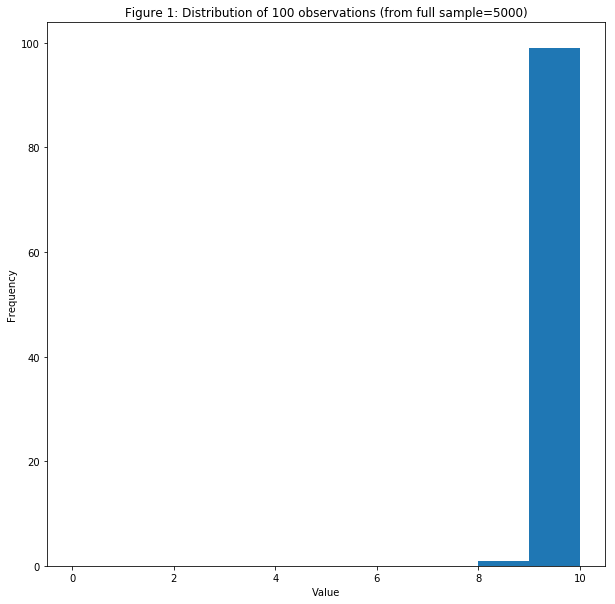

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=[0,1,2,3,4,5,6,7,8,9,10])
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of "+str(N_obs)+" observations (from full sample="+str(N)+")")
#mu_obs=observation.mean()
#plt.show()

In [9]:
def transition_model_a(theta):
    # defines how to walk around the parameter space 
    sd=0.3
    theta_new=np.zeros(2)
    
    temp=-1
    while (temp<=0) or (temp>=1.): 
        temp =np.random.normal(theta[0],sd)
        theta_new[0] = temp
        
    temp=-1  
    while (temp<=0) or (temp>=1.):
        temp =np.random.normal(theta[1],sd)
        theta_new[1] = temp
    
    return theta_new

transition_model_a(theta_true)

array([0.91252538, 0.56530148])

In [10]:
def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    for i in range(2):
        if (x[i] <0) or(x[i]>1):
            return eps
    return 1-eps

r=prior(theta_true)
np.log(r)

0.0

In [11]:
#Computes the likelihood of the observed data given examined parameter x
def manual_log_like_normal(x,data):
    #x[0]=p, x[1]=q1, x[2]=q2 (new or current)
    #data = the observations
    res=0
    [p,q]=x
    #print(x)
    #print(observation)
    #print(f)
    for data_point in data: #observation:
        #print(data_point)
        temp=eval(f[data_point]) 
        #print(temp)
        #print(np.log(temp))
        
        if temp<eps:
            temp=eps
        if temp>1.-eps:
            temp=1.-eps
        
        #print(res)
        res=res+np.log(temp); #+np.log(prior(x))
    #print(res)
    return res
# TP: For each data point, prob.(sampled_data_point for x) times the prior on the value of x itself

#print([p,q,alpha])
#print(np.array(observation))
res = manual_log_like_normal([p,q], np.array(observation))

#print(res)



In [12]:
def acceptance(x,x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))

In [13]:
def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []
    for i in range(iterations):
        x_new = transition_model_a(x)
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data)
        print(i)
        
        if (acceptance(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):
            x = x_new
            accepted.append(x_new)
            print(x_new)
            print('acc')
        else:
            rejected.append(x_new)
            print(x_new)
            print('rej')

    return np.array(accepted), np.array(rejected)


In [ ]:
theta_init=[0.5,0.5]#np.ones(10)*0.1
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model_a,theta_init,MH_samples,observation,acceptance)

#print(accepted.shape) #[-4:,0:9]) #:,0:3])
#print(accepted.shape)

0
[0.72457075 0.40527253]
acc
1
[0.52883356 0.27129811]
rej
2
[0.37974152 0.13896422]
rej
3
[0.58929015 0.4191834 ]
rej
4
[0.69383257 0.12455049]
rej
5
[0.22677177 0.39038005]
rej
6
[0.34166016 0.96839907]
acc
7
[0.31909559 0.95251215]
rej
8
[0.93914609 0.52512401]
acc
9
[0.75659369 0.71671702]
rej
10
[0.48406835 0.15111779]
rej
11
[0.87977173 0.33067151]
rej
12
[0.72464119 0.39774663]
rej
13
[0.91789534 0.4919103 ]
rej
14
[0.97963095 0.17814125]
acc
15
[0.76147982 0.77863574]
rej
16
[0.93244321 0.015781  ]
rej
17
[0.63693676 0.28367485]
rej
18
[0.70715447 0.71452551]
rej
19
[0.74945013 0.07592111]
rej
20
[0.4116075  0.33883222]
rej
21
[0.79149437 0.87743228]
acc
22
[0.78244324 0.46673226]
rej
23
[0.80922943 0.5343388 ]
rej
24
[0.97326729 0.8031831 ]
rej
25
[0.5503456  0.93064579]
rej
26
[0.63636295 0.76480621]
rej
27
[0.46033449 0.20904428]
rej
28
[0.91148862 0.85330893]
acc
29
[0.73661613 0.87794304]
rej
30
[0.47418769 0.57560089]
rej
31
[0.87988379 0.97270359]
rej
32
[0.7819953  0.6

263
[0.63545531 0.37156269]
rej
264
[0.59747495 0.68360377]
rej
265
[0.63668277 0.39890575]
rej
266
[0.69650173 0.26565301]
rej
267
[0.78367747 0.53078863]
rej
268
[0.94333836 0.95135126]
rej
269
[0.66665017 0.74517544]
rej
270
[0.33515536 0.69443764]
rej
271
[0.67624624 0.91497744]
rej
272
[0.65907614 0.71449243]
rej
273
[0.45611305 0.80573326]
rej
274
[0.12461904 0.63661986]
rej
275
[0.50672867 0.65511658]
rej
276
[0.14198765 0.82149517]
rej
277
[0.55102164 0.73546854]
rej
278
[0.20492435 0.57678017]
rej
279
[0.11898113 0.95008604]
rej
280
[0.76175148 0.54736511]
rej
281
[0.57203382 0.50290842]
rej
282
[0.68758918 0.93447403]
acc
283
[0.6295508  0.42013856]
rej
284
[0.0358113  0.96776642]
rej
285
[0.51448217 0.95944054]
acc
286
[0.98494094 0.869651  ]
rej
287
[0.41045824 0.61729521]
rej
288
[0.5008292  0.63435799]
rej
289
[0.60474519 0.65313446]
rej
290
[0.83256179 0.73322812]
rej
291
[0.45950686 0.26054262]
rej
292
[0.59706792 0.74306562]
rej
293
[0.20358875 0.57090455]
rej
294
[0.6

525
[0.77748871 0.66505856]
rej
526
[0.35565181 0.25973087]
rej
527
[0.89205963 0.44107114]
rej
528
[0.84536846 0.25532493]
rej
529
[0.46285256 0.63705643]
rej
530
[0.74915501 0.67768614]
rej
531
[0.79989956 0.51723486]
rej
532
[0.72469854 0.54760995]
rej
533
[0.70393726 0.4467933 ]
rej
534
[0.93613873 0.57709611]
rej
535
[0.69524298 0.83391369]
rej
536
[0.92847858 0.73874139]
acc
537
[0.70871962 0.7075142 ]
rej
538
[0.86819495 0.94410039]
rej
539
[0.79803691 0.49194744]
rej
540
[0.83455908 0.09424458]
rej
541
[0.86321787 0.75758991]
rej
542
[0.97594975 0.05037419]
acc
543
[0.79513974 0.07703439]
rej
544
[0.50132517 0.01516848]
rej
545
[0.47296364 0.21752999]
rej
546
[0.60623604 0.13784854]
rej
547
[0.43095455 0.1737575 ]
rej
548
[0.5415475  0.74393226]
rej
549
[0.67236275 0.43734465]
rej
550
[0.79605353 0.30263188]
rej
551
[0.99418561 0.16882477]
rej
552
[0.80757961 0.30591755]
rej
553
[0.6674726  0.20964764]
rej
554
[0.8739514  0.20442144]
rej
555
[0.77880352 0.35352649]
rej
556
[0.8

793
[0.4326831 0.7965544]
rej
794
[0.94510212 0.96140536]
rej
795
[0.31858032 0.92159654]
rej
796
[0.68786215 0.89564288]
rej
797
[0.25723973 0.847129  ]
rej
798
[0.51626964 0.81762142]
rej
799
[0.17523147 0.660556  ]
rej
800
[0.65730349 0.9957838 ]
rej
801
[0.36878798 0.67833596]
rej
802
[0.80803687 0.93263126]
acc
803
[0.99260486 0.6929874 ]
rej
804
[0.95029899 0.78334485]
acc
805
[0.94483798 0.56273739]
acc
806
[0.77991891 0.53316183]
rej
807
[0.64688653 0.17605784]
rej
808
[0.81597656 0.49243478]
rej
809
[0.88400017 0.6046033 ]
rej
810
[0.97190868 0.66468757]
rej
811
[0.68310511 0.38628072]
rej
812
[0.63521678 0.32644577]
rej
813
[0.96765425 0.50614107]
acc
814
[0.77002208 0.51220204]
rej
815
[0.62462767 0.45856733]
rej
816
[0.95096676 0.82468866]
rej
817
[0.68391532 0.59763731]
rej
818
[0.95002149 0.6168011 ]
acc
819
[0.44798096 0.66102729]
rej
820
[0.70591167 0.52964645]
rej
821
[0.87909743 0.601317  ]
rej
822
[0.7026336 0.489604 ]
rej
823
[0.69426684 0.55109738]
rej
824
[0.92403

1048
[0.52178026 0.63141015]
rej
1049
[0.18212494 0.84138479]
rej
1050
[0.59545898 0.8271728 ]
rej
1051
[0.80594199 0.51631636]
rej
1052
[0.21823027 0.73387096]
rej
1053
[0.77880454 0.81291726]
rej
1054
[0.60530502 0.70540526]
rej
1055
[0.46940018 0.49451014]
rej
1056
[0.89425069 0.51629579]
rej
1057
[0.96235814 0.83336643]
rej
1058
[0.46254665 0.73237778]
rej
1059
[0.71709258 0.31519665]
rej
1060
[0.85464449 0.82591348]
rej
1061
[0.59574668 0.96861388]
rej
1062
[0.259808   0.85422838]
rej
1063
[0.65807556 0.87249119]
rej
1064
[0.7804089  0.79173125]
rej
1065
[0.60070184 0.46004403]
rej
1066
[0.76298855 0.99489711]
rej
1067
[0.21797953 0.71100677]
rej
1068
[0.03404561 0.82956353]
rej


In [ ]:
pickle.dump(accepted, open("accepted_100.p", 'wb'))
pickle.dump(rejected, open("rejected_100.p", 'wb'))

In [14]:
accepted = pickle.load(open("accepted_100.p","rb"))
rejected = pickle.load(open("rejected_100.p","rb"))

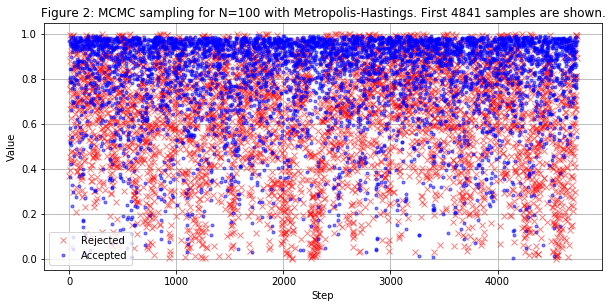

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
to_show = accepted.shape[0]
ax.plot(rejected[100:to_show,1],'rx',label='Rejected',alpha=0.5)
ax.plot(accepted[100:to_show,1],'b.',label='Accepted',alpha=0.5)
ax.set_xlabel("Step")
ax.set_ylabel("Value")
ax.set_title("Figure 2: MCMC sampling for N="+str(N_obs)+" with Metropolis-Hastings. First "+str(to_show)+" samples are shown.")
ax.grid()
ax.legend()
plt.show() 

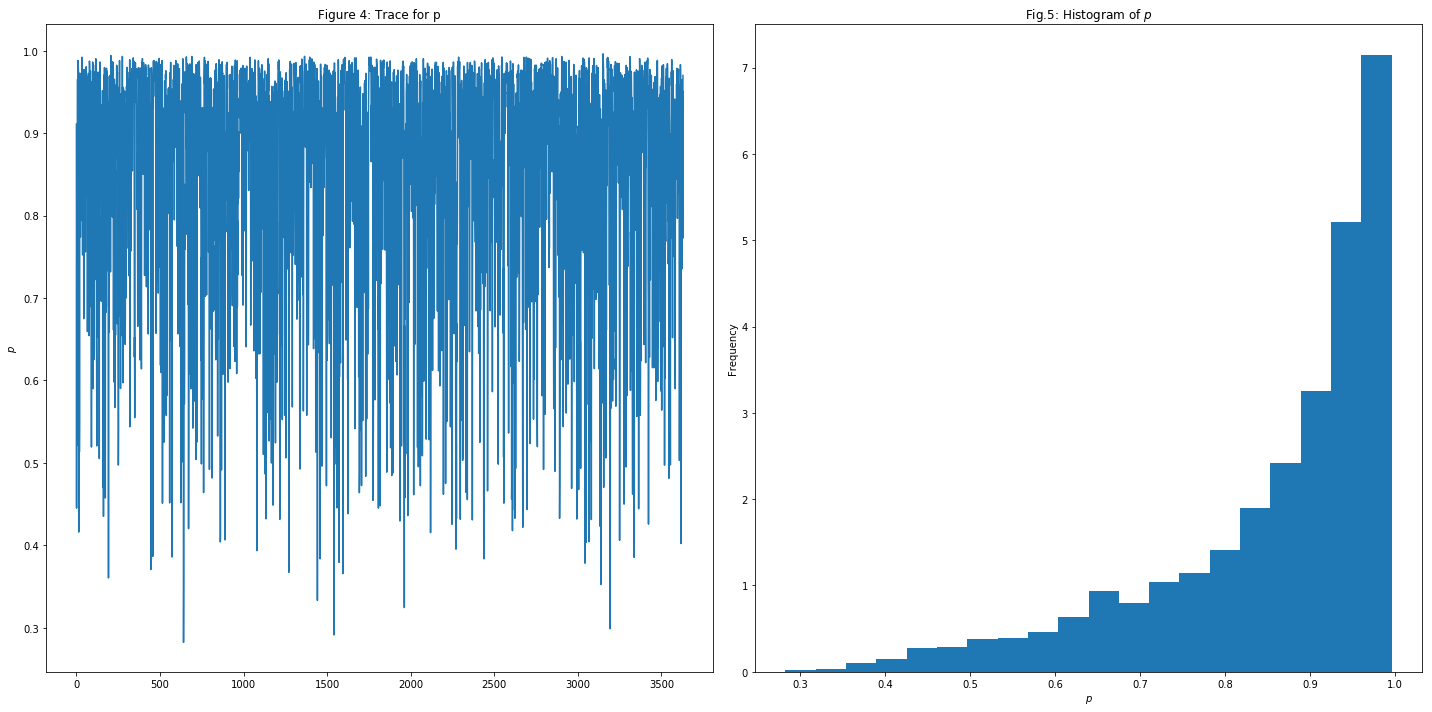

In [16]:
show = int(-0.75*accepted.shape[0])
hist_show =int(-0.75*accepted.shape[0])
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_title("Figure 4: Trace for p")
ax.set_ylabel("$p$")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0],bins=20,density=True)
ax.set_ylabel("Frequency")
ax.set_xlabel("$p$")
ax.set_title("Fig.5: Histogram of $p$")
fig.tight_layout()

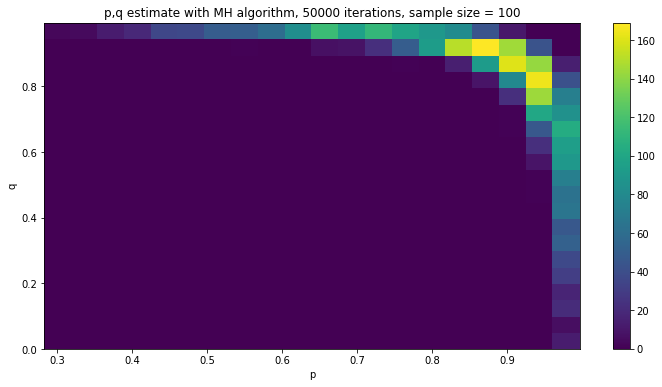

In [17]:
# to elaborate the heat map
plt.figure(figsize=(12,6))
plt.hist2d(accepted[show:, 0], accepted[show:, 1], bins=20)
plt.colorbar()
plt.xlabel("p")
plt.ylabel("q")
plt.title('p,q estimate with MH algorithm, 50000 iterations, sample size = 100')
plt.show()